## Taking care of modules

In [ ]:
# !pip install gym_super_mario_bros==7.3.0 nes_py
# !pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
# !pip install stable-baselines3[extra]

In [2]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [7]:
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt

In [8]:
# base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# Dummy Environment
env = DummyVecEnv([lambda: env])
# Stack four frames on each other to reduce no of frames which model gets
env = VecFrameStack(env, 4, channels_order='last')

In [9]:
state = env.reset()

### Demo - Model Input

In [10]:
state, reward, done, info = env.step([5])

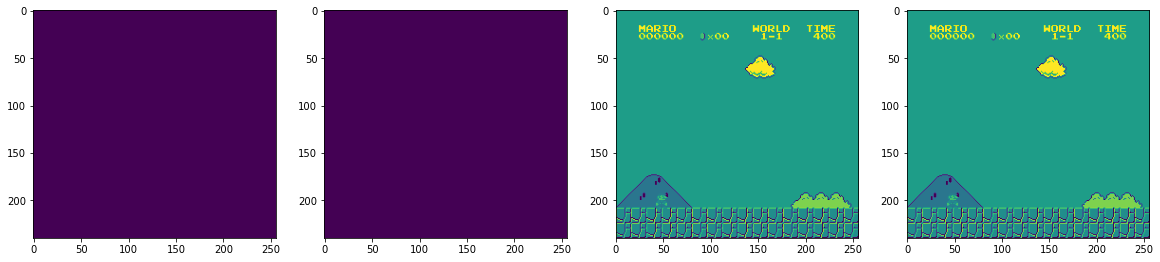

In [11]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# 3. Train the RL Model

In [12]:
# Import os for file path management
import os 
# importing PPO and A2C from stable_baselines3
from stable_baselines3 import A2C, PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [13]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [14]:
CHECKPOINT_DIR = './train_PPO/'
LOG_DIR = './logs_PPO/'

In [15]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [16]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


![Entropy Loss](e6a3eea78863c7402a0a078977130f56796ddde8ec636e5d405655d34e08130d.png)  


In [17]:
# Make Model Learn
model.learn(total_timesteps=1000000, callback=callback, progress_bar = True)

Logging to ./logs/PPO_1


Output()

c:\Users\cvesw\anaconda3\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow 
encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256

----------------------------
| time/              |     |
|    fps             | 59  |
|    iterations      | 1   |
|    time_elapsed    | 8   |
|    total_timesteps | 512 |
----------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 59            |
|    iterations           | 2             |
|    time_elapsed         | 17            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 2.8386014e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.00566      |
|    learning_rate        | 1e-06         |
|    loss                 | 263           |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.000368     |
|    value_loss           | 622           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 58           |
|    iterations           | 3            |
|    time_elapsed         | 26           |
|    total_timesteps      | 1536         |
| train/                  |              |
|    approx_kl            | 2.991897e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | -0.000241    |
|    learning_rate        | 1e-06        |
|    loss                 | 26.7         |
|    n_updates            | 20           |
|    policy_gradient_loss | -0.000425    |
|    value_loss           | 72.6         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 4            |
|    time_elapsed         | 35           |
|    total_timesteps      | 2048         |
| train/                  |              |
|    approx_kl            | 3.990566e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | 0.000725     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.131        |
|    n_updates            | 30           |
|    policy_gradient_loss | -0.00025     |
|    value_loss           | 1.14         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 5             |
|    time_elapsed         | 44            |
|    total_timesteps      | 2560          |
| train/                  |               |
|    approx_kl            | 4.8698857e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.042         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.121         |
|    n_updates            | 40            |
|    policy_gradient_loss | -5.13e-05     |
|    value_loss           | 0.824         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 55            |
|    iterations           | 6             |
|    time_elapsed         | 55            |
|    total_timesteps      | 3072          |
| train/                  |               |
|    approx_kl            | 1.1780416e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.0616        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.175         |
|    n_updates            | 50            |
|    policy_gradient_loss | -0.000189     |
|    value_loss           | 0.669         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 51           |
|    iterations           | 7            |
|    time_elapsed         | 69           |
|    total_timesteps      | 3584         |
| train/                  |              |
|    approx_kl            | 4.978967e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | 0.00171      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.114        |
|    n_updates            | 60           |
|    policy_gradient_loss | -4.79e-05    |
|    value_loss           | 0.488        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 8            |
|    time_elapsed         | 81           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 5.897484e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | -0.0124      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.302        |
|    n_updates            | 70           |
|    policy_gradient_loss | -0.000117    |
|    value_loss           | 0.564        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 9             |
|    time_elapsed         | 95            |
|    total_timesteps      | 4608          |
| train/                  |               |
|    approx_kl            | 1.6724807e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00202       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0749        |
|    n_updates            | 80            |
|    policy_gradient_loss | -0.000263     |
|    value_loss           | 0.307         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 10           |
|    time_elapsed         | 109          |
|    total_timesteps      | 5120         |
| train/                  |              |
|    approx_kl            | 8.645584e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | -0.00305     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.204        |
|    n_updates            | 90           |
|    policy_gradient_loss | -0.000154    |
|    value_loss           | 0.344        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 11           |
|    time_elapsed         | 122          |
|    total_timesteps      | 5632         |
| train/                  |              |
|    approx_kl            | 6.622169e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | 0.0102       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0574       |
|    n_updates            | 100          |
|    policy_gradient_loss | -0.000104    |
|    value_loss           | 0.265        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 12            |
|    time_elapsed         | 134           |
|    total_timesteps      | 6144          |
| train/                  |               |
|    approx_kl            | 6.3861953e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.00151      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0916        |
|    n_updates            | 110           |
|    policy_gradient_loss | -6.17e-05     |
|    value_loss           | 0.206         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 13            |
|    time_elapsed         | 148           |
|    total_timesteps      | 6656          |
| train/                  |               |
|    approx_kl            | 1.7267768e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.000557     |
|    learning_rate        | 1e-06         |
|    loss                 | 0.186         |
|    n_updates            | 120           |
|    policy_gradient_loss | -0.000407     |
|    value_loss           | 0.355         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 14            |
|    time_elapsed         | 162           |
|    total_timesteps      | 7168          |
| train/                  |               |
|    approx_kl            | 2.8145965e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.00339      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.26          |
|    n_updates            | 130           |
|    policy_gradient_loss | -0.000574     |
|    value_loss           | 0.448         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 15           |
|    time_elapsed         | 176          |
|    total_timesteps      | 7680         |
| train/                  |              |
|    approx_kl            | 1.278671e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | 0.00132      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.299        |
|    n_updates            | 140          |
|    policy_gradient_loss | -0.000184    |
|    value_loss           | 0.483        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 16            |
|    time_elapsed         | 190           |
|    total_timesteps      | 8192          |
| train/                  |               |
|    approx_kl            | 2.2749999e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00494       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0969        |
|    n_updates            | 150           |
|    policy_gradient_loss | -0.000375     |
|    value_loss           | 0.21          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 17            |
|    time_elapsed         | 203           |
|    total_timesteps      | 8704          |
| train/                  |               |
|    approx_kl            | 1.2187404e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.0868        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.48          |
|    n_updates            | 160           |
|    policy_gradient_loss | -9.99e-05     |
|    value_loss           | 2.57          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 18            |
|    time_elapsed         | 217           |
|    total_timesteps      | 9216          |
| train/                  |               |
|    approx_kl            | 5.5071316e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00626       |
|    learning_rate        | 1e-06         |
|    loss                 | 130           |
|    n_updates            | 170           |
|    policy_gradient_loss | 0.000101      |
|    value_loss           | 382           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 19            |
|    time_elapsed         | 231           |
|    total_timesteps      | 9728          |
| train/                  |               |
|    approx_kl            | 3.7229038e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.032         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.346         |
|    n_updates            | 180           |
|    policy_gradient_loss | -0.000417     |
|    value_loss           | 1.44          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 20            |
|    time_elapsed         | 245           |
|    total_timesteps      | 10240         |
| train/                  |               |
|    approx_kl            | 1.6788254e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.0355        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.15          |
|    n_updates            | 190           |
|    policy_gradient_loss | -0.000183     |
|    value_loss           | 0.575         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 21           |
|    time_elapsed         | 259          |
|    total_timesteps      | 10752        |
| train/                  |              |
|    approx_kl            | 1.954229e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.0514       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.193        |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.000316    |
|    value_loss           | 0.47         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 22            |
|    time_elapsed         | 274           |
|    total_timesteps      | 11264         |
| train/                  |               |
|    approx_kl            | 2.5052694e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.133         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.199         |
|    n_updates            | 210           |
|    policy_gradient_loss | -0.00044      |
|    value_loss           | 0.53          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 23            |
|    time_elapsed         | 288           |
|    total_timesteps      | 11776         |
| train/                  |               |
|    approx_kl            | 4.1304855e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.00221       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.144         |
|    n_updates            | 220           |
|    policy_gradient_loss | -0.000703     |
|    value_loss           | 0.368         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 24           |
|    time_elapsed         | 301          |
|    total_timesteps      | 12288        |
| train/                  |              |
|    approx_kl            | 4.210428e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.00837      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.132        |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.000557    |
|    value_loss           | 0.274        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 25            |
|    time_elapsed         | 315           |
|    total_timesteps      | 12800         |
| train/                  |               |
|    approx_kl            | 2.1032873e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.013         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.145         |
|    n_updates            | 240           |
|    policy_gradient_loss | -0.00031      |
|    value_loss           | 0.295         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 26            |
|    time_elapsed         | 329           |
|    total_timesteps      | 13312         |
| train/                  |               |
|    approx_kl            | 4.5614666e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.000512      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0891        |
|    n_updates            | 250           |
|    policy_gradient_loss | -0.000594     |
|    value_loss           | 0.279         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 27           |
|    time_elapsed         | 343          |
|    total_timesteps      | 13824        |
| train/                  |              |
|    approx_kl            | 3.583997e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.000321     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.148        |
|    n_updates            | 260          |
|    policy_gradient_loss | -0.000573    |
|    value_loss           | 0.298        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 28            |
|    time_elapsed         | 356           |
|    total_timesteps      | 14336         |
| train/                  |               |
|    approx_kl            | 3.3382792e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.00239       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.148         |
|    n_updates            | 270           |
|    policy_gradient_loss | -0.000411     |
|    value_loss           | 0.272         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 29            |
|    time_elapsed         | 371           |
|    total_timesteps      | 14848         |
| train/                  |               |
|    approx_kl            | 3.4168595e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | -0.00298      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.116         |
|    n_updates            | 280           |
|    policy_gradient_loss | -0.000535     |
|    value_loss           | 0.275         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 30            |
|    time_elapsed         | 385           |
|    total_timesteps      | 15360         |
| train/                  |               |
|    approx_kl            | 5.5249082e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | -0.0148       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.139         |
|    n_updates            | 290           |
|    policy_gradient_loss | -0.000812     |
|    value_loss           | 0.363         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 31           |
|    time_elapsed         | 399          |
|    total_timesteps      | 15872        |
| train/                  |              |
|    approx_kl            | 4.797126e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.0103       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0607       |
|    n_updates            | 300          |
|    policy_gradient_loss | -3.63e-05    |
|    value_loss           | 0.192        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 32           |
|    time_elapsed         | 412          |
|    total_timesteps      | 16384        |
| train/                  |              |
|    approx_kl            | 3.326591e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.00767      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.14         |
|    n_updates            | 310          |
|    policy_gradient_loss | -0.000351    |
|    value_loss           | 0.263        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 33           |
|    time_elapsed         | 426          |
|    total_timesteps      | 16896        |
| train/                  |              |
|    approx_kl            | 3.255799e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.0775       |
|    learning_rate        | 1e-06        |
|    loss                 | 134          |
|    n_updates            | 320          |
|    policy_gradient_loss | 5.71e-05     |
|    value_loss           | 371          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 34            |
|    time_elapsed         | 441           |
|    total_timesteps      | 17408         |
| train/                  |               |
|    approx_kl            | 1.4974619e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.0546        |
|    learning_rate        | 1e-06         |
|    loss                 | 84            |
|    n_updates            | 330           |
|    policy_gradient_loss | -9.9e-05      |
|    value_loss           | 162           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 35            |
|    time_elapsed         | 455           |
|    total_timesteps      | 17920         |
| train/                  |               |
|    approx_kl            | 1.2584613e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.241         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.123         |
|    n_updates            | 340           |
|    policy_gradient_loss | -5.64e-05     |
|    value_loss           | 0.796         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 36           |
|    time_elapsed         | 469          |
|    total_timesteps      | 18432        |
| train/                  |              |
|    approx_kl            | 2.334686e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.193        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0921       |
|    n_updates            | 350          |
|    policy_gradient_loss | -0.000164    |
|    value_loss           | 0.671        |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 39          |
|    iterations           | 37          |
|    time_elapsed         | 482         |
|    total_timesteps      | 18944       |
| train/                  |             |
|    approx_kl            | 6.17106e-06 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | 0.249       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.129       |
|    n_updates            | 360         |
|    policy_gradient_loss | -4.89e-05   |
|    value_loss           | 0.531       |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 38            |
|    time_elapsed         | 497           |
|    total_timesteps      | 19456         |
| train/                  |               |
|    approx_kl            | 1.2106379e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.128         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0877        |
|    n_updates            | 370           |
|    policy_gradient_loss | -0.000107     |
|    value_loss           | 0.339         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 39           |
|    time_elapsed         | 511          |
|    total_timesteps      | 19968        |
| train/                  |              |
|    approx_kl            | 9.742449e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.0209       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0469       |
|    n_updates            | 380          |
|    policy_gradient_loss | -9.78e-05    |
|    value_loss           | 0.245        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 40           |
|    time_elapsed         | 525          |
|    total_timesteps      | 20480        |
| train/                  |              |
|    approx_kl            | 3.265764e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.182        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0891       |
|    n_updates            | 390          |
|    policy_gradient_loss | -0.000315    |
|    value_loss           | 0.315        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 41           |
|    time_elapsed         | 539          |
|    total_timesteps      | 20992        |
| train/                  |              |
|    approx_kl            | 5.223707e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.571        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.049        |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.00077     |
|    value_loss           | 0.231        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 42           |
|    time_elapsed         | 553          |
|    total_timesteps      | 21504        |
| train/                  |              |
|    approx_kl            | 8.774456e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.012        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0862       |
|    n_updates            | 410          |
|    policy_gradient_loss | -0.000114    |
|    value_loss           | 0.205        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 43           |
|    time_elapsed         | 567          |
|    total_timesteps      | 22016        |
| train/                  |              |
|    approx_kl            | 4.287588e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.00496      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0958       |
|    n_updates            | 420          |
|    policy_gradient_loss | -0.000409    |
|    value_loss           | 0.296        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 44            |
|    time_elapsed         | 581           |
|    total_timesteps      | 22528         |
| train/                  |               |
|    approx_kl            | 2.6032794e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.015         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0832        |
|    n_updates            | 430           |
|    policy_gradient_loss | -0.000221     |
|    value_loss           | 0.152         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 45           |
|    time_elapsed         | 596          |
|    total_timesteps      | 23040        |
| train/                  |              |
|    approx_kl            | 3.679644e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.93        |
|    explained_variance   | 0.0088       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0789       |
|    n_updates            | 440          |
|    policy_gradient_loss | -0.000536    |
|    value_loss           | 0.15         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 46            |
|    time_elapsed         | 610           |
|    total_timesteps      | 23552         |
| train/                  |               |
|    approx_kl            | 2.6640948e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | -0.0144       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0582        |
|    n_updates            | 450           |
|    policy_gradient_loss | -0.00025      |
|    value_loss           | 0.135         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 47           |
|    time_elapsed         | 623          |
|    total_timesteps      | 24064        |
| train/                  |              |
|    approx_kl            | 2.524606e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.0434       |
|    learning_rate        | 1e-06        |
|    loss                 | 31           |
|    n_updates            | 460          |
|    policy_gradient_loss | -7.21e-05    |
|    value_loss           | 94.2         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 48            |
|    time_elapsed         | 637           |
|    total_timesteps      | 24576         |
| train/                  |               |
|    approx_kl            | 3.1122006e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.296         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0977        |
|    n_updates            | 470           |
|    policy_gradient_loss | -0.000321     |
|    value_loss           | 0.253         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 49            |
|    time_elapsed         | 651           |
|    total_timesteps      | 25088         |
| train/                  |               |
|    approx_kl            | 0.00012749527 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.0695        |
|    learning_rate        | 1e-06         |
|    loss                 | 121           |
|    n_updates            | 480           |
|    policy_gradient_loss | 0.000225      |
|    value_loss           | 359           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 50            |
|    time_elapsed         | 665           |
|    total_timesteps      | 25600         |
| train/                  |               |
|    approx_kl            | 2.3685396e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.116         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.23          |
|    n_updates            | 490           |
|    policy_gradient_loss | -0.000166     |
|    value_loss           | 1.74          |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 38          |
|    iterations           | 51          |
|    time_elapsed         | 678         |
|    total_timesteps      | 26112       |
| train/                  |             |
|    approx_kl            | 9.72522e-06 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.93       |
|    explained_variance   | 0.116       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.19        |
|    n_updates            | 500         |
|    policy_gradient_loss | -2.02e-05   |
|    value_loss           | 0.773       |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 52           |
|    time_elapsed         | 692          |
|    total_timesteps      | 26624        |
| train/                  |              |
|    approx_kl            | 5.276082e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.93        |
|    explained_variance   | -0.07        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.171        |
|    n_updates            | 510          |
|    policy_gradient_loss | -0.000498    |
|    value_loss           | 0.716        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 53            |
|    time_elapsed         | 707           |
|    total_timesteps      | 27136         |
| train/                  |               |
|    approx_kl            | 4.1308813e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.223         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0682        |
|    n_updates            | 520           |
|    policy_gradient_loss | 8.21e-05      |
|    value_loss           | 0.423         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 54            |
|    time_elapsed         | 720           |
|    total_timesteps      | 27648         |
| train/                  |               |
|    approx_kl            | 3.1841919e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | -0.0204       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.111         |
|    n_updates            | 530           |
|    policy_gradient_loss | 2.29e-05      |
|    value_loss           | 0.449         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 55           |
|    time_elapsed         | 736          |
|    total_timesteps      | 28160        |
| train/                  |              |
|    approx_kl            | 9.415671e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.93        |
|    explained_variance   | -0.169       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.163        |
|    n_updates            | 540          |
|    policy_gradient_loss | -8.41e-05    |
|    value_loss           | 0.391        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 56            |
|    time_elapsed         | 750           |
|    total_timesteps      | 28672         |
| train/                  |               |
|    approx_kl            | 1.6940292e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.014         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.138         |
|    n_updates            | 550           |
|    policy_gradient_loss | -7.84e-05     |
|    value_loss           | 0.307         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 57            |
|    time_elapsed         | 764           |
|    total_timesteps      | 29184         |
| train/                  |               |
|    approx_kl            | 4.3792767e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.0146        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.122         |
|    n_updates            | 560           |
|    policy_gradient_loss | -0.00048      |
|    value_loss           | 0.356         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 58           |
|    time_elapsed         | 778          |
|    total_timesteps      | 29696        |
| train/                  |              |
|    approx_kl            | 9.004667e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.93        |
|    explained_variance   | 0.0555       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.113        |
|    n_updates            | 570          |
|    policy_gradient_loss | -0.000927    |
|    value_loss           | 0.284        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 59           |
|    time_elapsed         | 793          |
|    total_timesteps      | 30208        |
| train/                  |              |
|    approx_kl            | 3.510178e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.93        |
|    explained_variance   | 0.129        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.169        |
|    n_updates            | 580          |
|    policy_gradient_loss | -0.000366    |
|    value_loss           | 0.331        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 60            |
|    time_elapsed         | 809           |
|    total_timesteps      | 30720         |
| train/                  |               |
|    approx_kl            | 5.3313677e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.0873        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0524        |
|    n_updates            | 590           |
|    policy_gradient_loss | -0.000426     |
|    value_loss           | 0.14          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 61            |
|    time_elapsed         | 823           |
|    total_timesteps      | 31232         |
| train/                  |               |
|    approx_kl            | 2.1802261e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.546         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0723        |
|    n_updates            | 600           |
|    policy_gradient_loss | -0.000188     |
|    value_loss           | 0.18          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 62           |
|    time_elapsed         | 837          |
|    total_timesteps      | 31744        |
| train/                  |              |
|    approx_kl            | 4.264037e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.93        |
|    explained_variance   | 0.00489      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0407       |
|    n_updates            | 610          |
|    policy_gradient_loss | -0.000259    |
|    value_loss           | 0.09         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 63            |
|    time_elapsed         | 851           |
|    total_timesteps      | 32256         |
| train/                  |               |
|    approx_kl            | 2.5140704e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | -0.0136       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.064         |
|    n_updates            | 620           |
|    policy_gradient_loss | -0.000269     |
|    value_loss           | 0.159         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 64            |
|    time_elapsed         | 865           |
|    total_timesteps      | 32768         |
| train/                  |               |
|    approx_kl            | 1.0848395e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.329         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.212         |
|    n_updates            | 630           |
|    policy_gradient_loss | -0.000197     |
|    value_loss           | 1.98          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 65            |
|    time_elapsed         | 879           |
|    total_timesteps      | 33280         |
| train/                  |               |
|    approx_kl            | 0.00010831666 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.0904        |
|    learning_rate        | 1e-06         |
|    loss                 | 125           |
|    n_updates            | 640           |
|    policy_gradient_loss | 0.000302      |
|    value_loss           | 332           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 66           |
|    time_elapsed         | 892          |
|    total_timesteps      | 33792        |
| train/                  |              |
|    approx_kl            | 9.933836e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.93        |
|    explained_variance   | -0.311       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0545       |
|    n_updates            | 650          |
|    policy_gradient_loss | 6.46e-05     |
|    value_loss           | 0.938        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 67            |
|    time_elapsed         | 907           |
|    total_timesteps      | 34304         |
| train/                  |               |
|    approx_kl            | 1.4720252e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | -0.0228       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0871        |
|    n_updates            | 660           |
|    policy_gradient_loss | -8.94e-05     |
|    value_loss           | 0.408         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 68            |
|    time_elapsed         | 921           |
|    total_timesteps      | 34816         |
| train/                  |               |
|    approx_kl            | 2.5709858e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.0601        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0721        |
|    n_updates            | 670           |
|    policy_gradient_loss | -0.000212     |
|    value_loss           | 0.237         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 69            |
|    time_elapsed         | 935           |
|    total_timesteps      | 35328         |
| train/                  |               |
|    approx_kl            | 5.5760844e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | -0.00508      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0572        |
|    n_updates            | 680           |
|    policy_gradient_loss | -0.000432     |
|    value_loss           | 0.231         |
-------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 37         |
|    iterations           | 70         |
|    time_elapsed         | 948        |
|    total_timesteps      | 35840      |
| train/                  |            |
|    approx_kl            | 3.0778e-05 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.93      |
|    explained_variance   | 0.0371     |
|    learning_rate        | 1e-06      |
|    loss                 | 0.071      |
|    n_updates            | 690        |
|    policy_gradient_loss | -0.000234  |
|    value_loss           | 0.206      |
----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 71           |
|    time_elapsed         | 963          |
|    total_timesteps      | 36352        |
| train/                  |              |
|    approx_kl            | 7.192255e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.92        |
|    explained_variance   | -0.00475     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0711       |
|    n_updates            | 700          |
|    policy_gradient_loss | -0.000595    |
|    value_loss           | 0.162        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 72            |
|    time_elapsed         | 977           |
|    total_timesteps      | 36864         |
| train/                  |               |
|    approx_kl            | 5.4373522e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.92         |
|    explained_variance   | 0.158         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0622        |
|    n_updates            | 710           |
|    policy_gradient_loss | -0.000442     |
|    value_loss           | 0.148         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 73           |
|    time_elapsed         | 992          |
|    total_timesteps      | 37376        |
| train/                  |              |
|    approx_kl            | 9.731762e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.92        |
|    explained_variance   | -0.0108      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0467       |
|    n_updates            | 720          |
|    policy_gradient_loss | -0.000891    |
|    value_loss           | 0.131        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 74           |
|    time_elapsed         | 1006         |
|    total_timesteps      | 37888        |
| train/                  |              |
|    approx_kl            | 3.192376e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.92        |
|    explained_variance   | 0.0739       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0592       |
|    n_updates            | 730          |
|    policy_gradient_loss | -0.000253    |
|    value_loss           | 0.135        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 75            |
|    time_elapsed         | 1020          |
|    total_timesteps      | 38400         |
| train/                  |               |
|    approx_kl            | 5.7164347e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.92         |
|    explained_variance   | 0.335         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0679        |
|    n_updates            | 740           |
|    policy_gradient_loss | -0.000552     |
|    value_loss           | 0.134         |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 37          |
|    iterations           | 76          |
|    time_elapsed         | 1035        |
|    total_timesteps      | 38912       |
| train/                  |             |
|    approx_kl            | 4.72744e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.92       |
|    explained_variance   | 0.236       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0597      |
|    n_updates            | 750         |
|    policy_gradient_loss | -0.000345   |
|    value_loss           | 0.13        |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 77           |
|    time_elapsed         | 1050         |
|    total_timesteps      | 39424        |
| train/                  |              |
|    approx_kl            | 6.848795e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.92        |
|    explained_variance   | 0.112        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0799       |
|    n_updates            | 760          |
|    policy_gradient_loss | -0.000682    |
|    value_loss           | 0.127        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 78            |
|    time_elapsed         | 1064          |
|    total_timesteps      | 39936         |
| train/                  |               |
|    approx_kl            | 0.00014349376 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.92         |
|    explained_variance   | 0.0266        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0773        |
|    n_updates            | 770           |
|    policy_gradient_loss | -0.00109      |
|    value_loss           | 0.144         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 79            |
|    time_elapsed         | 1078          |
|    total_timesteps      | 40448         |
| train/                  |               |
|    approx_kl            | 5.9411628e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.92         |
|    explained_variance   | -0.00817      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0467        |
|    n_updates            | 780           |
|    policy_gradient_loss | -0.000493     |
|    value_loss           | 0.101         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 80            |
|    time_elapsed         | 1092          |
|    total_timesteps      | 40960         |
| train/                  |               |
|    approx_kl            | 0.00023332704 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.92         |
|    explained_variance   | 0.109         |
|    learning_rate        | 1e-06         |
|    loss                 | 130           |
|    n_updates            | 790           |
|    policy_gradient_loss | -0.000319     |
|    value_loss           | 343           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 81           |
|    time_elapsed         | 1106         |
|    total_timesteps      | 41472        |
| train/                  |              |
|    approx_kl            | 0.0001821582 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.91        |
|    explained_variance   | 0.209        |
|    learning_rate        | 1e-06        |
|    loss                 | 54.9         |
|    n_updates            | 800          |
|    policy_gradient_loss | 0.00011      |
|    value_loss           | 110          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 82            |
|    time_elapsed         | 1121          |
|    total_timesteps      | 41984         |
| train/                  |               |
|    approx_kl            | 2.1710759e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.91         |
|    explained_variance   | -0.00794      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.117         |
|    n_updates            | 810           |
|    policy_gradient_loss | 0.00015       |
|    value_loss           | 0.644         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 83            |
|    time_elapsed         | 1135          |
|    total_timesteps      | 42496         |
| train/                  |               |
|    approx_kl            | 4.8637507e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.91         |
|    explained_variance   | -0.0194       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0982        |
|    n_updates            | 820           |
|    policy_gradient_loss | -0.000372     |
|    value_loss           | 0.557         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 84           |
|    time_elapsed         | 1149         |
|    total_timesteps      | 43008        |
| train/                  |              |
|    approx_kl            | 7.898931e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.91        |
|    explained_variance   | -0.0199      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0763       |
|    n_updates            | 830          |
|    policy_gradient_loss | -0.000279    |
|    value_loss           | 0.324        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 85            |
|    time_elapsed         | 1163          |
|    total_timesteps      | 43520         |
| train/                  |               |
|    approx_kl            | 4.5005232e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.91         |
|    explained_variance   | 0.344         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0932        |
|    n_updates            | 840           |
|    policy_gradient_loss | -0.000204     |
|    value_loss           | 0.331         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 86            |
|    time_elapsed         | 1176          |
|    total_timesteps      | 44032         |
| train/                  |               |
|    approx_kl            | 4.2621745e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.91         |
|    explained_variance   | 0.493         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0448        |
|    n_updates            | 850           |
|    policy_gradient_loss | -0.000386     |
|    value_loss           | 0.256         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 87            |
|    time_elapsed         | 1191          |
|    total_timesteps      | 44544         |
| train/                  |               |
|    approx_kl            | 2.2631022e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.91         |
|    explained_variance   | -0.0969       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0624        |
|    n_updates            | 860           |
|    policy_gradient_loss | -6.89e-05     |
|    value_loss           | 0.216         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 88           |
|    time_elapsed         | 1205         |
|    total_timesteps      | 45056        |
| train/                  |              |
|    approx_kl            | 6.248546e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.91        |
|    explained_variance   | 0.00806      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0439       |
|    n_updates            | 870          |
|    policy_gradient_loss | -0.000523    |
|    value_loss           | 0.219        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 89            |
|    time_elapsed         | 1218          |
|    total_timesteps      | 45568         |
| train/                  |               |
|    approx_kl            | 1.5732716e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.91         |
|    explained_variance   | 0.391         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.11          |
|    n_updates            | 880           |
|    policy_gradient_loss | -8.8e-05      |
|    value_loss           | 0.256         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 90           |
|    time_elapsed         | 1235         |
|    total_timesteps      | 46080        |
| train/                  |              |
|    approx_kl            | 8.372986e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.91        |
|    explained_variance   | 0.0931       |
|    learning_rate        | 1e-06        |
|    loss                 | 34.8         |
|    n_updates            | 890          |
|    policy_gradient_loss | 8.62e-05     |
|    value_loss           | 72.7         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 91            |
|    time_elapsed         | 1249          |
|    total_timesteps      | 46592         |
| train/                  |               |
|    approx_kl            | 2.3190398e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.91         |
|    explained_variance   | -0.0113       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0636        |
|    n_updates            | 900           |
|    policy_gradient_loss | -1.1e-05      |
|    value_loss           | 0.497         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 92           |
|    time_elapsed         | 1264         |
|    total_timesteps      | 47104        |
| train/                  |              |
|    approx_kl            | 6.403949e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.91        |
|    explained_variance   | -0.000796    |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0563       |
|    n_updates            | 910          |
|    policy_gradient_loss | -0.000439    |
|    value_loss           | 0.318        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 93           |
|    time_elapsed         | 1278         |
|    total_timesteps      | 47616        |
| train/                  |              |
|    approx_kl            | 4.915695e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.91        |
|    explained_variance   | -0.042       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0672       |
|    n_updates            | 920          |
|    policy_gradient_loss | -0.000278    |
|    value_loss           | 0.267        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 94           |
|    time_elapsed         | 1291         |
|    total_timesteps      | 48128        |
| train/                  |              |
|    approx_kl            | 7.059681e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.91        |
|    explained_variance   | 0.118        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0696       |
|    n_updates            | 930          |
|    policy_gradient_loss | -0.000469    |
|    value_loss           | 0.243        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 95            |
|    time_elapsed         | 1308          |
|    total_timesteps      | 48640         |
| train/                  |               |
|    approx_kl            | 0.00012628862 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.91         |
|    explained_variance   | 0.0986        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0513        |
|    n_updates            | 940           |
|    policy_gradient_loss | -0.00127      |
|    value_loss           | 0.21          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 96           |
|    time_elapsed         | 1321         |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0004075698 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.9         |
|    explained_variance   | 0.149        |
|    learning_rate        | 1e-06        |
|    loss                 | 258          |
|    n_updates            | 950          |
|    policy_gradient_loss | -0.000576    |
|    value_loss           | 593          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 97            |
|    time_elapsed         | 1335          |
|    total_timesteps      | 49664         |
| train/                  |               |
|    approx_kl            | 8.4321364e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.9          |
|    explained_variance   | 0.0477        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.138         |
|    n_updates            | 960           |
|    policy_gradient_loss | -0.000471     |
|    value_loss           | 1.06          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 98            |
|    time_elapsed         | 1352          |
|    total_timesteps      | 50176         |
| train/                  |               |
|    approx_kl            | 2.5594141e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.9          |
|    explained_variance   | 0.305         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.135         |
|    n_updates            | 970           |
|    policy_gradient_loss | -8.47e-05     |
|    value_loss           | 0.539         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 99            |
|    time_elapsed         | 1366          |
|    total_timesteps      | 50688         |
| train/                  |               |
|    approx_kl            | 5.1373732e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.9          |
|    explained_variance   | -0.000716     |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0883        |
|    n_updates            | 980           |
|    policy_gradient_loss | -0.000375     |
|    value_loss           | 0.37          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 100          |
|    time_elapsed         | 1381         |
|    total_timesteps      | 51200        |
| train/                  |              |
|    approx_kl            | 7.172022e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.9         |
|    explained_variance   | -0.00938     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0864       |
|    n_updates            | 990          |
|    policy_gradient_loss | -0.000618    |
|    value_loss           | 0.336        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 101           |
|    time_elapsed         | 1396          |
|    total_timesteps      | 51712         |
| train/                  |               |
|    approx_kl            | 2.4592853e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.9          |
|    explained_variance   | 0.00103       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.122         |
|    n_updates            | 1000          |
|    policy_gradient_loss | -0.000125     |
|    value_loss           | 0.334         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 102           |
|    time_elapsed         | 1410          |
|    total_timesteps      | 52224         |
| train/                  |               |
|    approx_kl            | 0.00010588148 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.9          |
|    explained_variance   | 0.176         |
|    learning_rate        | 1e-06         |
|    loss                 | 34.8          |
|    n_updates            | 1010          |
|    policy_gradient_loss | -0.000535     |
|    value_loss           | 85.2          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 103           |
|    time_elapsed         | 1424          |
|    total_timesteps      | 52736         |
| train/                  |               |
|    approx_kl            | 2.6628259e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.9          |
|    explained_variance   | 0.017         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.178         |
|    n_updates            | 1020          |
|    policy_gradient_loss | 0.000107      |
|    value_loss           | 0.75          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 104          |
|    time_elapsed         | 1437         |
|    total_timesteps      | 53248        |
| train/                  |              |
|    approx_kl            | 6.008451e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.9         |
|    explained_variance   | 0.0116       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0896       |
|    n_updates            | 1030         |
|    policy_gradient_loss | -0.000379    |
|    value_loss           | 0.57         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 105           |
|    time_elapsed         | 1452          |
|    total_timesteps      | 53760         |
| train/                  |               |
|    approx_kl            | 1.3479614e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.9          |
|    explained_variance   | 0.121         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.136         |
|    n_updates            | 1040          |
|    policy_gradient_loss | -7.68e-06     |
|    value_loss           | 0.415         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 106           |
|    time_elapsed         | 1466          |
|    total_timesteps      | 54272         |
| train/                  |               |
|    approx_kl            | 6.6319364e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.9          |
|    explained_variance   | 0.00341       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0821        |
|    n_updates            | 1050          |
|    policy_gradient_loss | -0.000383     |
|    value_loss           | 0.331         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 107          |
|    time_elapsed         | 1480         |
|    total_timesteps      | 54784        |
| train/                  |              |
|    approx_kl            | 5.626434e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.9         |
|    explained_variance   | 0.0628       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0483       |
|    n_updates            | 1060         |
|    policy_gradient_loss | -0.000308    |
|    value_loss           | 0.207        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 108          |
|    time_elapsed         | 1494         |
|    total_timesteps      | 55296        |
| train/                  |              |
|    approx_kl            | 7.194956e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.9         |
|    explained_variance   | 0.0336       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0557       |
|    n_updates            | 1070         |
|    policy_gradient_loss | -0.000306    |
|    value_loss           | 0.187        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 109          |
|    time_elapsed         | 1507         |
|    total_timesteps      | 55808        |
| train/                  |              |
|    approx_kl            | 7.093337e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.89        |
|    explained_variance   | 0.00172      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.052        |
|    n_updates            | 1080         |
|    policy_gradient_loss | -0.000491    |
|    value_loss           | 0.138        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 110           |
|    time_elapsed         | 1521          |
|    total_timesteps      | 56320         |
| train/                  |               |
|    approx_kl            | 1.1998694e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | -0.0566       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0733        |
|    n_updates            | 1090          |
|    policy_gradient_loss | -7.9e-05      |
|    value_loss           | 0.156         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 111          |
|    time_elapsed         | 1535         |
|    total_timesteps      | 56832        |
| train/                  |              |
|    approx_kl            | 1.099729e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.89        |
|    explained_variance   | 0.482        |
|    learning_rate        | 1e-06        |
|    loss                 | 1.02         |
|    n_updates            | 1100         |
|    policy_gradient_loss | -0.000128    |
|    value_loss           | 2.06         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 112          |
|    time_elapsed         | 1549         |
|    total_timesteps      | 57344        |
| train/                  |              |
|    approx_kl            | 0.0003676276 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.89        |
|    explained_variance   | 0.294        |
|    learning_rate        | 1e-06        |
|    loss                 | 147          |
|    n_updates            | 1110         |
|    policy_gradient_loss | 0.000738     |
|    value_loss           | 367          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 113           |
|    time_elapsed         | 1563          |
|    total_timesteps      | 57856         |
| train/                  |               |
|    approx_kl            | 2.5613932e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | 0.0119        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.074         |
|    n_updates            | 1120          |
|    policy_gradient_loss | -0.000107     |
|    value_loss           | 0.758         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 114           |
|    time_elapsed         | 1577          |
|    total_timesteps      | 58368         |
| train/                  |               |
|    approx_kl            | 4.0207873e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | 0.0302        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0445        |
|    n_updates            | 1130          |
|    policy_gradient_loss | -0.000144     |
|    value_loss           | 0.348         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 115          |
|    time_elapsed         | 1590         |
|    total_timesteps      | 58880        |
| train/                  |              |
|    approx_kl            | 3.616733e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.89        |
|    explained_variance   | 0.0964       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0553       |
|    n_updates            | 1140         |
|    policy_gradient_loss | -0.000213    |
|    value_loss           | 0.218        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 116           |
|    time_elapsed         | 1606          |
|    total_timesteps      | 59392         |
| train/                  |               |
|    approx_kl            | 4.4255517e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | -0.0351       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0465        |
|    n_updates            | 1150          |
|    policy_gradient_loss | -0.00016      |
|    value_loss           | 0.209         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 117          |
|    time_elapsed         | 1620         |
|    total_timesteps      | 59904        |
| train/                  |              |
|    approx_kl            | 6.497314e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.89        |
|    explained_variance   | 0.663        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0765       |
|    n_updates            | 1160         |
|    policy_gradient_loss | -0.000397    |
|    value_loss           | 0.186        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 118           |
|    time_elapsed         | 1634          |
|    total_timesteps      | 60416         |
| train/                  |               |
|    approx_kl            | 4.2643514e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | 0.17          |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0664        |
|    n_updates            | 1170          |
|    policy_gradient_loss | -0.000206     |
|    value_loss           | 0.157         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 119          |
|    time_elapsed         | 1651         |
|    total_timesteps      | 60928        |
| train/                  |              |
|    approx_kl            | 7.470779e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.89        |
|    explained_variance   | 0.0298       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0424       |
|    n_updates            | 1180         |
|    policy_gradient_loss | -0.000494    |
|    value_loss           | 0.147        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 120           |
|    time_elapsed         | 1665          |
|    total_timesteps      | 61440         |
| train/                  |               |
|    approx_kl            | 4.9229362e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | -0.0375       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0861        |
|    n_updates            | 1190          |
|    policy_gradient_loss | -0.000268     |
|    value_loss           | 0.198         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 121           |
|    time_elapsed         | 1678          |
|    total_timesteps      | 61952         |
| train/                  |               |
|    approx_kl            | 4.3043983e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | 0.0114        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.05          |
|    n_updates            | 1200          |
|    policy_gradient_loss | -0.000209     |
|    value_loss           | 0.118         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 122           |
|    time_elapsed         | 1694          |
|    total_timesteps      | 62464         |
| train/                  |               |
|    approx_kl            | 2.1796906e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | 0.232         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0657        |
|    n_updates            | 1210          |
|    policy_gradient_loss | -7.73e-05     |
|    value_loss           | 0.14          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 123           |
|    time_elapsed         | 1708          |
|    total_timesteps      | 62976         |
| train/                  |               |
|    approx_kl            | 5.9884856e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | 0.0842        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0673        |
|    n_updates            | 1220          |
|    policy_gradient_loss | -0.000478     |
|    value_loss           | 0.163         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 124           |
|    time_elapsed         | 1722          |
|    total_timesteps      | 63488         |
| train/                  |               |
|    approx_kl            | 0.00013114105 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | -0.00681      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0421        |
|    n_updates            | 1230          |
|    policy_gradient_loss | -0.000817     |
|    value_loss           | 0.108         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 125           |
|    time_elapsed         | 1738          |
|    total_timesteps      | 64000         |
| train/                  |               |
|    approx_kl            | 3.0268682e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | -0.028        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0689        |
|    n_updates            | 1240          |
|    policy_gradient_loss | -0.00013      |
|    value_loss           | 0.114         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 126           |
|    time_elapsed         | 1752          |
|    total_timesteps      | 64512         |
| train/                  |               |
|    approx_kl            | 3.0919793e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | 0.143         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0445        |
|    n_updates            | 1250          |
|    policy_gradient_loss | -0.000241     |
|    value_loss           | 0.0995        |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 127          |
|    time_elapsed         | 1765         |
|    total_timesteps      | 65024        |
| train/                  |              |
|    approx_kl            | 0.0006770538 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.89        |
|    explained_variance   | 0.219        |
|    learning_rate        | 1e-06        |
|    loss                 | 170          |
|    n_updates            | 1260         |
|    policy_gradient_loss | -0.00034     |
|    value_loss           | 347          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 128           |
|    time_elapsed         | 1780          |
|    total_timesteps      | 65536         |
| train/                  |               |
|    approx_kl            | 0.00020209036 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | 0.328         |
|    learning_rate        | 1e-06         |
|    loss                 | 21.5          |
|    n_updates            | 1270          |
|    policy_gradient_loss | -0.00164      |
|    value_loss           | 83.4          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 129           |
|    time_elapsed         | 1794          |
|    total_timesteps      | 66048         |
| train/                  |               |
|    approx_kl            | 0.00013359135 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | -0.00833      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0928        |
|    n_updates            | 1280          |
|    policy_gradient_loss | -0.000719     |
|    value_loss           | 0.884         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 130           |
|    time_elapsed         | 1808          |
|    total_timesteps      | 66560         |
| train/                  |               |
|    approx_kl            | 0.00012506254 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | -0.017        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.108         |
|    n_updates            | 1290          |
|    policy_gradient_loss | -0.00052      |
|    value_loss           | 0.636         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 131          |
|    time_elapsed         | 1822         |
|    total_timesteps      | 67072        |
| train/                  |              |
|    approx_kl            | 8.204777e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.88        |
|    explained_variance   | -0.0267      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0524       |
|    n_updates            | 1300         |
|    policy_gradient_loss | -0.000429    |
|    value_loss           | 0.409        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 132          |
|    time_elapsed         | 1836         |
|    total_timesteps      | 67584        |
| train/                  |              |
|    approx_kl            | 6.076845e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.88        |
|    explained_variance   | 0.18         |
|    learning_rate        | 1e-06        |
|    loss                 | 29           |
|    n_updates            | 1310         |
|    policy_gradient_loss | 1.08e-05     |
|    value_loss           | 86           |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 133          |
|    time_elapsed         | 1850         |
|    total_timesteps      | 68096        |
| train/                  |              |
|    approx_kl            | 7.438939e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.88        |
|    explained_variance   | 0.05         |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0678       |
|    n_updates            | 1320         |
|    policy_gradient_loss | -0.000199    |
|    value_loss           | 0.924        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 134          |
|    time_elapsed         | 1865         |
|    total_timesteps      | 68608        |
| train/                  |              |
|    approx_kl            | 0.0001093715 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.89        |
|    explained_variance   | 0.56         |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0995       |
|    n_updates            | 1330         |
|    policy_gradient_loss | -0.000653    |
|    value_loss           | 0.694        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 135           |
|    time_elapsed         | 1883          |
|    total_timesteps      | 69120         |
| train/                  |               |
|    approx_kl            | 2.0046602e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | -0.0386       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0707        |
|    n_updates            | 1340          |
|    policy_gradient_loss | 8.63e-05      |
|    value_loss           | 0.553         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 136           |
|    time_elapsed         | 1897          |
|    total_timesteps      | 69632         |
| train/                  |               |
|    approx_kl            | 0.00010517822 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | -0.047        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0579        |
|    n_updates            | 1350          |
|    policy_gradient_loss | -0.000429     |
|    value_loss           | 0.363         |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 36          |
|    iterations           | 137         |
|    time_elapsed         | 1912        |
|    total_timesteps      | 70144       |
| train/                  |             |
|    approx_kl            | 6.65423e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.89       |
|    explained_variance   | 0.0225      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0541      |
|    n_updates            | 1360        |
|    policy_gradient_loss | -0.000289   |
|    value_loss           | 0.276       |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 138          |
|    time_elapsed         | 1926         |
|    total_timesteps      | 70656        |
| train/                  |              |
|    approx_kl            | 8.145452e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.89        |
|    explained_variance   | -0.0135      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0583       |
|    n_updates            | 1370         |
|    policy_gradient_loss | -0.000549    |
|    value_loss           | 0.2          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 139          |
|    time_elapsed         | 1940         |
|    total_timesteps      | 71168        |
| train/                  |              |
|    approx_kl            | 9.596418e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.9         |
|    explained_variance   | -0.0701      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.041        |
|    n_updates            | 1380         |
|    policy_gradient_loss | -0.000534    |
|    value_loss           | 0.202        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 140           |
|    time_elapsed         | 1955          |
|    total_timesteps      | 71680         |
| train/                  |               |
|    approx_kl            | 5.0759874e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | -0.029        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0684        |
|    n_updates            | 1390          |
|    policy_gradient_loss | -0.00033      |
|    value_loss           | 0.171         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 141          |
|    time_elapsed         | 1970         |
|    total_timesteps      | 72192        |
| train/                  |              |
|    approx_kl            | 8.612627e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.89        |
|    explained_variance   | 0.0521       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0437       |
|    n_updates            | 1400         |
|    policy_gradient_loss | -0.000548    |
|    value_loss           | 0.144        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 142           |
|    time_elapsed         | 1984          |
|    total_timesteps      | 72704         |
| train/                  |               |
|    approx_kl            | 0.00013677322 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | 0.00282       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0408        |
|    n_updates            | 1410          |
|    policy_gradient_loss | -0.000766     |
|    value_loss           | 0.121         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 143           |
|    time_elapsed         | 1998          |
|    total_timesteps      | 73216         |
| train/                  |               |
|    approx_kl            | 0.00063211285 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | 0.147         |
|    learning_rate        | 1e-06         |
|    loss                 | 131           |
|    n_updates            | 1420          |
|    policy_gradient_loss | -0.0011       |
|    value_loss           | 352           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 144          |
|    time_elapsed         | 2014         |
|    total_timesteps      | 73728        |
| train/                  |              |
|    approx_kl            | 9.288895e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.87        |
|    explained_variance   | 0.492        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.797        |
|    n_updates            | 1430         |
|    policy_gradient_loss | -3.11e-05    |
|    value_loss           | 3.78         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 145           |
|    time_elapsed         | 2028          |
|    total_timesteps      | 74240         |
| train/                  |               |
|    approx_kl            | 0.00012648373 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.87         |
|    explained_variance   | -0.00554      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0835        |
|    n_updates            | 1440          |
|    policy_gradient_loss | -0.000842     |
|    value_loss           | 0.568         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 146           |
|    time_elapsed         | 2043          |
|    total_timesteps      | 74752         |
| train/                  |               |
|    approx_kl            | 0.00011421519 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | -0.00378      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.092         |
|    n_updates            | 1450          |
|    policy_gradient_loss | -0.000578     |
|    value_loss           | 0.431         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 147           |
|    time_elapsed         | 2056          |
|    total_timesteps      | 75264         |
| train/                  |               |
|    approx_kl            | 5.0602946e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | 0.134         |
|    learning_rate        | 1e-06         |
|    loss                 | 32.5          |
|    n_updates            | 1460          |
|    policy_gradient_loss | 0.000435      |
|    value_loss           | 75.3          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 148           |
|    time_elapsed         | 2072          |
|    total_timesteps      | 75776         |
| train/                  |               |
|    approx_kl            | 0.00010814995 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | 0.315         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.145         |
|    n_updates            | 1470          |
|    policy_gradient_loss | -0.000505     |
|    value_loss           | 0.76          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 149           |
|    time_elapsed         | 2087          |
|    total_timesteps      | 76288         |
| train/                  |               |
|    approx_kl            | 5.8617094e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | 0.171         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0916        |
|    n_updates            | 1480          |
|    policy_gradient_loss | -0.000369     |
|    value_loss           | 0.529         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 150           |
|    time_elapsed         | 2100          |
|    total_timesteps      | 76800         |
| train/                  |               |
|    approx_kl            | 5.3806463e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | 0.0217        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0822        |
|    n_updates            | 1490          |
|    policy_gradient_loss | -0.000327     |
|    value_loss           | 0.437         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 151          |
|    time_elapsed         | 2114         |
|    total_timesteps      | 77312        |
| train/                  |              |
|    approx_kl            | 6.362051e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.88        |
|    explained_variance   | -0.00054     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0868       |
|    n_updates            | 1500         |
|    policy_gradient_loss | -0.000503    |
|    value_loss           | 0.391        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 152          |
|    time_elapsed         | 2128         |
|    total_timesteps      | 77824        |
| train/                  |              |
|    approx_kl            | 0.0001390212 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.88        |
|    explained_variance   | 0.000331     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.135        |
|    n_updates            | 1510         |
|    policy_gradient_loss | -0.000769    |
|    value_loss           | 0.31         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 153          |
|    time_elapsed         | 2143         |
|    total_timesteps      | 78336        |
| train/                  |              |
|    approx_kl            | 7.114548e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.88        |
|    explained_variance   | 0.66         |
|    learning_rate        | 1e-06        |
|    loss                 | 0.121        |
|    n_updates            | 1520         |
|    policy_gradient_loss | -0.000468    |
|    value_loss           | 0.29         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 154           |
|    time_elapsed         | 2157          |
|    total_timesteps      | 78848         |
| train/                  |               |
|    approx_kl            | 5.1294337e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | 0.0165        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0618        |
|    n_updates            | 1530          |
|    policy_gradient_loss | -0.000302     |
|    value_loss           | 0.177         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 155           |
|    time_elapsed         | 2171          |
|    total_timesteps      | 79360         |
| train/                  |               |
|    approx_kl            | 0.00013153965 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | 0.0959        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0438        |
|    n_updates            | 1540          |
|    policy_gradient_loss | -0.000706     |
|    value_loss           | 0.155         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 156           |
|    time_elapsed         | 2185          |
|    total_timesteps      | 79872         |
| train/                  |               |
|    approx_kl            | 0.00015743694 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | 0.0469        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0442        |
|    n_updates            | 1550          |
|    policy_gradient_loss | -0.000787     |
|    value_loss           | 0.133         |
-------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 36             |
|    iterations           | 157            |
|    time_elapsed         | 2200           |
|    total_timesteps      | 80384          |
| train/                  |                |
|    approx_kl            | 0.000114653725 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.88          |
|    explained_variance   | 0.67           |
|    learning_rate        | 1e-06          |
|    loss                 | 0.0657         |
|    n_updates            | 1560           |
|    policy_gradient_loss | -0.000604      |
|    value_loss           | 0.132          |
--------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 158           |
|    time_elapsed         | 2212          |
|    total_timesteps      | 80896         |
| train/                  |               |
|    approx_kl            | 4.4047716e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | 0.701         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.763         |
|    n_updates            | 1570          |
|    policy_gradient_loss | -0.000315     |
|    value_loss           | 2.59          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 159          |
|    time_elapsed         | 2228         |
|    total_timesteps      | 81408        |
| train/                  |              |
|    approx_kl            | 0.0005729076 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.87        |
|    explained_variance   | 0.363        |
|    learning_rate        | 1e-06        |
|    loss                 | 160          |
|    n_updates            | 1580         |
|    policy_gradient_loss | 0.000603     |
|    value_loss           | 450          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 160          |
|    time_elapsed         | 2242         |
|    total_timesteps      | 81920        |
| train/                  |              |
|    approx_kl            | 6.851903e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | 0.192        |
|    learning_rate        | 1e-06        |
|    loss                 | 24.7         |
|    n_updates            | 1590         |
|    policy_gradient_loss | -0.000409    |
|    value_loss           | 72.9         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 161           |
|    time_elapsed         | 2257          |
|    total_timesteps      | 82432         |
| train/                  |               |
|    approx_kl            | 0.00017020095 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.86         |
|    explained_variance   | 0.633         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.147         |
|    n_updates            | 1600          |
|    policy_gradient_loss | -0.000797     |
|    value_loss           | 1.48          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 162          |
|    time_elapsed         | 2271         |
|    total_timesteps      | 82944        |
| train/                  |              |
|    approx_kl            | 6.961066e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | 0.0297       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0854       |
|    n_updates            | 1610         |
|    policy_gradient_loss | -0.000445    |
|    value_loss           | 1.15         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 163          |
|    time_elapsed         | 2285         |
|    total_timesteps      | 83456        |
| train/                  |              |
|    approx_kl            | 5.733187e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.87        |
|    explained_variance   | -0.463       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0778       |
|    n_updates            | 1620         |
|    policy_gradient_loss | -0.000308    |
|    value_loss           | 0.721        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 164           |
|    time_elapsed         | 2299          |
|    total_timesteps      | 83968         |
| train/                  |               |
|    approx_kl            | 1.5852856e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.87         |
|    explained_variance   | -0.00422      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0905        |
|    n_updates            | 1630          |
|    policy_gradient_loss | 5.01e-05      |
|    value_loss           | 0.447         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 165           |
|    time_elapsed         | 2316          |
|    total_timesteps      | 84480         |
| train/                  |               |
|    approx_kl            | 9.5068244e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.87         |
|    explained_variance   | -0.0489       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0717        |
|    n_updates            | 1640          |
|    policy_gradient_loss | -0.000527     |
|    value_loss           | 0.39          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 166           |
|    time_elapsed         | 2330          |
|    total_timesteps      | 84992         |
| train/                  |               |
|    approx_kl            | 2.2182125e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.87         |
|    explained_variance   | 0.0529        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0446        |
|    n_updates            | 1650          |
|    policy_gradient_loss | -4.6e-05      |
|    value_loss           | 0.222         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 167           |
|    time_elapsed         | 2344          |
|    total_timesteps      | 85504         |
| train/                  |               |
|    approx_kl            | 0.00017329643 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.87         |
|    explained_variance   | -0.047        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0529        |
|    n_updates            | 1660          |
|    policy_gradient_loss | -0.000866     |
|    value_loss           | 0.231         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 168           |
|    time_elapsed         | 2358          |
|    total_timesteps      | 86016         |
| train/                  |               |
|    approx_kl            | 0.00012789876 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | -0.0418       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0548        |
|    n_updates            | 1670          |
|    policy_gradient_loss | -0.000708     |
|    value_loss           | 0.158         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 169          |
|    time_elapsed         | 2374         |
|    total_timesteps      | 86528        |
| train/                  |              |
|    approx_kl            | 2.886646e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.88        |
|    explained_variance   | -0.00289     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0496       |
|    n_updates            | 1680         |
|    policy_gradient_loss | -0.000117    |
|    value_loss           | 0.134        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 170          |
|    time_elapsed         | 2387         |
|    total_timesteps      | 87040        |
| train/                  |              |
|    approx_kl            | 9.446498e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.88        |
|    explained_variance   | 0.0179       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0515       |
|    n_updates            | 1690         |
|    policy_gradient_loss | -0.000473    |
|    value_loss           | 0.124        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 171           |
|    time_elapsed         | 2401          |
|    total_timesteps      | 87552         |
| train/                  |               |
|    approx_kl            | 4.6416186e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | -0.0338       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0551        |
|    n_updates            | 1700          |
|    policy_gradient_loss | -0.000218     |
|    value_loss           | 0.138         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 172           |
|    time_elapsed         | 2415          |
|    total_timesteps      | 88064         |
| train/                  |               |
|    approx_kl            | 0.00020200573 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.88         |
|    explained_variance   | -0.0213       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0498        |
|    n_updates            | 1710          |
|    policy_gradient_loss | -0.0009       |
|    value_loss           | 0.127         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 173          |
|    time_elapsed         | 2429         |
|    total_timesteps      | 88576        |
| train/                  |              |
|    approx_kl            | 7.544365e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.88        |
|    explained_variance   | -0.0175      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0414       |
|    n_updates            | 1720         |
|    policy_gradient_loss | -0.000435    |
|    value_loss           | 0.104        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 174           |
|    time_elapsed         | 2443          |
|    total_timesteps      | 89088         |
| train/                  |               |
|    approx_kl            | 0.00057307887 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.87         |
|    explained_variance   | 0.331         |
|    learning_rate        | 1e-06         |
|    loss                 | 117           |
|    n_updates            | 1730          |
|    policy_gradient_loss | 0.000264      |
|    value_loss           | 245           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 175           |
|    time_elapsed         | 2459          |
|    total_timesteps      | 89600         |
| train/                  |               |
|    approx_kl            | 0.00024895056 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.85         |
|    explained_variance   | 0.354         |
|    learning_rate        | 1e-06         |
|    loss                 | 91.6          |
|    n_updates            | 1740          |
|    policy_gradient_loss | -0.000792     |
|    value_loss           | 145           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 176           |
|    time_elapsed         | 2474          |
|    total_timesteps      | 90112         |
| train/                  |               |
|    approx_kl            | 8.0960686e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.86         |
|    explained_variance   | -0.0756       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0939        |
|    n_updates            | 1750          |
|    policy_gradient_loss | -0.000108     |
|    value_loss           | 1.05          |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 36          |
|    iterations           | 177         |
|    time_elapsed         | 2489        |
|    total_timesteps      | 90624       |
| train/                  |             |
|    approx_kl            | 4.05506e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.86       |
|    explained_variance   | -0.0846     |
|    learning_rate        | 1e-06       |
|    loss                 | 0.102       |
|    n_updates            | 1760        |
|    policy_gradient_loss | 0.000102    |
|    value_loss           | 0.688       |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 178          |
|    time_elapsed         | 2503         |
|    total_timesteps      | 91136        |
| train/                  |              |
|    approx_kl            | 8.099794e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | -0.0595      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.066        |
|    n_updates            | 1770         |
|    policy_gradient_loss | -0.000293    |
|    value_loss           | 0.55         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 179           |
|    time_elapsed         | 2517          |
|    total_timesteps      | 91648         |
| train/                  |               |
|    approx_kl            | 9.6785254e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.86         |
|    explained_variance   | 0.274         |
|    learning_rate        | 1e-06         |
|    loss                 | 48.9          |
|    n_updates            | 1780          |
|    policy_gradient_loss | -0.000726     |
|    value_loss           | 78.1          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 180          |
|    time_elapsed         | 2531         |
|    total_timesteps      | 92160        |
| train/                  |              |
|    approx_kl            | 7.027853e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | -0.0182      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0712       |
|    n_updates            | 1790         |
|    policy_gradient_loss | -0.000303    |
|    value_loss           | 0.651        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 181          |
|    time_elapsed         | 2544         |
|    total_timesteps      | 92672        |
| train/                  |              |
|    approx_kl            | 4.754169e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | 0.00174      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0655       |
|    n_updates            | 1800         |
|    policy_gradient_loss | -0.000119    |
|    value_loss           | 0.453        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 182           |
|    time_elapsed         | 2559          |
|    total_timesteps      | 93184         |
| train/                  |               |
|    approx_kl            | 0.00013490475 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.86         |
|    explained_variance   | 0.0781        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0653        |
|    n_updates            | 1810          |
|    policy_gradient_loss | -0.000906     |
|    value_loss           | 0.324         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 183          |
|    time_elapsed         | 2573         |
|    total_timesteps      | 93696        |
| train/                  |              |
|    approx_kl            | 8.930324e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.87        |
|    explained_variance   | -0.00142     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0779       |
|    n_updates            | 1820         |
|    policy_gradient_loss | -0.000343    |
|    value_loss           | 0.263        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 184          |
|    time_elapsed         | 2587         |
|    total_timesteps      | 94208        |
| train/                  |              |
|    approx_kl            | 3.860623e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.87        |
|    explained_variance   | 0.0267       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0407       |
|    n_updates            | 1830         |
|    policy_gradient_loss | -0.000185    |
|    value_loss           | 0.197        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 185          |
|    time_elapsed         | 2600         |
|    total_timesteps      | 94720        |
| train/                  |              |
|    approx_kl            | 4.484167e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.87        |
|    explained_variance   | 0.0571       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.044        |
|    n_updates            | 1840         |
|    policy_gradient_loss | -0.000223    |
|    value_loss           | 0.148        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 186           |
|    time_elapsed         | 2615          |
|    total_timesteps      | 95232         |
| train/                  |               |
|    approx_kl            | 0.00018722913 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.87         |
|    explained_variance   | -0.117        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0607        |
|    n_updates            | 1850          |
|    policy_gradient_loss | -0.000873     |
|    value_loss           | 0.176         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 187          |
|    time_elapsed         | 2629         |
|    total_timesteps      | 95744        |
| train/                  |              |
|    approx_kl            | 5.436747e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.87        |
|    explained_variance   | -0.0365      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0521       |
|    n_updates            | 1860         |
|    policy_gradient_loss | -0.000288    |
|    value_loss           | 0.126        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 188           |
|    time_elapsed         | 2643          |
|    total_timesteps      | 96256         |
| train/                  |               |
|    approx_kl            | 5.2067917e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.87         |
|    explained_variance   | -0.0947       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0441        |
|    n_updates            | 1870          |
|    policy_gradient_loss | -0.000278     |
|    value_loss           | 0.109         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 189           |
|    time_elapsed         | 2657          |
|    total_timesteps      | 96768         |
| train/                  |               |
|    approx_kl            | 0.00012488989 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.87         |
|    explained_variance   | -0.00596      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0524        |
|    n_updates            | 1880          |
|    policy_gradient_loss | -0.000747     |
|    value_loss           | 0.123         |
-------------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 36        |
|    iterations           | 190       |
|    time_elapsed         | 2673      |
|    total_timesteps      | 97280     |
| train/                  |           |
|    approx_kl            | 0.0009504 |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.86     |
|    explained_variance   | 0.42      |
|    learning_rate        | 1e-06     |
|    loss                 | 148       |
|    n_updates            | 1890      |
|    policy_gradient_loss | -9.07e-05 |
|    value_loss           | 379       |
---------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 191           |
|    time_elapsed         | 2687          |
|    total_timesteps      | 97792         |
| train/                  |               |
|    approx_kl            | 9.9206576e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.85         |
|    explained_variance   | 0.384         |
|    learning_rate        | 1e-06         |
|    loss                 | 43.3          |
|    n_updates            | 1900          |
|    policy_gradient_loss | -0.00036      |
|    value_loss           | 73.5          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 192          |
|    time_elapsed         | 2701         |
|    total_timesteps      | 98304        |
| train/                  |              |
|    approx_kl            | 4.129077e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.85        |
|    explained_variance   | -0.0254      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.154        |
|    n_updates            | 1910         |
|    policy_gradient_loss | 8.19e-05     |
|    value_loss           | 1.11         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 193           |
|    time_elapsed         | 2715          |
|    total_timesteps      | 98816         |
| train/                  |               |
|    approx_kl            | 9.7134034e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.85         |
|    explained_variance   | -0.00696      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.126         |
|    n_updates            | 1920          |
|    policy_gradient_loss | -0.000295     |
|    value_loss           | 0.797         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 194           |
|    time_elapsed         | 2729          |
|    total_timesteps      | 99328         |
| train/                  |               |
|    approx_kl            | 0.00014090678 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.86         |
|    explained_variance   | -0.0412       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.154         |
|    n_updates            | 1930          |
|    policy_gradient_loss | -0.000894     |
|    value_loss           | 0.6           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 195          |
|    time_elapsed         | 2744         |
|    total_timesteps      | 99840        |
| train/                  |              |
|    approx_kl            | 7.369346e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | -0.0382      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.233        |
|    n_updates            | 1940         |
|    policy_gradient_loss | -0.000438    |
|    value_loss           | 0.454        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 196          |
|    time_elapsed         | 2759         |
|    total_timesteps      | 100352       |
| train/                  |              |
|    approx_kl            | 7.248251e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | -0.00266     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.101        |
|    n_updates            | 1950         |
|    policy_gradient_loss | -0.000374    |
|    value_loss           | 0.443        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 197          |
|    time_elapsed         | 2776         |
|    total_timesteps      | 100864       |
| train/                  |              |
|    approx_kl            | 7.363979e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | 0.007        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.164        |
|    n_updates            | 1960         |
|    policy_gradient_loss | -0.000478    |
|    value_loss           | 0.392        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 198           |
|    time_elapsed         | 2791          |
|    total_timesteps      | 101376        |
| train/                  |               |
|    approx_kl            | 0.00018023432 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.87         |
|    explained_variance   | -0.000606     |
|    learning_rate        | 1e-06         |
|    loss                 | 0.131         |
|    n_updates            | 1970          |
|    policy_gradient_loss | -0.000909     |
|    value_loss           | 0.283         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 199          |
|    time_elapsed         | 2805         |
|    total_timesteps      | 101888       |
| train/                  |              |
|    approx_kl            | 3.250898e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | 0.409        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.182        |
|    n_updates            | 1980         |
|    policy_gradient_loss | -0.000108    |
|    value_loss           | 0.469        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 200           |
|    time_elapsed         | 2819          |
|    total_timesteps      | 102400        |
| train/                  |               |
|    approx_kl            | 5.8084494e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.86         |
|    explained_variance   | 0.316         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0994        |
|    n_updates            | 1990          |
|    policy_gradient_loss | -0.000291     |
|    value_loss           | 0.296         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 201          |
|    time_elapsed         | 2832         |
|    total_timesteps      | 102912       |
| train/                  |              |
|    approx_kl            | 4.234619e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | -0.0194      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0493       |
|    n_updates            | 2000         |
|    policy_gradient_loss | -0.000128    |
|    value_loss           | 0.126        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 202           |
|    time_elapsed         | 2849          |
|    total_timesteps      | 103424        |
| train/                  |               |
|    approx_kl            | 0.00014293275 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.86         |
|    explained_variance   | 0.537         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0682        |
|    n_updates            | 2010          |
|    policy_gradient_loss | -0.000654     |
|    value_loss           | 0.142         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 203           |
|    time_elapsed         | 2863          |
|    total_timesteps      | 103936        |
| train/                  |               |
|    approx_kl            | 0.00011959893 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.86         |
|    explained_variance   | -0.0256       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0518        |
|    n_updates            | 2020          |
|    policy_gradient_loss | -0.000521     |
|    value_loss           | 0.101         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 204           |
|    time_elapsed         | 2875          |
|    total_timesteps      | 104448        |
| train/                  |               |
|    approx_kl            | 0.00010663783 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.86         |
|    explained_variance   | 0.274         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0746        |
|    n_updates            | 2030          |
|    policy_gradient_loss | -0.00068      |
|    value_loss           | 0.163         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 205          |
|    time_elapsed         | 2889         |
|    total_timesteps      | 104960       |
| train/                  |              |
|    approx_kl            | 4.494097e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | 0.868        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.424        |
|    n_updates            | 2040         |
|    policy_gradient_loss | -0.000301    |
|    value_loss           | 1.95         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 206           |
|    time_elapsed         | 2903          |
|    total_timesteps      | 105472        |
| train/                  |               |
|    approx_kl            | 0.00091026735 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.85         |
|    explained_variance   | 0.385         |
|    learning_rate        | 1e-06         |
|    loss                 | 159           |
|    n_updates            | 2050          |
|    policy_gradient_loss | -0.00115      |
|    value_loss           | 496           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 207           |
|    time_elapsed         | 2915          |
|    total_timesteps      | 105984        |
| train/                  |               |
|    approx_kl            | 5.7664933e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.84         |
|    explained_variance   | -0.0378       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0732        |
|    n_updates            | 2060          |
|    policy_gradient_loss | 0.000148      |
|    value_loss           | 2.02          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 208          |
|    time_elapsed         | 2928         |
|    total_timesteps      | 106496       |
| train/                  |              |
|    approx_kl            | 8.725992e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.85        |
|    explained_variance   | -0.048       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0516       |
|    n_updates            | 2070         |
|    policy_gradient_loss | -0.000141    |
|    value_loss           | 0.771        |
------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 36             |
|    iterations           | 209            |
|    time_elapsed         | 2937           |
|    total_timesteps      | 107008         |
| train/                  |                |
|    approx_kl            | 0.000104439096 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.85          |
|    explained_variance   | 0.0307         |
|    learning_rate        | 1e-06          |
|    loss                 | 0.0661         |
|    n_updates            | 2080           |
|    policy_gradient_loss | -0.0005        |
|    value_loss           | 0.534          |
--------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 210          |
|    time_elapsed         | 2951         |
|    total_timesteps      | 107520       |
| train/                  |              |
|    approx_kl            | 7.075956e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.85        |
|    explained_variance   | -0.0262      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0706       |
|    n_updates            | 2090         |
|    policy_gradient_loss | -0.000272    |
|    value_loss           | 0.376        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 211          |
|    time_elapsed         | 2963         |
|    total_timesteps      | 108032       |
| train/                  |              |
|    approx_kl            | 7.004989e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.85        |
|    explained_variance   | -0.0175      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0742       |
|    n_updates            | 2100         |
|    policy_gradient_loss | -0.000423    |
|    value_loss           | 0.269        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 212           |
|    time_elapsed         | 2975          |
|    total_timesteps      | 108544        |
| train/                  |               |
|    approx_kl            | 4.2777858e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.85         |
|    explained_variance   | 0.658         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.07          |
|    n_updates            | 2110          |
|    policy_gradient_loss | -0.000155     |
|    value_loss           | 0.247         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 213           |
|    time_elapsed         | 2987          |
|    total_timesteps      | 109056        |
| train/                  |               |
|    approx_kl            | 3.8305297e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.86         |
|    explained_variance   | 0.00691       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.063         |
|    n_updates            | 2120          |
|    policy_gradient_loss | -9.77e-05     |
|    value_loss           | 0.246         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 214          |
|    time_elapsed         | 2998         |
|    total_timesteps      | 109568       |
| train/                  |              |
|    approx_kl            | 0.0001327399 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.85        |
|    explained_variance   | 0.351        |
|    learning_rate        | 1e-06        |
|    loss                 | 29.5         |
|    n_updates            | 2130         |
|    policy_gradient_loss | 0.000173     |
|    value_loss           | 92.2         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 215           |
|    time_elapsed         | 3011          |
|    total_timesteps      | 110080        |
| train/                  |               |
|    approx_kl            | 1.3529789e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.85         |
|    explained_variance   | -0.00886      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0599        |
|    n_updates            | 2140          |
|    policy_gradient_loss | -3.3e-05      |
|    value_loss           | 0.28          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 216           |
|    time_elapsed         | 3022          |
|    total_timesteps      | 110592        |
| train/                  |               |
|    approx_kl            | 0.00012564054 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.85         |
|    explained_variance   | -0.0469       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.06          |
|    n_updates            | 2150          |
|    policy_gradient_loss | -0.000609     |
|    value_loss           | 0.165         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 217           |
|    time_elapsed         | 3034          |
|    total_timesteps      | 111104        |
| train/                  |               |
|    approx_kl            | 0.00014911545 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.86         |
|    explained_variance   | -0.0219       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0401        |
|    n_updates            | 2160          |
|    policy_gradient_loss | -0.000692     |
|    value_loss           | 0.166         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 218           |
|    time_elapsed         | 3048          |
|    total_timesteps      | 111616        |
| train/                  |               |
|    approx_kl            | 0.00015518698 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.86         |
|    explained_variance   | 0.303         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0575        |
|    n_updates            | 2170          |
|    policy_gradient_loss | -0.00052      |
|    value_loss           | 0.238         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 219           |
|    time_elapsed         | 3060          |
|    total_timesteps      | 112128        |
| train/                  |               |
|    approx_kl            | 9.0566115e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.86         |
|    explained_variance   | -0.00423      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0675        |
|    n_updates            | 2180          |
|    policy_gradient_loss | -0.000306     |
|    value_loss           | 0.163         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 220          |
|    time_elapsed         | 3071         |
|    total_timesteps      | 112640       |
| train/                  |              |
|    approx_kl            | 8.237839e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.85        |
|    explained_variance   | -0.0197      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0416       |
|    n_updates            | 2190         |
|    policy_gradient_loss | -0.000455    |
|    value_loss           | 0.144        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 221          |
|    time_elapsed         | 3080         |
|    total_timesteps      | 113152       |
| train/                  |              |
|    approx_kl            | 0.0012148046 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.84        |
|    explained_variance   | 0.484        |
|    learning_rate        | 1e-06        |
|    loss                 | 138          |
|    n_updates            | 2200         |
|    policy_gradient_loss | 0.00102      |
|    value_loss           | 291          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 222          |
|    time_elapsed         | 3092         |
|    total_timesteps      | 113664       |
| train/                  |              |
|    approx_kl            | 0.0016675349 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.81        |
|    explained_variance   | 0.466        |
|    learning_rate        | 1e-06        |
|    loss                 | 110          |
|    n_updates            | 2210         |
|    policy_gradient_loss | 0.00136      |
|    value_loss           | 229          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 223          |
|    time_elapsed         | 3104         |
|    total_timesteps      | 114176       |
| train/                  |              |
|    approx_kl            | 0.0001590955 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.8         |
|    explained_variance   | 0.45         |
|    learning_rate        | 1e-06        |
|    loss                 | 30.7         |
|    n_updates            | 2220         |
|    policy_gradient_loss | -0.000575    |
|    value_loss           | 70.3         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 224           |
|    time_elapsed         | 3115          |
|    total_timesteps      | 114688        |
| train/                  |               |
|    approx_kl            | 0.00010098773 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.8          |
|    explained_variance   | -0.0307       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.204         |
|    n_updates            | 2230          |
|    policy_gradient_loss | 0.000293      |
|    value_loss           | 2.92          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 225          |
|    time_elapsed         | 3124         |
|    total_timesteps      | 115200       |
| train/                  |              |
|    approx_kl            | 0.0002656863 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.81        |
|    explained_variance   | 0.000908     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.162        |
|    n_updates            | 2240         |
|    policy_gradient_loss | -0.000831    |
|    value_loss           | 1.53         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 226           |
|    time_elapsed         | 3136          |
|    total_timesteps      | 115712        |
| train/                  |               |
|    approx_kl            | 7.5610355e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.81         |
|    explained_variance   | -0.0867       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0634        |
|    n_updates            | 2250          |
|    policy_gradient_loss | 0.000348      |
|    value_loss           | 1.13          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 227          |
|    time_elapsed         | 3148         |
|    total_timesteps      | 116224       |
| train/                  |              |
|    approx_kl            | 0.0001504611 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.81        |
|    explained_variance   | 0.0119       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.08         |
|    n_updates            | 2260         |
|    policy_gradient_loss | -0.000499    |
|    value_loss           | 0.608        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 36           |
|    iterations           | 228          |
|    time_elapsed         | 3157         |
|    total_timesteps      | 116736       |
| train/                  |              |
|    approx_kl            | 0.0002232946 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.82        |
|    explained_variance   | -0.0517      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0569       |
|    n_updates            | 2270         |
|    policy_gradient_loss | -0.00106     |
|    value_loss           | 0.504        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 229           |
|    time_elapsed         | 3168          |
|    total_timesteps      | 117248        |
| train/                  |               |
|    approx_kl            | 0.00023807341 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.83         |
|    explained_variance   | 0.0275        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0807        |
|    n_updates            | 2280          |
|    policy_gradient_loss | -0.000698     |
|    value_loss           | 0.349         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 230           |
|    time_elapsed         | 3181          |
|    total_timesteps      | 117760        |
| train/                  |               |
|    approx_kl            | 0.00017292227 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | -0.105        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.07          |
|    n_updates            | 2290          |
|    policy_gradient_loss | -0.000615     |
|    value_loss           | 0.236         |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 37          |
|    iterations           | 231         |
|    time_elapsed         | 3191        |
|    total_timesteps      | 118272      |
| train/                  |             |
|    approx_kl            | 0.000117013 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.82       |
|    explained_variance   | -0.0374     |
|    learning_rate        | 1e-06       |
|    loss                 | 0.048       |
|    n_updates            | 2300        |
|    policy_gradient_loss | -0.000466   |
|    value_loss           | 0.217       |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 232           |
|    time_elapsed         | 3204          |
|    total_timesteps      | 118784        |
| train/                  |               |
|    approx_kl            | 0.00026020803 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.83         |
|    explained_variance   | 0.0117        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0676        |
|    n_updates            | 2310          |
|    policy_gradient_loss | -0.000837     |
|    value_loss           | 0.167         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 233           |
|    time_elapsed         | 3216          |
|    total_timesteps      | 119296        |
| train/                  |               |
|    approx_kl            | 0.00061949226 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.83         |
|    explained_variance   | 0.0147        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0432        |
|    n_updates            | 2320          |
|    policy_gradient_loss | -0.00193      |
|    value_loss           | 0.141         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 234           |
|    time_elapsed         | 3227          |
|    total_timesteps      | 119808        |
| train/                  |               |
|    approx_kl            | 0.00029980054 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.85         |
|    explained_variance   | -0.134        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0557        |
|    n_updates            | 2330          |
|    policy_gradient_loss | -0.00124      |
|    value_loss           | 0.123         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 235          |
|    time_elapsed         | 3238         |
|    total_timesteps      | 120320       |
| train/                  |              |
|    approx_kl            | 0.0002979281 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.85        |
|    explained_variance   | -0.0431      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0519       |
|    n_updates            | 2340         |
|    policy_gradient_loss | -0.0016      |
|    value_loss           | 0.122        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 236           |
|    time_elapsed         | 3247          |
|    total_timesteps      | 120832        |
| train/                  |               |
|    approx_kl            | 5.9604645e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.85         |
|    explained_variance   | -0.024        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0461        |
|    n_updates            | 2350          |
|    policy_gradient_loss | -0.000336     |
|    value_loss           | 0.133         |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 37          |
|    iterations           | 237         |
|    time_elapsed         | 3258        |
|    total_timesteps      | 121344      |
| train/                  |             |
|    approx_kl            | 0.001720108 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.82       |
|    explained_variance   | 0.569       |
|    learning_rate        | 1e-06       |
|    loss                 | 109         |
|    n_updates            | 2360        |
|    policy_gradient_loss | -0.0012     |
|    value_loss           | 299         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 238           |
|    time_elapsed         | 3270          |
|    total_timesteps      | 121856        |
| train/                  |               |
|    approx_kl            | 0.00017319457 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | -0.0643       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.133         |
|    n_updates            | 2370          |
|    policy_gradient_loss | -0.00105      |
|    value_loss           | 2.14          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 239           |
|    time_elapsed         | 3279          |
|    total_timesteps      | 122368        |
| train/                  |               |
|    approx_kl            | 0.00014670996 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | -0.0588       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.11          |
|    n_updates            | 2380          |
|    policy_gradient_loss | -0.000237     |
|    value_loss           | 0.94          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 240          |
|    time_elapsed         | 3290         |
|    total_timesteps      | 122880       |
| train/                  |              |
|    approx_kl            | 7.075188e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.83        |
|    explained_variance   | -0.0259      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.153        |
|    n_updates            | 2390         |
|    policy_gradient_loss | -6.3e-05     |
|    value_loss           | 0.777        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 241           |
|    time_elapsed         | 3301          |
|    total_timesteps      | 123392        |
| train/                  |               |
|    approx_kl            | 0.00010941306 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.83         |
|    explained_variance   | 0.435         |
|    learning_rate        | 1e-06         |
|    loss                 | 33.3          |
|    n_updates            | 2400          |
|    policy_gradient_loss | -0.00018      |
|    value_loss           | 90.1          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 242          |
|    time_elapsed         | 3312         |
|    total_timesteps      | 123904       |
| train/                  |              |
|    approx_kl            | 8.707738e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.83        |
|    explained_variance   | -0.0283      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.121        |
|    n_updates            | 2410         |
|    policy_gradient_loss | -0.000384    |
|    value_loss           | 0.737        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 243           |
|    time_elapsed         | 3324          |
|    total_timesteps      | 124416        |
| train/                  |               |
|    approx_kl            | 1.3374491e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.83         |
|    explained_variance   | -0.0533       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.129         |
|    n_updates            | 2420          |
|    policy_gradient_loss | 8.51e-05      |
|    value_loss           | 0.468         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 244           |
|    time_elapsed         | 3335          |
|    total_timesteps      | 124928        |
| train/                  |               |
|    approx_kl            | 5.2726595e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.83         |
|    explained_variance   | -0.00265      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.136         |
|    n_updates            | 2430          |
|    policy_gradient_loss | -0.000132     |
|    value_loss           | 0.388         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 245           |
|    time_elapsed         | 3347          |
|    total_timesteps      | 125440        |
| train/                  |               |
|    approx_kl            | 0.00020560157 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.83         |
|    explained_variance   | -0.00498      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.116         |
|    n_updates            | 2440          |
|    policy_gradient_loss | -0.000792     |
|    value_loss           | 0.367         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 246          |
|    time_elapsed         | 3356         |
|    total_timesteps      | 125952       |
| train/                  |              |
|    approx_kl            | 6.389478e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.84        |
|    explained_variance   | 0.286        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.218        |
|    n_updates            | 2450         |
|    policy_gradient_loss | -0.000359    |
|    value_loss           | 0.514        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 247           |
|    time_elapsed         | 3367          |
|    total_timesteps      | 126464        |
| train/                  |               |
|    approx_kl            | 8.4063155e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.84         |
|    explained_variance   | -0.0157       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.1           |
|    n_updates            | 2460          |
|    policy_gradient_loss | -0.000354     |
|    value_loss           | 0.255         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 248           |
|    time_elapsed         | 3379          |
|    total_timesteps      | 126976        |
| train/                  |               |
|    approx_kl            | 8.4358966e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.85         |
|    explained_variance   | -0.0121       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0525        |
|    n_updates            | 2470          |
|    policy_gradient_loss | -0.000314     |
|    value_loss           | 0.156         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 249           |
|    time_elapsed         | 3388          |
|    total_timesteps      | 127488        |
| train/                  |               |
|    approx_kl            | 0.00018642738 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.85         |
|    explained_variance   | -0.0506       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0493        |
|    n_updates            | 2480          |
|    policy_gradient_loss | -0.000827     |
|    value_loss           | 0.134         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 250          |
|    time_elapsed         | 3399         |
|    total_timesteps      | 128000       |
| train/                  |              |
|    approx_kl            | 0.0004762255 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.85        |
|    explained_variance   | -0.00563     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0396       |
|    n_updates            | 2490         |
|    policy_gradient_loss | -0.00196     |
|    value_loss           | 0.11         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 251          |
|    time_elapsed         | 3410         |
|    total_timesteps      | 128512       |
| train/                  |              |
|    approx_kl            | 0.0002007134 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.85        |
|    explained_variance   | 0.00866      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0387       |
|    n_updates            | 2500         |
|    policy_gradient_loss | -0.000787    |
|    value_loss           | 0.125        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 252           |
|    time_elapsed         | 3421          |
|    total_timesteps      | 129024        |
| train/                  |               |
|    approx_kl            | 0.00051314407 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.85         |
|    explained_variance   | 0.106         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0819        |
|    n_updates            | 2510          |
|    policy_gradient_loss | -0.00236      |
|    value_loss           | 0.114         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 253          |
|    time_elapsed         | 3432         |
|    total_timesteps      | 129536       |
| train/                  |              |
|    approx_kl            | 0.0012754228 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.82        |
|    explained_variance   | 0.52         |
|    learning_rate        | 1e-06        |
|    loss                 | 174          |
|    n_updates            | 2520         |
|    policy_gradient_loss | 0.00157      |
|    value_loss           | 424          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 254           |
|    time_elapsed         | 3442          |
|    total_timesteps      | 130048        |
| train/                  |               |
|    approx_kl            | 5.0425995e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | -0.0994       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.149         |
|    n_updates            | 2530          |
|    policy_gradient_loss | -0.0001       |
|    value_loss           | 1.84          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 255           |
|    time_elapsed         | 3453          |
|    total_timesteps      | 130560        |
| train/                  |               |
|    approx_kl            | 2.4060719e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | -0.0484       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0707        |
|    n_updates            | 2540          |
|    policy_gradient_loss | 0.000123      |
|    value_loss           | 0.733         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 256           |
|    time_elapsed         | 3462          |
|    total_timesteps      | 131072        |
| train/                  |               |
|    approx_kl            | 0.00017949718 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | -0.0794       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0908        |
|    n_updates            | 2550          |
|    policy_gradient_loss | -0.000583     |
|    value_loss           | 0.624         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 257          |
|    time_elapsed         | 3474         |
|    total_timesteps      | 131584       |
| train/                  |              |
|    approx_kl            | 9.101536e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.82        |
|    explained_variance   | -0.0383      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0463       |
|    n_updates            | 2560         |
|    policy_gradient_loss | -0.000543    |
|    value_loss           | 0.397        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 258          |
|    time_elapsed         | 3485         |
|    total_timesteps      | 132096       |
| train/                  |              |
|    approx_kl            | 6.528839e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.82        |
|    explained_variance   | -0.0359      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.11         |
|    n_updates            | 2570         |
|    policy_gradient_loss | -0.00016     |
|    value_loss           | 0.296        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 259           |
|    time_elapsed         | 3496          |
|    total_timesteps      | 132608        |
| train/                  |               |
|    approx_kl            | 2.4870737e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | -0.116        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0766        |
|    n_updates            | 2580          |
|    policy_gradient_loss | -6.16e-05     |
|    value_loss           | 0.218         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 260           |
|    time_elapsed         | 3508          |
|    total_timesteps      | 133120        |
| train/                  |               |
|    approx_kl            | 0.00012678886 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | -0.0698       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0456        |
|    n_updates            | 2590          |
|    policy_gradient_loss | -0.000357     |
|    value_loss           | 0.18          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 261           |
|    time_elapsed         | 3517          |
|    total_timesteps      | 133632        |
| train/                  |               |
|    approx_kl            | 6.1378465e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | -0.00307      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0628        |
|    n_updates            | 2600          |
|    policy_gradient_loss | -0.000271     |
|    value_loss           | 0.174         |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 38          |
|    iterations           | 262         |
|    time_elapsed         | 3525        |
|    total_timesteps      | 134144      |
| train/                  |             |
|    approx_kl            | 7.60766e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.82       |
|    explained_variance   | -0.0746     |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0627      |
|    n_updates            | 2610        |
|    policy_gradient_loss | -0.000135   |
|    value_loss           | 0.15        |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 263           |
|    time_elapsed         | 3537          |
|    total_timesteps      | 134656        |
| train/                  |               |
|    approx_kl            | 0.00014630985 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | -0.00515      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0666        |
|    n_updates            | 2620          |
|    policy_gradient_loss | -0.000704     |
|    value_loss           | 0.123         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 264           |
|    time_elapsed         | 3548          |
|    total_timesteps      | 135168        |
| train/                  |               |
|    approx_kl            | 0.00016221276 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.81         |
|    explained_variance   | 0.569         |
|    learning_rate        | 1e-06         |
|    loss                 | 30.9          |
|    n_updates            | 2630          |
|    policy_gradient_loss | -0.000459     |
|    value_loss           | 72.9          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 265           |
|    time_elapsed         | 3557          |
|    total_timesteps      | 135680        |
| train/                  |               |
|    approx_kl            | 0.00016710849 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | -0.0897       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0776        |
|    n_updates            | 2640          |
|    policy_gradient_loss | -0.000446     |
|    value_loss           | 0.201         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 266           |
|    time_elapsed         | 3570          |
|    total_timesteps      | 136192        |
| train/                  |               |
|    approx_kl            | 1.8836465e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.81         |
|    explained_variance   | -0.0274       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0423        |
|    n_updates            | 2650          |
|    policy_gradient_loss | -1.61e-05     |
|    value_loss           | 0.126         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 267           |
|    time_elapsed         | 3582          |
|    total_timesteps      | 136704        |
| train/                  |               |
|    approx_kl            | 0.00021425495 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.81         |
|    explained_variance   | -0.00918      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0627        |
|    n_updates            | 2660          |
|    policy_gradient_loss | -0.000879     |
|    value_loss           | 0.117         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 268           |
|    time_elapsed         | 3594          |
|    total_timesteps      | 137216        |
| train/                  |               |
|    approx_kl            | 0.00035138777 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.8          |
|    explained_variance   | 0.716         |
|    learning_rate        | 1e-06         |
|    loss                 | 36.1          |
|    n_updates            | 2670          |
|    policy_gradient_loss | 3.71e-05      |
|    value_loss           | 71.9          |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 38          |
|    iterations           | 269         |
|    time_elapsed         | 3604        |
|    total_timesteps      | 137728      |
| train/                  |             |
|    approx_kl            | 0.002272319 |
|    clip_fraction        | 0.00156     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.75       |
|    explained_variance   | -0.0104     |
|    learning_rate        | 1e-06       |
|    loss                 | 131         |
|    n_updates            | 2680        |
|    policy_gradient_loss | 0.000986    |
|    value_loss           | 522         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 270           |
|    time_elapsed         | 3616          |
|    total_timesteps      | 138240        |
| train/                  |               |
|    approx_kl            | 0.00016025268 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.75         |
|    explained_variance   | 0.648         |
|    learning_rate        | 1e-06         |
|    loss                 | 8.59          |
|    n_updates            | 2690          |
|    policy_gradient_loss | 7.3e-05       |
|    value_loss           | 83.1          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 271           |
|    time_elapsed         | 3628          |
|    total_timesteps      | 138752        |
| train/                  |               |
|    approx_kl            | 0.00036315562 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.75         |
|    explained_variance   | -0.0192       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.238         |
|    n_updates            | 2700          |
|    policy_gradient_loss | -0.000639     |
|    value_loss           | 2.96          |
-------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 38             |
|    iterations           | 272            |
|    time_elapsed         | 3638           |
|    total_timesteps      | 139264         |
| train/                  |                |
|    approx_kl            | 0.000109977555 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.76          |
|    explained_variance   | -0.0684        |
|    learning_rate        | 1e-06          |
|    loss                 | 0.068          |
|    n_updates            | 2710           |
|    policy_gradient_loss | 0.000156       |
|    value_loss           | 2.01           |
--------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 273           |
|    time_elapsed         | 3649          |
|    total_timesteps      | 139776        |
| train/                  |               |
|    approx_kl            | 0.00012069335 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.77         |
|    explained_variance   | -0.125        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.147         |
|    n_updates            | 2720          |
|    policy_gradient_loss | 2.56e-06      |
|    value_loss           | 1.17          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 274          |
|    time_elapsed         | 3659         |
|    total_timesteps      | 140288       |
| train/                  |              |
|    approx_kl            | 7.568754e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.76        |
|    explained_variance   | -0.0896      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0846       |
|    n_updates            | 2730         |
|    policy_gradient_loss | 4.06e-05     |
|    value_loss           | 0.989        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 275          |
|    time_elapsed         | 3670         |
|    total_timesteps      | 140800       |
| train/                  |              |
|    approx_kl            | 0.0001560204 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.76        |
|    explained_variance   | 0.0124       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0695       |
|    n_updates            | 2740         |
|    policy_gradient_loss | -0.000521    |
|    value_loss           | 0.605        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 276           |
|    time_elapsed         | 3681          |
|    total_timesteps      | 141312        |
| train/                  |               |
|    approx_kl            | 1.6448903e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | 0.392         |
|    learning_rate        | 1e-06         |
|    loss                 | 35            |
|    n_updates            | 2750          |
|    policy_gradient_loss | 4.1e-05       |
|    value_loss           | 38.6          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 277          |
|    time_elapsed         | 3694         |
|    total_timesteps      | 141824       |
| train/                  |              |
|    approx_kl            | 0.0028806466 |
|    clip_fraction        | 0.00176      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.71        |
|    explained_variance   | 0.507        |
|    learning_rate        | 1e-06        |
|    loss                 | 219          |
|    n_updates            | 2760         |
|    policy_gradient_loss | 0.00106      |
|    value_loss           | 480          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 278          |
|    time_elapsed         | 3705         |
|    total_timesteps      | 142336       |
| train/                  |              |
|    approx_kl            | 8.799776e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.71        |
|    explained_variance   | 0.912        |
|    learning_rate        | 1e-06        |
|    loss                 | 2.46         |
|    n_updates            | 2770         |
|    policy_gradient_loss | -0.000357    |
|    value_loss           | 12.4         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 279           |
|    time_elapsed         | 3714          |
|    total_timesteps      | 142848        |
| train/                  |               |
|    approx_kl            | 0.00013702875 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.72         |
|    explained_variance   | -0.0787       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.307         |
|    n_updates            | 2780          |
|    policy_gradient_loss | -0.00017      |
|    value_loss           | 4.09          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 280           |
|    time_elapsed         | 3723          |
|    total_timesteps      | 143360        |
| train/                  |               |
|    approx_kl            | 5.7941303e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.72         |
|    explained_variance   | 0.516         |
|    learning_rate        | 1e-06         |
|    loss                 | 22.9          |
|    n_updates            | 2790          |
|    policy_gradient_loss | -0.000248     |
|    value_loss           | 78.2          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 281           |
|    time_elapsed         | 3734          |
|    total_timesteps      | 143872        |
| train/                  |               |
|    approx_kl            | 0.00034325197 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.73         |
|    explained_variance   | -0.0758       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.181         |
|    n_updates            | 2800          |
|    policy_gradient_loss | -0.000434     |
|    value_loss           | 2.05          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 282          |
|    time_elapsed         | 3746         |
|    total_timesteps      | 144384       |
| train/                  |              |
|    approx_kl            | 0.0002717874 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.75        |
|    explained_variance   | -0.0777      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.137        |
|    n_updates            | 2810         |
|    policy_gradient_loss | -0.000703    |
|    value_loss           | 1.75         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 283           |
|    time_elapsed         | 3758          |
|    total_timesteps      | 144896        |
| train/                  |               |
|    approx_kl            | 0.00034561648 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | -0.0796       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0493        |
|    n_updates            | 2820          |
|    policy_gradient_loss | -0.0013       |
|    value_loss           | 0.903         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 284           |
|    time_elapsed         | 3769          |
|    total_timesteps      | 145408        |
| train/                  |               |
|    approx_kl            | 0.00044278812 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.77         |
|    explained_variance   | -0.0352       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0409        |
|    n_updates            | 2830          |
|    policy_gradient_loss | -0.000881     |
|    value_loss           | 0.539         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 285           |
|    time_elapsed         | 3780          |
|    total_timesteps      | 145920        |
| train/                  |               |
|    approx_kl            | 5.8496837e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.78         |
|    explained_variance   | -0.0352       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0546        |
|    n_updates            | 2840          |
|    policy_gradient_loss | 0.00031       |
|    value_loss           | 0.454         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 286           |
|    time_elapsed         | 3789          |
|    total_timesteps      | 146432        |
| train/                  |               |
|    approx_kl            | 0.00041127484 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.77         |
|    explained_variance   | -0.142        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.104         |
|    n_updates            | 2850          |
|    policy_gradient_loss | -0.00118      |
|    value_loss           | 0.319         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 287           |
|    time_elapsed         | 3801          |
|    total_timesteps      | 146944        |
| train/                  |               |
|    approx_kl            | 0.00061269384 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.77         |
|    explained_variance   | -0.0748       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0561        |
|    n_updates            | 2860          |
|    policy_gradient_loss | -0.00137      |
|    value_loss           | 0.232         |
-------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 38             |
|    iterations           | 288            |
|    time_elapsed         | 3812           |
|    total_timesteps      | 147456         |
| train/                  |                |
|    approx_kl            | 0.000113229384 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.78          |
|    explained_variance   | -0.0415        |
|    learning_rate        | 1e-06          |
|    loss                 | 0.0494         |
|    n_updates            | 2870           |
|    policy_gradient_loss | -0.000255      |
|    value_loss           | 0.231          |
--------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 289           |
|    time_elapsed         | 3821          |
|    total_timesteps      | 147968        |
| train/                  |               |
|    approx_kl            | 0.00011655758 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.78         |
|    explained_variance   | -0.0604       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0509        |
|    n_updates            | 2880          |
|    policy_gradient_loss | -0.000436     |
|    value_loss           | 0.193         |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 38          |
|    iterations           | 290         |
|    time_elapsed         | 3830        |
|    total_timesteps      | 148480      |
| train/                  |             |
|    approx_kl            | 0.000170068 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_variance   | 0.0342      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0469      |
|    n_updates            | 2890        |
|    policy_gradient_loss | -0.000875   |
|    value_loss           | 0.129       |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 291           |
|    time_elapsed         | 3842          |
|    total_timesteps      | 148992        |
| train/                  |               |
|    approx_kl            | 0.00015108415 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.77         |
|    explained_variance   | -0.0111       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0434        |
|    n_updates            | 2900          |
|    policy_gradient_loss | -0.000484     |
|    value_loss           | 0.122         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 292           |
|    time_elapsed         | 3855          |
|    total_timesteps      | 149504        |
| train/                  |               |
|    approx_kl            | 8.8399276e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.77         |
|    explained_variance   | 0.0108        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0474        |
|    n_updates            | 2910          |
|    policy_gradient_loss | -0.000246     |
|    value_loss           | 0.124         |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 38          |
|    iterations           | 293         |
|    time_elapsed         | 3865        |
|    total_timesteps      | 150016      |
| train/                  |             |
|    approx_kl            | 0.003013921 |
|    clip_fraction        | 0.00137     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.72       |
|    explained_variance   | 0.602       |
|    learning_rate        | 1e-06       |
|    loss                 | 85.6        |
|    n_updates            | 2920        |
|    policy_gradient_loss | 0.00194     |
|    value_loss           | 334         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 294           |
|    time_elapsed         | 3874          |
|    total_timesteps      | 150528        |
| train/                  |               |
|    approx_kl            | 4.6566478e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.72         |
|    explained_variance   | 0.833         |
|    learning_rate        | 1e-06         |
|    loss                 | 9.19          |
|    n_updates            | 2930          |
|    policy_gradient_loss | 0.000115      |
|    value_loss           | 24            |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 295           |
|    time_elapsed         | 3886          |
|    total_timesteps      | 151040        |
| train/                  |               |
|    approx_kl            | 0.00010760012 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.73         |
|    explained_variance   | 0.00988       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.15          |
|    n_updates            | 2940          |
|    policy_gradient_loss | -0.000126     |
|    value_loss           | 2.63          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 296          |
|    time_elapsed         | 3897         |
|    total_timesteps      | 151552       |
| train/                  |              |
|    approx_kl            | 0.0002880256 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.73        |
|    explained_variance   | -0.0573      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.148        |
|    n_updates            | 2950         |
|    policy_gradient_loss | -0.000692    |
|    value_loss           | 1.23         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 297          |
|    time_elapsed         | 3908         |
|    total_timesteps      | 152064       |
| train/                  |              |
|    approx_kl            | 0.0007258614 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.74        |
|    explained_variance   | -0.0927      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.128        |
|    n_updates            | 2960         |
|    policy_gradient_loss | -0.00189     |
|    value_loss           | 1.12         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 298           |
|    time_elapsed         | 3917          |
|    total_timesteps      | 152576        |
| train/                  |               |
|    approx_kl            | 0.00015971111 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.75         |
|    explained_variance   | -0.0583       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.137         |
|    n_updates            | 2970          |
|    policy_gradient_loss | -4.06e-05     |
|    value_loss           | 0.734         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 299           |
|    time_elapsed         | 3928          |
|    total_timesteps      | 153088        |
| train/                  |               |
|    approx_kl            | 0.00016044208 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.74         |
|    explained_variance   | -0.0141       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.285         |
|    n_updates            | 2980          |
|    policy_gradient_loss | -0.000412     |
|    value_loss           | 0.726         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 300           |
|    time_elapsed         | 3939          |
|    total_timesteps      | 153600        |
| train/                  |               |
|    approx_kl            | 0.00025407807 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.73         |
|    explained_variance   | -0.0131       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0941        |
|    n_updates            | 2990          |
|    policy_gradient_loss | -0.000848     |
|    value_loss           | 0.402         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 301           |
|    time_elapsed         | 3948          |
|    total_timesteps      | 154112        |
| train/                  |               |
|    approx_kl            | 0.00030747987 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.73         |
|    explained_variance   | -0.0242       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.133         |
|    n_updates            | 3000          |
|    policy_gradient_loss | -0.00101      |
|    value_loss           | 0.428         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 302           |
|    time_elapsed         | 3959          |
|    total_timesteps      | 154624        |
| train/                  |               |
|    approx_kl            | 0.00023773359 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.73         |
|    explained_variance   | -0.0502       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0911        |
|    n_updates            | 3010          |
|    policy_gradient_loss | -0.000707     |
|    value_loss           | 0.387         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 303           |
|    time_elapsed         | 3971          |
|    total_timesteps      | 155136        |
| train/                  |               |
|    approx_kl            | 0.00039898115 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.74         |
|    explained_variance   | -0.0459       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0717        |
|    n_updates            | 3020          |
|    policy_gradient_loss | -0.00127      |
|    value_loss           | 0.24          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 304           |
|    time_elapsed         | 3980          |
|    total_timesteps      | 155648        |
| train/                  |               |
|    approx_kl            | 0.00026305893 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.75         |
|    explained_variance   | 0.078         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0467        |
|    n_updates            | 3030          |
|    policy_gradient_loss | -0.00068      |
|    value_loss           | 0.132         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 305           |
|    time_elapsed         | 3991          |
|    total_timesteps      | 156160        |
| train/                  |               |
|    approx_kl            | 0.00031357293 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | -0.026        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0343        |
|    n_updates            | 3040          |
|    policy_gradient_loss | -0.000607     |
|    value_loss           | 0.133         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 306           |
|    time_elapsed         | 4000          |
|    total_timesteps      | 156672        |
| train/                  |               |
|    approx_kl            | 0.00025021646 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.77         |
|    explained_variance   | 0.0112        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0417        |
|    n_updates            | 3050          |
|    policy_gradient_loss | -0.00071      |
|    value_loss           | 0.112         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 307           |
|    time_elapsed         | 4011          |
|    total_timesteps      | 157184        |
| train/                  |               |
|    approx_kl            | 0.00018691248 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.77         |
|    explained_variance   | -0.117        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0566        |
|    n_updates            | 3060          |
|    policy_gradient_loss | -0.000425     |
|    value_loss           | 0.114         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 308          |
|    time_elapsed         | 4020         |
|    total_timesteps      | 157696       |
| train/                  |              |
|    approx_kl            | 0.0007885633 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.77        |
|    explained_variance   | 0.0666       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0347       |
|    n_updates            | 3070         |
|    policy_gradient_loss | -0.00286     |
|    value_loss           | 0.0978       |
------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 39         |
|    iterations           | 309        |
|    time_elapsed         | 4030       |
|    total_timesteps      | 158208     |
| train/                  |            |
|    approx_kl            | 0.00194967 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.74      |
|    explained_variance   | 0.675      |
|    learning_rate        | 1e-06      |
|    loss                 | 106        |
|    n_updates            | 3080       |
|    policy_gradient_loss | -0.00108   |
|    value_loss           | 313        |
----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 310          |
|    time_elapsed         | 4041         |
|    total_timesteps      | 158720       |
| train/                  |              |
|    approx_kl            | 3.887026e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.75        |
|    explained_variance   | -0.169       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.113        |
|    n_updates            | 3090         |
|    policy_gradient_loss | 3.16e-07     |
|    value_loss           | 0.805        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 311          |
|    time_elapsed         | 4053         |
|    total_timesteps      | 159232       |
| train/                  |              |
|    approx_kl            | 8.158153e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.75        |
|    explained_variance   | -0.196       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0868       |
|    n_updates            | 3100         |
|    policy_gradient_loss | -0.000305    |
|    value_loss           | 0.507        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 312          |
|    time_elapsed         | 4064         |
|    total_timesteps      | 159744       |
| train/                  |              |
|    approx_kl            | 6.149453e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.75        |
|    explained_variance   | -0.108       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0852       |
|    n_updates            | 3110         |
|    policy_gradient_loss | -0.000385    |
|    value_loss           | 0.474        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 313           |
|    time_elapsed         | 4075          |
|    total_timesteps      | 160256        |
| train/                  |               |
|    approx_kl            | 0.00011373882 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.75         |
|    explained_variance   | -0.218        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0583        |
|    n_updates            | 3120          |
|    policy_gradient_loss | -0.000665     |
|    value_loss           | 0.281         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 314           |
|    time_elapsed         | 4086          |
|    total_timesteps      | 160768        |
| train/                  |               |
|    approx_kl            | 0.00020139734 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | -0.189        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0567        |
|    n_updates            | 3130          |
|    policy_gradient_loss | -0.000377     |
|    value_loss           | 0.233         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 315           |
|    time_elapsed         | 4097          |
|    total_timesteps      | 161280        |
| train/                  |               |
|    approx_kl            | 0.00010094629 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | -0.154        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0466        |
|    n_updates            | 3140          |
|    policy_gradient_loss | -0.000388     |
|    value_loss           | 0.181         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 316          |
|    time_elapsed         | 4109         |
|    total_timesteps      | 161792       |
| train/                  |              |
|    approx_kl            | 0.0002491175 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.76        |
|    explained_variance   | -0.0225      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0558       |
|    n_updates            | 3150         |
|    policy_gradient_loss | -0.000706    |
|    value_loss           | 0.14         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 317          |
|    time_elapsed         | 4119         |
|    total_timesteps      | 162304       |
| train/                  |              |
|    approx_kl            | 0.0001896451 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.75        |
|    explained_variance   | -0.189       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0579       |
|    n_updates            | 3160         |
|    policy_gradient_loss | -0.000699    |
|    value_loss           | 0.154        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 318           |
|    time_elapsed         | 4130          |
|    total_timesteps      | 162816        |
| train/                  |               |
|    approx_kl            | 3.8455357e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.75         |
|    explained_variance   | -0.21         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0582        |
|    n_updates            | 3170          |
|    policy_gradient_loss | -7.56e-05     |
|    value_loss           | 0.137         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 319          |
|    time_elapsed         | 4141         |
|    total_timesteps      | 163328       |
| train/                  |              |
|    approx_kl            | 0.0002915035 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.75        |
|    explained_variance   | -0.0125      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.034        |
|    n_updates            | 3180         |
|    policy_gradient_loss | -0.000934    |
|    value_loss           | 0.107        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 320           |
|    time_elapsed         | 4150          |
|    total_timesteps      | 163840        |
| train/                  |               |
|    approx_kl            | 0.00020259316 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | -0.126        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0413        |
|    n_updates            | 3190          |
|    policy_gradient_loss | -0.000495     |
|    value_loss           | 0.113         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 321          |
|    time_elapsed         | 4159         |
|    total_timesteps      | 164352       |
| train/                  |              |
|    approx_kl            | 0.0003171498 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.76        |
|    explained_variance   | -0.239       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0638       |
|    n_updates            | 3200         |
|    policy_gradient_loss | -0.00142     |
|    value_loss           | 0.143        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 322           |
|    time_elapsed         | 4171          |
|    total_timesteps      | 164864        |
| train/                  |               |
|    approx_kl            | 0.00041750027 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | -0.0155       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0389        |
|    n_updates            | 3210          |
|    policy_gradient_loss | -0.00139      |
|    value_loss           | 0.102         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 323           |
|    time_elapsed         | 4182          |
|    total_timesteps      | 165376        |
| train/                  |               |
|    approx_kl            | 5.4789125e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | -0.093        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.052         |
|    n_updates            | 3220          |
|    policy_gradient_loss | -0.000254     |
|    value_loss           | 0.107         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 324           |
|    time_elapsed         | 4191          |
|    total_timesteps      | 165888        |
| train/                  |               |
|    approx_kl            | 0.00033205887 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.74         |
|    explained_variance   | 0.818         |
|    learning_rate        | 1e-06         |
|    loss                 | 14.6          |
|    n_updates            | 3230          |
|    policy_gradient_loss | -0.000766     |
|    value_loss           | 55.4          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 325          |
|    time_elapsed         | 4200         |
|    total_timesteps      | 166400       |
| train/                  |              |
|    approx_kl            | 0.0012375406 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.72        |
|    explained_variance   | 0.633        |
|    learning_rate        | 1e-06        |
|    loss                 | 155          |
|    n_updates            | 3240         |
|    policy_gradient_loss | -0.000138    |
|    value_loss           | 336          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 326           |
|    time_elapsed         | 4212          |
|    total_timesteps      | 166912        |
| train/                  |               |
|    approx_kl            | 5.8383914e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.72         |
|    explained_variance   | 0.662         |
|    learning_rate        | 1e-06         |
|    loss                 | 55.5          |
|    n_updates            | 3250          |
|    policy_gradient_loss | -0.000335     |
|    value_loss           | 80.1          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 327           |
|    time_elapsed         | 4224          |
|    total_timesteps      | 167424        |
| train/                  |               |
|    approx_kl            | 0.00025726203 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.73         |
|    explained_variance   | -0.0228       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.187         |
|    n_updates            | 3260          |
|    policy_gradient_loss | -0.000733     |
|    value_loss           | 1.37          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 328          |
|    time_elapsed         | 4234         |
|    total_timesteps      | 167936       |
| train/                  |              |
|    approx_kl            | 3.733032e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.74        |
|    explained_variance   | -0.0727      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.102        |
|    n_updates            | 3270         |
|    policy_gradient_loss | 0.000212     |
|    value_loss           | 0.892        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 329           |
|    time_elapsed         | 4243          |
|    total_timesteps      | 168448        |
| train/                  |               |
|    approx_kl            | 0.00016229018 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.74         |
|    explained_variance   | -0.0112       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.202         |
|    n_updates            | 3280          |
|    policy_gradient_loss | -0.000676     |
|    value_loss           | 0.686         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 330           |
|    time_elapsed         | 4252          |
|    total_timesteps      | 168960        |
| train/                  |               |
|    approx_kl            | 0.00014945783 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.75         |
|    explained_variance   | -0.0236       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.174         |
|    n_updates            | 3290          |
|    policy_gradient_loss | -0.000525     |
|    value_loss           | 0.487         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 331           |
|    time_elapsed         | 4261          |
|    total_timesteps      | 169472        |
| train/                  |               |
|    approx_kl            | 0.00011302135 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.75         |
|    explained_variance   | -0.0165       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.155         |
|    n_updates            | 3300          |
|    policy_gradient_loss | -0.000743     |
|    value_loss           | 0.388         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 332           |
|    time_elapsed         | 4273          |
|    total_timesteps      | 169984        |
| train/                  |               |
|    approx_kl            | 0.00032001617 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.75         |
|    explained_variance   | 0.107         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.109         |
|    n_updates            | 3310          |
|    policy_gradient_loss | -0.000721     |
|    value_loss           | 0.366         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 333           |
|    time_elapsed         | 4283          |
|    total_timesteps      | 170496        |
| train/                  |               |
|    approx_kl            | 0.00016325794 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | -0.0612       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.127         |
|    n_updates            | 3320          |
|    policy_gradient_loss | -0.000559     |
|    value_loss           | 0.318         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 334           |
|    time_elapsed         | 4294          |
|    total_timesteps      | 171008        |
| train/                  |               |
|    approx_kl            | 0.00014129654 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | -0.0068       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.111         |
|    n_updates            | 3330          |
|    policy_gradient_loss | -0.000436     |
|    value_loss           | 0.296         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 335           |
|    time_elapsed         | 4305          |
|    total_timesteps      | 171520        |
| train/                  |               |
|    approx_kl            | 0.00016730849 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | -0.0912       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0788        |
|    n_updates            | 3340          |
|    policy_gradient_loss | -0.000803     |
|    value_loss           | 0.189         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 336          |
|    time_elapsed         | 4314         |
|    total_timesteps      | 172032       |
| train/                  |              |
|    approx_kl            | 3.263657e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.76        |
|    explained_variance   | -0.131       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0506       |
|    n_updates            | 3350         |
|    policy_gradient_loss | 1.52e-06     |
|    value_loss           | 0.129        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 337           |
|    time_elapsed         | 4323          |
|    total_timesteps      | 172544        |
| train/                  |               |
|    approx_kl            | 0.00036863994 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | -0.0499       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0505        |
|    n_updates            | 3360          |
|    policy_gradient_loss | -0.0012       |
|    value_loss           | 0.115         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 338          |
|    time_elapsed         | 4334         |
|    total_timesteps      | 173056       |
| train/                  |              |
|    approx_kl            | 0.0003521503 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.76        |
|    explained_variance   | -0.0405      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0345       |
|    n_updates            | 3370         |
|    policy_gradient_loss | -0.000995    |
|    value_loss           | 0.104        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 339           |
|    time_elapsed         | 4346          |
|    total_timesteps      | 173568        |
| train/                  |               |
|    approx_kl            | 0.00020884944 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.77         |
|    explained_variance   | 0.0459        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0445        |
|    n_updates            | 3380          |
|    policy_gradient_loss | -0.00127      |
|    value_loss           | 0.102         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 340          |
|    time_elapsed         | 4356         |
|    total_timesteps      | 174080       |
| train/                  |              |
|    approx_kl            | 0.0021351979 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.74        |
|    explained_variance   | 0.687        |
|    learning_rate        | 1e-06        |
|    loss                 | 135          |
|    n_updates            | 3390         |
|    policy_gradient_loss | 0.00158      |
|    value_loss           | 434          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 341           |
|    time_elapsed         | 4368          |
|    total_timesteps      | 174592        |
| train/                  |               |
|    approx_kl            | 0.00022213068 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.74         |
|    explained_variance   | -0.0137       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.155         |
|    n_updates            | 3400          |
|    policy_gradient_loss | -0.00115      |
|    value_loss           | 1.72          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 342           |
|    time_elapsed         | 4379          |
|    total_timesteps      | 175104        |
| train/                  |               |
|    approx_kl            | 0.00014329795 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.75         |
|    explained_variance   | -0.0364       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.164         |
|    n_updates            | 3410          |
|    policy_gradient_loss | -0.000248     |
|    value_loss           | 1.13          |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 39          |
|    iterations           | 343         |
|    time_elapsed         | 4390        |
|    total_timesteps      | 175616      |
| train/                  |             |
|    approx_kl            | 2.88632e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.75       |
|    explained_variance   | -0.13       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0983      |
|    n_updates            | 3420        |
|    policy_gradient_loss | 7.31e-05    |
|    value_loss           | 0.647       |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 344          |
|    time_elapsed         | 4400         |
|    total_timesteps      | 176128       |
| train/                  |              |
|    approx_kl            | 8.221564e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.75        |
|    explained_variance   | -0.155       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.107        |
|    n_updates            | 3430         |
|    policy_gradient_loss | -0.000221    |
|    value_loss           | 0.472        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 345           |
|    time_elapsed         | 4409          |
|    total_timesteps      | 176640        |
| train/                  |               |
|    approx_kl            | 0.00012988097 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | 0.0224        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0698        |
|    n_updates            | 3440          |
|    policy_gradient_loss | -0.000305     |
|    value_loss           | 0.359         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 346           |
|    time_elapsed         | 4421          |
|    total_timesteps      | 177152        |
| train/                  |               |
|    approx_kl            | 0.00031698984 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | -0.0197       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0524        |
|    n_updates            | 3450          |
|    policy_gradient_loss | -0.00102      |
|    value_loss           | 0.254         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 347           |
|    time_elapsed         | 4430          |
|    total_timesteps      | 177664        |
| train/                  |               |
|    approx_kl            | 0.00018424063 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.77         |
|    explained_variance   | -0.0322       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0803        |
|    n_updates            | 3460          |
|    policy_gradient_loss | -0.000621     |
|    value_loss           | 0.215         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 348           |
|    time_elapsed         | 4439          |
|    total_timesteps      | 178176        |
| train/                  |               |
|    approx_kl            | 0.00023421983 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.77         |
|    explained_variance   | -0.0976       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0517        |
|    n_updates            | 3470          |
|    policy_gradient_loss | -0.000632     |
|    value_loss           | 0.188         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 349           |
|    time_elapsed         | 4450          |
|    total_timesteps      | 178688        |
| train/                  |               |
|    approx_kl            | 0.00018521294 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.77         |
|    explained_variance   | -0.0726       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0496        |
|    n_updates            | 3480          |
|    policy_gradient_loss | -0.00067      |
|    value_loss           | 0.172         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 350          |
|    time_elapsed         | 4461         |
|    total_timesteps      | 179200       |
| train/                  |              |
|    approx_kl            | 0.0005524943 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.77        |
|    explained_variance   | -0.0553      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0345       |
|    n_updates            | 3490         |
|    policy_gradient_loss | -0.00227     |
|    value_loss           | 0.129        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 351          |
|    time_elapsed         | 4470         |
|    total_timesteps      | 179712       |
| train/                  |              |
|    approx_kl            | 9.235693e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.78        |
|    explained_variance   | -0.0324      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0508       |
|    n_updates            | 3500         |
|    policy_gradient_loss | 5.12e-05     |
|    value_loss           | 0.125        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 352           |
|    time_elapsed         | 4482          |
|    total_timesteps      | 180224        |
| train/                  |               |
|    approx_kl            | 0.00032895955 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.78         |
|    explained_variance   | -0.206        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0526        |
|    n_updates            | 3510          |
|    policy_gradient_loss | -0.000954     |
|    value_loss           | 0.148         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 353           |
|    time_elapsed         | 4491          |
|    total_timesteps      | 180736        |
| train/                  |               |
|    approx_kl            | 0.00051536364 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.78         |
|    explained_variance   | -0.139        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0369        |
|    n_updates            | 3520          |
|    policy_gradient_loss | -0.00175      |
|    value_loss           | 0.11          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 354           |
|    time_elapsed         | 4502          |
|    total_timesteps      | 181248        |
| train/                  |               |
|    approx_kl            | 0.00011929427 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.78         |
|    explained_variance   | -0.142        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0624        |
|    n_updates            | 3530          |
|    policy_gradient_loss | -0.000547     |
|    value_loss           | 0.124         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 355          |
|    time_elapsed         | 4513         |
|    total_timesteps      | 181760       |
| train/                  |              |
|    approx_kl            | 0.0001426792 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.78        |
|    explained_variance   | -0.00457     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0467       |
|    n_updates            | 3540         |
|    policy_gradient_loss | -0.000465    |
|    value_loss           | 0.0956       |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 356          |
|    time_elapsed         | 4522         |
|    total_timesteps      | 182272       |
| train/                  |              |
|    approx_kl            | 0.0016460064 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.75        |
|    explained_variance   | 0.696        |
|    learning_rate        | 1e-06        |
|    loss                 | 131          |
|    n_updates            | 3550         |
|    policy_gradient_loss | 0.00138      |
|    value_loss           | 406          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 357           |
|    time_elapsed         | 4533          |
|    total_timesteps      | 182784        |
| train/                  |               |
|    approx_kl            | 0.00033351616 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | -0.00637      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0605        |
|    n_updates            | 3560          |
|    policy_gradient_loss | -0.00163      |
|    value_loss           | 0.519         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 358           |
|    time_elapsed         | 4542          |
|    total_timesteps      | 183296        |
| train/                  |               |
|    approx_kl            | 0.00034671463 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.77         |
|    explained_variance   | -0.126        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0658        |
|    n_updates            | 3570          |
|    policy_gradient_loss | -0.00137      |
|    value_loss           | 0.442         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 359          |
|    time_elapsed         | 4551         |
|    total_timesteps      | 183808       |
| train/                  |              |
|    approx_kl            | 9.287486e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.76        |
|    explained_variance   | 0.591        |
|    learning_rate        | 1e-06        |
|    loss                 | 40           |
|    n_updates            | 3580         |
|    policy_gradient_loss | -0.000631    |
|    value_loss           | 114          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 360           |
|    time_elapsed         | 4563          |
|    total_timesteps      | 184320        |
| train/                  |               |
|    approx_kl            | 6.3972664e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.77         |
|    explained_variance   | -0.133        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0862        |
|    n_updates            | 3590          |
|    policy_gradient_loss | -0.000215     |
|    value_loss           | 0.522         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 361           |
|    time_elapsed         | 4572          |
|    total_timesteps      | 184832        |
| train/                  |               |
|    approx_kl            | 0.00021776359 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.77         |
|    explained_variance   | 0.0128        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0791        |
|    n_updates            | 3600          |
|    policy_gradient_loss | -0.000836     |
|    value_loss           | 0.428         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 362           |
|    time_elapsed         | 4581          |
|    total_timesteps      | 185344        |
| train/                  |               |
|    approx_kl            | 0.00026292668 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.78         |
|    explained_variance   | 0.0629        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0571        |
|    n_updates            | 3610          |
|    policy_gradient_loss | -0.00111      |
|    value_loss           | 0.297         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 363          |
|    time_elapsed         | 4592         |
|    total_timesteps      | 185856       |
| train/                  |              |
|    approx_kl            | 9.977596e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.78        |
|    explained_variance   | -0.0265      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0631       |
|    n_updates            | 3620         |
|    policy_gradient_loss | -0.000453    |
|    value_loss           | 0.221        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 364          |
|    time_elapsed         | 4601         |
|    total_timesteps      | 186368       |
| train/                  |              |
|    approx_kl            | 9.248359e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.78        |
|    explained_variance   | -0.0204      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0784       |
|    n_updates            | 3630         |
|    policy_gradient_loss | -0.000427    |
|    value_loss           | 0.188        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 365           |
|    time_elapsed         | 4612          |
|    total_timesteps      | 186880        |
| train/                  |               |
|    approx_kl            | 0.00026906666 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.78         |
|    explained_variance   | -0.0563       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0587        |
|    n_updates            | 3640          |
|    policy_gradient_loss | -0.00081      |
|    value_loss           | 0.167         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 366           |
|    time_elapsed         | 4624          |
|    total_timesteps      | 187392        |
| train/                  |               |
|    approx_kl            | 4.7628535e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.78         |
|    explained_variance   | 0.0228        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.059         |
|    n_updates            | 3650          |
|    policy_gradient_loss | -0.000189     |
|    value_loss           | 0.151         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 367           |
|    time_elapsed         | 4633          |
|    total_timesteps      | 187904        |
| train/                  |               |
|    approx_kl            | 0.00042277598 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.78         |
|    explained_variance   | 0.0197        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0659        |
|    n_updates            | 3660          |
|    policy_gradient_loss | -0.00142      |
|    value_loss           | 0.128         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 368           |
|    time_elapsed         | 4644          |
|    total_timesteps      | 188416        |
| train/                  |               |
|    approx_kl            | 0.00059413747 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.78         |
|    explained_variance   | 0.0485        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0401        |
|    n_updates            | 3670          |
|    policy_gradient_loss | -0.00175      |
|    value_loss           | 0.116         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 369           |
|    time_elapsed         | 4653          |
|    total_timesteps      | 188928        |
| train/                  |               |
|    approx_kl            | 0.00025433267 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.78         |
|    explained_variance   | 0.0775        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0424        |
|    n_updates            | 3680          |
|    policy_gradient_loss | -0.000546     |
|    value_loss           | 0.109         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 370          |
|    time_elapsed         | 4663         |
|    total_timesteps      | 189440       |
| train/                  |              |
|    approx_kl            | 0.0003071993 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.77        |
|    explained_variance   | 0.0145       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0332       |
|    n_updates            | 3690         |
|    policy_gradient_loss | -0.000974    |
|    value_loss           | 0.0974       |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 371           |
|    time_elapsed         | 4671          |
|    total_timesteps      | 189952        |
| train/                  |               |
|    approx_kl            | 0.00021075364 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.76         |
|    explained_variance   | 0.879         |
|    learning_rate        | 1e-06         |
|    loss                 | 21.3          |
|    n_updates            | 3700          |
|    policy_gradient_loss | 0.00122       |
|    value_loss           | 49.5          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 372          |
|    time_elapsed         | 4684         |
|    total_timesteps      | 190464       |
| train/                  |              |
|    approx_kl            | 0.0017669348 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.71        |
|    explained_variance   | 0.787        |
|    learning_rate        | 1e-06        |
|    loss                 | 71.7         |
|    n_updates            | 3710         |
|    policy_gradient_loss | -0.00125     |
|    value_loss           | 207          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 373          |
|    time_elapsed         | 4693         |
|    total_timesteps      | 190976       |
| train/                  |              |
|    approx_kl            | 9.035994e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.74        |
|    explained_variance   | -0.0102      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.331        |
|    n_updates            | 3720         |
|    policy_gradient_loss | -0.000144    |
|    value_loss           | 1.7          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 374           |
|    time_elapsed         | 4704          |
|    total_timesteps      | 191488        |
| train/                  |               |
|    approx_kl            | 0.00031672558 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.74         |
|    explained_variance   | -0.0397       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.245         |
|    n_updates            | 3730          |
|    policy_gradient_loss | -0.00147      |
|    value_loss           | 1.29          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 375           |
|    time_elapsed         | 4713          |
|    total_timesteps      | 192000        |
| train/                  |               |
|    approx_kl            | 8.8711386e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.75         |
|    explained_variance   | -0.0138       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.119         |
|    n_updates            | 3740          |
|    policy_gradient_loss | -4.15e-05     |
|    value_loss           | 1.17          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 376           |
|    time_elapsed         | 4721          |
|    total_timesteps      | 192512        |
| train/                  |               |
|    approx_kl            | 0.00012182724 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.75         |
|    explained_variance   | -0.0172       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.158         |
|    n_updates            | 3750          |
|    policy_gradient_loss | -0.000308     |
|    value_loss           | 0.746         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 377          |
|    time_elapsed         | 4731         |
|    total_timesteps      | 193024       |
| train/                  |              |
|    approx_kl            | 0.0002670847 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.76        |
|    explained_variance   | -0.0309      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.134        |
|    n_updates            | 3760         |
|    policy_gradient_loss | -0.0011      |
|    value_loss           | 0.726        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 378          |
|    time_elapsed         | 4742         |
|    total_timesteps      | 193536       |
| train/                  |              |
|    approx_kl            | 7.923832e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.74        |
|    explained_variance   | 0.664        |
|    learning_rate        | 1e-06        |
|    loss                 | 108          |
|    n_updates            | 3770         |
|    policy_gradient_loss | -5.38e-06    |
|    value_loss           | 200          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 379          |
|    time_elapsed         | 4753         |
|    total_timesteps      | 194048       |
| train/                  |              |
|    approx_kl            | 0.0013715405 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.72        |
|    explained_variance   | 0.726        |
|    learning_rate        | 1e-06        |
|    loss                 | 117          |
|    n_updates            | 3780         |
|    policy_gradient_loss | 0.000703     |
|    value_loss           | 317          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 380           |
|    time_elapsed         | 4762          |
|    total_timesteps      | 194560        |
| train/                  |               |
|    approx_kl            | 0.00023012422 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.74         |
|    explained_variance   | -0.038        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.163         |
|    n_updates            | 3790          |
|    policy_gradient_loss | -0.000335     |
|    value_loss           | 1.45          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 381          |
|    time_elapsed         | 4771         |
|    total_timesteps      | 195072       |
| train/                  |              |
|    approx_kl            | 8.320878e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.74        |
|    explained_variance   | -0.0667      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0452       |
|    n_updates            | 3800         |
|    policy_gradient_loss | -0.000133    |
|    value_loss           | 1.06         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 382           |
|    time_elapsed         | 4780          |
|    total_timesteps      | 195584        |
| train/                  |               |
|    approx_kl            | 0.00021699967 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.74         |
|    explained_variance   | -0.036        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0979        |
|    n_updates            | 3810          |
|    policy_gradient_loss | -0.000207     |
|    value_loss           | 0.682         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 383          |
|    time_elapsed         | 4789         |
|    total_timesteps      | 196096       |
| train/                  |              |
|    approx_kl            | 0.0002477985 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.74        |
|    explained_variance   | -0.135       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0717       |
|    n_updates            | 3820         |
|    policy_gradient_loss | -0.00065     |
|    value_loss           | 0.491        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 384           |
|    time_elapsed         | 4797          |
|    total_timesteps      | 196608        |
| train/                  |               |
|    approx_kl            | 0.00028111064 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.73         |
|    explained_variance   | -0.00801      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.037         |
|    n_updates            | 3830          |
|    policy_gradient_loss | -0.000744     |
|    value_loss           | 0.318         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 385           |
|    time_elapsed         | 4809          |
|    total_timesteps      | 197120        |
| train/                  |               |
|    approx_kl            | 0.00034744875 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.73         |
|    explained_variance   | 0.0847        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0701        |
|    n_updates            | 3840          |
|    policy_gradient_loss | -0.00077      |
|    value_loss           | 0.228         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 386           |
|    time_elapsed         | 4820          |
|    total_timesteps      | 197632        |
| train/                  |               |
|    approx_kl            | 0.00011603604 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.72         |
|    explained_variance   | 0.132         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0446        |
|    n_updates            | 3850          |
|    policy_gradient_loss | -0.000377     |
|    value_loss           | 0.242         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 387          |
|    time_elapsed         | 4829         |
|    total_timesteps      | 198144       |
| train/                  |              |
|    approx_kl            | 0.0004146496 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.73        |
|    explained_variance   | -0.0907      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0504       |
|    n_updates            | 3860         |
|    policy_gradient_loss | -0.00109     |
|    value_loss           | 0.184        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 388           |
|    time_elapsed         | 4841          |
|    total_timesteps      | 198656        |
| train/                  |               |
|    approx_kl            | 0.00046673662 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.74         |
|    explained_variance   | -0.0158       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0451        |
|    n_updates            | 3870          |
|    policy_gradient_loss | -0.00133      |
|    value_loss           | 0.137         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 389           |
|    time_elapsed         | 4849          |
|    total_timesteps      | 199168        |
| train/                  |               |
|    approx_kl            | 0.00026105146 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.74         |
|    explained_variance   | -0.104        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.054         |
|    n_updates            | 3880          |
|    policy_gradient_loss | -0.000976     |
|    value_loss           | 0.149         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 390          |
|    time_elapsed         | 4861         |
|    total_timesteps      | 199680       |
| train/                  |              |
|    approx_kl            | 0.0003668064 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.73        |
|    explained_variance   | -0.0564      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.044        |
|    n_updates            | 3890         |
|    policy_gradient_loss | -0.000994    |
|    value_loss           | 0.115        |
------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 41             |
|    iterations           | 391            |
|    time_elapsed         | 4870           |
|    total_timesteps      | 200192         |
| train/                  |                |
|    approx_kl            | 0.000109448796 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.72          |
|    explained_variance   | -0.0647        |
|    learning_rate        | 1e-06          |
|    loss                 | 0.045          |
|    n_updates            | 3900           |
|    policy_gradient_loss | -0.00048       |
|    value_loss           | 0.111          |
--------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 392           |
|    time_elapsed         | 4879          |
|    total_timesteps      | 200704        |
| train/                  |               |
|    approx_kl            | 2.0884909e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.72         |
|    explained_variance   | 0.0584        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0478        |
|    n_updates            | 3910          |
|    policy_gradient_loss | -1.06e-05     |
|    value_loss           | 0.113         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 393           |
|    time_elapsed         | 4888          |
|    total_timesteps      | 201216        |
| train/                  |               |
|    approx_kl            | 0.00027612993 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.72         |
|    explained_variance   | -0.096        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.043         |
|    n_updates            | 3920          |
|    policy_gradient_loss | -0.00102      |
|    value_loss           | 0.109         |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 394         |
|    time_elapsed         | 4897        |
|    total_timesteps      | 201728      |
| train/                  |             |
|    approx_kl            | 0.000856224 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.67       |
|    explained_variance   | 0.851       |
|    learning_rate        | 1e-06       |
|    loss                 | 57.3        |
|    n_updates            | 3930        |
|    policy_gradient_loss | -0.00225    |
|    value_loss           | 157         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 395          |
|    time_elapsed         | 4906         |
|    total_timesteps      | 202240       |
| train/                  |              |
|    approx_kl            | 8.802104e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.67        |
|    explained_variance   | 0.945        |
|    learning_rate        | 1e-06        |
|    loss                 | 4.12         |
|    n_updates            | 3940         |
|    policy_gradient_loss | -0.000502    |
|    value_loss           | 17           |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 396           |
|    time_elapsed         | 4917          |
|    total_timesteps      | 202752        |
| train/                  |               |
|    approx_kl            | 0.00011683756 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | -0.0589       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.11          |
|    n_updates            | 3950          |
|    policy_gradient_loss | -0.000196     |
|    value_loss           | 0.998         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 397          |
|    time_elapsed         | 4929         |
|    total_timesteps      | 203264       |
| train/                  |              |
|    approx_kl            | 3.687397e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.68        |
|    explained_variance   | -0.0657      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.152        |
|    n_updates            | 3960         |
|    policy_gradient_loss | -4.47e-05    |
|    value_loss           | 0.695        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 398           |
|    time_elapsed         | 4938          |
|    total_timesteps      | 203776        |
| train/                  |               |
|    approx_kl            | 0.00016597798 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | -0.121        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.161         |
|    n_updates            | 3970          |
|    policy_gradient_loss | -0.000158     |
|    value_loss           | 0.476         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 399           |
|    time_elapsed         | 4947          |
|    total_timesteps      | 204288        |
| train/                  |               |
|    approx_kl            | 0.00010515342 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.0869       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.13          |
|    n_updates            | 3980          |
|    policy_gradient_loss | 3.68e-05      |
|    value_loss           | 0.441         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 400          |
|    time_elapsed         | 4956         |
|    total_timesteps      | 204800       |
| train/                  |              |
|    approx_kl            | 3.247033e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.69        |
|    explained_variance   | -0.0383      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.197        |
|    n_updates            | 3990         |
|    policy_gradient_loss | -0.000208    |
|    value_loss           | 0.406        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 401           |
|    time_elapsed         | 4967          |
|    total_timesteps      | 205312        |
| train/                  |               |
|    approx_kl            | 0.00018888898 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.0042       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.155         |
|    n_updates            | 4000          |
|    policy_gradient_loss | -0.000527     |
|    value_loss           | 0.3           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 402           |
|    time_elapsed         | 4976          |
|    total_timesteps      | 205824        |
| train/                  |               |
|    approx_kl            | 0.00037606852 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.0728       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.169         |
|    n_updates            | 4010          |
|    policy_gradient_loss | -0.00148      |
|    value_loss           | 0.342         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 403          |
|    time_elapsed         | 4985         |
|    total_timesteps      | 206336       |
| train/                  |              |
|    approx_kl            | 0.0001103034 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.68        |
|    explained_variance   | -0.0877      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.126        |
|    n_updates            | 4020         |
|    policy_gradient_loss | -0.000559    |
|    value_loss           | 0.34         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 404          |
|    time_elapsed         | 4994         |
|    total_timesteps      | 206848       |
| train/                  |              |
|    approx_kl            | 7.689826e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.69        |
|    explained_variance   | 0.0162       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.139        |
|    n_updates            | 4030         |
|    policy_gradient_loss | -0.000171    |
|    value_loss           | 0.247        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 405           |
|    time_elapsed         | 5005          |
|    total_timesteps      | 207360        |
| train/                  |               |
|    approx_kl            | 0.00018206274 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | 0.00914       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0565        |
|    n_updates            | 4040          |
|    policy_gradient_loss | -0.000928     |
|    value_loss           | 0.138         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 406          |
|    time_elapsed         | 5014         |
|    total_timesteps      | 207872       |
| train/                  |              |
|    approx_kl            | 0.0003276246 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.69        |
|    explained_variance   | -0.049       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0408       |
|    n_updates            | 4050         |
|    policy_gradient_loss | -0.00105     |
|    value_loss           | 0.112        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 407           |
|    time_elapsed         | 5023          |
|    total_timesteps      | 208384        |
| train/                  |               |
|    approx_kl            | 0.00013438577 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | 0.0223        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.044         |
|    n_updates            | 4060          |
|    policy_gradient_loss | -0.000317     |
|    value_loss           | 0.109         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 408           |
|    time_elapsed         | 5035          |
|    total_timesteps      | 208896        |
| train/                  |               |
|    approx_kl            | 0.00024953077 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.0921       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0447        |
|    n_updates            | 4070          |
|    policy_gradient_loss | -0.000822     |
|    value_loss           | 0.106         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 409          |
|    time_elapsed         | 5044         |
|    total_timesteps      | 209408       |
| train/                  |              |
|    approx_kl            | 9.469758e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.69        |
|    explained_variance   | 0.0685       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0706       |
|    n_updates            | 4080         |
|    policy_gradient_loss | -0.000193    |
|    value_loss           | 0.0982       |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 410          |
|    time_elapsed         | 5053         |
|    total_timesteps      | 209920       |
| train/                  |              |
|    approx_kl            | 0.0015235218 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.64        |
|    explained_variance   | 0.78         |
|    learning_rate        | 1e-06        |
|    loss                 | 91.5         |
|    n_updates            | 4090         |
|    policy_gradient_loss | 0.00148      |
|    value_loss           | 298          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 411         |
|    time_elapsed         | 5062        |
|    total_timesteps      | 210432      |
| train/                  |             |
|    approx_kl            | 3.35098e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.66       |
|    explained_variance   | 0.721       |
|    learning_rate        | 1e-06       |
|    loss                 | 66          |
|    n_updates            | 4100        |
|    policy_gradient_loss | -0.000503   |
|    value_loss           | 98.2        |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 412          |
|    time_elapsed         | 5073         |
|    total_timesteps      | 210944       |
| train/                  |              |
|    approx_kl            | 3.646931e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.68        |
|    explained_variance   | -0.101       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.116        |
|    n_updates            | 4110         |
|    policy_gradient_loss | -9.42e-05    |
|    value_loss           | 0.543        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 413           |
|    time_elapsed         | 5082          |
|    total_timesteps      | 211456        |
| train/                  |               |
|    approx_kl            | 0.00010923995 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | 0.0842        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0635        |
|    n_updates            | 4120          |
|    policy_gradient_loss | -4.86e-05     |
|    value_loss           | 0.317         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 414          |
|    time_elapsed         | 5093         |
|    total_timesteps      | 211968       |
| train/                  |              |
|    approx_kl            | 5.502766e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.68        |
|    explained_variance   | -0.052       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0568       |
|    n_updates            | 4130         |
|    policy_gradient_loss | -0.000182    |
|    value_loss           | 0.24         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 415          |
|    time_elapsed         | 5102         |
|    total_timesteps      | 212480       |
| train/                  |              |
|    approx_kl            | 0.0003156782 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.68        |
|    explained_variance   | 0.0409       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0406       |
|    n_updates            | 4140         |
|    policy_gradient_loss | -0.00118     |
|    value_loss           | 0.193        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 416           |
|    time_elapsed         | 5110          |
|    total_timesteps      | 212992        |
| train/                  |               |
|    approx_kl            | 4.5956345e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | -0.169        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.074         |
|    n_updates            | 4150          |
|    policy_gradient_loss | -1.17e-05     |
|    value_loss           | 0.185         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 417           |
|    time_elapsed         | 5119          |
|    total_timesteps      | 213504        |
| train/                  |               |
|    approx_kl            | 0.00030401407 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | 0.192         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0608        |
|    n_updates            | 4160          |
|    policy_gradient_loss | -0.0007       |
|    value_loss           | 0.16          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 418           |
|    time_elapsed         | 5131          |
|    total_timesteps      | 214016        |
| train/                  |               |
|    approx_kl            | 0.00013335061 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.7          |
|    explained_variance   | -0.114        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0494        |
|    n_updates            | 4170          |
|    policy_gradient_loss | -0.000281     |
|    value_loss           | 0.14          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 419          |
|    time_elapsed         | 5140         |
|    total_timesteps      | 214528       |
| train/                  |              |
|    approx_kl            | 0.0003035626 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.7         |
|    explained_variance   | -0.0686      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0609       |
|    n_updates            | 4180         |
|    policy_gradient_loss | -0.000896    |
|    value_loss           | 0.127        |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 420         |
|    time_elapsed         | 5149        |
|    total_timesteps      | 215040      |
| train/                  |             |
|    approx_kl            | 0.000218948 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.69       |
|    explained_variance   | -0.103      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0449      |
|    n_updates            | 4190        |
|    policy_gradient_loss | -0.000745   |
|    value_loss           | 0.136       |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 421         |
|    time_elapsed         | 5157        |
|    total_timesteps      | 215552      |
| train/                  |             |
|    approx_kl            | 7.21222e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.69       |
|    explained_variance   | -0.0235     |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0563      |
|    n_updates            | 4200        |
|    policy_gradient_loss | -6.19e-05   |
|    value_loss           | 0.114       |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 422           |
|    time_elapsed         | 5166          |
|    total_timesteps      | 216064        |
| train/                  |               |
|    approx_kl            | 0.00029685465 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.7          |
|    explained_variance   | 0.0517        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0344        |
|    n_updates            | 4210          |
|    policy_gradient_loss | -0.000561     |
|    value_loss           | 0.112         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 423          |
|    time_elapsed         | 5178         |
|    total_timesteps      | 216576       |
| train/                  |              |
|    approx_kl            | 6.676535e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.71        |
|    explained_variance   | -0.0683      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0553       |
|    n_updates            | 4220         |
|    policy_gradient_loss | -0.000346    |
|    value_loss           | 0.103        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 424           |
|    time_elapsed         | 5187          |
|    total_timesteps      | 217088        |
| train/                  |               |
|    approx_kl            | 0.00037342333 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.7          |
|    explained_variance   | -0.0153       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0371        |
|    n_updates            | 4230          |
|    policy_gradient_loss | -0.000734     |
|    value_loss           | 0.0977        |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 425          |
|    time_elapsed         | 5196         |
|    total_timesteps      | 217600       |
| train/                  |              |
|    approx_kl            | 0.0003073346 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.67        |
|    explained_variance   | 0.911        |
|    learning_rate        | 1e-06        |
|    loss                 | 28.1         |
|    n_updates            | 4240         |
|    policy_gradient_loss | -0.00096     |
|    value_loss           | 68.5         |
------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 41             |
|    iterations           | 426            |
|    time_elapsed         | 5205           |
|    total_timesteps      | 218112         |
| train/                  |                |
|    approx_kl            | 0.000119444565 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.61          |
|    explained_variance   | 0.824          |
|    learning_rate        | 1e-06          |
|    loss                 | 61.1           |
|    n_updates            | 4250           |
|    policy_gradient_loss | -0.000392      |
|    value_loss           | 129            |
--------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 427           |
|    time_elapsed         | 5214          |
|    total_timesteps      | 218624        |
| train/                  |               |
|    approx_kl            | 0.00013891654 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | -0.146        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.226         |
|    n_updates            | 4260          |
|    policy_gradient_loss | -0.000427     |
|    value_loss           | 1.07          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 428           |
|    time_elapsed         | 5223          |
|    total_timesteps      | 219136        |
| train/                  |               |
|    approx_kl            | 0.00025486236 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | -0.224        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.092         |
|    n_updates            | 4270          |
|    policy_gradient_loss | -0.000471     |
|    value_loss           | 0.713         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 429           |
|    time_elapsed         | 5233          |
|    total_timesteps      | 219648        |
| train/                  |               |
|    approx_kl            | 7.1559334e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | -0.11         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0672        |
|    n_updates            | 4280          |
|    policy_gradient_loss | -0.000137     |
|    value_loss           | 0.427         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 430           |
|    time_elapsed         | 5243          |
|    total_timesteps      | 220160        |
| train/                  |               |
|    approx_kl            | 0.00014141644 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | -0.266        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0985        |
|    n_updates            | 4290          |
|    policy_gradient_loss | -0.000529     |
|    value_loss           | 0.347         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 431           |
|    time_elapsed         | 5254          |
|    total_timesteps      | 220672        |
| train/                  |               |
|    approx_kl            | 0.00020342157 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.67         |
|    explained_variance   | -0.203        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0675        |
|    n_updates            | 4300          |
|    policy_gradient_loss | -0.000599     |
|    value_loss           | 0.27          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 42           |
|    iterations           | 432          |
|    time_elapsed         | 5263         |
|    total_timesteps      | 221184       |
| train/                  |              |
|    approx_kl            | 5.257316e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.67        |
|    explained_variance   | -0.183       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0674       |
|    n_updates            | 4310         |
|    policy_gradient_loss | -0.00015     |
|    value_loss           | 0.241        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 42           |
|    iterations           | 433          |
|    time_elapsed         | 5272         |
|    total_timesteps      | 221696       |
| train/                  |              |
|    approx_kl            | 9.093131e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.66        |
|    explained_variance   | 0.673        |
|    learning_rate        | 1e-06        |
|    loss                 | 72.7         |
|    n_updates            | 4320         |
|    policy_gradient_loss | -0.00131     |
|    value_loss           | 118          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 42           |
|    iterations           | 434          |
|    time_elapsed         | 5281         |
|    total_timesteps      | 222208       |
| train/                  |              |
|    approx_kl            | 0.0001269991 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.68        |
|    explained_variance   | -0.154       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0431       |
|    n_updates            | 4330         |
|    policy_gradient_loss | -0.000671    |
|    value_loss           | 0.142        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 435           |
|    time_elapsed         | 5290          |
|    total_timesteps      | 222720        |
| train/                  |               |
|    approx_kl            | 0.00023152283 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.236        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.054         |
|    n_updates            | 4340          |
|    policy_gradient_loss | -0.000679     |
|    value_loss           | 0.135         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 436           |
|    time_elapsed         | 5299          |
|    total_timesteps      | 223232        |
| train/                  |               |
|    approx_kl            | 0.00035735976 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.235        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0614        |
|    n_updates            | 4350          |
|    policy_gradient_loss | -0.000782     |
|    value_loss           | 0.14          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 42           |
|    iterations           | 437          |
|    time_elapsed         | 5308         |
|    total_timesteps      | 223744       |
| train/                  |              |
|    approx_kl            | 0.0006709058 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.67        |
|    explained_variance   | -0.378       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0712       |
|    n_updates            | 4360         |
|    policy_gradient_loss | -0.00153     |
|    value_loss           | 0.145        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 438           |
|    time_elapsed         | 5319          |
|    total_timesteps      | 224256        |
| train/                  |               |
|    approx_kl            | 0.00022966228 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | -0.343        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0586        |
|    n_updates            | 4370          |
|    policy_gradient_loss | -0.000733     |
|    value_loss           | 0.13          |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 42          |
|    iterations           | 439         |
|    time_elapsed         | 5328        |
|    total_timesteps      | 224768      |
| train/                  |             |
|    approx_kl            | 0.000448538 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.67       |
|    explained_variance   | -0.18       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0576      |
|    n_updates            | 4380        |
|    policy_gradient_loss | -0.00133    |
|    value_loss           | 0.113       |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 42           |
|    iterations           | 440          |
|    time_elapsed         | 5337         |
|    total_timesteps      | 225280       |
| train/                  |              |
|    approx_kl            | 0.0006180393 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.68        |
|    explained_variance   | -0.235       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.053        |
|    n_updates            | 4390         |
|    policy_gradient_loss | -0.00164     |
|    value_loss           | 0.125        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 441           |
|    time_elapsed         | 5348          |
|    total_timesteps      | 225792        |
| train/                  |               |
|    approx_kl            | 0.00075025856 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.62         |
|    explained_variance   | 0.816         |
|    learning_rate        | 1e-06         |
|    loss                 | 126           |
|    n_updates            | 4400          |
|    policy_gradient_loss | -0.000179     |
|    value_loss           | 256           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 442           |
|    time_elapsed         | 5357          |
|    total_timesteps      | 226304        |
| train/                  |               |
|    approx_kl            | 0.00013629848 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.65         |
|    explained_variance   | 0.864         |
|    learning_rate        | 1e-06         |
|    loss                 | 16.9          |
|    n_updates            | 4410          |
|    policy_gradient_loss | -0.000521     |
|    value_loss           | 89.2          |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 42          |
|    iterations           | 443         |
|    time_elapsed         | 5366        |
|    total_timesteps      | 226816      |
| train/                  |             |
|    approx_kl            | 6.71735e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.68       |
|    explained_variance   | 0.0726      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0854      |
|    n_updates            | 4420        |
|    policy_gradient_loss | -0.000393   |
|    value_loss           | 0.39        |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 444           |
|    time_elapsed         | 5374          |
|    total_timesteps      | 227328        |
| train/                  |               |
|    approx_kl            | 0.00018571969 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.021        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.109         |
|    n_updates            | 4430          |
|    policy_gradient_loss | -0.000759     |
|    value_loss           | 0.359         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 445           |
|    time_elapsed         | 5386          |
|    total_timesteps      | 227840        |
| train/                  |               |
|    approx_kl            | 0.00020568434 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.7          |
|    explained_variance   | -0.0767       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0986        |
|    n_updates            | 4440          |
|    policy_gradient_loss | -0.000562     |
|    value_loss           | 0.366         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 42           |
|    iterations           | 446          |
|    time_elapsed         | 5395         |
|    total_timesteps      | 228352       |
| train/                  |              |
|    approx_kl            | 0.0003609464 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.71        |
|    explained_variance   | 0.0472       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0986       |
|    n_updates            | 4450         |
|    policy_gradient_loss | -0.00155     |
|    value_loss           | 0.286        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 447           |
|    time_elapsed         | 5406          |
|    total_timesteps      | 228864        |
| train/                  |               |
|    approx_kl            | 4.2515225e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.72         |
|    explained_variance   | -0.0146       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.124         |
|    n_updates            | 4460          |
|    policy_gradient_loss | -0.000197     |
|    value_loss           | 0.306         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 448           |
|    time_elapsed         | 5415          |
|    total_timesteps      | 229376        |
| train/                  |               |
|    approx_kl            | 0.00011063705 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.72         |
|    explained_variance   | -0.0503       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.13          |
|    n_updates            | 4470          |
|    policy_gradient_loss | -0.000502     |
|    value_loss           | 0.267         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 42           |
|    iterations           | 449          |
|    time_elapsed         | 5424         |
|    total_timesteps      | 229888       |
| train/                  |              |
|    approx_kl            | 0.0006471267 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.71        |
|    explained_variance   | 0.0235       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.117        |
|    n_updates            | 4480         |
|    policy_gradient_loss | -0.00212     |
|    value_loss           | 0.263        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 450           |
|    time_elapsed         | 5434          |
|    total_timesteps      | 230400        |
| train/                  |               |
|    approx_kl            | 2.1900283e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.71         |
|    explained_variance   | 0.0231        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.12          |
|    n_updates            | 4490          |
|    policy_gradient_loss | -6.59e-05     |
|    value_loss           | 0.251         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 451           |
|    time_elapsed         | 5445          |
|    total_timesteps      | 230912        |
| train/                  |               |
|    approx_kl            | 0.00036597392 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.71         |
|    explained_variance   | -0.0729       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0904        |
|    n_updates            | 4500          |
|    policy_gradient_loss | -0.00181      |
|    value_loss           | 0.213         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 452           |
|    time_elapsed         | 5454          |
|    total_timesteps      | 231424        |
| train/                  |               |
|    approx_kl            | 0.00051800127 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.71         |
|    explained_variance   | -0.0479       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0425        |
|    n_updates            | 4510          |
|    policy_gradient_loss | -0.00115      |
|    value_loss           | 0.113         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 42           |
|    iterations           | 453          |
|    time_elapsed         | 5463         |
|    total_timesteps      | 231936       |
| train/                  |              |
|    approx_kl            | 9.969028e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.72        |
|    explained_variance   | -0.0186      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0406       |
|    n_updates            | 4520         |
|    policy_gradient_loss | -0.000371    |
|    value_loss           | 0.112        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 454           |
|    time_elapsed         | 5474          |
|    total_timesteps      | 232448        |
| train/                  |               |
|    approx_kl            | 0.00022467645 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.71         |
|    explained_variance   | 0.00287       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0583        |
|    n_updates            | 4530          |
|    policy_gradient_loss | -0.000559     |
|    value_loss           | 0.0936        |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 42           |
|    iterations           | 455          |
|    time_elapsed         | 5483         |
|    total_timesteps      | 232960       |
| train/                  |              |
|    approx_kl            | 0.0001465514 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.72        |
|    explained_variance   | -0.0495      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0544       |
|    n_updates            | 4540         |
|    policy_gradient_loss | -0.00054     |
|    value_loss           | 0.102        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 456           |
|    time_elapsed         | 5493          |
|    total_timesteps      | 233472        |
| train/                  |               |
|    approx_kl            | 0.00015107892 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.72         |
|    explained_variance   | -0.0954       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0718        |
|    n_updates            | 4550          |
|    policy_gradient_loss | -0.000735     |
|    value_loss           | 0.109         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 42           |
|    iterations           | 457          |
|    time_elapsed         | 5504         |
|    total_timesteps      | 233984       |
| train/                  |              |
|    approx_kl            | 0.0010696723 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.64        |
|    explained_variance   | 0.794        |
|    learning_rate        | 1e-06        |
|    loss                 | 98.1         |
|    n_updates            | 4560         |
|    policy_gradient_loss | -0.000325    |
|    value_loss           | 198          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 458           |
|    time_elapsed         | 5513          |
|    total_timesteps      | 234496        |
| train/                  |               |
|    approx_kl            | 0.00018709176 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | 0.195         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.204         |
|    n_updates            | 4570          |
|    policy_gradient_loss | -0.000658     |
|    value_loss           | 2.46          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 459           |
|    time_elapsed         | 5522          |
|    total_timesteps      | 235008        |
| train/                  |               |
|    approx_kl            | 0.00028412696 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | 0.18          |
|    learning_rate        | 1e-06         |
|    loss                 | 0.16          |
|    n_updates            | 4580          |
|    policy_gradient_loss | -0.000602     |
|    value_loss           | 1.53          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 460           |
|    time_elapsed         | 5531          |
|    total_timesteps      | 235520        |
| train/                  |               |
|    approx_kl            | 0.00023335777 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | 0.233         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.173         |
|    n_updates            | 4590          |
|    policy_gradient_loss | -0.000634     |
|    value_loss           | 1.01          |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 42          |
|    iterations           | 461         |
|    time_elapsed         | 5540        |
|    total_timesteps      | 236032      |
| train/                  |             |
|    approx_kl            | 6.54211e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.69       |
|    explained_variance   | 0.0645      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.1         |
|    n_updates            | 4600        |
|    policy_gradient_loss | 6.12e-06    |
|    value_loss           | 0.66        |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 462           |
|    time_elapsed         | 5549          |
|    total_timesteps      | 236544        |
| train/                  |               |
|    approx_kl            | 0.00026935956 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.7          |
|    explained_variance   | 0.181         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0866        |
|    n_updates            | 4610          |
|    policy_gradient_loss | -0.000781     |
|    value_loss           | 0.469         |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 42          |
|    iterations           | 463         |
|    time_elapsed         | 5561        |
|    total_timesteps      | 237056      |
| train/                  |             |
|    approx_kl            | 7.93885e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.7        |
|    explained_variance   | 0.0871      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0946      |
|    n_updates            | 4620        |
|    policy_gradient_loss | -5.91e-05   |
|    value_loss           | 0.326       |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 464           |
|    time_elapsed         | 5570          |
|    total_timesteps      | 237568        |
| train/                  |               |
|    approx_kl            | 0.00010319566 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | 0.262         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0495        |
|    n_updates            | 4630          |
|    policy_gradient_loss | -0.000199     |
|    value_loss           | 0.308         |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 42          |
|    iterations           | 465         |
|    time_elapsed         | 5581        |
|    total_timesteps      | 238080      |
| train/                  |             |
|    approx_kl            | 6.31914e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.69       |
|    explained_variance   | 0.631       |
|    learning_rate        | 1e-06       |
|    loss                 | 138         |
|    n_updates            | 4640        |
|    policy_gradient_loss | -5.79e-05   |
|    value_loss           | 140         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 42           |
|    iterations           | 466          |
|    time_elapsed         | 5589         |
|    total_timesteps      | 238592       |
| train/                  |              |
|    approx_kl            | 0.0019996604 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.62        |
|    explained_variance   | 0.777        |
|    learning_rate        | 1e-06        |
|    loss                 | 79.8         |
|    n_updates            | 4650         |
|    policy_gradient_loss | 4.27e-06     |
|    value_loss           | 275          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 467           |
|    time_elapsed         | 5598          |
|    total_timesteps      | 239104        |
| train/                  |               |
|    approx_kl            | 0.00021974742 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.65         |
|    explained_variance   | 0.248         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.193         |
|    n_updates            | 4660          |
|    policy_gradient_loss | 0.000169      |
|    value_loss           | 3.51          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 468           |
|    time_elapsed         | 5607          |
|    total_timesteps      | 239616        |
| train/                  |               |
|    approx_kl            | 0.00027594005 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | 0.326         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0588        |
|    n_updates            | 4670          |
|    policy_gradient_loss | -0.000589     |
|    value_loss           | 2.53          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 469           |
|    time_elapsed         | 5619          |
|    total_timesteps      | 240128        |
| train/                  |               |
|    approx_kl            | 0.00079754146 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | 0.317         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.126         |
|    n_updates            | 4680          |
|    policy_gradient_loss | -0.00217      |
|    value_loss           | 1.22          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 470           |
|    time_elapsed         | 5628          |
|    total_timesteps      | 240640        |
| train/                  |               |
|    approx_kl            | 0.00017881696 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | 0.244         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.106         |
|    n_updates            | 4690          |
|    policy_gradient_loss | -0.000525     |
|    value_loss           | 0.921         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 471           |
|    time_elapsed         | 5637          |
|    total_timesteps      | 241152        |
| train/                  |               |
|    approx_kl            | 0.00012954895 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.67         |
|    explained_variance   | 0.268         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.143         |
|    n_updates            | 4700          |
|    policy_gradient_loss | -0.000255     |
|    value_loss           | 0.591         |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 42          |
|    iterations           | 472         |
|    time_elapsed         | 5646        |
|    total_timesteps      | 241664      |
| train/                  |             |
|    approx_kl            | 0.000542555 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.67       |
|    explained_variance   | 0.221       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0944      |
|    n_updates            | 4710        |
|    policy_gradient_loss | -0.0012     |
|    value_loss           | 0.603       |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 42           |
|    iterations           | 473          |
|    time_elapsed         | 5657         |
|    total_timesteps      | 242176       |
| train/                  |              |
|    approx_kl            | 0.0004703002 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.68        |
|    explained_variance   | 0.222        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0655       |
|    n_updates            | 4720         |
|    policy_gradient_loss | -0.000602    |
|    value_loss           | 0.301        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 474           |
|    time_elapsed         | 5666          |
|    total_timesteps      | 242688        |
| train/                  |               |
|    approx_kl            | 0.00047984126 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | 0.139         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0801        |
|    n_updates            | 4730          |
|    policy_gradient_loss | -0.00127      |
|    value_loss           | 0.261         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 475           |
|    time_elapsed         | 5675          |
|    total_timesteps      | 243200        |
| train/                  |               |
|    approx_kl            | 0.00025286886 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | 0.088         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0528        |
|    n_updates            | 4740          |
|    policy_gradient_loss | -0.000896     |
|    value_loss           | 0.271         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 476           |
|    time_elapsed         | 5686          |
|    total_timesteps      | 243712        |
| train/                  |               |
|    approx_kl            | 0.00050558895 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | 0.0517        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0933        |
|    n_updates            | 4750          |
|    policy_gradient_loss | -0.000931     |
|    value_loss           | 0.244         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 477           |
|    time_elapsed         | 5694          |
|    total_timesteps      | 244224        |
| train/                  |               |
|    approx_kl            | 0.00020910148 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | 0.805         |
|    learning_rate        | 1e-06         |
|    loss                 | 14.5          |
|    n_updates            | 4760          |
|    policy_gradient_loss | -0.000511     |
|    value_loss           | 102           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 478           |
|    time_elapsed         | 5703          |
|    total_timesteps      | 244736        |
| train/                  |               |
|    approx_kl            | 0.00010410766 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.7          |
|    explained_variance   | 0.0371        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0726        |
|    n_updates            | 4770          |
|    policy_gradient_loss | -0.000223     |
|    value_loss           | 0.389         |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 42          |
|    iterations           | 479         |
|    time_elapsed         | 5715        |
|    total_timesteps      | 245248      |
| train/                  |             |
|    approx_kl            | 0.000493533 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.7        |
|    explained_variance   | 0.0172      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0613      |
|    n_updates            | 4780        |
|    policy_gradient_loss | -0.00142    |
|    value_loss           | 0.246       |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 480           |
|    time_elapsed         | 5724          |
|    total_timesteps      | 245760        |
| train/                  |               |
|    approx_kl            | 0.00026067125 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.7          |
|    explained_variance   | -0.0525       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0705        |
|    n_updates            | 4790          |
|    policy_gradient_loss | -0.000308     |
|    value_loss           | 0.214         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 42           |
|    iterations           | 481          |
|    time_elapsed         | 5732         |
|    total_timesteps      | 246272       |
| train/                  |              |
|    approx_kl            | 0.0001541936 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.68        |
|    explained_variance   | 0.88         |
|    learning_rate        | 1e-06        |
|    loss                 | 12.3         |
|    n_updates            | 4800         |
|    policy_gradient_loss | -0.000449    |
|    value_loss           | 54.8         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 42           |
|    iterations           | 482          |
|    time_elapsed         | 5743         |
|    total_timesteps      | 246784       |
| train/                  |              |
|    approx_kl            | 0.0011164243 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.61        |
|    explained_variance   | 0.872        |
|    learning_rate        | 1e-06        |
|    loss                 | 100          |
|    n_updates            | 4810         |
|    policy_gradient_loss | 0.001        |
|    value_loss           | 255          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 42            |
|    iterations           | 483           |
|    time_elapsed         | 5752          |
|    total_timesteps      | 247296        |
| train/                  |               |
|    approx_kl            | 0.00060883106 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.67         |
|    explained_variance   | -0.098        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.139         |
|    n_updates            | 4820          |
|    policy_gradient_loss | -0.00165      |
|    value_loss           | 0.366         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 484          |
|    time_elapsed         | 5761         |
|    total_timesteps      | 247808       |
| train/                  |              |
|    approx_kl            | 0.0008510236 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.66        |
|    explained_variance   | -0.0511      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.125        |
|    n_updates            | 4830         |
|    policy_gradient_loss | -0.00233     |
|    value_loss           | 0.35         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 485          |
|    time_elapsed         | 5770         |
|    total_timesteps      | 248320       |
| train/                  |              |
|    approx_kl            | 0.0002329353 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.67        |
|    explained_variance   | -0.0472      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.112        |
|    n_updates            | 4840         |
|    policy_gradient_loss | -0.000519    |
|    value_loss           | 0.336        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 486           |
|    time_elapsed         | 5779          |
|    total_timesteps      | 248832        |
| train/                  |               |
|    approx_kl            | 0.00012843101 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.67         |
|    explained_variance   | -0.054        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.138         |
|    n_updates            | 4850          |
|    policy_gradient_loss | -0.000318     |
|    value_loss           | 0.283         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 487           |
|    time_elapsed         | 5788          |
|    total_timesteps      | 249344        |
| train/                  |               |
|    approx_kl            | 0.00042283023 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | -0.0445       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.105         |
|    n_updates            | 4860          |
|    policy_gradient_loss | -0.000897     |
|    value_loss           | 0.27          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 488          |
|    time_elapsed         | 5796         |
|    total_timesteps      | 249856       |
| train/                  |              |
|    approx_kl            | 0.0003733267 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.69        |
|    explained_variance   | -0.011       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.175        |
|    n_updates            | 4870         |
|    policy_gradient_loss | -0.000526    |
|    value_loss           | 0.266        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 489           |
|    time_elapsed         | 5806          |
|    total_timesteps      | 250368        |
| train/                  |               |
|    approx_kl            | 0.00033012556 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | 0.0268        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0937        |
|    n_updates            | 4880          |
|    policy_gradient_loss | -0.00084      |
|    value_loss           | 0.257         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 490           |
|    time_elapsed         | 5817          |
|    total_timesteps      | 250880        |
| train/                  |               |
|    approx_kl            | 2.6307302e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.0374       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0959        |
|    n_updates            | 4890          |
|    policy_gradient_loss | -0.000137     |
|    value_loss           | 0.267         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 491           |
|    time_elapsed         | 5826          |
|    total_timesteps      | 251392        |
| train/                  |               |
|    approx_kl            | 0.00014672149 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.0776       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.172         |
|    n_updates            | 4900          |
|    policy_gradient_loss | -0.000598     |
|    value_loss           | 0.279         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 492           |
|    time_elapsed         | 5835          |
|    total_timesteps      | 251904        |
| train/                  |               |
|    approx_kl            | 0.00036136166 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.17         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0823        |
|    n_updates            | 4910          |
|    policy_gradient_loss | -0.000939     |
|    value_loss           | 0.126         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 493           |
|    time_elapsed         | 5846          |
|    total_timesteps      | 252416        |
| train/                  |               |
|    approx_kl            | 0.00065176166 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.0229       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0521        |
|    n_updates            | 4920          |
|    policy_gradient_loss | -0.00154      |
|    value_loss           | 0.106         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 494          |
|    time_elapsed         | 5855         |
|    total_timesteps      | 252928       |
| train/                  |              |
|    approx_kl            | 0.0004993897 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.69        |
|    explained_variance   | -0.0677      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0333       |
|    n_updates            | 4930         |
|    policy_gradient_loss | -0.00125     |
|    value_loss           | 0.102        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 495          |
|    time_elapsed         | 5864         |
|    total_timesteps      | 253440       |
| train/                  |              |
|    approx_kl            | 0.0001829156 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.69        |
|    explained_variance   | -0.0213      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0346       |
|    n_updates            | 4940         |
|    policy_gradient_loss | -0.000552    |
|    value_loss           | 0.105        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 496          |
|    time_elapsed         | 5873         |
|    total_timesteps      | 253952       |
| train/                  |              |
|    approx_kl            | 0.0002235896 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.69        |
|    explained_variance   | -0.131       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0531       |
|    n_updates            | 4950         |
|    policy_gradient_loss | -0.000433    |
|    value_loss           | 0.104        |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 43          |
|    iterations           | 497         |
|    time_elapsed         | 5881        |
|    total_timesteps      | 254464      |
| train/                  |             |
|    approx_kl            | 0.002218402 |
|    clip_fraction        | 0.00195     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.64       |
|    explained_variance   | 0.906       |
|    learning_rate        | 1e-06       |
|    loss                 | 127         |
|    n_updates            | 4960        |
|    policy_gradient_loss | 0.000111    |
|    value_loss           | 246         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 498          |
|    time_elapsed         | 5890         |
|    total_timesteps      | 254976       |
| train/                  |              |
|    approx_kl            | 0.0002224358 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.64        |
|    explained_variance   | 0.893        |
|    learning_rate        | 1e-06        |
|    loss                 | 40.9         |
|    n_updates            | 4970         |
|    policy_gradient_loss | -0.000468    |
|    value_loss           | 83.7         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 499           |
|    time_elapsed         | 5899          |
|    total_timesteps      | 255488        |
| train/                  |               |
|    approx_kl            | 0.00057408086 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | -0.0389       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.105         |
|    n_updates            | 4980          |
|    policy_gradient_loss | -0.00187      |
|    value_loss           | 0.506         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 500           |
|    time_elapsed         | 5908          |
|    total_timesteps      | 256000        |
| train/                  |               |
|    approx_kl            | 0.00024187192 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.213        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0603        |
|    n_updates            | 4990          |
|    policy_gradient_loss | -0.000955     |
|    value_loss           | 0.364         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 501           |
|    time_elapsed         | 5917          |
|    total_timesteps      | 256512        |
| train/                  |               |
|    approx_kl            | 0.00019735307 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.156        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.106         |
|    n_updates            | 5000          |
|    policy_gradient_loss | -0.000634     |
|    value_loss           | 0.321         |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 43          |
|    iterations           | 502         |
|    time_elapsed         | 5929        |
|    total_timesteps      | 257024      |
| train/                  |             |
|    approx_kl            | 0.000262531 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.69       |
|    explained_variance   | -0.0195     |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0653      |
|    n_updates            | 5010        |
|    policy_gradient_loss | -0.00125    |
|    value_loss           | 0.252       |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 503           |
|    time_elapsed         | 5938          |
|    total_timesteps      | 257536        |
| train/                  |               |
|    approx_kl            | 0.00029170886 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | -0.0945       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0612        |
|    n_updates            | 5020          |
|    policy_gradient_loss | -0.000766     |
|    value_loss           | 0.194         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 504           |
|    time_elapsed         | 5948          |
|    total_timesteps      | 258048        |
| train/                  |               |
|    approx_kl            | 0.00012301828 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | -0.0838       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0667        |
|    n_updates            | 5030          |
|    policy_gradient_loss | -0.000587     |
|    value_loss           | 0.189         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 505          |
|    time_elapsed         | 5957         |
|    total_timesteps      | 258560       |
| train/                  |              |
|    approx_kl            | 5.925086e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.68        |
|    explained_variance   | 0.037        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0469       |
|    n_updates            | 5040         |
|    policy_gradient_loss | 0.000122     |
|    value_loss           | 0.149        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 506           |
|    time_elapsed         | 5966          |
|    total_timesteps      | 259072        |
| train/                  |               |
|    approx_kl            | 0.00078167196 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | -0.0666       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0684        |
|    n_updates            | 5050          |
|    policy_gradient_loss | -0.00113      |
|    value_loss           | 0.123         |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 43          |
|    iterations           | 507         |
|    time_elapsed         | 5975        |
|    total_timesteps      | 259584      |
| train/                  |             |
|    approx_kl            | 0.000308607 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.69       |
|    explained_variance   | -0.148      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0419      |
|    n_updates            | 5060        |
|    policy_gradient_loss | -0.00115    |
|    value_loss           | 0.128       |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 508          |
|    time_elapsed         | 5985         |
|    total_timesteps      | 260096       |
| train/                  |              |
|    approx_kl            | 0.0002618113 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.7         |
|    explained_variance   | -0.108       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0582       |
|    n_updates            | 5070         |
|    policy_gradient_loss | -0.000968    |
|    value_loss           | 0.122        |
------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 43             |
|    iterations           | 509            |
|    time_elapsed         | 5996           |
|    total_timesteps      | 260608         |
| train/                  |                |
|    approx_kl            | 0.000104718725 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.7           |
|    explained_variance   | -0.134         |
|    learning_rate        | 1e-06          |
|    loss                 | 0.0526         |
|    n_updates            | 5080           |
|    policy_gradient_loss | -0.000449      |
|    value_loss           | 0.122          |
--------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 510          |
|    time_elapsed         | 6005         |
|    total_timesteps      | 261120       |
| train/                  |              |
|    approx_kl            | 0.0010130752 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.7         |
|    explained_variance   | -0.0876      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0807       |
|    n_updates            | 5090         |
|    policy_gradient_loss | -0.00276     |
|    value_loss           | 0.114        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 511          |
|    time_elapsed         | 6013         |
|    total_timesteps      | 261632       |
| train/                  |              |
|    approx_kl            | 0.0004928494 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.7         |
|    explained_variance   | 0.0196       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0335       |
|    n_updates            | 5100         |
|    policy_gradient_loss | -0.00172     |
|    value_loss           | 0.0995       |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 512           |
|    time_elapsed         | 6022          |
|    total_timesteps      | 262144        |
| train/                  |               |
|    approx_kl            | 0.00011486246 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | 0.0547        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0426        |
|    n_updates            | 5110          |
|    policy_gradient_loss | -0.000523     |
|    value_loss           | 0.0934        |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 513          |
|    time_elapsed         | 6031         |
|    total_timesteps      | 262656       |
| train/                  |              |
|    approx_kl            | 0.0011199944 |
|    clip_fraction        | 0.00273      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.61        |
|    explained_variance   | 0.898        |
|    learning_rate        | 1e-06        |
|    loss                 | 79.3         |
|    n_updates            | 5120         |
|    policy_gradient_loss | 0.000342     |
|    value_loss           | 189          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 514          |
|    time_elapsed         | 6042         |
|    total_timesteps      | 263168       |
| train/                  |              |
|    approx_kl            | 0.0009074608 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.58        |
|    explained_variance   | 0.88         |
|    learning_rate        | 1e-06        |
|    loss                 | 64.5         |
|    n_updates            | 5130         |
|    policy_gradient_loss | 0.000322     |
|    value_loss           | 212          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 515          |
|    time_elapsed         | 6051         |
|    total_timesteps      | 263680       |
| train/                  |              |
|    approx_kl            | 0.0007636001 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.62        |
|    explained_variance   | 0.822        |
|    learning_rate        | 1e-06        |
|    loss                 | 70.5         |
|    n_updates            | 5140         |
|    policy_gradient_loss | -0.000623    |
|    value_loss           | 112          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 516           |
|    time_elapsed         | 6060          |
|    total_timesteps      | 264192        |
| train/                  |               |
|    approx_kl            | 5.8066566e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | -0.00629      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.16          |
|    n_updates            | 5150          |
|    policy_gradient_loss | 0.000278      |
|    value_loss           | 1.67          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 517           |
|    time_elapsed         | 6069          |
|    total_timesteps      | 264704        |
| train/                  |               |
|    approx_kl            | 5.9003825e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | 0.00259       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.105         |
|    n_updates            | 5160          |
|    policy_gradient_loss | 3.87e-05      |
|    value_loss           | 1.16          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 518           |
|    time_elapsed         | 6078          |
|    total_timesteps      | 265216        |
| train/                  |               |
|    approx_kl            | 7.7635865e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | -0.159        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.142         |
|    n_updates            | 5170          |
|    policy_gradient_loss | -0.000106     |
|    value_loss           | 0.983         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 519           |
|    time_elapsed         | 6087          |
|    total_timesteps      | 265728        |
| train/                  |               |
|    approx_kl            | 0.00022968696 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | -0.133        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.18          |
|    n_updates            | 5180          |
|    policy_gradient_loss | -0.000989     |
|    value_loss           | 0.665         |
-------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 520        |
|    time_elapsed         | 6098       |
|    total_timesteps      | 266240     |
| train/                  |            |
|    approx_kl            | 0.00023009 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.67      |
|    explained_variance   | -0.0372    |
|    learning_rate        | 1e-06      |
|    loss                 | 0.149      |
|    n_updates            | 5190       |
|    policy_gradient_loss | -0.000825  |
|    value_loss           | 0.507      |
----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 521           |
|    time_elapsed         | 6107          |
|    total_timesteps      | 266752        |
| train/                  |               |
|    approx_kl            | 0.00029733707 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | -0.0129       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.153         |
|    n_updates            | 5200          |
|    policy_gradient_loss | -0.00138      |
|    value_loss           | 0.451         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 522           |
|    time_elapsed         | 6118          |
|    total_timesteps      | 267264        |
| train/                  |               |
|    approx_kl            | 0.00027076562 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.68         |
|    explained_variance   | 0.00292       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0934        |
|    n_updates            | 5210          |
|    policy_gradient_loss | -0.000637     |
|    value_loss           | 0.406         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 523          |
|    time_elapsed         | 6127         |
|    total_timesteps      | 267776       |
| train/                  |              |
|    approx_kl            | 7.284968e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.67        |
|    explained_variance   | -0.0656      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0705       |
|    n_updates            | 5220         |
|    policy_gradient_loss | -0.000198    |
|    value_loss           | 0.241        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 524           |
|    time_elapsed         | 6136          |
|    total_timesteps      | 268288        |
| train/                  |               |
|    approx_kl            | 1.7448445e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | -0.15         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0546        |
|    n_updates            | 5230          |
|    policy_gradient_loss | -2.74e-05     |
|    value_loss           | 0.177         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 525          |
|    time_elapsed         | 6145         |
|    total_timesteps      | 268800       |
| train/                  |              |
|    approx_kl            | 6.429653e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.67        |
|    explained_variance   | -0.273       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.063        |
|    n_updates            | 5240         |
|    policy_gradient_loss | -9.74e-05    |
|    value_loss           | 0.17         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 526          |
|    time_elapsed         | 6154         |
|    total_timesteps      | 269312       |
| train/                  |              |
|    approx_kl            | 0.0011871943 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.68        |
|    explained_variance   | -0.211       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0567       |
|    n_updates            | 5250         |
|    policy_gradient_loss | -0.00274     |
|    value_loss           | 0.143        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 527           |
|    time_elapsed         | 6163          |
|    total_timesteps      | 269824        |
| train/                  |               |
|    approx_kl            | 0.00024186994 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.297        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0668        |
|    n_updates            | 5260          |
|    policy_gradient_loss | -0.000927     |
|    value_loss           | 0.135         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 528           |
|    time_elapsed         | 6172          |
|    total_timesteps      | 270336        |
| train/                  |               |
|    approx_kl            | 0.00014686259 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.286        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0526        |
|    n_updates            | 5270          |
|    policy_gradient_loss | -0.000343     |
|    value_loss           | 0.136         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 529          |
|    time_elapsed         | 6183         |
|    total_timesteps      | 270848       |
| train/                  |              |
|    approx_kl            | 0.0002772445 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.7         |
|    explained_variance   | -0.111       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0596       |
|    n_updates            | 5280         |
|    policy_gradient_loss | -0.000673    |
|    value_loss           | 0.116        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 530          |
|    time_elapsed         | 6192         |
|    total_timesteps      | 271360       |
| train/                  |              |
|    approx_kl            | 0.0023274776 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.61        |
|    explained_variance   | 0.824        |
|    learning_rate        | 1e-06        |
|    loss                 | 150          |
|    n_updates            | 5290         |
|    policy_gradient_loss | -2.36e-05    |
|    value_loss           | 320          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 531           |
|    time_elapsed         | 6201          |
|    total_timesteps      | 271872        |
| train/                  |               |
|    approx_kl            | 0.00015893299 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.62         |
|    explained_variance   | -0.119        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.322         |
|    n_updates            | 5300          |
|    policy_gradient_loss | 0.000369      |
|    value_loss           | 6.31          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 532           |
|    time_elapsed         | 6212          |
|    total_timesteps      | 272384        |
| train/                  |               |
|    approx_kl            | 0.00036039192 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.67         |
|    explained_variance   | 0.875         |
|    learning_rate        | 1e-06         |
|    loss                 | 38            |
|    n_updates            | 5310          |
|    policy_gradient_loss | 0.000442      |
|    value_loss           | 86            |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 533           |
|    time_elapsed         | 6221          |
|    total_timesteps      | 272896        |
| train/                  |               |
|    approx_kl            | 0.00083316525 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.7          |
|    explained_variance   | -0.238        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0506        |
|    n_updates            | 5320          |
|    policy_gradient_loss | -0.00212      |
|    value_loss           | 0.136         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 534          |
|    time_elapsed         | 6230         |
|    total_timesteps      | 273408       |
| train/                  |              |
|    approx_kl            | 0.0002521528 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.71        |
|    explained_variance   | -0.0744      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0578       |
|    n_updates            | 5330         |
|    policy_gradient_loss | -0.000677    |
|    value_loss           | 0.123        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 535          |
|    time_elapsed         | 6239         |
|    total_timesteps      | 273920       |
| train/                  |              |
|    approx_kl            | 0.0005107118 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.71        |
|    explained_variance   | -0.122       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0612       |
|    n_updates            | 5340         |
|    policy_gradient_loss | -0.00122     |
|    value_loss           | 0.117        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 536          |
|    time_elapsed         | 6248         |
|    total_timesteps      | 274432       |
| train/                  |              |
|    approx_kl            | 0.0007590669 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.7         |
|    explained_variance   | -0.177       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0347       |
|    n_updates            | 5350         |
|    policy_gradient_loss | -0.00226     |
|    value_loss           | 0.113        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 43            |
|    iterations           | 537           |
|    time_elapsed         | 6259          |
|    total_timesteps      | 274944        |
| train/                  |               |
|    approx_kl            | 0.00044229697 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.69         |
|    explained_variance   | -0.0536       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0268        |
|    n_updates            | 5360          |
|    policy_gradient_loss | -0.00151      |
|    value_loss           | 0.113         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 538          |
|    time_elapsed         | 6268         |
|    total_timesteps      | 275456       |
| train/                  |              |
|    approx_kl            | 0.0008288227 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.69        |
|    explained_variance   | 0.0302       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0446       |
|    n_updates            | 5370         |
|    policy_gradient_loss | -0.00231     |
|    value_loss           | 0.116        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 539          |
|    time_elapsed         | 6277         |
|    total_timesteps      | 275968       |
| train/                  |              |
|    approx_kl            | 0.0005570088 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.69        |
|    explained_variance   | -0.107       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0544       |
|    n_updates            | 5380         |
|    policy_gradient_loss | -0.00181     |
|    value_loss           | 0.11         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 43           |
|    iterations           | 540          |
|    time_elapsed         | 6285         |
|    total_timesteps      | 276480       |
| train/                  |              |
|    approx_kl            | 0.0010914244 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.68        |
|    explained_variance   | -0.109       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0627       |
|    n_updates            | 5390         |
|    policy_gradient_loss | -0.00277     |
|    value_loss           | 0.113        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 541           |
|    time_elapsed         | 6294          |
|    total_timesteps      | 276992        |
| train/                  |               |
|    approx_kl            | 0.00065907976 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | -0.164        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0374        |
|    n_updates            | 5400          |
|    policy_gradient_loss | -0.00156      |
|    value_loss           | 0.118         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 542          |
|    time_elapsed         | 6303         |
|    total_timesteps      | 277504       |
| train/                  |              |
|    approx_kl            | 0.0005570359 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.64        |
|    explained_variance   | -0.0359      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0638       |
|    n_updates            | 5410         |
|    policy_gradient_loss | -0.00152     |
|    value_loss           | 0.114        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 543          |
|    time_elapsed         | 6312         |
|    total_timesteps      | 278016       |
| train/                  |              |
|    approx_kl            | 0.0002867108 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.64        |
|    explained_variance   | -0.145       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0801       |
|    n_updates            | 5420         |
|    policy_gradient_loss | -0.000745    |
|    value_loss           | 0.121        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 544           |
|    time_elapsed         | 6324          |
|    total_timesteps      | 278528        |
| train/                  |               |
|    approx_kl            | 0.00034917414 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.64         |
|    explained_variance   | -0.0637       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0663        |
|    n_updates            | 5430          |
|    policy_gradient_loss | -0.000749     |
|    value_loss           | 0.102         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 545          |
|    time_elapsed         | 6333         |
|    total_timesteps      | 279040       |
| train/                  |              |
|    approx_kl            | 0.0019375256 |
|    clip_fraction        | 0.00273      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.59        |
|    explained_variance   | 0.928        |
|    learning_rate        | 1e-06        |
|    loss                 | 65.4         |
|    n_updates            | 5440         |
|    policy_gradient_loss | -0.00242     |
|    value_loss           | 121          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 546          |
|    time_elapsed         | 6342         |
|    total_timesteps      | 279552       |
| train/                  |              |
|    approx_kl            | 0.0007770016 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | 0.246        |
|    learning_rate        | 1e-06        |
|    loss                 | 166          |
|    n_updates            | 5450         |
|    policy_gradient_loss | -0.000624    |
|    value_loss           | 390          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 547           |
|    time_elapsed         | 6353          |
|    total_timesteps      | 280064        |
| train/                  |               |
|    approx_kl            | 0.00017492997 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.47         |
|    explained_variance   | 0.825         |
|    learning_rate        | 1e-06         |
|    loss                 | 94            |
|    n_updates            | 5460          |
|    policy_gradient_loss | 4.44e-05      |
|    value_loss           | 187           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 548          |
|    time_elapsed         | 6363         |
|    total_timesteps      | 280576       |
| train/                  |              |
|    approx_kl            | 0.0006282107 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.57        |
|    explained_variance   | -0.143       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0999       |
|    n_updates            | 5470         |
|    policy_gradient_loss | -0.00107     |
|    value_loss           | 1.89         |
------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 44             |
|    iterations           | 549            |
|    time_elapsed         | 6373           |
|    total_timesteps      | 281088         |
| train/                  |                |
|    approx_kl            | 0.000109836226 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.58          |
|    explained_variance   | -0.143         |
|    learning_rate        | 1e-06          |
|    loss                 | 0.127          |
|    n_updates            | 5480           |
|    policy_gradient_loss | -6.68e-05      |
|    value_loss           | 1.07           |
--------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 550           |
|    time_elapsed         | 6383          |
|    total_timesteps      | 281600        |
| train/                  |               |
|    approx_kl            | 0.00052466115 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.58         |
|    explained_variance   | -0.139        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0541        |
|    n_updates            | 5490          |
|    policy_gradient_loss | -0.00167      |
|    value_loss           | 0.782         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 551           |
|    time_elapsed         | 6392          |
|    total_timesteps      | 282112        |
| train/                  |               |
|    approx_kl            | 0.00018248905 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.59         |
|    explained_variance   | -0.0881       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.087         |
|    n_updates            | 5500          |
|    policy_gradient_loss | -0.000205     |
|    value_loss           | 0.536         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 552          |
|    time_elapsed         | 6403         |
|    total_timesteps      | 282624       |
| train/                  |              |
|    approx_kl            | 0.0003752223 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.6         |
|    explained_variance   | -0.176       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0929       |
|    n_updates            | 5510         |
|    policy_gradient_loss | -0.000582    |
|    value_loss           | 0.299        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 553          |
|    time_elapsed         | 6412         |
|    total_timesteps      | 283136       |
| train/                  |              |
|    approx_kl            | 0.0002024622 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.6         |
|    explained_variance   | -0.0392      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0635       |
|    n_updates            | 5520         |
|    policy_gradient_loss | -0.000522    |
|    value_loss           | 0.297        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 554           |
|    time_elapsed         | 6421          |
|    total_timesteps      | 283648        |
| train/                  |               |
|    approx_kl            | 0.00013464864 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.59         |
|    explained_variance   | 0.104         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0773        |
|    n_updates            | 5530          |
|    policy_gradient_loss | -0.000531     |
|    value_loss           | 0.229         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 555           |
|    time_elapsed         | 6430          |
|    total_timesteps      | 284160        |
| train/                  |               |
|    approx_kl            | 0.00015053421 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.6          |
|    explained_variance   | -0.293        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.051         |
|    n_updates            | 5540          |
|    policy_gradient_loss | -0.000449     |
|    value_loss           | 0.219         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 556          |
|    time_elapsed         | 6438         |
|    total_timesteps      | 284672       |
| train/                  |              |
|    approx_kl            | 8.727948e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.61        |
|    explained_variance   | -0.2         |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0625       |
|    n_updates            | 5550         |
|    policy_gradient_loss | -0.000202    |
|    value_loss           | 0.198        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 557          |
|    time_elapsed         | 6447         |
|    total_timesteps      | 285184       |
| train/                  |              |
|    approx_kl            | 6.254646e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.61        |
|    explained_variance   | -0.186       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0729       |
|    n_updates            | 5560         |
|    policy_gradient_loss | -5.41e-05    |
|    value_loss           | 0.139        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 558          |
|    time_elapsed         | 6458         |
|    total_timesteps      | 285696       |
| train/                  |              |
|    approx_kl            | 0.0005263812 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.61        |
|    explained_variance   | -0.316       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0705       |
|    n_updates            | 5570         |
|    policy_gradient_loss | -0.00146     |
|    value_loss           | 0.176        |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 44          |
|    iterations           | 559         |
|    time_elapsed         | 6467        |
|    total_timesteps      | 286208      |
| train/                  |             |
|    approx_kl            | 0.000741028 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.61       |
|    explained_variance   | -0.135      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0588      |
|    n_updates            | 5580        |
|    policy_gradient_loss | -0.00119    |
|    value_loss           | 0.127       |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 560          |
|    time_elapsed         | 6476         |
|    total_timesteps      | 286720       |
| train/                  |              |
|    approx_kl            | 0.0018203876 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.6         |
|    explained_variance   | -0.0596      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.05         |
|    n_updates            | 5590         |
|    policy_gradient_loss | -0.00393     |
|    value_loss           | 0.111        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 561           |
|    time_elapsed         | 6485          |
|    total_timesteps      | 287232        |
| train/                  |               |
|    approx_kl            | 0.00016641081 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.57         |
|    explained_variance   | -0.152        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.056         |
|    n_updates            | 5600          |
|    policy_gradient_loss | -0.000201     |
|    value_loss           | 0.126         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 562          |
|    time_elapsed         | 6494         |
|    total_timesteps      | 287744       |
| train/                  |              |
|    approx_kl            | 0.0006909302 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.44        |
|    explained_variance   | 0.919        |
|    learning_rate        | 1e-06        |
|    loss                 | 121          |
|    n_updates            | 5610         |
|    policy_gradient_loss | -0.00185     |
|    value_loss           | 212          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 563          |
|    time_elapsed         | 6503         |
|    total_timesteps      | 288256       |
| train/                  |              |
|    approx_kl            | 0.0024372626 |
|    clip_fraction        | 0.00293      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.53        |
|    explained_variance   | 0.896        |
|    learning_rate        | 1e-06        |
|    loss                 | 30.7         |
|    n_updates            | 5620         |
|    policy_gradient_loss | -0.00101     |
|    value_loss           | 90.8         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 564           |
|    time_elapsed         | 6512          |
|    total_timesteps      | 288768        |
| train/                  |               |
|    approx_kl            | 0.00051709043 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.62         |
|    explained_variance   | -0.0374       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0762        |
|    n_updates            | 5630          |
|    policy_gradient_loss | -0.000846     |
|    value_loss           | 0.353         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 565           |
|    time_elapsed         | 6521          |
|    total_timesteps      | 289280        |
| train/                  |               |
|    approx_kl            | 0.00068549183 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.64         |
|    explained_variance   | -0.1          |
|    learning_rate        | 1e-06         |
|    loss                 | 0.176         |
|    n_updates            | 5640          |
|    policy_gradient_loss | -0.0016       |
|    value_loss           | 0.288         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 566           |
|    time_elapsed         | 6530          |
|    total_timesteps      | 289792        |
| train/                  |               |
|    approx_kl            | 0.00063404057 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.64         |
|    explained_variance   | -0.0832       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.147         |
|    n_updates            | 5650          |
|    policy_gradient_loss | -0.00165      |
|    value_loss           | 0.293         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 567           |
|    time_elapsed         | 6540          |
|    total_timesteps      | 290304        |
| train/                  |               |
|    approx_kl            | 6.5704924e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.64         |
|    explained_variance   | -0.0322       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.105         |
|    n_updates            | 5660          |
|    policy_gradient_loss | -0.000312     |
|    value_loss           | 0.268         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 568          |
|    time_elapsed         | 6549         |
|    total_timesteps      | 290816       |
| train/                  |              |
|    approx_kl            | 0.0001014889 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.63        |
|    explained_variance   | -0.0133      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.125        |
|    n_updates            | 5670         |
|    policy_gradient_loss | -0.000194    |
|    value_loss           | 0.275        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 569          |
|    time_elapsed         | 6558         |
|    total_timesteps      | 291328       |
| train/                  |              |
|    approx_kl            | 0.0002834791 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.63        |
|    explained_variance   | -0.0684      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.124        |
|    n_updates            | 5680         |
|    policy_gradient_loss | -0.000707    |
|    value_loss           | 0.279        |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 44          |
|    iterations           | 570         |
|    time_elapsed         | 6569        |
|    total_timesteps      | 291840      |
| train/                  |             |
|    approx_kl            | 0.001287891 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.62       |
|    explained_variance   | -0.0333     |
|    learning_rate        | 1e-06       |
|    loss                 | 0.127       |
|    n_updates            | 5690        |
|    policy_gradient_loss | -0.00361    |
|    value_loss           | 0.249       |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 571          |
|    time_elapsed         | 6578         |
|    total_timesteps      | 292352       |
| train/                  |              |
|    approx_kl            | 0.0018917327 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.61        |
|    explained_variance   | -0.0592      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.159        |
|    n_updates            | 5700         |
|    policy_gradient_loss | -0.00376     |
|    value_loss           | 0.263        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 572           |
|    time_elapsed         | 6587          |
|    total_timesteps      | 292864        |
| train/                  |               |
|    approx_kl            | 0.00088099355 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.58         |
|    explained_variance   | -0.105        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.103         |
|    n_updates            | 5710          |
|    policy_gradient_loss | -0.00237      |
|    value_loss           | 0.213         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 573           |
|    time_elapsed         | 6596          |
|    total_timesteps      | 293376        |
| train/                  |               |
|    approx_kl            | 0.00020149583 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.57         |
|    explained_variance   | 0.0189        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0512        |
|    n_updates            | 5720          |
|    policy_gradient_loss | -0.000319     |
|    value_loss           | 0.107         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 574          |
|    time_elapsed         | 6605         |
|    total_timesteps      | 293888       |
| train/                  |              |
|    approx_kl            | 0.0007436094 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.56        |
|    explained_variance   | -0.00975     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0444       |
|    n_updates            | 5730         |
|    policy_gradient_loss | -0.00138     |
|    value_loss           | 0.108        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 575           |
|    time_elapsed         | 6616          |
|    total_timesteps      | 294400        |
| train/                  |               |
|    approx_kl            | 0.00037168036 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.55         |
|    explained_variance   | -0.2          |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0429        |
|    n_updates            | 5740          |
|    policy_gradient_loss | -0.0013       |
|    value_loss           | 0.118         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 576           |
|    time_elapsed         | 6625          |
|    total_timesteps      | 294912        |
| train/                  |               |
|    approx_kl            | 0.00040301052 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.56         |
|    explained_variance   | -0.162        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0588        |
|    n_updates            | 5750          |
|    policy_gradient_loss | -0.00129      |
|    value_loss           | 0.113         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 577          |
|    time_elapsed         | 6634         |
|    total_timesteps      | 295424       |
| train/                  |              |
|    approx_kl            | 0.0014890819 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.49        |
|    explained_variance   | 0.786        |
|    learning_rate        | 1e-06        |
|    loss                 | 79.3         |
|    n_updates            | 5760         |
|    policy_gradient_loss | -0.00338     |
|    value_loss           | 239          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 578          |
|    time_elapsed         | 6643         |
|    total_timesteps      | 295936       |
| train/                  |              |
|    approx_kl            | 0.0070260484 |
|    clip_fraction        | 0.0285       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.08        |
|    explained_variance   | 0.368        |
|    learning_rate        | 1e-06        |
|    loss                 | 234          |
|    n_updates            | 5770         |
|    policy_gradient_loss | 0.00849      |
|    value_loss           | 433          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 579          |
|    time_elapsed         | 6652         |
|    total_timesteps      | 296448       |
| train/                  |              |
|    approx_kl            | 0.0016429723 |
|    clip_fraction        | 0.00195      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.35        |
|    explained_variance   | 0.854        |
|    learning_rate        | 1e-06        |
|    loss                 | 17.8         |
|    n_updates            | 5780         |
|    policy_gradient_loss | 0.00177      |
|    value_loss           | 101          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 580          |
|    time_elapsed         | 6663         |
|    total_timesteps      | 296960       |
| train/                  |              |
|    approx_kl            | 0.0006149929 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.45        |
|    explained_variance   | -0.336       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.168        |
|    n_updates            | 5790         |
|    policy_gradient_loss | -0.000405    |
|    value_loss           | 1.98         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 581           |
|    time_elapsed         | 6672          |
|    total_timesteps      | 297472        |
| train/                  |               |
|    approx_kl            | 0.00031835155 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.47         |
|    explained_variance   | 0.0446        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.175         |
|    n_updates            | 5800          |
|    policy_gradient_loss | -0.000215     |
|    value_loss           | 1.29          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 582           |
|    time_elapsed         | 6681          |
|    total_timesteps      | 297984        |
| train/                  |               |
|    approx_kl            | 0.00027026236 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.48         |
|    explained_variance   | -0.156        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0892        |
|    n_updates            | 5810          |
|    policy_gradient_loss | -0.000576     |
|    value_loss           | 0.836         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 583           |
|    time_elapsed         | 6690          |
|    total_timesteps      | 298496        |
| train/                  |               |
|    approx_kl            | 3.3327844e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.48         |
|    explained_variance   | -0.298        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0906        |
|    n_updates            | 5820          |
|    policy_gradient_loss | 0.00019       |
|    value_loss           | 0.634         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 584           |
|    time_elapsed         | 6699          |
|    total_timesteps      | 299008        |
| train/                  |               |
|    approx_kl            | 0.00064245623 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.47         |
|    explained_variance   | -0.0956       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0645        |
|    n_updates            | 5830          |
|    policy_gradient_loss | -0.0016       |
|    value_loss           | 0.492         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 585           |
|    time_elapsed         | 6708          |
|    total_timesteps      | 299520        |
| train/                  |               |
|    approx_kl            | 5.3489115e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.46         |
|    explained_variance   | -0.159        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0621        |
|    n_updates            | 5840          |
|    policy_gradient_loss | -0.000242     |
|    value_loss           | 0.325         |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 586          |
|    time_elapsed         | 6717         |
|    total_timesteps      | 300032       |
| train/                  |              |
|    approx_kl            | 0.0006848533 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.48        |
|    explained_variance   | -0.154       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0684       |
|    n_updates            | 5850         |
|    policy_gradient_loss | -0.00165     |
|    value_loss           | 0.252        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 587          |
|    time_elapsed         | 6727         |
|    total_timesteps      | 300544       |
| train/                  |              |
|    approx_kl            | 0.0009456746 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.49        |
|    explained_variance   | -0.291       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0806       |
|    n_updates            | 5860         |
|    policy_gradient_loss | -0.00113     |
|    value_loss           | 0.224        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 588          |
|    time_elapsed         | 6735         |
|    total_timesteps      | 301056       |
| train/                  |              |
|    approx_kl            | 0.0001664873 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.46        |
|    explained_variance   | -0.118       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0612       |
|    n_updates            | 5870         |
|    policy_gradient_loss | -0.000288    |
|    value_loss           | 0.213        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 589          |
|    time_elapsed         | 6745         |
|    total_timesteps      | 301568       |
| train/                  |              |
|    approx_kl            | 6.476813e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.45        |
|    explained_variance   | -0.0664      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0669       |
|    n_updates            | 5880         |
|    policy_gradient_loss | -9e-05       |
|    value_loss           | 0.157        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 590          |
|    time_elapsed         | 6753         |
|    total_timesteps      | 302080       |
| train/                  |              |
|    approx_kl            | 0.0007893032 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.44        |
|    explained_variance   | -0.14        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0567       |
|    n_updates            | 5890         |
|    policy_gradient_loss | -0.00115     |
|    value_loss           | 0.139        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 591          |
|    time_elapsed         | 6762         |
|    total_timesteps      | 302592       |
| train/                  |              |
|    approx_kl            | 0.0002782559 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | -0.271       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0672       |
|    n_updates            | 5900         |
|    policy_gradient_loss | -0.000861    |
|    value_loss           | 0.139        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 592           |
|    time_elapsed         | 6771          |
|    total_timesteps      | 303104        |
| train/                  |               |
|    approx_kl            | 0.00022568612 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.43         |
|    explained_variance   | -0.147        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0708        |
|    n_updates            | 5910          |
|    policy_gradient_loss | -0.00069      |
|    value_loss           | 0.145         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 593           |
|    time_elapsed         | 6780          |
|    total_timesteps      | 303616        |
| train/                  |               |
|    approx_kl            | 0.00046468456 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.34         |
|    explained_variance   | 0.756         |
|    learning_rate        | 1e-06         |
|    loss                 | 167           |
|    n_updates            | 5920          |
|    policy_gradient_loss | -0.000225     |
|    value_loss           | 259           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 594          |
|    time_elapsed         | 6789         |
|    total_timesteps      | 304128       |
| train/                  |              |
|    approx_kl            | 0.0050500617 |
|    clip_fraction        | 0.0168       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.929       |
|    explained_variance   | 0.495        |
|    learning_rate        | 1e-06        |
|    loss                 | 281          |
|    n_updates            | 5930         |
|    policy_gradient_loss | -0.0011      |
|    value_loss           | 474          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 595          |
|    time_elapsed         | 6798         |
|    total_timesteps      | 304640       |
| train/                  |              |
|    approx_kl            | 0.0012020558 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.95        |
|    explained_variance   | 0.871        |
|    learning_rate        | 1e-06        |
|    loss                 | 170          |
|    n_updates            | 5940         |
|    policy_gradient_loss | -0.000596    |
|    value_loss           | 322          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 596          |
|    time_elapsed         | 6807         |
|    total_timesteps      | 305152       |
| train/                  |              |
|    approx_kl            | 0.0012822462 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.89        |
|    explained_variance   | 0.845        |
|    learning_rate        | 1e-06        |
|    loss                 | 123          |
|    n_updates            | 5950         |
|    policy_gradient_loss | 0.000523     |
|    value_loss           | 331          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 597          |
|    time_elapsed         | 6815         |
|    total_timesteps      | 305664       |
| train/                  |              |
|    approx_kl            | 0.0020710682 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.85        |
|    explained_variance   | 0.841        |
|    learning_rate        | 1e-06        |
|    loss                 | 169          |
|    n_updates            | 5960         |
|    policy_gradient_loss | 0.000288     |
|    value_loss           | 408          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 598           |
|    time_elapsed         | 6824          |
|    total_timesteps      | 306176        |
| train/                  |               |
|    approx_kl            | 0.00093067077 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.857        |
|    explained_variance   | 0.178         |
|    learning_rate        | 1e-06         |
|    loss                 | 101           |
|    n_updates            | 5970          |
|    policy_gradient_loss | -0.00177      |
|    value_loss           | 361           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 599          |
|    time_elapsed         | 6833         |
|    total_timesteps      | 306688       |
| train/                  |              |
|    approx_kl            | 0.0005818708 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.683       |
|    explained_variance   | 0.0425       |
|    learning_rate        | 1e-06        |
|    loss                 | 289          |
|    n_updates            | 5980         |
|    policy_gradient_loss | -0.000838    |
|    value_loss           | 656          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 600          |
|    time_elapsed         | 6842         |
|    total_timesteps      | 307200       |
| train/                  |              |
|    approx_kl            | 0.0011025553 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.667       |
|    explained_variance   | 0.517        |
|    learning_rate        | 1e-06        |
|    loss                 | 102          |
|    n_updates            | 5990         |
|    policy_gradient_loss | -0.00103     |
|    value_loss           | 227          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 601           |
|    time_elapsed         | 6851          |
|    total_timesteps      | 307712        |
| train/                  |               |
|    approx_kl            | 0.00079716987 |
|    clip_fraction        | 0.00117       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.63         |
|    explained_variance   | 0.431         |
|    learning_rate        | 1e-06         |
|    loss                 | 116           |
|    n_updates            | 6000          |
|    policy_gradient_loss | -0.000348     |
|    value_loss           | 582           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 602          |
|    time_elapsed         | 6863         |
|    total_timesteps      | 308224       |
| train/                  |              |
|    approx_kl            | 0.0033262647 |
|    clip_fraction        | 0.00859      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.788       |
|    explained_variance   | 0.881        |
|    learning_rate        | 1e-06        |
|    loss                 | 104          |
|    n_updates            | 6010         |
|    policy_gradient_loss | -0.000781    |
|    value_loss           | 271          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 603          |
|    time_elapsed         | 6872         |
|    total_timesteps      | 308736       |
| train/                  |              |
|    approx_kl            | 0.0033346105 |
|    clip_fraction        | 0.0275       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.57        |
|    explained_variance   | 0.836        |
|    learning_rate        | 1e-06        |
|    loss                 | 170          |
|    n_updates            | 6020         |
|    policy_gradient_loss | 0.00147      |
|    value_loss           | 393          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 604           |
|    time_elapsed         | 6881          |
|    total_timesteps      | 309248        |
| train/                  |               |
|    approx_kl            | 0.00018014573 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.481        |
|    explained_variance   | -0.355        |
|    learning_rate        | 1e-06         |
|    loss                 | 293           |
|    n_updates            | 6030          |
|    policy_gradient_loss | 0.000876      |
|    value_loss           | 876           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 605           |
|    time_elapsed         | 6892          |
|    total_timesteps      | 309760        |
| train/                  |               |
|    approx_kl            | 0.00055947783 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.453        |
|    explained_variance   | 0.2           |
|    learning_rate        | 1e-06         |
|    loss                 | 137           |
|    n_updates            | 6040          |
|    policy_gradient_loss | -0.000834     |
|    value_loss           | 270           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 606          |
|    time_elapsed         | 6901         |
|    total_timesteps      | 310272       |
| train/                  |              |
|    approx_kl            | 0.0005773064 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.41        |
|    explained_variance   | 0.423        |
|    learning_rate        | 1e-06        |
|    loss                 | 57.7         |
|    n_updates            | 6050         |
|    policy_gradient_loss | -0.00126     |
|    value_loss           | 182          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 607          |
|    time_elapsed         | 6910         |
|    total_timesteps      | 310784       |
| train/                  |              |
|    approx_kl            | 0.0003828809 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.476       |
|    explained_variance   | 0.799        |
|    learning_rate        | 1e-06        |
|    loss                 | 126          |
|    n_updates            | 6060         |
|    policy_gradient_loss | 0.0012       |
|    value_loss           | 300          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 44            |
|    iterations           | 608           |
|    time_elapsed         | 6921          |
|    total_timesteps      | 311296        |
| train/                  |               |
|    approx_kl            | 3.7087826e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.376        |
|    explained_variance   | -0.00181      |
|    learning_rate        | 1e-06         |
|    loss                 | 715           |
|    n_updates            | 6070          |
|    policy_gradient_loss | -5.51e-05     |
|    value_loss           | 667           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 44           |
|    iterations           | 609          |
|    time_elapsed         | 6930         |
|    total_timesteps      | 311808       |
| train/                  |              |
|    approx_kl            | 7.460313e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.386       |
|    explained_variance   | 0.144        |
|    learning_rate        | 1e-06        |
|    loss                 | 202          |
|    n_updates            | 6080         |
|    policy_gradient_loss | -2.21e-05    |
|    value_loss           | 784          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 610           |
|    time_elapsed         | 6939          |
|    total_timesteps      | 312320        |
| train/                  |               |
|    approx_kl            | 0.00013962644 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.401        |
|    explained_variance   | 0.173         |
|    learning_rate        | 1e-06         |
|    loss                 | 309           |
|    n_updates            | 6090          |
|    policy_gradient_loss | 0.0013        |
|    value_loss           | 685           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 611           |
|    time_elapsed         | 6948          |
|    total_timesteps      | 312832        |
| train/                  |               |
|    approx_kl            | 2.7058297e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.444        |
|    explained_variance   | 0.0864        |
|    learning_rate        | 1e-06         |
|    loss                 | 536           |
|    n_updates            | 6100          |
|    policy_gradient_loss | 0.000104      |
|    value_loss           | 951           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 612         |
|    time_elapsed         | 6957        |
|    total_timesteps      | 313344      |
| train/                  |             |
|    approx_kl            | 0.000157148 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.377      |
|    explained_variance   | -0.397      |
|    learning_rate        | 1e-06       |
|    loss                 | 88.8        |
|    n_updates            | 6110        |
|    policy_gradient_loss | -0.000309   |
|    value_loss           | 219         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 613           |
|    time_elapsed         | 6966          |
|    total_timesteps      | 313856        |
| train/                  |               |
|    approx_kl            | 0.00035938865 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.487        |
|    explained_variance   | 0.673         |
|    learning_rate        | 1e-06         |
|    loss                 | 167           |
|    n_updates            | 6120          |
|    policy_gradient_loss | -0.00253      |
|    value_loss           | 395           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 614           |
|    time_elapsed         | 6977          |
|    total_timesteps      | 314368        |
| train/                  |               |
|    approx_kl            | 0.00097274396 |
|    clip_fraction        | 0.00566       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.425        |
|    explained_variance   | 0.0632        |
|    learning_rate        | 1e-06         |
|    loss                 | 260           |
|    n_updates            | 6130          |
|    policy_gradient_loss | -0.00179      |
|    value_loss           | 882           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 615         |
|    time_elapsed         | 6987        |
|    total_timesteps      | 314880      |
| train/                  |             |
|    approx_kl            | 0.000147052 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.429      |
|    explained_variance   | 0.105       |
|    learning_rate        | 1e-06       |
|    loss                 | 593         |
|    n_updates            | 6140        |
|    policy_gradient_loss | -0.000195   |
|    value_loss           | 719         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 616          |
|    time_elapsed         | 6997         |
|    total_timesteps      | 315392       |
| train/                  |              |
|    approx_kl            | 0.0011268355 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.657       |
|    explained_variance   | 0.83         |
|    learning_rate        | 1e-06        |
|    loss                 | 122          |
|    n_updates            | 6150         |
|    policy_gradient_loss | -0.000363    |
|    value_loss           | 271          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 617         |
|    time_elapsed         | 7006        |
|    total_timesteps      | 315904      |
| train/                  |             |
|    approx_kl            | 9.16291e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.429      |
|    explained_variance   | 0.345       |
|    learning_rate        | 1e-06       |
|    loss                 | 196         |
|    n_updates            | 6160        |
|    policy_gradient_loss | 4.33e-05    |
|    value_loss           | 698         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 618           |
|    time_elapsed         | 7015          |
|    total_timesteps      | 316416        |
| train/                  |               |
|    approx_kl            | 0.00033821282 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.414        |
|    explained_variance   | 0.0401        |
|    learning_rate        | 1e-06         |
|    loss                 | 125           |
|    n_updates            | 6170          |
|    policy_gradient_loss | 0.000514      |
|    value_loss           | 281           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 619           |
|    time_elapsed         | 7027          |
|    total_timesteps      | 316928        |
| train/                  |               |
|    approx_kl            | 0.00046921766 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.369        |
|    explained_variance   | 0.373         |
|    learning_rate        | 1e-06         |
|    loss                 | 363           |
|    n_updates            | 6180          |
|    policy_gradient_loss | -0.00157      |
|    value_loss           | 687           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 620           |
|    time_elapsed         | 7036          |
|    total_timesteps      | 317440        |
| train/                  |               |
|    approx_kl            | 0.00019556482 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.415        |
|    explained_variance   | 0.819         |
|    learning_rate        | 1e-06         |
|    loss                 | 91.1          |
|    n_updates            | 6190          |
|    policy_gradient_loss | -0.000175     |
|    value_loss           | 189           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 621          |
|    time_elapsed         | 7045         |
|    total_timesteps      | 317952       |
| train/                  |              |
|    approx_kl            | 3.374135e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.364       |
|    explained_variance   | 0.0976       |
|    learning_rate        | 1e-06        |
|    loss                 | 907          |
|    n_updates            | 6200         |
|    policy_gradient_loss | -1.29e-05    |
|    value_loss           | 878          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 622          |
|    time_elapsed         | 7054         |
|    total_timesteps      | 318464       |
| train/                  |              |
|    approx_kl            | 3.766024e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.337       |
|    explained_variance   | 0.643        |
|    learning_rate        | 1e-06        |
|    loss                 | 83.4         |
|    n_updates            | 6210         |
|    policy_gradient_loss | 0.000698     |
|    value_loss           | 180          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 623           |
|    time_elapsed         | 7063          |
|    total_timesteps      | 318976        |
| train/                  |               |
|    approx_kl            | 0.00012031419 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.345        |
|    explained_variance   | 0.348         |
|    learning_rate        | 1e-06         |
|    loss                 | 214           |
|    n_updates            | 6220          |
|    policy_gradient_loss | -0.000706     |
|    value_loss           | 666           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 624          |
|    time_elapsed         | 7072         |
|    total_timesteps      | 319488       |
| train/                  |              |
|    approx_kl            | 0.0002721363 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.423       |
|    explained_variance   | 0.385        |
|    learning_rate        | 1e-06        |
|    loss                 | 232          |
|    n_updates            | 6230         |
|    policy_gradient_loss | -0.00194     |
|    value_loss           | 456          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 625           |
|    time_elapsed         | 7082          |
|    total_timesteps      | 320000        |
| train/                  |               |
|    approx_kl            | 0.00041907956 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.484        |
|    explained_variance   | 0.678         |
|    learning_rate        | 1e-06         |
|    loss                 | 366           |
|    n_updates            | 6240          |
|    policy_gradient_loss | -0.00054      |
|    value_loss           | 782           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 626          |
|    time_elapsed         | 7092         |
|    total_timesteps      | 320512       |
| train/                  |              |
|    approx_kl            | 0.0014005678 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.522       |
|    explained_variance   | 0.87         |
|    learning_rate        | 1e-06        |
|    loss                 | 160          |
|    n_updates            | 6250         |
|    policy_gradient_loss | -0.00303     |
|    value_loss           | 330          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 627          |
|    time_elapsed         | 7103         |
|    total_timesteps      | 321024       |
| train/                  |              |
|    approx_kl            | 0.0018090262 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.769       |
|    explained_variance   | -0.0832      |
|    learning_rate        | 1e-06        |
|    loss                 | 2.89         |
|    n_updates            | 6260         |
|    policy_gradient_loss | -0.000387    |
|    value_loss           | 40.1         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 628           |
|    time_elapsed         | 7112          |
|    total_timesteps      | 321536        |
| train/                  |               |
|    approx_kl            | 0.00014352635 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.457        |
|    explained_variance   | 0.69          |
|    learning_rate        | 1e-06         |
|    loss                 | 144           |
|    n_updates            | 6270          |
|    policy_gradient_loss | 0.000219      |
|    value_loss           | 313           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 629          |
|    time_elapsed         | 7122         |
|    total_timesteps      | 322048       |
| train/                  |              |
|    approx_kl            | 3.362901e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.394       |
|    explained_variance   | 0.207        |
|    learning_rate        | 1e-06        |
|    loss                 | 146          |
|    n_updates            | 6280         |
|    policy_gradient_loss | -0.000238    |
|    value_loss           | 801          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 630          |
|    time_elapsed         | 7132         |
|    total_timesteps      | 322560       |
| train/                  |              |
|    approx_kl            | 0.0002749872 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.401       |
|    explained_variance   | 0.233        |
|    learning_rate        | 1e-06        |
|    loss                 | 297          |
|    n_updates            | 6290         |
|    policy_gradient_loss | -0.00067     |
|    value_loss           | 719          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 631          |
|    time_elapsed         | 7141         |
|    total_timesteps      | 323072       |
| train/                  |              |
|    approx_kl            | 3.060943e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.411       |
|    explained_variance   | 0.617        |
|    learning_rate        | 1e-06        |
|    loss                 | 91.9         |
|    n_updates            | 6300         |
|    policy_gradient_loss | -0.00018     |
|    value_loss           | 185          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 632          |
|    time_elapsed         | 7150         |
|    total_timesteps      | 323584       |
| train/                  |              |
|    approx_kl            | 0.0010970295 |
|    clip_fraction        | 0.00332      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.387       |
|    explained_variance   | 0.466        |
|    learning_rate        | 1e-06        |
|    loss                 | 186          |
|    n_updates            | 6310         |
|    policy_gradient_loss | 0.00045      |
|    value_loss           | 412          |
------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 633        |
|    time_elapsed         | 7161       |
|    total_timesteps      | 324096     |
| train/                  |            |
|    approx_kl            | 9.3729e-05 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.352     |
|    explained_variance   | 0.277      |
|    learning_rate        | 1e-06      |
|    loss                 | 645        |
|    n_updates            | 6320       |
|    policy_gradient_loss | 0.000497   |
|    value_loss           | 723        |
----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 634           |
|    time_elapsed         | 7171          |
|    total_timesteps      | 324608        |
| train/                  |               |
|    approx_kl            | 3.4650788e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.356        |
|    explained_variance   | -0.0403       |
|    learning_rate        | 1e-06         |
|    loss                 | 111           |
|    n_updates            | 6330          |
|    policy_gradient_loss | 0.00091       |
|    value_loss           | 274           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 635           |
|    time_elapsed         | 7180          |
|    total_timesteps      | 325120        |
| train/                  |               |
|    approx_kl            | 3.2154727e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.35         |
|    explained_variance   | 0.0409        |
|    learning_rate        | 1e-06         |
|    loss                 | 570           |
|    n_updates            | 6340          |
|    policy_gradient_loss | -0.000189     |
|    value_loss           | 891           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 636          |
|    time_elapsed         | 7191         |
|    total_timesteps      | 325632       |
| train/                  |              |
|    approx_kl            | 0.0014396877 |
|    clip_fraction        | 0.00273      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.415       |
|    explained_variance   | 0.748        |
|    learning_rate        | 1e-06        |
|    loss                 | 162          |
|    n_updates            | 6350         |
|    policy_gradient_loss | -0.000668    |
|    value_loss           | 333          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 637           |
|    time_elapsed         | 7200          |
|    total_timesteps      | 326144        |
| train/                  |               |
|    approx_kl            | 0.00091306074 |
|    clip_fraction        | 0.00391       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.339        |
|    explained_variance   | 0.277         |
|    learning_rate        | 1e-06         |
|    loss                 | 388           |
|    n_updates            | 6360          |
|    policy_gradient_loss | -0.00151      |
|    value_loss           | 798           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 638          |
|    time_elapsed         | 7210         |
|    total_timesteps      | 326656       |
| train/                  |              |
|    approx_kl            | 0.0007395331 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.34        |
|    explained_variance   | 0.505        |
|    learning_rate        | 1e-06        |
|    loss                 | 65.2         |
|    n_updates            | 6370         |
|    policy_gradient_loss | -0.000961    |
|    value_loss           | 148          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 639           |
|    time_elapsed         | 7220          |
|    total_timesteps      | 327168        |
| train/                  |               |
|    approx_kl            | 0.00021726557 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.323        |
|    explained_variance   | 0.0868        |
|    learning_rate        | 1e-06         |
|    loss                 | 316           |
|    n_updates            | 6380          |
|    policy_gradient_loss | 0.000202      |
|    value_loss           | 1.33e+03      |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 640           |
|    time_elapsed         | 7230          |
|    total_timesteps      | 327680        |
| train/                  |               |
|    approx_kl            | 0.00026869448 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.345        |
|    explained_variance   | 0.139         |
|    learning_rate        | 1e-06         |
|    loss                 | 584           |
|    n_updates            | 6390          |
|    policy_gradient_loss | -0.000802     |
|    value_loss           | 842           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 641           |
|    time_elapsed         | 7239          |
|    total_timesteps      | 328192        |
| train/                  |               |
|    approx_kl            | 1.6815611e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.387        |
|    explained_variance   | 0.332         |
|    learning_rate        | 1e-06         |
|    loss                 | 496           |
|    n_updates            | 6400          |
|    policy_gradient_loss | 0.000251      |
|    value_loss           | 748           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 642          |
|    time_elapsed         | 7249         |
|    total_timesteps      | 328704       |
| train/                  |              |
|    approx_kl            | 0.0001400346 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.338       |
|    explained_variance   | 0.211        |
|    learning_rate        | 1e-06        |
|    loss                 | 79.2         |
|    n_updates            | 6410         |
|    policy_gradient_loss | -0.000451    |
|    value_loss           | 178          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 643           |
|    time_elapsed         | 7258          |
|    total_timesteps      | 329216        |
| train/                  |               |
|    approx_kl            | 0.00073228346 |
|    clip_fraction        | 0.0043        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.575        |
|    explained_variance   | 0.763         |
|    learning_rate        | 1e-06         |
|    loss                 | 175           |
|    n_updates            | 6420          |
|    policy_gradient_loss | -0.000164     |
|    value_loss           | 316           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 644          |
|    time_elapsed         | 7268         |
|    total_timesteps      | 329728       |
| train/                  |              |
|    approx_kl            | 0.0023444712 |
|    clip_fraction        | 0.0314       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.455       |
|    explained_variance   | 0.179        |
|    learning_rate        | 1e-06        |
|    loss                 | 617          |
|    n_updates            | 6430         |
|    policy_gradient_loss | 0.00272      |
|    value_loss           | 922          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 645           |
|    time_elapsed         | 7279          |
|    total_timesteps      | 330240        |
| train/                  |               |
|    approx_kl            | 0.00016393221 |
|    clip_fraction        | 0.000781      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.38         |
|    explained_variance   | 0.125         |
|    learning_rate        | 1e-06         |
|    loss                 | 151           |
|    n_updates            | 6440          |
|    policy_gradient_loss | 0.00153       |
|    value_loss           | 660           |
-------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 45             |
|    iterations           | 646            |
|    time_elapsed         | 7288           |
|    total_timesteps      | 330752         |
| train/                  |                |
|    approx_kl            | 0.000120743294 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.633         |
|    explained_variance   | 0.917          |
|    learning_rate        | 1e-06          |
|    loss                 | 41.2           |
|    n_updates            | 6450           |
|    policy_gradient_loss | -0.000484      |
|    value_loss           | 137            |
--------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 647           |
|    time_elapsed         | 7298          |
|    total_timesteps      | 331264        |
| train/                  |               |
|    approx_kl            | 0.00049505034 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.445        |
|    explained_variance   | 0.248         |
|    learning_rate        | 1e-06         |
|    loss                 | 430           |
|    n_updates            | 6460          |
|    policy_gradient_loss | -0.00144      |
|    value_loss           | 821           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 648           |
|    time_elapsed         | 7307          |
|    total_timesteps      | 331776        |
| train/                  |               |
|    approx_kl            | 0.00029413367 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.446        |
|    explained_variance   | 0.749         |
|    learning_rate        | 1e-06         |
|    loss                 | 106           |
|    n_updates            | 6470          |
|    policy_gradient_loss | -0.000137     |
|    value_loss           | 220           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 649           |
|    time_elapsed         | 7316          |
|    total_timesteps      | 332288        |
| train/                  |               |
|    approx_kl            | 0.00015467603 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.342        |
|    explained_variance   | 0.286         |
|    learning_rate        | 1e-06         |
|    loss                 | 330           |
|    n_updates            | 6480          |
|    policy_gradient_loss | -0.000202     |
|    value_loss           | 602           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 650          |
|    time_elapsed         | 7325         |
|    total_timesteps      | 332800       |
| train/                  |              |
|    approx_kl            | 0.0004621119 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.41        |
|    explained_variance   | 0.477        |
|    learning_rate        | 1e-06        |
|    loss                 | 193          |
|    n_updates            | 6490         |
|    policy_gradient_loss | -0.000772    |
|    value_loss           | 409          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 651          |
|    time_elapsed         | 7334         |
|    total_timesteps      | 333312       |
| train/                  |              |
|    approx_kl            | 0.0001334669 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.333       |
|    explained_variance   | 0.101        |
|    learning_rate        | 1e-06        |
|    loss                 | 115          |
|    n_updates            | 6500         |
|    policy_gradient_loss | 4.99e-05     |
|    value_loss           | 827          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 652          |
|    time_elapsed         | 7343         |
|    total_timesteps      | 333824       |
| train/                  |              |
|    approx_kl            | 7.157016e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.312       |
|    explained_variance   | 0.213        |
|    learning_rate        | 1e-06        |
|    loss                 | 664          |
|    n_updates            | 6510         |
|    policy_gradient_loss | -3.79e-05    |
|    value_loss           | 662          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 653           |
|    time_elapsed         | 7353          |
|    total_timesteps      | 334336        |
| train/                  |               |
|    approx_kl            | 0.00015119929 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.385        |
|    explained_variance   | 0.258         |
|    learning_rate        | 1e-06         |
|    loss                 | 1.06e+03      |
|    n_updates            | 6520          |
|    policy_gradient_loss | -0.000536     |
|    value_loss           | 888           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 654           |
|    time_elapsed         | 7362          |
|    total_timesteps      | 334848        |
| train/                  |               |
|    approx_kl            | 2.8557028e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.33         |
|    explained_variance   | 0.137         |
|    learning_rate        | 1e-06         |
|    loss                 | 430           |
|    n_updates            | 6530          |
|    policy_gradient_loss | -0.000237     |
|    value_loss           | 834           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 655           |
|    time_elapsed         | 7371          |
|    total_timesteps      | 335360        |
| train/                  |               |
|    approx_kl            | 0.00095706584 |
|    clip_fraction        | 0.0105        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.364        |
|    explained_variance   | 0.507         |
|    learning_rate        | 1e-06         |
|    loss                 | 59.7          |
|    n_updates            | 6540          |
|    policy_gradient_loss | -0.00139      |
|    value_loss           | 139           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 656         |
|    time_elapsed         | 7382        |
|    total_timesteps      | 335872      |
| train/                  |             |
|    approx_kl            | 0.003158674 |
|    clip_fraction        | 0.0295      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.684      |
|    explained_variance   | 0.626       |
|    learning_rate        | 1e-06       |
|    loss                 | 325         |
|    n_updates            | 6550        |
|    policy_gradient_loss | -0.00324    |
|    value_loss           | 739         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 657           |
|    time_elapsed         | 7391          |
|    total_timesteps      | 336384        |
| train/                  |               |
|    approx_kl            | 0.00048610952 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.728        |
|    explained_variance   | 0.871         |
|    learning_rate        | 1e-06         |
|    loss                 | 97            |
|    n_updates            | 6560          |
|    policy_gradient_loss | -0.000527     |
|    value_loss           | 230           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 658           |
|    time_elapsed         | 7400          |
|    total_timesteps      | 336896        |
| train/                  |               |
|    approx_kl            | 0.00053379615 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.778        |
|    explained_variance   | 0.81          |
|    learning_rate        | 1e-06         |
|    loss                 | 132           |
|    n_updates            | 6570          |
|    policy_gradient_loss | -0.00209      |
|    value_loss           | 319           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 659          |
|    time_elapsed         | 7409         |
|    total_timesteps      | 337408       |
| train/                  |              |
|    approx_kl            | 0.0008428071 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.454       |
|    explained_variance   | 0.517        |
|    learning_rate        | 1e-06        |
|    loss                 | 88.4         |
|    n_updates            | 6580         |
|    policy_gradient_loss | -0.00119     |
|    value_loss           | 166          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 660           |
|    time_elapsed         | 7419          |
|    total_timesteps      | 337920        |
| train/                  |               |
|    approx_kl            | 0.00069857517 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.552        |
|    explained_variance   | 0.43          |
|    learning_rate        | 1e-06         |
|    loss                 | 257           |
|    n_updates            | 6590          |
|    policy_gradient_loss | -0.000847     |
|    value_loss           | 991           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 661           |
|    time_elapsed         | 7428          |
|    total_timesteps      | 338432        |
| train/                  |               |
|    approx_kl            | 2.5572721e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.492        |
|    explained_variance   | 0.185         |
|    learning_rate        | 1e-06         |
|    loss                 | 334           |
|    n_updates            | 6600          |
|    policy_gradient_loss | -0.000449     |
|    value_loss           | 813           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 662          |
|    time_elapsed         | 7438         |
|    total_timesteps      | 338944       |
| train/                  |              |
|    approx_kl            | 0.0005893586 |
|    clip_fraction        | 0.00195      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.475       |
|    explained_variance   | 0.555        |
|    learning_rate        | 1e-06        |
|    loss                 | 87.4         |
|    n_updates            | 6610         |
|    policy_gradient_loss | 0.000167     |
|    value_loss           | 204          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 663          |
|    time_elapsed         | 7447         |
|    total_timesteps      | 339456       |
| train/                  |              |
|    approx_kl            | 0.0014208932 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.503       |
|    explained_variance   | 0.487        |
|    learning_rate        | 1e-06        |
|    loss                 | 369          |
|    n_updates            | 6620         |
|    policy_gradient_loss | -0.00314     |
|    value_loss           | 602          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 664           |
|    time_elapsed         | 7456          |
|    total_timesteps      | 339968        |
| train/                  |               |
|    approx_kl            | 0.00034588028 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.709        |
|    explained_variance   | 0.89          |
|    learning_rate        | 1e-06         |
|    loss                 | 94.9          |
|    n_updates            | 6630          |
|    policy_gradient_loss | 0.000477      |
|    value_loss           | 205           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 665          |
|    time_elapsed         | 7466         |
|    total_timesteps      | 340480       |
| train/                  |              |
|    approx_kl            | 0.0016352946 |
|    clip_fraction        | 0.0043       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.997       |
|    explained_variance   | 0.0416       |
|    learning_rate        | 1e-06        |
|    loss                 | 2.53         |
|    n_updates            | 6640         |
|    policy_gradient_loss | -0.0014      |
|    value_loss           | 41           |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 666          |
|    time_elapsed         | 7475         |
|    total_timesteps      | 340992       |
| train/                  |              |
|    approx_kl            | 0.0055869957 |
|    clip_fraction        | 0.0215       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.06        |
|    explained_variance   | -0.16        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.776        |
|    n_updates            | 6650         |
|    policy_gradient_loss | -0.00392     |
|    value_loss           | 24.6         |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 667         |
|    time_elapsed         | 7487        |
|    total_timesteps      | 341504      |
| train/                  |             |
|    approx_kl            | 0.002067417 |
|    clip_fraction        | 0.00742     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.914      |
|    explained_variance   | 0.884       |
|    learning_rate        | 1e-06       |
|    loss                 | 82.2        |
|    n_updates            | 6660        |
|    policy_gradient_loss | -0.000124   |
|    value_loss           | 230         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 668           |
|    time_elapsed         | 7496          |
|    total_timesteps      | 342016        |
| train/                  |               |
|    approx_kl            | 0.00011660403 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.683        |
|    explained_variance   | 0.577         |
|    learning_rate        | 1e-06         |
|    loss                 | 103           |
|    n_updates            | 6670          |
|    policy_gradient_loss | 0.000152      |
|    value_loss           | 284           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 669           |
|    time_elapsed         | 7505          |
|    total_timesteps      | 342528        |
| train/                  |               |
|    approx_kl            | 0.00018140092 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.662        |
|    explained_variance   | 0.211         |
|    learning_rate        | 1e-06         |
|    loss                 | 414           |
|    n_updates            | 6680          |
|    policy_gradient_loss | -0.000598     |
|    value_loss           | 784           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 670          |
|    time_elapsed         | 7516         |
|    total_timesteps      | 343040       |
| train/                  |              |
|    approx_kl            | 0.0011101924 |
|    clip_fraction        | 0.00313      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.873       |
|    explained_variance   | 0.183        |
|    learning_rate        | 1e-06        |
|    loss                 | 161          |
|    n_updates            | 6690         |
|    policy_gradient_loss | 0.00161      |
|    value_loss           | 333          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 671          |
|    time_elapsed         | 7528         |
|    total_timesteps      | 343552       |
| train/                  |              |
|    approx_kl            | 0.0032213558 |
|    clip_fraction        | 0.0215       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.683       |
|    explained_variance   | 0.454        |
|    learning_rate        | 1e-06        |
|    loss                 | 110          |
|    n_updates            | 6700         |
|    policy_gradient_loss | -0.0024      |
|    value_loss           | 368          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 672           |
|    time_elapsed         | 7538          |
|    total_timesteps      | 344064        |
| train/                  |               |
|    approx_kl            | 0.00012420444 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.667        |
|    explained_variance   | 0.321         |
|    learning_rate        | 1e-06         |
|    loss                 | 709           |
|    n_updates            | 6710          |
|    policy_gradient_loss | -0.000637     |
|    value_loss           | 763           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 673          |
|    time_elapsed         | 7548         |
|    total_timesteps      | 344576       |
| train/                  |              |
|    approx_kl            | 0.0014574784 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.716       |
|    explained_variance   | 0.836        |
|    learning_rate        | 1e-06        |
|    loss                 | 129          |
|    n_updates            | 6720         |
|    policy_gradient_loss | -0.00302     |
|    value_loss           | 302          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 674          |
|    time_elapsed         | 7558         |
|    total_timesteps      | 345088       |
| train/                  |              |
|    approx_kl            | 0.0013492026 |
|    clip_fraction        | 0.00566      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.634       |
|    explained_variance   | 0.455        |
|    learning_rate        | 1e-06        |
|    loss                 | 133          |
|    n_updates            | 6730         |
|    policy_gradient_loss | -0.0013      |
|    value_loss           | 287          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 675          |
|    time_elapsed         | 7567         |
|    total_timesteps      | 345600       |
| train/                  |              |
|    approx_kl            | 9.247335e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.703       |
|    explained_variance   | 0.426        |
|    learning_rate        | 1e-06        |
|    loss                 | 204          |
|    n_updates            | 6740         |
|    policy_gradient_loss | 0.000318     |
|    value_loss           | 407          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 676           |
|    time_elapsed         | 7576          |
|    total_timesteps      | 346112        |
| train/                  |               |
|    approx_kl            | 0.00025372533 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.648        |
|    explained_variance   | 0.593         |
|    learning_rate        | 1e-06         |
|    loss                 | 392           |
|    n_updates            | 6750          |
|    policy_gradient_loss | 0.000423      |
|    value_loss           | 592           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 677           |
|    time_elapsed         | 7585          |
|    total_timesteps      | 346624        |
| train/                  |               |
|    approx_kl            | 0.00036227063 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.578        |
|    explained_variance   | 0.249         |
|    learning_rate        | 1e-06         |
|    loss                 | 159           |
|    n_updates            | 6760          |
|    policy_gradient_loss | 0.000597      |
|    value_loss           | 777           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 678          |
|    time_elapsed         | 7595         |
|    total_timesteps      | 347136       |
| train/                  |              |
|    approx_kl            | 0.0009428231 |
|    clip_fraction        | 0.00254      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.583       |
|    explained_variance   | 0.421        |
|    learning_rate        | 1e-06        |
|    loss                 | 133          |
|    n_updates            | 6770         |
|    policy_gradient_loss | 0.00136      |
|    value_loss           | 326          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 679           |
|    time_elapsed         | 7604          |
|    total_timesteps      | 347648        |
| train/                  |               |
|    approx_kl            | 0.00025299273 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.506        |
|    explained_variance   | 0.354         |
|    learning_rate        | 1e-06         |
|    loss                 | 363           |
|    n_updates            | 6780          |
|    policy_gradient_loss | -0.000341     |
|    value_loss           | 632           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 680         |
|    time_elapsed         | 7613        |
|    total_timesteps      | 348160      |
| train/                  |             |
|    approx_kl            | 0.005852382 |
|    clip_fraction        | 0.048       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.783      |
|    explained_variance   | 0.439       |
|    learning_rate        | 1e-06       |
|    loss                 | 77.3        |
|    n_updates            | 6790        |
|    policy_gradient_loss | 0.00117     |
|    value_loss           | 844         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 681           |
|    time_elapsed         | 7624          |
|    total_timesteps      | 348672        |
| train/                  |               |
|    approx_kl            | 0.00046322704 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.689        |
|    explained_variance   | 0.878         |
|    learning_rate        | 1e-06         |
|    loss                 | 82.7          |
|    n_updates            | 6800          |
|    policy_gradient_loss | -2.82e-05     |
|    value_loss           | 196           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 682           |
|    time_elapsed         | 7634          |
|    total_timesteps      | 349184        |
| train/                  |               |
|    approx_kl            | 0.00024391653 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.76         |
|    explained_variance   | 0.744         |
|    learning_rate        | 1e-06         |
|    loss                 | 255           |
|    n_updates            | 6810          |
|    policy_gradient_loss | -0.00101      |
|    value_loss           | 744           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 683           |
|    time_elapsed         | 7644          |
|    total_timesteps      | 349696        |
| train/                  |               |
|    approx_kl            | 0.00016893691 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.624        |
|    explained_variance   | 0.715         |
|    learning_rate        | 1e-06         |
|    loss                 | 81.9          |
|    n_updates            | 6820          |
|    policy_gradient_loss | -0.00015      |
|    value_loss           | 188           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 684         |
|    time_elapsed         | 7654        |
|    total_timesteps      | 350208      |
| train/                  |             |
|    approx_kl            | 0.001349998 |
|    clip_fraction        | 0.00703     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.768      |
|    explained_variance   | 0.331       |
|    learning_rate        | 1e-06       |
|    loss                 | 161         |
|    n_updates            | 6830        |
|    policy_gradient_loss | -0.00101    |
|    value_loss           | 417         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 685           |
|    time_elapsed         | 7663          |
|    total_timesteps      | 350720        |
| train/                  |               |
|    approx_kl            | 0.00019751478 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.754        |
|    explained_variance   | 0.891         |
|    learning_rate        | 1e-06         |
|    loss                 | 77.7          |
|    n_updates            | 6840          |
|    policy_gradient_loss | -0.000222     |
|    value_loss           | 198           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 686           |
|    time_elapsed         | 7673          |
|    total_timesteps      | 351232        |
| train/                  |               |
|    approx_kl            | 3.6888174e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.71         |
|    explained_variance   | 0.525         |
|    learning_rate        | 1e-06         |
|    loss                 | 323           |
|    n_updates            | 6850          |
|    policy_gradient_loss | -0.000146     |
|    value_loss           | 714           |
-------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 45             |
|    iterations           | 687            |
|    time_elapsed         | 7682           |
|    total_timesteps      | 351744         |
| train/                  |                |
|    approx_kl            | 0.000110472785 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.675         |
|    explained_variance   | 0.537          |
|    learning_rate        | 1e-06          |
|    loss                 | 259            |
|    n_updates            | 6860           |
|    policy_gradient_loss | -0.000676      |
|    value_loss           | 550            |
--------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 688           |
|    time_elapsed         | 7693          |
|    total_timesteps      | 352256        |
| train/                  |               |
|    approx_kl            | 0.00073100126 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.666        |
|    explained_variance   | 0.799         |
|    learning_rate        | 1e-06         |
|    loss                 | 88.6          |
|    n_updates            | 6870          |
|    policy_gradient_loss | -0.000788     |
|    value_loss           | 215           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 689           |
|    time_elapsed         | 7703          |
|    total_timesteps      | 352768        |
| train/                  |               |
|    approx_kl            | 5.7549565e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.625        |
|    explained_variance   | 0.0733        |
|    learning_rate        | 1e-06         |
|    loss                 | 647           |
|    n_updates            | 6880          |
|    policy_gradient_loss | -0.00026      |
|    value_loss           | 852           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 690           |
|    time_elapsed         | 7715          |
|    total_timesteps      | 353280        |
| train/                  |               |
|    approx_kl            | 0.00033211603 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.776        |
|    explained_variance   | 0.861         |
|    learning_rate        | 1e-06         |
|    loss                 | 97.8          |
|    n_updates            | 6890          |
|    policy_gradient_loss | -0.000497     |
|    value_loss           | 288           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 691           |
|    time_elapsed         | 7727          |
|    total_timesteps      | 353792        |
| train/                  |               |
|    approx_kl            | 0.00010003452 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.629        |
|    explained_variance   | 0.363         |
|    learning_rate        | 1e-06         |
|    loss                 | 220           |
|    n_updates            | 6900          |
|    policy_gradient_loss | -0.000283     |
|    value_loss           | 390           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 692           |
|    time_elapsed         | 7741          |
|    total_timesteps      | 354304        |
| train/                  |               |
|    approx_kl            | 0.00029245776 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.646        |
|    explained_variance   | 0.696         |
|    learning_rate        | 1e-06         |
|    loss                 | 217           |
|    n_updates            | 6910          |
|    policy_gradient_loss | -0.000593     |
|    value_loss           | 326           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 693           |
|    time_elapsed         | 7752          |
|    total_timesteps      | 354816        |
| train/                  |               |
|    approx_kl            | 0.00042951177 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.535        |
|    explained_variance   | 0.308         |
|    learning_rate        | 1e-06         |
|    loss                 | 219           |
|    n_updates            | 6920          |
|    policy_gradient_loss | -0.00201      |
|    value_loss           | 659           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 694           |
|    time_elapsed         | 7770          |
|    total_timesteps      | 355328        |
| train/                  |               |
|    approx_kl            | 0.00075164274 |
|    clip_fraction        | 0.00684       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.843        |
|    explained_variance   | 0.924         |
|    learning_rate        | 1e-06         |
|    loss                 | 39.8          |
|    n_updates            | 6930          |
|    policy_gradient_loss | 0.00098       |
|    value_loss           | 130           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 695           |
|    time_elapsed         | 7782          |
|    total_timesteps      | 355840        |
| train/                  |               |
|    approx_kl            | 0.00017345091 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.656        |
|    explained_variance   | 0.638         |
|    learning_rate        | 1e-06         |
|    loss                 | 164           |
|    n_updates            | 6940          |
|    policy_gradient_loss | -0.000611     |
|    value_loss           | 660           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 696          |
|    time_elapsed         | 7797         |
|    total_timesteps      | 356352       |
| train/                  |              |
|    approx_kl            | 0.0005808113 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.493       |
|    explained_variance   | 0.143        |
|    learning_rate        | 1e-06        |
|    loss                 | 458          |
|    n_updates            | 6950         |
|    policy_gradient_loss | -0.000621    |
|    value_loss           | 745          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 697           |
|    time_elapsed         | 7811          |
|    total_timesteps      | 356864        |
| train/                  |               |
|    approx_kl            | 0.00027038122 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.558        |
|    explained_variance   | 0.738         |
|    learning_rate        | 1e-06         |
|    loss                 | 141           |
|    n_updates            | 6960          |
|    policy_gradient_loss | -7.88e-06     |
|    value_loss           | 238           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 698          |
|    time_elapsed         | 7823         |
|    total_timesteps      | 357376       |
| train/                  |              |
|    approx_kl            | 0.0004839407 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.572       |
|    explained_variance   | 0.329        |
|    learning_rate        | 1e-06        |
|    loss                 | 226          |
|    n_updates            | 6970         |
|    policy_gradient_loss | -0.00122     |
|    value_loss           | 832          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 699           |
|    time_elapsed         | 7838          |
|    total_timesteps      | 357888        |
| train/                  |               |
|    approx_kl            | 0.00023575686 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.615        |
|    explained_variance   | 0.834         |
|    learning_rate        | 1e-06         |
|    loss                 | 63            |
|    n_updates            | 6980          |
|    policy_gradient_loss | -0.000497     |
|    value_loss           | 202           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 700          |
|    time_elapsed         | 7850         |
|    total_timesteps      | 358400       |
| train/                  |              |
|    approx_kl            | 0.0007027001 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.611       |
|    explained_variance   | 0.809        |
|    learning_rate        | 1e-06        |
|    loss                 | 194          |
|    n_updates            | 6990         |
|    policy_gradient_loss | -0.00129     |
|    value_loss           | 358          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 701           |
|    time_elapsed         | 7865          |
|    total_timesteps      | 358912        |
| train/                  |               |
|    approx_kl            | 0.00066611066 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.497        |
|    explained_variance   | 0.122         |
|    learning_rate        | 1e-06         |
|    loss                 | 273           |
|    n_updates            | 7000          |
|    policy_gradient_loss | -0.00215      |
|    value_loss           | 941           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 702          |
|    time_elapsed         | 7877         |
|    total_timesteps      | 359424       |
| train/                  |              |
|    approx_kl            | 0.0008947437 |
|    clip_fraction        | 0.00547      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.438       |
|    explained_variance   | 0.657        |
|    learning_rate        | 1e-06        |
|    loss                 | 60.3         |
|    n_updates            | 7010         |
|    policy_gradient_loss | -0.000987    |
|    value_loss           | 139          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 703          |
|    time_elapsed         | 7892         |
|    total_timesteps      | 359936       |
| train/                  |              |
|    approx_kl            | 0.0015258944 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.566       |
|    explained_variance   | 0.399        |
|    learning_rate        | 1e-06        |
|    loss                 | 576          |
|    n_updates            | 7020         |
|    policy_gradient_loss | -0.000492    |
|    value_loss           | 1.25e+03     |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 704          |
|    time_elapsed         | 7904         |
|    total_timesteps      | 360448       |
| train/                  |              |
|    approx_kl            | 0.0004235336 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.57        |
|    explained_variance   | 0.778        |
|    learning_rate        | 1e-06        |
|    loss                 | 146          |
|    n_updates            | 7030         |
|    policy_gradient_loss | -0.00143     |
|    value_loss           | 257          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 705          |
|    time_elapsed         | 7918         |
|    total_timesteps      | 360960       |
| train/                  |              |
|    approx_kl            | 6.836129e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.515       |
|    explained_variance   | 0.281        |
|    learning_rate        | 1e-06        |
|    loss                 | 464          |
|    n_updates            | 7040         |
|    policy_gradient_loss | 9.07e-06     |
|    value_loss           | 801          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 706          |
|    time_elapsed         | 7930         |
|    total_timesteps      | 361472       |
| train/                  |              |
|    approx_kl            | 8.551369e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.499       |
|    explained_variance   | 0.531        |
|    learning_rate        | 1e-06        |
|    loss                 | 110          |
|    n_updates            | 7050         |
|    policy_gradient_loss | -0.000219    |
|    value_loss           | 209          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 707           |
|    time_elapsed         | 7946          |
|    total_timesteps      | 361984        |
| train/                  |               |
|    approx_kl            | 0.00047454063 |
|    clip_fraction        | 0.00527       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.522        |
|    explained_variance   | 0.318         |
|    learning_rate        | 1e-06         |
|    loss                 | 218           |
|    n_updates            | 7060          |
|    policy_gradient_loss | 0.000155      |
|    value_loss           | 1.2e+03       |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 708          |
|    time_elapsed         | 7958         |
|    total_timesteps      | 362496       |
| train/                  |              |
|    approx_kl            | 0.0016743897 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.485       |
|    explained_variance   | 0.396        |
|    learning_rate        | 1e-06        |
|    loss                 | 66.6         |
|    n_updates            | 7070         |
|    policy_gradient_loss | -0.000922    |
|    value_loss           | 154          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 709           |
|    time_elapsed         | 7972          |
|    total_timesteps      | 363008        |
| train/                  |               |
|    approx_kl            | 0.00018813473 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.498        |
|    explained_variance   | 0.405         |
|    learning_rate        | 1e-06         |
|    loss                 | 588           |
|    n_updates            | 7080          |
|    policy_gradient_loss | -0.00105      |
|    value_loss           | 799           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 710           |
|    time_elapsed         | 7986          |
|    total_timesteps      | 363520        |
| train/                  |               |
|    approx_kl            | 0.00016784051 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.702        |
|    explained_variance   | 0.832         |
|    learning_rate        | 1e-06         |
|    loss                 | 132           |
|    n_updates            | 7090          |
|    policy_gradient_loss | 0.00176       |
|    value_loss           | 286           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 711           |
|    time_elapsed         | 7997          |
|    total_timesteps      | 364032        |
| train/                  |               |
|    approx_kl            | 7.8978366e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.528        |
|    explained_variance   | 0.472         |
|    learning_rate        | 1e-06         |
|    loss                 | 132           |
|    n_updates            | 7100          |
|    policy_gradient_loss | -0.000525     |
|    value_loss           | 584           |
-------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 712        |
|    time_elapsed         | 8011       |
|    total_timesteps      | 364544     |
| train/                  |            |
|    approx_kl            | 0.00057505 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.549     |
|    explained_variance   | 0.445      |
|    learning_rate        | 1e-06      |
|    loss                 | 122        |
|    n_updates            | 7110       |
|    policy_gradient_loss | -0.00126   |
|    value_loss           | 280        |
----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 713          |
|    time_elapsed         | 8025         |
|    total_timesteps      | 365056       |
| train/                  |              |
|    approx_kl            | 0.0009520424 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.651       |
|    explained_variance   | 0.842        |
|    learning_rate        | 1e-06        |
|    loss                 | 138          |
|    n_updates            | 7120         |
|    policy_gradient_loss | -0.00129     |
|    value_loss           | 297          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 714           |
|    time_elapsed         | 8039          |
|    total_timesteps      | 365568        |
| train/                  |               |
|    approx_kl            | 0.00016144407 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.513        |
|    explained_variance   | 0.641         |
|    learning_rate        | 1e-06         |
|    loss                 | 194           |
|    n_updates            | 7130          |
|    policy_gradient_loss | -0.000635     |
|    value_loss           | 571           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 715          |
|    time_elapsed         | 8050         |
|    total_timesteps      | 366080       |
| train/                  |              |
|    approx_kl            | 7.542956e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.55        |
|    explained_variance   | 0.5          |
|    learning_rate        | 1e-06        |
|    loss                 | 173          |
|    n_updates            | 7140         |
|    policy_gradient_loss | -0.000306    |
|    value_loss           | 479          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 716           |
|    time_elapsed         | 8064          |
|    total_timesteps      | 366592        |
| train/                  |               |
|    approx_kl            | 0.00049819483 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.462        |
|    explained_variance   | 0.417         |
|    learning_rate        | 1e-06         |
|    loss                 | 336           |
|    n_updates            | 7150          |
|    policy_gradient_loss | -0.000481     |
|    value_loss           | 998           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 717         |
|    time_elapsed         | 8075        |
|    total_timesteps      | 367104      |
| train/                  |             |
|    approx_kl            | 0.000171797 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.491      |
|    explained_variance   | 0.406       |
|    learning_rate        | 1e-06       |
|    loss                 | 610         |
|    n_updates            | 7160        |
|    policy_gradient_loss | -0.000427   |
|    value_loss           | 760         |
-----------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 718        |
|    time_elapsed         | 8089       |
|    total_timesteps      | 367616     |
| train/                  |            |
|    approx_kl            | 0.00051047 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.441     |
|    explained_variance   | 0.759      |
|    learning_rate        | 1e-06      |
|    loss                 | 50         |
|    n_updates            | 7170       |
|    policy_gradient_loss | -0.000358  |
|    value_loss           | 125        |
----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 719           |
|    time_elapsed         | 8103          |
|    total_timesteps      | 368128        |
| train/                  |               |
|    approx_kl            | 0.00033744902 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.571        |
|    explained_variance   | 0.552         |
|    learning_rate        | 1e-06         |
|    loss                 | 457           |
|    n_updates            | 7180          |
|    policy_gradient_loss | -0.000561     |
|    value_loss           | 935           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 720         |
|    time_elapsed         | 8114        |
|    total_timesteps      | 368640      |
| train/                  |             |
|    approx_kl            | 0.001603287 |
|    clip_fraction        | 0.00762     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.54       |
|    explained_variance   | 0.758       |
|    learning_rate        | 1e-06       |
|    loss                 | 118         |
|    n_updates            | 7190        |
|    policy_gradient_loss | -0.00416    |
|    value_loss           | 255         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 721          |
|    time_elapsed         | 8128         |
|    total_timesteps      | 369152       |
| train/                  |              |
|    approx_kl            | 0.0016451217 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.64        |
|    explained_variance   | 0.867        |
|    learning_rate        | 1e-06        |
|    loss                 | 113          |
|    n_updates            | 7200         |
|    policy_gradient_loss | -0.00289     |
|    value_loss           | 220          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 722          |
|    time_elapsed         | 8142         |
|    total_timesteps      | 369664       |
| train/                  |              |
|    approx_kl            | 0.0007124406 |
|    clip_fraction        | 0.00371      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.593       |
|    explained_variance   | 0.576        |
|    learning_rate        | 1e-06        |
|    loss                 | 336          |
|    n_updates            | 7210         |
|    policy_gradient_loss | -0.000887    |
|    value_loss           | 586          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 723          |
|    time_elapsed         | 8156         |
|    total_timesteps      | 370176       |
| train/                  |              |
|    approx_kl            | 0.0005187766 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.653       |
|    explained_variance   | 0.901        |
|    learning_rate        | 1e-06        |
|    loss                 | 88.3         |
|    n_updates            | 7220         |
|    policy_gradient_loss | -0.00128     |
|    value_loss           | 240          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 724           |
|    time_elapsed         | 8168          |
|    total_timesteps      | 370688        |
| train/                  |               |
|    approx_kl            | 0.00094381697 |
|    clip_fraction        | 0.00488       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.571        |
|    explained_variance   | 0.609         |
|    learning_rate        | 1e-06         |
|    loss                 | 210           |
|    n_updates            | 7230          |
|    policy_gradient_loss | -0.00157      |
|    value_loss           | 545           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 725           |
|    time_elapsed         | 8182          |
|    total_timesteps      | 371200        |
| train/                  |               |
|    approx_kl            | 0.00057999487 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.556        |
|    explained_variance   | 0.237         |
|    learning_rate        | 1e-06         |
|    loss                 | 372           |
|    n_updates            | 7240          |
|    policy_gradient_loss | -0.000798     |
|    value_loss           | 687           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 726          |
|    time_elapsed         | 8196         |
|    total_timesteps      | 371712       |
| train/                  |              |
|    approx_kl            | 0.0013798125 |
|    clip_fraction        | 0.00176      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.786       |
|    explained_variance   | 0.869        |
|    learning_rate        | 1e-06        |
|    loss                 | 123          |
|    n_updates            | 7250         |
|    policy_gradient_loss | -0.00234     |
|    value_loss           | 319          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 727           |
|    time_elapsed         | 8210          |
|    total_timesteps      | 372224        |
| train/                  |               |
|    approx_kl            | 0.00011644955 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.641        |
|    explained_variance   | 0.848         |
|    learning_rate        | 1e-06         |
|    loss                 | 109           |
|    n_updates            | 7260          |
|    policy_gradient_loss | -0.000293     |
|    value_loss           | 251           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 728           |
|    time_elapsed         | 8222          |
|    total_timesteps      | 372736        |
| train/                  |               |
|    approx_kl            | 0.00030059658 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.536        |
|    explained_variance   | 0.665         |
|    learning_rate        | 1e-06         |
|    loss                 | 206           |
|    n_updates            | 7270          |
|    policy_gradient_loss | -0.000208     |
|    value_loss           | 461           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 729         |
|    time_elapsed         | 8231        |
|    total_timesteps      | 373248      |
| train/                  |             |
|    approx_kl            | 0.000398568 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.505      |
|    explained_variance   | 0.235       |
|    learning_rate        | 1e-06       |
|    loss                 | 283         |
|    n_updates            | 7280        |
|    policy_gradient_loss | -0.00113    |
|    value_loss           | 845         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 730          |
|    time_elapsed         | 8241         |
|    total_timesteps      | 373760       |
| train/                  |              |
|    approx_kl            | 0.0009773996 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.663       |
|    explained_variance   | 0.864        |
|    learning_rate        | 1e-06        |
|    loss                 | 126          |
|    n_updates            | 7290         |
|    policy_gradient_loss | -0.00149     |
|    value_loss           | 291          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 731           |
|    time_elapsed         | 8250          |
|    total_timesteps      | 374272        |
| train/                  |               |
|    approx_kl            | 0.00026850798 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.522        |
|    explained_variance   | 0.557         |
|    learning_rate        | 1e-06         |
|    loss                 | 232           |
|    n_updates            | 7300          |
|    policy_gradient_loss | -0.000159     |
|    value_loss           | 926           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 732           |
|    time_elapsed         | 8258          |
|    total_timesteps      | 374784        |
| train/                  |               |
|    approx_kl            | 0.00022921886 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.498        |
|    explained_variance   | 0.541         |
|    learning_rate        | 1e-06         |
|    loss                 | 321           |
|    n_updates            | 7310          |
|    policy_gradient_loss | -0.00047      |
|    value_loss           | 438           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 733          |
|    time_elapsed         | 8267         |
|    total_timesteps      | 375296       |
| train/                  |              |
|    approx_kl            | 7.367553e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.552       |
|    explained_variance   | 0.774        |
|    learning_rate        | 1e-06        |
|    loss                 | 88.8         |
|    n_updates            | 7320         |
|    policy_gradient_loss | 0.000121     |
|    value_loss           | 167          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 734          |
|    time_elapsed         | 8275         |
|    total_timesteps      | 375808       |
| train/                  |              |
|    approx_kl            | 0.0010389345 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.493       |
|    explained_variance   | 0.39         |
|    learning_rate        | 1e-06        |
|    loss                 | 558          |
|    n_updates            | 7330         |
|    policy_gradient_loss | -0.00116     |
|    value_loss           | 663          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 735          |
|    time_elapsed         | 8284         |
|    total_timesteps      | 376320       |
| train/                  |              |
|    approx_kl            | 0.0010211021 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.669       |
|    explained_variance   | 0.927        |
|    learning_rate        | 1e-06        |
|    loss                 | 79.1         |
|    n_updates            | 7340         |
|    policy_gradient_loss | -0.0018      |
|    value_loss           | 192          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 736          |
|    time_elapsed         | 8292         |
|    total_timesteps      | 376832       |
| train/                  |              |
|    approx_kl            | 0.0019542729 |
|    clip_fraction        | 0.0178       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.867       |
|    explained_variance   | 0.501        |
|    learning_rate        | 1e-06        |
|    loss                 | 322          |
|    n_updates            | 7350         |
|    policy_gradient_loss | -0.000396    |
|    value_loss           | 820          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 737          |
|    time_elapsed         | 8301         |
|    total_timesteps      | 377344       |
| train/                  |              |
|    approx_kl            | 0.0017941849 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.724       |
|    explained_variance   | 0.897        |
|    learning_rate        | 1e-06        |
|    loss                 | 123          |
|    n_updates            | 7360         |
|    policy_gradient_loss | -0.0024      |
|    value_loss           | 250          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 738           |
|    time_elapsed         | 8310          |
|    total_timesteps      | 377856        |
| train/                  |               |
|    approx_kl            | 0.00029235438 |
|    clip_fraction        | 0.00254       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.522        |
|    explained_variance   | 0.366         |
|    learning_rate        | 1e-06         |
|    loss                 | 110           |
|    n_updates            | 7370          |
|    policy_gradient_loss | 0.00355       |
|    value_loss           | 380           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 739         |
|    time_elapsed         | 8318        |
|    total_timesteps      | 378368      |
| train/                  |             |
|    approx_kl            | 0.003137492 |
|    clip_fraction        | 0.0152      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.586      |
|    explained_variance   | 0.577       |
|    learning_rate        | 1e-06       |
|    loss                 | 130         |
|    n_updates            | 7380        |
|    policy_gradient_loss | -0.0042     |
|    value_loss           | 566         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 740           |
|    time_elapsed         | 8327          |
|    total_timesteps      | 378880        |
| train/                  |               |
|    approx_kl            | 0.00060389866 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.636        |
|    explained_variance   | 0.829         |
|    learning_rate        | 1e-06         |
|    loss                 | 95.2          |
|    n_updates            | 7390          |
|    policy_gradient_loss | -0.000692     |
|    value_loss           | 214           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 741          |
|    time_elapsed         | 8336         |
|    total_timesteps      | 379392       |
| train/                  |              |
|    approx_kl            | 0.0013265427 |
|    clip_fraction        | 0.0041       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.829       |
|    explained_variance   | 0.784        |
|    learning_rate        | 1e-06        |
|    loss                 | 626          |
|    n_updates            | 7400         |
|    policy_gradient_loss | 0.000249     |
|    value_loss           | 716          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 742          |
|    time_elapsed         | 8345         |
|    total_timesteps      | 379904       |
| train/                  |              |
|    approx_kl            | 0.0012344875 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.581       |
|    explained_variance   | 0.508        |
|    learning_rate        | 1e-06        |
|    loss                 | 103          |
|    n_updates            | 7410         |
|    policy_gradient_loss | -0.00209     |
|    value_loss           | 247          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 743           |
|    time_elapsed         | 8354          |
|    total_timesteps      | 380416        |
| train/                  |               |
|    approx_kl            | 1.8724357e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.536        |
|    explained_variance   | 0.473         |
|    learning_rate        | 1e-06         |
|    loss                 | 471           |
|    n_updates            | 7420          |
|    policy_gradient_loss | -0.000171     |
|    value_loss           | 577           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 744          |
|    time_elapsed         | 8363         |
|    total_timesteps      | 380928       |
| train/                  |              |
|    approx_kl            | 0.0012844355 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.826       |
|    explained_variance   | 0.955        |
|    learning_rate        | 1e-06        |
|    loss                 | 65           |
|    n_updates            | 7430         |
|    policy_gradient_loss | 2.1e-05      |
|    value_loss           | 123          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 745          |
|    time_elapsed         | 8371         |
|    total_timesteps      | 381440       |
| train/                  |              |
|    approx_kl            | 0.0040522637 |
|    clip_fraction        | 0.00176      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.01        |
|    explained_variance   | 0.227        |
|    learning_rate        | 1e-06        |
|    loss                 | 1.3          |
|    n_updates            | 7440         |
|    policy_gradient_loss | -0.0019      |
|    value_loss           | 15.8         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 746          |
|    time_elapsed         | 8380         |
|    total_timesteps      | 381952       |
| train/                  |              |
|    approx_kl            | 0.0020591556 |
|    clip_fraction        | 0.00859      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.82        |
|    explained_variance   | 0.795        |
|    learning_rate        | 1e-06        |
|    loss                 | 188          |
|    n_updates            | 7450         |
|    policy_gradient_loss | 0.000851     |
|    value_loss           | 683          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 747          |
|    time_elapsed         | 8388         |
|    total_timesteps      | 382464       |
| train/                  |              |
|    approx_kl            | 0.0004188381 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.514       |
|    explained_variance   | 0.904        |
|    learning_rate        | 1e-06        |
|    loss                 | 71.2         |
|    n_updates            | 7460         |
|    policy_gradient_loss | 0.000746     |
|    value_loss           | 160          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 748           |
|    time_elapsed         | 8397          |
|    total_timesteps      | 382976        |
| train/                  |               |
|    approx_kl            | 0.00027738255 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.663        |
|    explained_variance   | 0.872         |
|    learning_rate        | 1e-06         |
|    loss                 | 99.7          |
|    n_updates            | 7470          |
|    policy_gradient_loss | -0.000793     |
|    value_loss           | 302           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 749          |
|    time_elapsed         | 8405         |
|    total_timesteps      | 383488       |
| train/                  |              |
|    approx_kl            | 0.0010003253 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.419       |
|    explained_variance   | 0.533        |
|    learning_rate        | 1e-06        |
|    loss                 | 217          |
|    n_updates            | 7480         |
|    policy_gradient_loss | -0.00104     |
|    value_loss           | 613          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 750          |
|    time_elapsed         | 8416         |
|    total_timesteps      | 384000       |
| train/                  |              |
|    approx_kl            | 0.0008969024 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.528       |
|    explained_variance   | 0.703        |
|    learning_rate        | 1e-06        |
|    loss                 | 306          |
|    n_updates            | 7490         |
|    policy_gradient_loss | -0.000775    |
|    value_loss           | 426          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 751         |
|    time_elapsed         | 8425        |
|    total_timesteps      | 384512      |
| train/                  |             |
|    approx_kl            | 6.11149e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.428      |
|    explained_variance   | 0.637       |
|    learning_rate        | 1e-06       |
|    loss                 | 90.4        |
|    n_updates            | 7500        |
|    policy_gradient_loss | -0.000106   |
|    value_loss           | 423         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 752          |
|    time_elapsed         | 8433         |
|    total_timesteps      | 385024       |
| train/                  |              |
|    approx_kl            | 0.0006057308 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.491       |
|    explained_variance   | 0.607        |
|    learning_rate        | 1e-06        |
|    loss                 | 251          |
|    n_updates            | 7510         |
|    policy_gradient_loss | 0.000363     |
|    value_loss           | 439          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 753           |
|    time_elapsed         | 8442          |
|    total_timesteps      | 385536        |
| train/                  |               |
|    approx_kl            | 4.2238855e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.427        |
|    explained_variance   | 0.371         |
|    learning_rate        | 1e-06         |
|    loss                 | 165           |
|    n_updates            | 7520          |
|    policy_gradient_loss | 7.28e-05      |
|    value_loss           | 843           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 754          |
|    time_elapsed         | 8450         |
|    total_timesteps      | 386048       |
| train/                  |              |
|    approx_kl            | 0.0010423627 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.436       |
|    explained_variance   | 0.58         |
|    learning_rate        | 1e-06        |
|    loss                 | 110          |
|    n_updates            | 7530         |
|    policy_gradient_loss | -0.00187     |
|    value_loss           | 264          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 755          |
|    time_elapsed         | 8459         |
|    total_timesteps      | 386560       |
| train/                  |              |
|    approx_kl            | 4.804891e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.474       |
|    explained_variance   | 0.298        |
|    learning_rate        | 1e-06        |
|    loss                 | 221          |
|    n_updates            | 7540         |
|    policy_gradient_loss | 0.000213     |
|    value_loss           | 883          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 756          |
|    time_elapsed         | 8467         |
|    total_timesteps      | 387072       |
| train/                  |              |
|    approx_kl            | 0.0002003021 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.5         |
|    explained_variance   | 0.525        |
|    learning_rate        | 1e-06        |
|    loss                 | 368          |
|    n_updates            | 7550         |
|    policy_gradient_loss | -0.000543    |
|    value_loss           | 341          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 757           |
|    time_elapsed         | 8476          |
|    total_timesteps      | 387584        |
| train/                  |               |
|    approx_kl            | 0.00021970889 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.529        |
|    explained_variance   | 0.245         |
|    learning_rate        | 1e-06         |
|    loss                 | 569           |
|    n_updates            | 7560          |
|    policy_gradient_loss | -0.000723     |
|    value_loss           | 1.02e+03      |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 758          |
|    time_elapsed         | 8486         |
|    total_timesteps      | 388096       |
| train/                  |              |
|    approx_kl            | 0.0014692697 |
|    clip_fraction        | 0.0143       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.428       |
|    explained_variance   | -0.138       |
|    learning_rate        | 1e-06        |
|    loss                 | 109          |
|    n_updates            | 7570         |
|    policy_gradient_loss | -0.000555    |
|    value_loss           | 302          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 759          |
|    time_elapsed         | 8495         |
|    total_timesteps      | 388608       |
| train/                  |              |
|    approx_kl            | 3.315066e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.486       |
|    explained_variance   | 0.582        |
|    learning_rate        | 1e-06        |
|    loss                 | 217          |
|    n_updates            | 7580         |
|    policy_gradient_loss | 2.87e-05     |
|    value_loss           | 726          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 760          |
|    time_elapsed         | 8504         |
|    total_timesteps      | 389120       |
| train/                  |              |
|    approx_kl            | 0.0005869345 |
|    clip_fraction        | 0.00332      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.754       |
|    explained_variance   | 0.807        |
|    learning_rate        | 1e-06        |
|    loss                 | 72.1         |
|    n_updates            | 7590         |
|    policy_gradient_loss | -0.00121     |
|    value_loss           | 197          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 761           |
|    time_elapsed         | 8512          |
|    total_timesteps      | 389632        |
| train/                  |               |
|    approx_kl            | 0.00016784808 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.442        |
|    explained_variance   | 0.337         |
|    learning_rate        | 1e-06         |
|    loss                 | 377           |
|    n_updates            | 7600          |
|    policy_gradient_loss | 4.11e-05      |
|    value_loss           | 726           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 762           |
|    time_elapsed         | 8522          |
|    total_timesteps      | 390144        |
| train/                  |               |
|    approx_kl            | 0.00018111384 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.601        |
|    explained_variance   | 0.933         |
|    learning_rate        | 1e-06         |
|    loss                 | 66.9          |
|    n_updates            | 7610          |
|    policy_gradient_loss | 0.000252      |
|    value_loss           | 153           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 763           |
|    time_elapsed         | 8530          |
|    total_timesteps      | 390656        |
| train/                  |               |
|    approx_kl            | 0.00026323297 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.729        |
|    explained_variance   | 0.903         |
|    learning_rate        | 1e-06         |
|    loss                 | 98.1          |
|    n_updates            | 7620          |
|    policy_gradient_loss | -0.000202     |
|    value_loss           | 205           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 764           |
|    time_elapsed         | 8539          |
|    total_timesteps      | 391168        |
| train/                  |               |
|    approx_kl            | 3.7509133e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.533        |
|    explained_variance   | 0.746         |
|    learning_rate        | 1e-06         |
|    loss                 | 139           |
|    n_updates            | 7630          |
|    policy_gradient_loss | -0.000315     |
|    value_loss           | 314           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 765           |
|    time_elapsed         | 8547          |
|    total_timesteps      | 391680        |
| train/                  |               |
|    approx_kl            | 0.00016500638 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.436        |
|    explained_variance   | 0.329         |
|    learning_rate        | 1e-06         |
|    loss                 | 221           |
|    n_updates            | 7640          |
|    policy_gradient_loss | -0.000486     |
|    value_loss           | 689           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 766          |
|    time_elapsed         | 8556         |
|    total_timesteps      | 392192       |
| train/                  |              |
|    approx_kl            | 0.0011424092 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.448       |
|    explained_variance   | 0.757        |
|    learning_rate        | 1e-06        |
|    loss                 | 69.9         |
|    n_updates            | 7650         |
|    policy_gradient_loss | -0.0017      |
|    value_loss           | 181          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 767           |
|    time_elapsed         | 8565          |
|    total_timesteps      | 392704        |
| train/                  |               |
|    approx_kl            | 0.00028594048 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.432        |
|    explained_variance   | 0.454         |
|    learning_rate        | 1e-06         |
|    loss                 | 491           |
|    n_updates            | 7660          |
|    policy_gradient_loss | -0.00076      |
|    value_loss           | 650           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 768           |
|    time_elapsed         | 8573          |
|    total_timesteps      | 393216        |
| train/                  |               |
|    approx_kl            | 0.00011399586 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.459        |
|    explained_variance   | 0.722         |
|    learning_rate        | 1e-06         |
|    loss                 | 529           |
|    n_updates            | 7670          |
|    policy_gradient_loss | -0.00012      |
|    value_loss           | 488           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 769           |
|    time_elapsed         | 8582          |
|    total_timesteps      | 393728        |
| train/                  |               |
|    approx_kl            | 0.00059790746 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.469        |
|    explained_variance   | 0.479         |
|    learning_rate        | 1e-06         |
|    loss                 | 183           |
|    n_updates            | 7680          |
|    policy_gradient_loss | -0.00118      |
|    value_loss           | 362           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 770           |
|    time_elapsed         | 8590          |
|    total_timesteps      | 394240        |
| train/                  |               |
|    approx_kl            | 0.00012911356 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.466        |
|    explained_variance   | 0.67          |
|    learning_rate        | 1e-06         |
|    loss                 | 595           |
|    n_updates            | 7690          |
|    policy_gradient_loss | -0.000246     |
|    value_loss           | 607           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 771          |
|    time_elapsed         | 8599         |
|    total_timesteps      | 394752       |
| train/                  |              |
|    approx_kl            | 0.0006140983 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.514       |
|    explained_variance   | 0.803        |
|    learning_rate        | 1e-06        |
|    loss                 | 162          |
|    n_updates            | 7700         |
|    policy_gradient_loss | -0.000424    |
|    value_loss           | 284          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 772         |
|    time_elapsed         | 8607        |
|    total_timesteps      | 395264      |
| train/                  |             |
|    approx_kl            | 0.001921271 |
|    clip_fraction        | 0.0193      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.398      |
|    explained_variance   | 0.589       |
|    learning_rate        | 1e-06       |
|    loss                 | 71.7        |
|    n_updates            | 7710        |
|    policy_gradient_loss | -0.0028     |
|    value_loss           | 164         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 773          |
|    time_elapsed         | 8616         |
|    total_timesteps      | 395776       |
| train/                  |              |
|    approx_kl            | 0.0002318559 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.438       |
|    explained_variance   | 0.61         |
|    learning_rate        | 1e-06        |
|    loss                 | 135          |
|    n_updates            | 7720         |
|    policy_gradient_loss | -0.000383    |
|    value_loss           | 443          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 774           |
|    time_elapsed         | 8626          |
|    total_timesteps      | 396288        |
| train/                  |               |
|    approx_kl            | 0.00034670043 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.563        |
|    explained_variance   | 0.631         |
|    learning_rate        | 1e-06         |
|    loss                 | 271           |
|    n_updates            | 7730          |
|    policy_gradient_loss | -0.000519     |
|    value_loss           | 514           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 775           |
|    time_elapsed         | 8635          |
|    total_timesteps      | 396800        |
| train/                  |               |
|    approx_kl            | 0.00035054213 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.479        |
|    explained_variance   | 0.0303        |
|    learning_rate        | 1e-06         |
|    loss                 | 181           |
|    n_updates            | 7740          |
|    policy_gradient_loss | -0.000829     |
|    value_loss           | 858           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 776          |
|    time_elapsed         | 8643         |
|    total_timesteps      | 397312       |
| train/                  |              |
|    approx_kl            | 0.0022500511 |
|    clip_fraction        | 0.0193       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.496       |
|    explained_variance   | 0.448        |
|    learning_rate        | 1e-06        |
|    loss                 | 186          |
|    n_updates            | 7750         |
|    policy_gradient_loss | -0.00439     |
|    value_loss           | 720          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 777           |
|    time_elapsed         | 8652          |
|    total_timesteps      | 397824        |
| train/                  |               |
|    approx_kl            | 0.00071900676 |
|    clip_fraction        | 0.000781      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.599        |
|    explained_variance   | 0.693         |
|    learning_rate        | 1e-06         |
|    loss                 | 187           |
|    n_updates            | 7760          |
|    policy_gradient_loss | -0.00194      |
|    value_loss           | 393           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 45            |
|    iterations           | 778           |
|    time_elapsed         | 8660          |
|    total_timesteps      | 398336        |
| train/                  |               |
|    approx_kl            | 0.00036743272 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.567        |
|    explained_variance   | 0.606         |
|    learning_rate        | 1e-06         |
|    loss                 | 488           |
|    n_updates            | 7770          |
|    policy_gradient_loss | -0.000185     |
|    value_loss           | 677           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 779          |
|    time_elapsed         | 8669         |
|    total_timesteps      | 398848       |
| train/                  |              |
|    approx_kl            | 0.0008351449 |
|    clip_fraction        | 0.00293      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.533       |
|    explained_variance   | 0.575        |
|    learning_rate        | 1e-06        |
|    loss                 | 52.9         |
|    n_updates            | 7780         |
|    policy_gradient_loss | -0.00174     |
|    value_loss           | 154          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 780           |
|    time_elapsed         | 8677          |
|    total_timesteps      | 399360        |
| train/                  |               |
|    approx_kl            | 0.00016779499 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.793        |
|    explained_variance   | 0.846         |
|    learning_rate        | 1e-06         |
|    loss                 | 98.2          |
|    n_updates            | 7790          |
|    policy_gradient_loss | -0.000408     |
|    value_loss           | 213           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 781          |
|    time_elapsed         | 8686         |
|    total_timesteps      | 399872       |
| train/                  |              |
|    approx_kl            | 0.0003811178 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.546       |
|    explained_variance   | 0.356        |
|    learning_rate        | 1e-06        |
|    loss                 | 160          |
|    n_updates            | 7800         |
|    policy_gradient_loss | -0.000278    |
|    value_loss           | 883          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 782           |
|    time_elapsed         | 8695          |
|    total_timesteps      | 400384        |
| train/                  |               |
|    approx_kl            | 0.00029589306 |
|    clip_fraction        | 0.000781      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.864        |
|    explained_variance   | 0.938         |
|    learning_rate        | 1e-06         |
|    loss                 | 24.7          |
|    n_updates            | 7810          |
|    policy_gradient_loss | -0.000466     |
|    value_loss           | 88.4          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 783          |
|    time_elapsed         | 8704         |
|    total_timesteps      | 400896       |
| train/                  |              |
|    approx_kl            | 0.0015508777 |
|    clip_fraction        | 0.00176      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.555       |
|    explained_variance   | 0.451        |
|    learning_rate        | 1e-06        |
|    loss                 | 513          |
|    n_updates            | 7820         |
|    policy_gradient_loss | -0.00265     |
|    value_loss           | 838          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 784          |
|    time_elapsed         | 8714         |
|    total_timesteps      | 401408       |
| train/                  |              |
|    approx_kl            | 0.0002563491 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.536       |
|    explained_variance   | 0.571        |
|    learning_rate        | 1e-06        |
|    loss                 | 77.4         |
|    n_updates            | 7830         |
|    policy_gradient_loss | -0.000472    |
|    value_loss           | 208          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 785           |
|    time_elapsed         | 8724          |
|    total_timesteps      | 401920        |
| train/                  |               |
|    approx_kl            | 0.00026216218 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.648        |
|    explained_variance   | 0.68          |
|    learning_rate        | 1e-06         |
|    loss                 | 419           |
|    n_updates            | 7840          |
|    policy_gradient_loss | -0.00042      |
|    value_loss           | 755           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 786          |
|    time_elapsed         | 8732         |
|    total_timesteps      | 402432       |
| train/                  |              |
|    approx_kl            | 0.0014228512 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.752       |
|    explained_variance   | 0.811        |
|    learning_rate        | 1e-06        |
|    loss                 | 143          |
|    n_updates            | 7850         |
|    policy_gradient_loss | -0.00193     |
|    value_loss           | 305          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 787          |
|    time_elapsed         | 8741         |
|    total_timesteps      | 402944       |
| train/                  |              |
|    approx_kl            | 0.0005433067 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.546       |
|    explained_variance   | 0.499        |
|    learning_rate        | 1e-06        |
|    loss                 | 439          |
|    n_updates            | 7860         |
|    policy_gradient_loss | 0.000135     |
|    value_loss           | 898          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 788          |
|    time_elapsed         | 8749         |
|    total_timesteps      | 403456       |
| train/                  |              |
|    approx_kl            | 0.0004517472 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.461       |
|    explained_variance   | 0.506        |
|    learning_rate        | 1e-06        |
|    loss                 | 191          |
|    n_updates            | 7870         |
|    policy_gradient_loss | -0.000574    |
|    value_loss           | 318          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 789           |
|    time_elapsed         | 8758          |
|    total_timesteps      | 403968        |
| train/                  |               |
|    approx_kl            | 0.00031192484 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.461        |
|    explained_variance   | 0.756         |
|    learning_rate        | 1e-06         |
|    loss                 | 654           |
|    n_updates            | 7880          |
|    policy_gradient_loss | -0.000468     |
|    value_loss           | 441           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 790          |
|    time_elapsed         | 8766         |
|    total_timesteps      | 404480       |
| train/                  |              |
|    approx_kl            | 0.0016119307 |
|    clip_fraction        | 0.00684      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.441       |
|    explained_variance   | 0.704        |
|    learning_rate        | 1e-06        |
|    loss                 | 341          |
|    n_updates            | 7890         |
|    policy_gradient_loss | -0.00221     |
|    value_loss           | 513          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 791          |
|    time_elapsed         | 8775         |
|    total_timesteps      | 404992       |
| train/                  |              |
|    approx_kl            | 0.0001224525 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.462       |
|    explained_variance   | 0.636        |
|    learning_rate        | 1e-06        |
|    loss                 | 185          |
|    n_updates            | 7900         |
|    policy_gradient_loss | -0.000162    |
|    value_loss           | 341          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 792           |
|    time_elapsed         | 8783          |
|    total_timesteps      | 405504        |
| train/                  |               |
|    approx_kl            | 0.00030817208 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.504        |
|    explained_variance   | 0.853         |
|    learning_rate        | 1e-06         |
|    loss                 | 111           |
|    n_updates            | 7910          |
|    policy_gradient_loss | -0.000303     |
|    value_loss           | 228           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 793           |
|    time_elapsed         | 8792          |
|    total_timesteps      | 406016        |
| train/                  |               |
|    approx_kl            | 0.00023609458 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.39         |
|    explained_variance   | 0.594         |
|    learning_rate        | 1e-06         |
|    loss                 | 137           |
|    n_updates            | 7920          |
|    policy_gradient_loss | -0.00141      |
|    value_loss           | 500           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 794          |
|    time_elapsed         | 8800         |
|    total_timesteps      | 406528       |
| train/                  |              |
|    approx_kl            | 0.0015983534 |
|    clip_fraction        | 0.00449      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.462       |
|    explained_variance   | 0.555        |
|    learning_rate        | 1e-06        |
|    loss                 | 128          |
|    n_updates            | 7930         |
|    policy_gradient_loss | -0.00177     |
|    value_loss           | 333          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 795          |
|    time_elapsed         | 8809         |
|    total_timesteps      | 407040       |
| train/                  |              |
|    approx_kl            | 0.0005481981 |
|    clip_fraction        | 0.00273      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.609       |
|    explained_variance   | 0.807        |
|    learning_rate        | 1e-06        |
|    loss                 | 137          |
|    n_updates            | 7940         |
|    policy_gradient_loss | -0.000172    |
|    value_loss           | 486          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 796          |
|    time_elapsed         | 8817         |
|    total_timesteps      | 407552       |
| train/                  |              |
|    approx_kl            | 0.0004020884 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.482       |
|    explained_variance   | 0.804        |
|    learning_rate        | 1e-06        |
|    loss                 | 49.8         |
|    n_updates            | 7950         |
|    policy_gradient_loss | 0.000545     |
|    value_loss           | 176          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 797           |
|    time_elapsed         | 8825          |
|    total_timesteps      | 408064        |
| train/                  |               |
|    approx_kl            | 0.00028781604 |
|    clip_fraction        | 0.00254       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.608        |
|    explained_variance   | 0.622         |
|    learning_rate        | 1e-06         |
|    loss                 | 77.4          |
|    n_updates            | 7960          |
|    policy_gradient_loss | 0.00211       |
|    value_loss           | 795           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 798          |
|    time_elapsed         | 8834         |
|    total_timesteps      | 408576       |
| train/                  |              |
|    approx_kl            | 0.0006580268 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.603       |
|    explained_variance   | 0.929        |
|    learning_rate        | 1e-06        |
|    loss                 | 37.1         |
|    n_updates            | 7970         |
|    policy_gradient_loss | -0.000776    |
|    value_loss           | 137          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 799          |
|    time_elapsed         | 8842         |
|    total_timesteps      | 409088       |
| train/                  |              |
|    approx_kl            | 0.0020446694 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.564       |
|    explained_variance   | 0.886        |
|    learning_rate        | 1e-06        |
|    loss                 | 103          |
|    n_updates            | 7980         |
|    policy_gradient_loss | -0.00207     |
|    value_loss           | 277          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 800           |
|    time_elapsed         | 8851          |
|    total_timesteps      | 409600        |
| train/                  |               |
|    approx_kl            | 7.6811644e-05 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.425        |
|    explained_variance   | 0.688         |
|    learning_rate        | 1e-06         |
|    loss                 | 244           |
|    n_updates            | 7990          |
|    policy_gradient_loss | 0.000117      |
|    value_loss           | 527           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 801           |
|    time_elapsed         | 8860          |
|    total_timesteps      | 410112        |
| train/                  |               |
|    approx_kl            | 0.00036136003 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.625        |
|    explained_variance   | 0.84          |
|    learning_rate        | 1e-06         |
|    loss                 | 187           |
|    n_updates            | 8000          |
|    policy_gradient_loss | -0.000381     |
|    value_loss           | 347           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 802          |
|    time_elapsed         | 8868         |
|    total_timesteps      | 410624       |
| train/                  |              |
|    approx_kl            | 0.0005415195 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.343       |
|    explained_variance   | 0.789        |
|    learning_rate        | 1e-06        |
|    loss                 | 45.5         |
|    n_updates            | 8010         |
|    policy_gradient_loss | -0.000702    |
|    value_loss           | 170          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 803           |
|    time_elapsed         | 8877          |
|    total_timesteps      | 411136        |
| train/                  |               |
|    approx_kl            | 0.00068610476 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.394        |
|    explained_variance   | 0.689         |
|    learning_rate        | 1e-06         |
|    loss                 | 223           |
|    n_updates            | 8020          |
|    policy_gradient_loss | -0.000984     |
|    value_loss           | 599           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 804          |
|    time_elapsed         | 8885         |
|    total_timesteps      | 411648       |
| train/                  |              |
|    approx_kl            | 0.0003846127 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.319       |
|    explained_variance   | 0.724        |
|    learning_rate        | 1e-06        |
|    loss                 | 101          |
|    n_updates            | 8030         |
|    policy_gradient_loss | -0.000875    |
|    value_loss           | 240          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 805           |
|    time_elapsed         | 8894          |
|    total_timesteps      | 412160        |
| train/                  |               |
|    approx_kl            | 0.00046737073 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.307        |
|    explained_variance   | 0.492         |
|    learning_rate        | 1e-06         |
|    loss                 | 154           |
|    n_updates            | 8040          |
|    policy_gradient_loss | -0.00098      |
|    value_loss           | 385           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 806          |
|    time_elapsed         | 8903         |
|    total_timesteps      | 412672       |
| train/                  |              |
|    approx_kl            | 0.0008475401 |
|    clip_fraction        | 0.0084       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.38        |
|    explained_variance   | 0.705        |
|    learning_rate        | 1e-06        |
|    loss                 | 181          |
|    n_updates            | 8050         |
|    policy_gradient_loss | -0.000847    |
|    value_loss           | 330          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 807           |
|    time_elapsed         | 8912          |
|    total_timesteps      | 413184        |
| train/                  |               |
|    approx_kl            | 5.5768644e-05 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.257        |
|    explained_variance   | 0.167         |
|    learning_rate        | 1e-06         |
|    loss                 | 353           |
|    n_updates            | 8060          |
|    policy_gradient_loss | 0.000136      |
|    value_loss           | 1.37e+03      |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 808           |
|    time_elapsed         | 8920          |
|    total_timesteps      | 413696        |
| train/                  |               |
|    approx_kl            | 6.8671536e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.307        |
|    explained_variance   | 0.818         |
|    learning_rate        | 1e-06         |
|    loss                 | 65.8          |
|    n_updates            | 8070          |
|    policy_gradient_loss | 0.000275      |
|    value_loss           | 177           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 809           |
|    time_elapsed         | 8929          |
|    total_timesteps      | 414208        |
| train/                  |               |
|    approx_kl            | 0.00013362942 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.308        |
|    explained_variance   | 0.581         |
|    learning_rate        | 1e-06         |
|    loss                 | 88.5          |
|    n_updates            | 8080          |
|    policy_gradient_loss | 0.00019       |
|    value_loss           | 283           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 810          |
|    time_elapsed         | 8938         |
|    total_timesteps      | 414720       |
| train/                  |              |
|    approx_kl            | 0.0003499788 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.388       |
|    explained_variance   | 0.726        |
|    learning_rate        | 1e-06        |
|    loss                 | 78.3         |
|    n_updates            | 8090         |
|    policy_gradient_loss | -0.00108     |
|    value_loss           | 490          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 811          |
|    time_elapsed         | 8946         |
|    total_timesteps      | 415232       |
| train/                  |              |
|    approx_kl            | 0.0017509962 |
|    clip_fraction        | 0.0178       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.393       |
|    explained_variance   | 0.896        |
|    learning_rate        | 1e-06        |
|    loss                 | 79.4         |
|    n_updates            | 8100         |
|    policy_gradient_loss | -0.0019      |
|    value_loss           | 176          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 812           |
|    time_elapsed         | 8954          |
|    total_timesteps      | 415744        |
| train/                  |               |
|    approx_kl            | 0.00024565274 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.455        |
|    explained_variance   | 0.599         |
|    learning_rate        | 1e-06         |
|    loss                 | 618           |
|    n_updates            | 8110          |
|    policy_gradient_loss | -0.000548     |
|    value_loss           | 784           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 813           |
|    time_elapsed         | 8963          |
|    total_timesteps      | 416256        |
| train/                  |               |
|    approx_kl            | 0.00014096498 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.38         |
|    explained_variance   | 0.542         |
|    learning_rate        | 1e-06         |
|    loss                 | 215           |
|    n_updates            | 8120          |
|    policy_gradient_loss | -0.000571     |
|    value_loss           | 796           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 814          |
|    time_elapsed         | 8972         |
|    total_timesteps      | 416768       |
| train/                  |              |
|    approx_kl            | 0.0009898867 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.396       |
|    explained_variance   | 0.812        |
|    learning_rate        | 1e-06        |
|    loss                 | 84.5         |
|    n_updates            | 8130         |
|    policy_gradient_loss | -0.0015      |
|    value_loss           | 201          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 815           |
|    time_elapsed         | 8980          |
|    total_timesteps      | 417280        |
| train/                  |               |
|    approx_kl            | 0.00040148152 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.357        |
|    explained_variance   | 0.584         |
|    learning_rate        | 1e-06         |
|    loss                 | 611           |
|    n_updates            | 8140          |
|    policy_gradient_loss | -0.00085      |
|    value_loss           | 730           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 816          |
|    time_elapsed         | 8988         |
|    total_timesteps      | 417792       |
| train/                  |              |
|    approx_kl            | 6.208371e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.326       |
|    explained_variance   | 0.569        |
|    learning_rate        | 1e-06        |
|    loss                 | 177          |
|    n_updates            | 8150         |
|    policy_gradient_loss | 0.000129     |
|    value_loss           | 330          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 817           |
|    time_elapsed         | 8997          |
|    total_timesteps      | 418304        |
| train/                  |               |
|    approx_kl            | 5.1941373e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.367        |
|    explained_variance   | 0.438         |
|    learning_rate        | 1e-06         |
|    loss                 | 228           |
|    n_updates            | 8160          |
|    policy_gradient_loss | -0.000171     |
|    value_loss           | 525           |
-------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 818        |
|    time_elapsed         | 9005       |
|    total_timesteps      | 418816     |
| train/                  |            |
|    approx_kl            | 0.00058558 |
|    clip_fraction        | 0.000195   |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.303     |
|    explained_variance   | 0.681      |
|    learning_rate        | 1e-06      |
|    loss                 | 75         |
|    n_updates            | 8170       |
|    policy_gradient_loss | -0.00068   |
|    value_loss           | 149        |
----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 819           |
|    time_elapsed         | 9014          |
|    total_timesteps      | 419328        |
| train/                  |               |
|    approx_kl            | 0.00059482467 |
|    clip_fraction        | 0.00254       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.41         |
|    explained_variance   | 0.0868        |
|    learning_rate        | 1e-06         |
|    loss                 | 292           |
|    n_updates            | 8180          |
|    policy_gradient_loss | -0.000477     |
|    value_loss           | 1.16e+03      |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 820          |
|    time_elapsed         | 9022         |
|    total_timesteps      | 419840       |
| train/                  |              |
|    approx_kl            | 0.0010320111 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.372       |
|    explained_variance   | 0.807        |
|    learning_rate        | 1e-06        |
|    loss                 | 62.5         |
|    n_updates            | 8190         |
|    policy_gradient_loss | -0.000778    |
|    value_loss           | 133          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 821           |
|    time_elapsed         | 9031          |
|    total_timesteps      | 420352        |
| train/                  |               |
|    approx_kl            | 0.00037795794 |
|    clip_fraction        | 0.0043        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.375        |
|    explained_variance   | 0.458         |
|    learning_rate        | 1e-06         |
|    loss                 | 227           |
|    n_updates            | 8200          |
|    policy_gradient_loss | -0.00103      |
|    value_loss           | 840           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 822          |
|    time_elapsed         | 9040         |
|    total_timesteps      | 420864       |
| train/                  |              |
|    approx_kl            | 0.0006946762 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.413       |
|    explained_variance   | 0.562        |
|    learning_rate        | 1e-06        |
|    loss                 | 189          |
|    n_updates            | 8210         |
|    policy_gradient_loss | -0.000858    |
|    value_loss           | 355          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 823          |
|    time_elapsed         | 9048         |
|    total_timesteps      | 421376       |
| train/                  |              |
|    approx_kl            | 0.0006435348 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.446       |
|    explained_variance   | 0.632        |
|    learning_rate        | 1e-06        |
|    loss                 | 91.7         |
|    n_updates            | 8220         |
|    policy_gradient_loss | -0.000736    |
|    value_loss           | 206          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 824           |
|    time_elapsed         | 9057          |
|    total_timesteps      | 421888        |
| train/                  |               |
|    approx_kl            | 0.00088908256 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.427        |
|    explained_variance   | 0.693         |
|    learning_rate        | 1e-06         |
|    loss                 | 200           |
|    n_updates            | 8230          |
|    policy_gradient_loss | -0.000262     |
|    value_loss           | 486           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 825           |
|    time_elapsed         | 9065          |
|    total_timesteps      | 422400        |
| train/                  |               |
|    approx_kl            | 0.00049130165 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.415        |
|    explained_variance   | 0.553         |
|    learning_rate        | 1e-06         |
|    loss                 | 138           |
|    n_updates            | 8240          |
|    policy_gradient_loss | -0.00154      |
|    value_loss           | 317           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 826           |
|    time_elapsed         | 9074          |
|    total_timesteps      | 422912        |
| train/                  |               |
|    approx_kl            | 0.00038951472 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.502        |
|    explained_variance   | 0.754         |
|    learning_rate        | 1e-06         |
|    loss                 | 170           |
|    n_updates            | 8250          |
|    policy_gradient_loss | 0.00101       |
|    value_loss           | 357           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 827          |
|    time_elapsed         | 9084         |
|    total_timesteps      | 423424       |
| train/                  |              |
|    approx_kl            | 0.0002711023 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.432       |
|    explained_variance   | 0.773        |
|    learning_rate        | 1e-06        |
|    loss                 | 218          |
|    n_updates            | 8260         |
|    policy_gradient_loss | -0.00011     |
|    value_loss           | 489          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 828           |
|    time_elapsed         | 9092          |
|    total_timesteps      | 423936        |
| train/                  |               |
|    approx_kl            | 0.00019767194 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.464        |
|    explained_variance   | 0.797         |
|    learning_rate        | 1e-06         |
|    loss                 | 101           |
|    n_updates            | 8270          |
|    policy_gradient_loss | -0.00042      |
|    value_loss           | 216           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 829           |
|    time_elapsed         | 9101          |
|    total_timesteps      | 424448        |
| train/                  |               |
|    approx_kl            | 5.8884267e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.441        |
|    explained_variance   | 0.181         |
|    learning_rate        | 1e-06         |
|    loss                 | 274           |
|    n_updates            | 8280          |
|    policy_gradient_loss | 0.000461      |
|    value_loss           | 624           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 830          |
|    time_elapsed         | 9109         |
|    total_timesteps      | 424960       |
| train/                  |              |
|    approx_kl            | 0.0020082952 |
|    clip_fraction        | 0.00566      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.355       |
|    explained_variance   | 0.281        |
|    learning_rate        | 1e-06        |
|    loss                 | 133          |
|    n_updates            | 8290         |
|    policy_gradient_loss | -0.00271     |
|    value_loss           | 849          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 831          |
|    time_elapsed         | 9118         |
|    total_timesteps      | 425472       |
| train/                  |              |
|    approx_kl            | 7.459079e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.36        |
|    explained_variance   | 0.699        |
|    learning_rate        | 1e-06        |
|    loss                 | 72.1         |
|    n_updates            | 8300         |
|    policy_gradient_loss | 1.26e-05     |
|    value_loss           | 554          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 832          |
|    time_elapsed         | 9126         |
|    total_timesteps      | 425984       |
| train/                  |              |
|    approx_kl            | 0.0017749409 |
|    clip_fraction        | 0.0137       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.453       |
|    explained_variance   | 0.892        |
|    learning_rate        | 1e-06        |
|    loss                 | 77.1         |
|    n_updates            | 8310         |
|    policy_gradient_loss | -0.00339     |
|    value_loss           | 155          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 833          |
|    time_elapsed         | 9134         |
|    total_timesteps      | 426496       |
| train/                  |              |
|    approx_kl            | 0.0014386929 |
|    clip_fraction        | 0.00332      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.635       |
|    explained_variance   | 0.784        |
|    learning_rate        | 1e-06        |
|    loss                 | 543          |
|    n_updates            | 8320         |
|    policy_gradient_loss | -0.0016      |
|    value_loss           | 724          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 834          |
|    time_elapsed         | 9143         |
|    total_timesteps      | 427008       |
| train/                  |              |
|    approx_kl            | 7.803843e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.463       |
|    explained_variance   | 0.708        |
|    learning_rate        | 1e-06        |
|    loss                 | 175          |
|    n_updates            | 8330         |
|    policy_gradient_loss | -6.78e-05    |
|    value_loss           | 468          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 835          |
|    time_elapsed         | 9151         |
|    total_timesteps      | 427520       |
| train/                  |              |
|    approx_kl            | 0.0012006189 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.497       |
|    explained_variance   | 0.656        |
|    learning_rate        | 1e-06        |
|    loss                 | 97.2         |
|    n_updates            | 8340         |
|    policy_gradient_loss | -0.00201     |
|    value_loss           | 240          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 836          |
|    time_elapsed         | 9160         |
|    total_timesteps      | 428032       |
| train/                  |              |
|    approx_kl            | 0.0013074325 |
|    clip_fraction        | 0.00547      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.378       |
|    explained_variance   | 0.31         |
|    learning_rate        | 1e-06        |
|    loss                 | 72.3         |
|    n_updates            | 8350         |
|    policy_gradient_loss | -0.000183    |
|    value_loss           | 270          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 837           |
|    time_elapsed         | 9168          |
|    total_timesteps      | 428544        |
| train/                  |               |
|    approx_kl            | 0.00012904406 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.392        |
|    explained_variance   | 0.35          |
|    learning_rate        | 1e-06         |
|    loss                 | 607           |
|    n_updates            | 8360          |
|    policy_gradient_loss | -0.000492     |
|    value_loss           | 985           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 838          |
|    time_elapsed         | 9177         |
|    total_timesteps      | 429056       |
| train/                  |              |
|    approx_kl            | 0.0013601303 |
|    clip_fraction        | 0.0182       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.464       |
|    explained_variance   | 0.422        |
|    learning_rate        | 1e-06        |
|    loss                 | 485          |
|    n_updates            | 8370         |
|    policy_gradient_loss | -0.00203     |
|    value_loss           | 881          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 839          |
|    time_elapsed         | 9185         |
|    total_timesteps      | 429568       |
| train/                  |              |
|    approx_kl            | 0.0010275809 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.519       |
|    explained_variance   | 0.693        |
|    learning_rate        | 1e-06        |
|    loss                 | 351          |
|    n_updates            | 8380         |
|    policy_gradient_loss | -0.00126     |
|    value_loss           | 671          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 840          |
|    time_elapsed         | 9194         |
|    total_timesteps      | 430080       |
| train/                  |              |
|    approx_kl            | 8.951721e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.441       |
|    explained_variance   | 0.411        |
|    learning_rate        | 1e-06        |
|    loss                 | 150          |
|    n_updates            | 8390         |
|    policy_gradient_loss | -0.00134     |
|    value_loss           | 668          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 841          |
|    time_elapsed         | 9204         |
|    total_timesteps      | 430592       |
| train/                  |              |
|    approx_kl            | 0.0034474502 |
|    clip_fraction        | 0.0141       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.863       |
|    explained_variance   | 0.557        |
|    learning_rate        | 1e-06        |
|    loss                 | 63.1         |
|    n_updates            | 8400         |
|    policy_gradient_loss | -8.57e-05    |
|    value_loss           | 143          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 842          |
|    time_elapsed         | 9212         |
|    total_timesteps      | 431104       |
| train/                  |              |
|    approx_kl            | 0.0031075994 |
|    clip_fraction        | 0.0125       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.528       |
|    explained_variance   | 0.591        |
|    learning_rate        | 1e-06        |
|    loss                 | 80.1         |
|    n_updates            | 8410         |
|    policy_gradient_loss | -0.0023      |
|    value_loss           | 174          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 843           |
|    time_elapsed         | 9221          |
|    total_timesteps      | 431616        |
| train/                  |               |
|    approx_kl            | 0.00021374691 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.576        |
|    explained_variance   | 0.622         |
|    learning_rate        | 1e-06         |
|    loss                 | 299           |
|    n_updates            | 8420          |
|    policy_gradient_loss | 4.46e-05      |
|    value_loss           | 478           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 844          |
|    time_elapsed         | 9230         |
|    total_timesteps      | 432128       |
| train/                  |              |
|    approx_kl            | 0.0001934534 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.573       |
|    explained_variance   | 0.77         |
|    learning_rate        | 1e-06        |
|    loss                 | 70           |
|    n_updates            | 8430         |
|    policy_gradient_loss | 0.000153     |
|    value_loss           | 166          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 845          |
|    time_elapsed         | 9238         |
|    total_timesteps      | 432640       |
| train/                  |              |
|    approx_kl            | 0.0023529988 |
|    clip_fraction        | 0.0127       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.847       |
|    explained_variance   | 0.79         |
|    learning_rate        | 1e-06        |
|    loss                 | 288          |
|    n_updates            | 8440         |
|    policy_gradient_loss | -0.000105    |
|    value_loss           | 599          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 846          |
|    time_elapsed         | 9246         |
|    total_timesteps      | 433152       |
| train/                  |              |
|    approx_kl            | 0.0028587668 |
|    clip_fraction        | 0.0158       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.606       |
|    explained_variance   | 0.268        |
|    learning_rate        | 1e-06        |
|    loss                 | 323          |
|    n_updates            | 8450         |
|    policy_gradient_loss | -0.00265     |
|    value_loss           | 671          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 847           |
|    time_elapsed         | 9255          |
|    total_timesteps      | 433664        |
| train/                  |               |
|    approx_kl            | 0.00043809903 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.748        |
|    explained_variance   | 0.931         |
|    learning_rate        | 1e-06         |
|    loss                 | 48.8          |
|    n_updates            | 8460          |
|    policy_gradient_loss | -0.000767     |
|    value_loss           | 122           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 848          |
|    time_elapsed         | 9263         |
|    total_timesteps      | 434176       |
| train/                  |              |
|    approx_kl            | 0.0004887532 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.684       |
|    explained_variance   | 0.575        |
|    learning_rate        | 1e-06        |
|    loss                 | 160          |
|    n_updates            | 8470         |
|    policy_gradient_loss | -5.46e-05    |
|    value_loss           | 527          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 849           |
|    time_elapsed         | 9272          |
|    total_timesteps      | 434688        |
| train/                  |               |
|    approx_kl            | 0.00046271214 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.691        |
|    explained_variance   | 0.877         |
|    learning_rate        | 1e-06         |
|    loss                 | 60.3          |
|    n_updates            | 8480          |
|    policy_gradient_loss | -0.000401     |
|    value_loss           | 162           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 850          |
|    time_elapsed         | 9280         |
|    total_timesteps      | 435200       |
| train/                  |              |
|    approx_kl            | 0.0021457947 |
|    clip_fraction        | 0.00195      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.818       |
|    explained_variance   | 0.723        |
|    learning_rate        | 1e-06        |
|    loss                 | 320          |
|    n_updates            | 8490         |
|    policy_gradient_loss | -0.00293     |
|    value_loss           | 709          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 851          |
|    time_elapsed         | 9289         |
|    total_timesteps      | 435712       |
| train/                  |              |
|    approx_kl            | 9.455893e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.728       |
|    explained_variance   | 0.722        |
|    learning_rate        | 1e-06        |
|    loss                 | 99.8         |
|    n_updates            | 8500         |
|    policy_gradient_loss | -0.000464    |
|    value_loss           | 224          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 852           |
|    time_elapsed         | 9297          |
|    total_timesteps      | 436224        |
| train/                  |               |
|    approx_kl            | 0.00040338852 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.742        |
|    explained_variance   | 0.729         |
|    learning_rate        | 1e-06         |
|    loss                 | 124           |
|    n_updates            | 8510          |
|    policy_gradient_loss | -0.000638     |
|    value_loss           | 492           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 853          |
|    time_elapsed         | 9306         |
|    total_timesteps      | 436736       |
| train/                  |              |
|    approx_kl            | 0.0011256794 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.66        |
|    explained_variance   | 0.302        |
|    learning_rate        | 1e-06        |
|    loss                 | 228          |
|    n_updates            | 8520         |
|    policy_gradient_loss | -0.00187     |
|    value_loss           | 754          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 854          |
|    time_elapsed         | 9314         |
|    total_timesteps      | 437248       |
| train/                  |              |
|    approx_kl            | 0.0019959603 |
|    clip_fraction        | 0.00352      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.643       |
|    explained_variance   | 0.754        |
|    learning_rate        | 1e-06        |
|    loss                 | 56.3         |
|    n_updates            | 8530         |
|    policy_gradient_loss | -0.000814    |
|    value_loss           | 170          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 855           |
|    time_elapsed         | 9322          |
|    total_timesteps      | 437760        |
| train/                  |               |
|    approx_kl            | 0.00078510947 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.692        |
|    explained_variance   | 0.325         |
|    learning_rate        | 1e-06         |
|    loss                 | 186           |
|    n_updates            | 8540          |
|    policy_gradient_loss | -0.000678     |
|    value_loss           | 782           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 46            |
|    iterations           | 856           |
|    time_elapsed         | 9331          |
|    total_timesteps      | 438272        |
| train/                  |               |
|    approx_kl            | 2.2982014e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.705        |
|    explained_variance   | 0.432         |
|    learning_rate        | 1e-06         |
|    loss                 | 229           |
|    n_updates            | 8550          |
|    policy_gradient_loss | -5.39e-07     |
|    value_loss           | 743           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 857          |
|    time_elapsed         | 9339         |
|    total_timesteps      | 438784       |
| train/                  |              |
|    approx_kl            | 0.0002166084 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.846       |
|    explained_variance   | 0.816        |
|    learning_rate        | 1e-06        |
|    loss                 | 95.2         |
|    n_updates            | 8560         |
|    policy_gradient_loss | -0.000667    |
|    value_loss           | 267          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 46           |
|    iterations           | 858          |
|    time_elapsed         | 9348         |
|    total_timesteps      | 439296       |
| train/                  |              |
|    approx_kl            | 0.0007371652 |
|    clip_fraction        | 0.00762      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.968       |
|    explained_variance   | 0.259        |
|    learning_rate        | 1e-06        |
|    loss                 | 51.4         |
|    n_updates            | 8570         |
|    policy_gradient_loss | 0.00332      |
|    value_loss           | 175          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 859          |
|    time_elapsed         | 9356         |
|    total_timesteps      | 439808       |
| train/                  |              |
|    approx_kl            | 0.0004034487 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.756       |
|    explained_variance   | 0.734        |
|    learning_rate        | 1e-06        |
|    loss                 | 281          |
|    n_updates            | 8580         |
|    policy_gradient_loss | -0.00147     |
|    value_loss           | 423          |
------------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 47        |
|    iterations           | 860       |
|    time_elapsed         | 9365      |
|    total_timesteps      | 440320    |
| train/                  |           |
|    approx_kl            | 0.0028847 |
|    clip_fraction        | 0.00664   |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.689    |
|    explained_variance   | 0.896     |
|    learning_rate        | 1e-06     |
|    loss                 | 83.2      |
|    n_updates            | 8590      |
|    policy_gradient_loss | -0.00294  |
|    value_loss           | 141       |
---------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 861          |
|    time_elapsed         | 9374         |
|    total_timesteps      | 440832       |
| train/                  |              |
|    approx_kl            | 0.0011278159 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.838       |
|    explained_variance   | 0.9          |
|    learning_rate        | 1e-06        |
|    loss                 | 92           |
|    n_updates            | 8600         |
|    policy_gradient_loss | -0.00197     |
|    value_loss           | 214          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 862          |
|    time_elapsed         | 9383         |
|    total_timesteps      | 441344       |
| train/                  |              |
|    approx_kl            | 4.964997e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.864       |
|    explained_variance   | 0.888        |
|    learning_rate        | 1e-06        |
|    loss                 | 130          |
|    n_updates            | 8610         |
|    policy_gradient_loss | -0.000302    |
|    value_loss           | 298          |
------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 47         |
|    iterations           | 863        |
|    time_elapsed         | 9392       |
|    total_timesteps      | 441856     |
| train/                  |            |
|    approx_kl            | 0.00782886 |
|    clip_fraction        | 0.0377     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.13      |
|    explained_variance   | 0.0404     |
|    learning_rate        | 1e-06      |
|    loss                 | 2.06       |
|    n_updates            | 8620       |
|    policy_gradient_loss | -0.00528   |
|    value_loss           | 19.1       |
----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 47          |
|    iterations           | 864         |
|    time_elapsed         | 9400        |
|    total_timesteps      | 442368      |
| train/                  |             |
|    approx_kl            | 0.002251647 |
|    clip_fraction        | 0.0082      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.883      |
|    explained_variance   | 0.901       |
|    learning_rate        | 1e-06       |
|    loss                 | 163         |
|    n_updates            | 8630        |
|    policy_gradient_loss | 0.0022      |
|    value_loss           | 308         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 47          |
|    iterations           | 865         |
|    time_elapsed         | 9409        |
|    total_timesteps      | 442880      |
| train/                  |             |
|    approx_kl            | 0.000874221 |
|    clip_fraction        | 0.000195    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.927      |
|    explained_variance   | 0.888       |
|    learning_rate        | 1e-06       |
|    loss                 | 85.9        |
|    n_updates            | 8640        |
|    policy_gradient_loss | -0.000929   |
|    value_loss           | 329         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 866           |
|    time_elapsed         | 9417          |
|    total_timesteps      | 443392        |
| train/                  |               |
|    approx_kl            | 0.00019624468 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.806        |
|    explained_variance   | 0.614         |
|    learning_rate        | 1e-06         |
|    loss                 | 346           |
|    n_updates            | 8650          |
|    policy_gradient_loss | -0.000602     |
|    value_loss           | 668           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 867          |
|    time_elapsed         | 9426         |
|    total_timesteps      | 443904       |
| train/                  |              |
|    approx_kl            | 0.0006646806 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.82        |
|    explained_variance   | 0.9          |
|    learning_rate        | 1e-06        |
|    loss                 | 97           |
|    n_updates            | 8660         |
|    policy_gradient_loss | -0.000228    |
|    value_loss           | 177          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 868           |
|    time_elapsed         | 9434          |
|    total_timesteps      | 444416        |
| train/                  |               |
|    approx_kl            | 0.00013352616 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.795        |
|    explained_variance   | 0.847         |
|    learning_rate        | 1e-06         |
|    loss                 | 178           |
|    n_updates            | 8670          |
|    policy_gradient_loss | -0.000119     |
|    value_loss           | 381           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 869          |
|    time_elapsed         | 9443         |
|    total_timesteps      | 444928       |
| train/                  |              |
|    approx_kl            | 0.0002439085 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.79        |
|    explained_variance   | 0.72         |
|    learning_rate        | 1e-06        |
|    loss                 | 298          |
|    n_updates            | 8680         |
|    policy_gradient_loss | 0.000211     |
|    value_loss           | 571          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 870          |
|    time_elapsed         | 9451         |
|    total_timesteps      | 445440       |
| train/                  |              |
|    approx_kl            | 0.0017725446 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.698       |
|    explained_variance   | 0.79         |
|    learning_rate        | 1e-06        |
|    loss                 | 62.2         |
|    n_updates            | 8690         |
|    policy_gradient_loss | -0.00132     |
|    value_loss           | 143          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 871          |
|    time_elapsed         | 9460         |
|    total_timesteps      | 445952       |
| train/                  |              |
|    approx_kl            | 0.0004083874 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.645       |
|    explained_variance   | 0.321        |
|    learning_rate        | 1e-06        |
|    loss                 | 792          |
|    n_updates            | 8700         |
|    policy_gradient_loss | -0.00153     |
|    value_loss           | 1.17e+03     |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 872          |
|    time_elapsed         | 9468         |
|    total_timesteps      | 446464       |
| train/                  |              |
|    approx_kl            | 9.498233e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.704       |
|    explained_variance   | 0.236        |
|    learning_rate        | 1e-06        |
|    loss                 | 256          |
|    n_updates            | 8710         |
|    policy_gradient_loss | 0.000339     |
|    value_loss           | 402          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 873           |
|    time_elapsed         | 9477          |
|    total_timesteps      | 446976        |
| train/                  |               |
|    approx_kl            | 0.00039011426 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.693        |
|    explained_variance   | 0.605         |
|    learning_rate        | 1e-06         |
|    loss                 | 275           |
|    n_updates            | 8720          |
|    policy_gradient_loss | -0.000406     |
|    value_loss           | 695           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 874          |
|    time_elapsed         | 9485         |
|    total_timesteps      | 447488       |
| train/                  |              |
|    approx_kl            | 0.0009625321 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.734       |
|    explained_variance   | 0.686        |
|    learning_rate        | 1e-06        |
|    loss                 | 131          |
|    n_updates            | 8730         |
|    policy_gradient_loss | -0.00172     |
|    value_loss           | 331          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 875          |
|    time_elapsed         | 9493         |
|    total_timesteps      | 448000       |
| train/                  |              |
|    approx_kl            | 9.736896e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.701       |
|    explained_variance   | 0.877        |
|    learning_rate        | 1e-06        |
|    loss                 | 124          |
|    n_updates            | 8740         |
|    policy_gradient_loss | -0.000287    |
|    value_loss           | 284          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 876          |
|    time_elapsed         | 9502         |
|    total_timesteps      | 448512       |
| train/                  |              |
|    approx_kl            | 0.0016935968 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.763       |
|    explained_variance   | 0.932        |
|    learning_rate        | 1e-06        |
|    loss                 | 115          |
|    n_updates            | 8750         |
|    policy_gradient_loss | -0.00167     |
|    value_loss           | 207          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 877          |
|    time_elapsed         | 9510         |
|    total_timesteps      | 449024       |
| train/                  |              |
|    approx_kl            | 0.0014876106 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.735       |
|    explained_variance   | 0.494        |
|    learning_rate        | 1e-06        |
|    loss                 | 324          |
|    n_updates            | 8760         |
|    policy_gradient_loss | -0.00203     |
|    value_loss           | 385          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 878          |
|    time_elapsed         | 9518         |
|    total_timesteps      | 449536       |
| train/                  |              |
|    approx_kl            | 0.0010596198 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.678       |
|    explained_variance   | 0.539        |
|    learning_rate        | 1e-06        |
|    loss                 | 233          |
|    n_updates            | 8770         |
|    policy_gradient_loss | -9.2e-06     |
|    value_loss           | 793          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 879           |
|    time_elapsed         | 9528          |
|    total_timesteps      | 450048        |
| train/                  |               |
|    approx_kl            | 0.00021535484 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.762        |
|    explained_variance   | 0.851         |
|    learning_rate        | 1e-06         |
|    loss                 | 89            |
|    n_updates            | 8780          |
|    policy_gradient_loss | -0.000941     |
|    value_loss           | 298           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 880           |
|    time_elapsed         | 9537          |
|    total_timesteps      | 450560        |
| train/                  |               |
|    approx_kl            | 6.0590217e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.783        |
|    explained_variance   | 0.148         |
|    learning_rate        | 1e-06         |
|    loss                 | 95.6          |
|    n_updates            | 8790          |
|    policy_gradient_loss | 0.000403      |
|    value_loss           | 455           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 881          |
|    time_elapsed         | 9545         |
|    total_timesteps      | 451072       |
| train/                  |              |
|    approx_kl            | 0.0039253556 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.639       |
|    explained_variance   | 0.278        |
|    learning_rate        | 1e-06        |
|    loss                 | 244          |
|    n_updates            | 8800         |
|    policy_gradient_loss | -0.00351     |
|    value_loss           | 762          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 882          |
|    time_elapsed         | 9554         |
|    total_timesteps      | 451584       |
| train/                  |              |
|    approx_kl            | 0.0015793246 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.64        |
|    explained_variance   | 0.815        |
|    learning_rate        | 1e-06        |
|    loss                 | 84.1         |
|    n_updates            | 8810         |
|    policy_gradient_loss | -0.00106     |
|    value_loss           | 223          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 883           |
|    time_elapsed         | 9564          |
|    total_timesteps      | 452096        |
| train/                  |               |
|    approx_kl            | 0.00016776577 |
|    clip_fraction        | 0.00117       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.54         |
|    explained_variance   | 0.565         |
|    learning_rate        | 1e-06         |
|    loss                 | 415           |
|    n_updates            | 8820          |
|    policy_gradient_loss | 0.000432      |
|    value_loss           | 961           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 884          |
|    time_elapsed         | 9572         |
|    total_timesteps      | 452608       |
| train/                  |              |
|    approx_kl            | 0.0011700365 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.587       |
|    explained_variance   | 0.804        |
|    learning_rate        | 1e-06        |
|    loss                 | 89.7         |
|    n_updates            | 8830         |
|    policy_gradient_loss | -0.00108     |
|    value_loss           | 188          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 885           |
|    time_elapsed         | 9581          |
|    total_timesteps      | 453120        |
| train/                  |               |
|    approx_kl            | 0.00037455896 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.562        |
|    explained_variance   | 0.714         |
|    learning_rate        | 1e-06         |
|    loss                 | 155           |
|    n_updates            | 8840          |
|    policy_gradient_loss | -0.000522     |
|    value_loss           | 453           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 886           |
|    time_elapsed         | 9589          |
|    total_timesteps      | 453632        |
| train/                  |               |
|    approx_kl            | 0.00020438991 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.562        |
|    explained_variance   | 0.778         |
|    learning_rate        | 1e-06         |
|    loss                 | 93.4          |
|    n_updates            | 8850          |
|    policy_gradient_loss | -0.000465     |
|    value_loss           | 217           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 887           |
|    time_elapsed         | 9598          |
|    total_timesteps      | 454144        |
| train/                  |               |
|    approx_kl            | 0.00065729767 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.571        |
|    explained_variance   | 0.722         |
|    learning_rate        | 1e-06         |
|    loss                 | 230           |
|    n_updates            | 8860          |
|    policy_gradient_loss | -0.00145      |
|    value_loss           | 481           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 888           |
|    time_elapsed         | 9606          |
|    total_timesteps      | 454656        |
| train/                  |               |
|    approx_kl            | 0.00047158054 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.767        |
|    explained_variance   | 0.881         |
|    learning_rate        | 1e-06         |
|    loss                 | 81.7          |
|    n_updates            | 8870          |
|    policy_gradient_loss | -0.000946     |
|    value_loss           | 332           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 889          |
|    time_elapsed         | 9614         |
|    total_timesteps      | 455168       |
| train/                  |              |
|    approx_kl            | 0.0008922408 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.619       |
|    explained_variance   | 0.349        |
|    learning_rate        | 1e-06        |
|    loss                 | 493          |
|    n_updates            | 8880         |
|    policy_gradient_loss | -0.00142     |
|    value_loss           | 901          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 890          |
|    time_elapsed         | 9623         |
|    total_timesteps      | 455680       |
| train/                  |              |
|    approx_kl            | 0.0012513142 |
|    clip_fraction        | 0.00664      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.636       |
|    explained_variance   | 0.726        |
|    learning_rate        | 1e-06        |
|    loss                 | 144          |
|    n_updates            | 8890         |
|    policy_gradient_loss | -0.000252    |
|    value_loss           | 440          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 891          |
|    time_elapsed         | 9632         |
|    total_timesteps      | 456192       |
| train/                  |              |
|    approx_kl            | 0.0011861349 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.711       |
|    explained_variance   | 0.612        |
|    learning_rate        | 1e-06        |
|    loss                 | 291          |
|    n_updates            | 8900         |
|    policy_gradient_loss | -0.00167     |
|    value_loss           | 872          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 47          |
|    iterations           | 892         |
|    time_elapsed         | 9640        |
|    total_timesteps      | 456704      |
| train/                  |             |
|    approx_kl            | 0.002138514 |
|    clip_fraction        | 0.00234     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.547      |
|    explained_variance   | 0.778       |
|    learning_rate        | 1e-06       |
|    loss                 | 57.7        |
|    n_updates            | 8910        |
|    policy_gradient_loss | -0.00167    |
|    value_loss           | 130         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 893          |
|    time_elapsed         | 9648         |
|    total_timesteps      | 457216       |
| train/                  |              |
|    approx_kl            | 0.0022910172 |
|    clip_fraction        | 0.00215      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.636       |
|    explained_variance   | 0.685        |
|    learning_rate        | 1e-06        |
|    loss                 | 89           |
|    n_updates            | 8920         |
|    policy_gradient_loss | -0.00288     |
|    value_loss           | 534          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 894           |
|    time_elapsed         | 9657          |
|    total_timesteps      | 457728        |
| train/                  |               |
|    approx_kl            | 0.00014037092 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.627        |
|    explained_variance   | 0.269         |
|    learning_rate        | 1e-06         |
|    loss                 | 1.01e+03      |
|    n_updates            | 8930          |
|    policy_gradient_loss | -9.78e-05     |
|    value_loss           | 887           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 895           |
|    time_elapsed         | 9665          |
|    total_timesteps      | 458240        |
| train/                  |               |
|    approx_kl            | 0.00058492844 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.721        |
|    explained_variance   | 0.659         |
|    learning_rate        | 1e-06         |
|    loss                 | 254           |
|    n_updates            | 8940          |
|    policy_gradient_loss | -0.000777     |
|    value_loss           | 724           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 896           |
|    time_elapsed         | 9674          |
|    total_timesteps      | 458752        |
| train/                  |               |
|    approx_kl            | 0.00019913306 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.681        |
|    explained_variance   | 0.369         |
|    learning_rate        | 1e-06         |
|    loss                 | 157           |
|    n_updates            | 8950          |
|    policy_gradient_loss | -0.00029      |
|    value_loss           | 355           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 47          |
|    iterations           | 897         |
|    time_elapsed         | 9682        |
|    total_timesteps      | 459264      |
| train/                  |             |
|    approx_kl            | 0.001909399 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.697      |
|    explained_variance   | 0.78        |
|    learning_rate        | 1e-06       |
|    loss                 | 258         |
|    n_updates            | 8960        |
|    policy_gradient_loss | -0.00163    |
|    value_loss           | 467         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 898          |
|    time_elapsed         | 9691         |
|    total_timesteps      | 459776       |
| train/                  |              |
|    approx_kl            | 0.0011464633 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.656       |
|    explained_variance   | 0.717        |
|    learning_rate        | 1e-06        |
|    loss                 | 142          |
|    n_updates            | 8970         |
|    policy_gradient_loss | -7.76e-06    |
|    value_loss           | 318          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 899          |
|    time_elapsed         | 9700         |
|    total_timesteps      | 460288       |
| train/                  |              |
|    approx_kl            | 0.0007457294 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.692       |
|    explained_variance   | 0.779        |
|    learning_rate        | 1e-06        |
|    loss                 | 256          |
|    n_updates            | 8980         |
|    policy_gradient_loss | -0.00041     |
|    value_loss           | 491          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 900           |
|    time_elapsed         | 9708          |
|    total_timesteps      | 460800        |
| train/                  |               |
|    approx_kl            | 0.00074707763 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.663        |
|    explained_variance   | 0.863         |
|    learning_rate        | 1e-06         |
|    loss                 | 92.3          |
|    n_updates            | 8990          |
|    policy_gradient_loss | -0.00074      |
|    value_loss           | 178           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 901           |
|    time_elapsed         | 9717          |
|    total_timesteps      | 461312        |
| train/                  |               |
|    approx_kl            | 0.00020963885 |
|    clip_fraction        | 0.000781      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.598        |
|    explained_variance   | 0.601         |
|    learning_rate        | 1e-06         |
|    loss                 | 441           |
|    n_updates            | 9000          |
|    policy_gradient_loss | 0.00109       |
|    value_loss           | 723           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 902          |
|    time_elapsed         | 9725         |
|    total_timesteps      | 461824       |
| train/                  |              |
|    approx_kl            | 0.0005015547 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.555       |
|    explained_variance   | 0.501        |
|    learning_rate        | 1e-06        |
|    loss                 | 338          |
|    n_updates            | 9010         |
|    policy_gradient_loss | -0.000583    |
|    value_loss           | 697          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 903          |
|    time_elapsed         | 9734         |
|    total_timesteps      | 462336       |
| train/                  |              |
|    approx_kl            | 0.0005685189 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.507       |
|    explained_variance   | 0.354        |
|    learning_rate        | 1e-06        |
|    loss                 | 696          |
|    n_updates            | 9020         |
|    policy_gradient_loss | -0.000869    |
|    value_loss           | 671          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 904           |
|    time_elapsed         | 9744          |
|    total_timesteps      | 462848        |
| train/                  |               |
|    approx_kl            | 0.00072830997 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.764        |
|    explained_variance   | 0.795         |
|    learning_rate        | 1e-06         |
|    loss                 | 197           |
|    n_updates            | 9030          |
|    policy_gradient_loss | -0.00215      |
|    value_loss           | 295           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 905           |
|    time_elapsed         | 9752          |
|    total_timesteps      | 463360        |
| train/                  |               |
|    approx_kl            | 0.00020065357 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.528        |
|    explained_variance   | 0.489         |
|    learning_rate        | 1e-06         |
|    loss                 | 127           |
|    n_updates            | 9040          |
|    policy_gradient_loss | -0.000335     |
|    value_loss           | 601           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 906           |
|    time_elapsed         | 9761          |
|    total_timesteps      | 463872        |
| train/                  |               |
|    approx_kl            | 0.00030964194 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.578        |
|    explained_variance   | 0.86          |
|    learning_rate        | 1e-06         |
|    loss                 | 81.1          |
|    n_updates            | 9050          |
|    policy_gradient_loss | -0.000952     |
|    value_loss           | 141           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 907           |
|    time_elapsed         | 9769          |
|    total_timesteps      | 464384        |
| train/                  |               |
|    approx_kl            | 0.00044665893 |
|    clip_fraction        | 0.00215       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.587        |
|    explained_variance   | 0.0343        |
|    learning_rate        | 1e-06         |
|    loss                 | 204           |
|    n_updates            | 9060          |
|    policy_gradient_loss | 0.00091       |
|    value_loss           | 378           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 908          |
|    time_elapsed         | 9778         |
|    total_timesteps      | 464896       |
| train/                  |              |
|    approx_kl            | 0.0010460323 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.582       |
|    explained_variance   | 0.369        |
|    learning_rate        | 1e-06        |
|    loss                 | 303          |
|    n_updates            | 9070         |
|    policy_gradient_loss | -0.00116     |
|    value_loss           | 819          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 909          |
|    time_elapsed         | 9786         |
|    total_timesteps      | 465408       |
| train/                  |              |
|    approx_kl            | 0.0009924402 |
|    clip_fraction        | 0.0129       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.559       |
|    explained_variance   | 0.8          |
|    learning_rate        | 1e-06        |
|    loss                 | 91.8         |
|    n_updates            | 9080         |
|    policy_gradient_loss | -0.00201     |
|    value_loss           | 197          |
------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 47             |
|    iterations           | 910            |
|    time_elapsed         | 9795           |
|    total_timesteps      | 465920         |
| train/                  |                |
|    approx_kl            | 0.000121090794 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.508         |
|    explained_variance   | 0.445          |
|    learning_rate        | 1e-06          |
|    loss                 | 145            |
|    n_updates            | 9090           |
|    policy_gradient_loss | 1.79e-05       |
|    value_loss           | 753            |
--------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 47         |
|    iterations           | 911        |
|    time_elapsed         | 9803       |
|    total_timesteps      | 466432     |
| train/                  |            |
|    approx_kl            | 0.00068216 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.538     |
|    explained_variance   | 0.639      |
|    learning_rate        | 1e-06      |
|    loss                 | 93.8       |
|    n_updates            | 9100       |
|    policy_gradient_loss | -0.000745  |
|    value_loss           | 201        |
----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 912          |
|    time_elapsed         | 9812         |
|    total_timesteps      | 466944       |
| train/                  |              |
|    approx_kl            | 0.0011104428 |
|    clip_fraction        | 0.00215      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.729       |
|    explained_variance   | 0.73         |
|    learning_rate        | 1e-06        |
|    loss                 | 236          |
|    n_updates            | 9110         |
|    policy_gradient_loss | -0.00129     |
|    value_loss           | 689          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 913           |
|    time_elapsed         | 9820          |
|    total_timesteps      | 467456        |
| train/                  |               |
|    approx_kl            | 0.00030083803 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.634        |
|    explained_variance   | 0.765         |
|    learning_rate        | 1e-06         |
|    loss                 | 76            |
|    n_updates            | 9120          |
|    policy_gradient_loss | 0.000258      |
|    value_loss           | 224           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 914          |
|    time_elapsed         | 9829         |
|    total_timesteps      | 467968       |
| train/                  |              |
|    approx_kl            | 0.0009093747 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.629       |
|    explained_variance   | 0.707        |
|    learning_rate        | 1e-06        |
|    loss                 | 342          |
|    n_updates            | 9130         |
|    policy_gradient_loss | -0.000855    |
|    value_loss           | 526          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 915           |
|    time_elapsed         | 9839          |
|    total_timesteps      | 468480        |
| train/                  |               |
|    approx_kl            | 0.00060717366 |
|    clip_fraction        | 0.00215       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.872        |
|    explained_variance   | 0.9           |
|    learning_rate        | 1e-06         |
|    loss                 | 62            |
|    n_updates            | 9140          |
|    policy_gradient_loss | -0.00144      |
|    value_loss           | 175           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 916          |
|    time_elapsed         | 9848         |
|    total_timesteps      | 468992       |
| train/                  |              |
|    approx_kl            | 0.0009331403 |
|    clip_fraction        | 0.0229       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.12        |
|    explained_variance   | 0.18         |
|    learning_rate        | 1e-06        |
|    loss                 | 0.857        |
|    n_updates            | 9150         |
|    policy_gradient_loss | -0.000557    |
|    value_loss           | 21.3         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 917          |
|    time_elapsed         | 9858         |
|    total_timesteps      | 469504       |
| train/                  |              |
|    approx_kl            | 0.0017514463 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.1         |
|    explained_variance   | -0.679       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.29         |
|    n_updates            | 9160         |
|    policy_gradient_loss | 0.000129     |
|    value_loss           | 10.9         |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 47          |
|    iterations           | 918         |
|    time_elapsed         | 9867        |
|    total_timesteps      | 470016      |
| train/                  |             |
|    approx_kl            | 0.001791991 |
|    clip_fraction        | 0.00195     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | -0.449      |
|    learning_rate        | 1e-06       |
|    loss                 | 0.868       |
|    n_updates            | 9170        |
|    policy_gradient_loss | -0.00164    |
|    value_loss           | 10.2        |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 919          |
|    time_elapsed         | 9877         |
|    total_timesteps      | 470528       |
| train/                  |              |
|    approx_kl            | 0.0011211479 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.937       |
|    explained_variance   | 0.937        |
|    learning_rate        | 1e-06        |
|    loss                 | 21.2         |
|    n_updates            | 9180         |
|    policy_gradient_loss | -0.000156    |
|    value_loss           | 197          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 920           |
|    time_elapsed         | 9885          |
|    total_timesteps      | 471040        |
| train/                  |               |
|    approx_kl            | 0.00028253242 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.723        |
|    explained_variance   | 0.688         |
|    learning_rate        | 1e-06         |
|    loss                 | 96.3          |
|    n_updates            | 9190          |
|    policy_gradient_loss | -7.24e-05     |
|    value_loss           | 248           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 921           |
|    time_elapsed         | 9894          |
|    total_timesteps      | 471552        |
| train/                  |               |
|    approx_kl            | 0.00087003165 |
|    clip_fraction        | 0.00137       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.603        |
|    explained_variance   | 0.666         |
|    learning_rate        | 1e-06         |
|    loss                 | 293           |
|    n_updates            | 9200          |
|    policy_gradient_loss | -0.000367     |
|    value_loss           | 541           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 922          |
|    time_elapsed         | 9902         |
|    total_timesteps      | 472064       |
| train/                  |              |
|    approx_kl            | 4.993507e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.508       |
|    explained_variance   | 0.346        |
|    learning_rate        | 1e-06        |
|    loss                 | 241          |
|    n_updates            | 9210         |
|    policy_gradient_loss | -1.89e-05    |
|    value_loss           | 680          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 923          |
|    time_elapsed         | 9911         |
|    total_timesteps      | 472576       |
| train/                  |              |
|    approx_kl            | 0.0007107699 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.532       |
|    explained_variance   | 0.545        |
|    learning_rate        | 1e-06        |
|    loss                 | 364          |
|    n_updates            | 9220         |
|    policy_gradient_loss | -0.00286     |
|    value_loss           | 725          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 924           |
|    time_elapsed         | 9921          |
|    total_timesteps      | 473088        |
| train/                  |               |
|    approx_kl            | 0.00027863053 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.494        |
|    explained_variance   | 0.594         |
|    learning_rate        | 1e-06         |
|    loss                 | 257           |
|    n_updates            | 9230          |
|    policy_gradient_loss | -0.00043      |
|    value_loss           | 609           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 925          |
|    time_elapsed         | 9929         |
|    total_timesteps      | 473600       |
| train/                  |              |
|    approx_kl            | 0.0011767016 |
|    clip_fraction        | 0.00918      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.686       |
|    explained_variance   | 0.456        |
|    learning_rate        | 1e-06        |
|    loss                 | 116          |
|    n_updates            | 9240         |
|    policy_gradient_loss | 0.00256      |
|    value_loss           | 337          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 926           |
|    time_elapsed         | 9938          |
|    total_timesteps      | 474112        |
| train/                  |               |
|    approx_kl            | 0.00089952163 |
|    clip_fraction        | 0.000586      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.584        |
|    explained_variance   | 0.511         |
|    learning_rate        | 1e-06         |
|    loss                 | 207           |
|    n_updates            | 9250          |
|    policy_gradient_loss | -0.000602     |
|    value_loss           | 531           |
-------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 47             |
|    iterations           | 927            |
|    time_elapsed         | 9946           |
|    total_timesteps      | 474624         |
| train/                  |                |
|    approx_kl            | 0.000120032695 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.551         |
|    explained_variance   | 0.358          |
|    learning_rate        | 1e-06          |
|    loss                 | 396            |
|    n_updates            | 9260           |
|    policy_gradient_loss | 0.000219       |
|    value_loss           | 898            |
--------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 928           |
|    time_elapsed         | 9955          |
|    total_timesteps      | 475136        |
| train/                  |               |
|    approx_kl            | 0.00023677084 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.533        |
|    explained_variance   | 0.548         |
|    learning_rate        | 1e-06         |
|    loss                 | 234           |
|    n_updates            | 9270          |
|    policy_gradient_loss | -0.000129     |
|    value_loss           | 397           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 929           |
|    time_elapsed         | 9963          |
|    total_timesteps      | 475648        |
| train/                  |               |
|    approx_kl            | 0.00078447093 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.554        |
|    explained_variance   | 0.589         |
|    learning_rate        | 1e-06         |
|    loss                 | 174           |
|    n_updates            | 9280          |
|    policy_gradient_loss | -0.00125      |
|    value_loss           | 700           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 930           |
|    time_elapsed         | 9972          |
|    total_timesteps      | 476160        |
| train/                  |               |
|    approx_kl            | 0.00016400206 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.549        |
|    explained_variance   | 0.882         |
|    learning_rate        | 1e-06         |
|    loss                 | 91.7          |
|    n_updates            | 9290          |
|    policy_gradient_loss | -0.000797     |
|    value_loss           | 244           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 931           |
|    time_elapsed         | 9980          |
|    total_timesteps      | 476672        |
| train/                  |               |
|    approx_kl            | 2.1246844e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.436        |
|    explained_variance   | 0.37          |
|    learning_rate        | 1e-06         |
|    loss                 | 78.1          |
|    n_updates            | 9300          |
|    policy_gradient_loss | 0.000479      |
|    value_loss           | 318           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 932           |
|    time_elapsed         | 9990          |
|    total_timesteps      | 477184        |
| train/                  |               |
|    approx_kl            | 5.8162957e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.536        |
|    explained_variance   | 0.788         |
|    learning_rate        | 1e-06         |
|    loss                 | 121           |
|    n_updates            | 9310          |
|    policy_gradient_loss | 0.000196      |
|    value_loss           | 262           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 933           |
|    time_elapsed         | 9998          |
|    total_timesteps      | 477696        |
| train/                  |               |
|    approx_kl            | 0.00020476035 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.411        |
|    explained_variance   | 0.573         |
|    learning_rate        | 1e-06         |
|    loss                 | 403           |
|    n_updates            | 9320          |
|    policy_gradient_loss | -0.000386     |
|    value_loss           | 883           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 934           |
|    time_elapsed         | 10007         |
|    total_timesteps      | 478208        |
| train/                  |               |
|    approx_kl            | 2.0218897e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.496        |
|    explained_variance   | 0.751         |
|    learning_rate        | 1e-06         |
|    loss                 | 72.9          |
|    n_updates            | 9330          |
|    policy_gradient_loss | 0.000302      |
|    value_loss           | 208           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 935           |
|    time_elapsed         | 10015         |
|    total_timesteps      | 478720        |
| train/                  |               |
|    approx_kl            | 0.00033896288 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.448        |
|    explained_variance   | 0.316         |
|    learning_rate        | 1e-06         |
|    loss                 | 721           |
|    n_updates            | 9340          |
|    policy_gradient_loss | -0.000816     |
|    value_loss           | 809           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 936           |
|    time_elapsed         | 10024         |
|    total_timesteps      | 479232        |
| train/                  |               |
|    approx_kl            | 0.00031406304 |
|    clip_fraction        | 0.000781      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.476        |
|    explained_variance   | 0.803         |
|    learning_rate        | 1e-06         |
|    loss                 | 57.7          |
|    n_updates            | 9350          |
|    policy_gradient_loss | 3.23e-05      |
|    value_loss           | 136           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 937           |
|    time_elapsed         | 10032         |
|    total_timesteps      | 479744        |
| train/                  |               |
|    approx_kl            | 2.6428024e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.507        |
|    explained_variance   | 0.579         |
|    learning_rate        | 1e-06         |
|    loss                 | 395           |
|    n_updates            | 9360          |
|    policy_gradient_loss | 0.000191      |
|    value_loss           | 602           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 47          |
|    iterations           | 938         |
|    time_elapsed         | 10041       |
|    total_timesteps      | 480256      |
| train/                  |             |
|    approx_kl            | 0.002487625 |
|    clip_fraction        | 0.00391     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.571      |
|    explained_variance   | 0.866       |
|    learning_rate        | 1e-06       |
|    loss                 | 98          |
|    n_updates            | 9370        |
|    policy_gradient_loss | -0.00361    |
|    value_loss           | 199         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 939           |
|    time_elapsed         | 10050         |
|    total_timesteps      | 480768        |
| train/                  |               |
|    approx_kl            | 2.1186424e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.41         |
|    explained_variance   | 0.259         |
|    learning_rate        | 1e-06         |
|    loss                 | 524           |
|    n_updates            | 9380          |
|    policy_gradient_loss | 3e-05         |
|    value_loss           | 1.03e+03      |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 47          |
|    iterations           | 940         |
|    time_elapsed         | 10059       |
|    total_timesteps      | 481280      |
| train/                  |             |
|    approx_kl            | 0.000350054 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.425      |
|    explained_variance   | 0.583       |
|    learning_rate        | 1e-06       |
|    loss                 | 541         |
|    n_updates            | 9390        |
|    policy_gradient_loss | -0.000973   |
|    value_loss           | 540         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 941          |
|    time_elapsed         | 10067        |
|    total_timesteps      | 481792       |
| train/                  |              |
|    approx_kl            | 0.0004836088 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.537       |
|    explained_variance   | 0.868        |
|    learning_rate        | 1e-06        |
|    loss                 | 66.6         |
|    n_updates            | 9400         |
|    policy_gradient_loss | -0.000811    |
|    value_loss           | 138          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 942           |
|    time_elapsed         | 10076         |
|    total_timesteps      | 482304        |
| train/                  |               |
|    approx_kl            | 0.00025284349 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.549        |
|    explained_variance   | 0.77          |
|    learning_rate        | 1e-06         |
|    loss                 | 154           |
|    n_updates            | 9410          |
|    policy_gradient_loss | -0.00033      |
|    value_loss           | 279           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 943           |
|    time_elapsed         | 10084         |
|    total_timesteps      | 482816        |
| train/                  |               |
|    approx_kl            | 0.00016656681 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.491        |
|    explained_variance   | 0.636         |
|    learning_rate        | 1e-06         |
|    loss                 | 278           |
|    n_updates            | 9420          |
|    policy_gradient_loss | -0.000389     |
|    value_loss           | 458           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 944           |
|    time_elapsed         | 10093         |
|    total_timesteps      | 483328        |
| train/                  |               |
|    approx_kl            | 0.00041172432 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.651        |
|    explained_variance   | 0.864         |
|    learning_rate        | 1e-06         |
|    loss                 | 133           |
|    n_updates            | 9430          |
|    policy_gradient_loss | -0.000959     |
|    value_loss           | 280           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 945          |
|    time_elapsed         | 10103        |
|    total_timesteps      | 483840       |
| train/                  |              |
|    approx_kl            | 0.0005169809 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.619       |
|    explained_variance   | 0.64         |
|    learning_rate        | 1e-06        |
|    loss                 | 309          |
|    n_updates            | 9440         |
|    policy_gradient_loss | -0.00126     |
|    value_loss           | 656          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 946           |
|    time_elapsed         | 10111         |
|    total_timesteps      | 484352        |
| train/                  |               |
|    approx_kl            | 0.00014227466 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.556        |
|    explained_variance   | 0.707         |
|    learning_rate        | 1e-06         |
|    loss                 | 85.2          |
|    n_updates            | 9450          |
|    policy_gradient_loss | -0.000384     |
|    value_loss           | 214           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 947          |
|    time_elapsed         | 10120        |
|    total_timesteps      | 484864       |
| train/                  |              |
|    approx_kl            | 0.0011478272 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.592       |
|    explained_variance   | 0.812        |
|    learning_rate        | 1e-06        |
|    loss                 | 71.5         |
|    n_updates            | 9460         |
|    policy_gradient_loss | -0.000891    |
|    value_loss           | 148          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 948          |
|    time_elapsed         | 10129        |
|    total_timesteps      | 485376       |
| train/                  |              |
|    approx_kl            | 0.0009727926 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.676       |
|    explained_variance   | 0.704        |
|    learning_rate        | 1e-06        |
|    loss                 | 138          |
|    n_updates            | 9470         |
|    policy_gradient_loss | -0.00227     |
|    value_loss           | 341          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 949           |
|    time_elapsed         | 10137         |
|    total_timesteps      | 485888        |
| train/                  |               |
|    approx_kl            | 0.00072450144 |
|    clip_fraction        | 0.00117       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.574        |
|    explained_variance   | 0.443         |
|    learning_rate        | 1e-06         |
|    loss                 | 393           |
|    n_updates            | 9480          |
|    policy_gradient_loss | -0.00181      |
|    value_loss           | 802           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 950           |
|    time_elapsed         | 10146         |
|    total_timesteps      | 486400        |
| train/                  |               |
|    approx_kl            | 6.8922294e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.609        |
|    explained_variance   | 0.711         |
|    learning_rate        | 1e-06         |
|    loss                 | 534           |
|    n_updates            | 9490          |
|    policy_gradient_loss | -0.000234     |
|    value_loss           | 487           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 951           |
|    time_elapsed         | 10154         |
|    total_timesteps      | 486912        |
| train/                  |               |
|    approx_kl            | 0.00036486075 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.636        |
|    explained_variance   | 0.806         |
|    learning_rate        | 1e-06         |
|    loss                 | 89.3          |
|    n_updates            | 9500          |
|    policy_gradient_loss | -0.000551     |
|    value_loss           | 171           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 952           |
|    time_elapsed         | 10163         |
|    total_timesteps      | 487424        |
| train/                  |               |
|    approx_kl            | 0.00013463409 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.639        |
|    explained_variance   | 0.709         |
|    learning_rate        | 1e-06         |
|    loss                 | 472           |
|    n_updates            | 9510          |
|    policy_gradient_loss | -0.000639     |
|    value_loss           | 563           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 953          |
|    time_elapsed         | 10171        |
|    total_timesteps      | 487936       |
| train/                  |              |
|    approx_kl            | 0.0022409945 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.705       |
|    explained_variance   | 0.794        |
|    learning_rate        | 1e-06        |
|    loss                 | 107          |
|    n_updates            | 9520         |
|    policy_gradient_loss | -0.00199     |
|    value_loss           | 213          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 47            |
|    iterations           | 954           |
|    time_elapsed         | 10180         |
|    total_timesteps      | 488448        |
| train/                  |               |
|    approx_kl            | 0.00048182916 |
|    clip_fraction        | 0.000781      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.772        |
|    explained_variance   | 0.251         |
|    learning_rate        | 1e-06         |
|    loss                 | 212           |
|    n_updates            | 9530          |
|    policy_gradient_loss | 0.000422      |
|    value_loss           | 474           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 47           |
|    iterations           | 955          |
|    time_elapsed         | 10188        |
|    total_timesteps      | 488960       |
| train/                  |              |
|    approx_kl            | 0.0022310056 |
|    clip_fraction        | 0.0148       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.01        |
|    explained_variance   | 0.918        |
|    learning_rate        | 1e-06        |
|    loss                 | 51.4         |
|    n_updates            | 9540         |
|    policy_gradient_loss | -0.00103     |
|    value_loss           | 143          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 956           |
|    time_elapsed         | 10196         |
|    total_timesteps      | 489472        |
| train/                  |               |
|    approx_kl            | 0.00045374478 |
|    clip_fraction        | 0.00313       |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.1          |
|    explained_variance   | 0.619         |
|    learning_rate        | 1e-06         |
|    loss                 | 55.2          |
|    n_updates            | 9550          |
|    policy_gradient_loss | 0.00167       |
|    value_loss           | 179           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 957           |
|    time_elapsed         | 10205         |
|    total_timesteps      | 489984        |
| train/                  |               |
|    approx_kl            | 0.00042162323 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.78         |
|    explained_variance   | 0.397         |
|    learning_rate        | 1e-06         |
|    loss                 | 139           |
|    n_updates            | 9560          |
|    policy_gradient_loss | -0.00124      |
|    value_loss           | 888           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 958           |
|    time_elapsed         | 10214         |
|    total_timesteps      | 490496        |
| train/                  |               |
|    approx_kl            | 0.00076718326 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.817        |
|    explained_variance   | 0.596         |
|    learning_rate        | 1e-06         |
|    loss                 | 219           |
|    n_updates            | 9570          |
|    policy_gradient_loss | -0.0012       |
|    value_loss           | 486           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 959          |
|    time_elapsed         | 10224        |
|    total_timesteps      | 491008       |
| train/                  |              |
|    approx_kl            | 0.0022003674 |
|    clip_fraction        | 0.00469      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.788       |
|    explained_variance   | 0.0545       |
|    learning_rate        | 1e-06        |
|    loss                 | 234          |
|    n_updates            | 9580         |
|    policy_gradient_loss | -0.000676    |
|    value_loss           | 588          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 960          |
|    time_elapsed         | 10232        |
|    total_timesteps      | 491520       |
| train/                  |              |
|    approx_kl            | 0.0027730465 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.754       |
|    explained_variance   | 0.519        |
|    learning_rate        | 1e-06        |
|    loss                 | 302          |
|    n_updates            | 9590         |
|    policy_gradient_loss | -0.00218     |
|    value_loss           | 881          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 961           |
|    time_elapsed         | 10241         |
|    total_timesteps      | 492032        |
| train/                  |               |
|    approx_kl            | 0.00018666498 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.761        |
|    explained_variance   | 0.727         |
|    learning_rate        | 1e-06         |
|    loss                 | 484           |
|    n_updates            | 9600          |
|    policy_gradient_loss | -0.000489     |
|    value_loss           | 513           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 962          |
|    time_elapsed         | 10250        |
|    total_timesteps      | 492544       |
| train/                  |              |
|    approx_kl            | 0.0030874345 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.848       |
|    explained_variance   | 0.874        |
|    learning_rate        | 1e-06        |
|    loss                 | 99.4         |
|    n_updates            | 9610         |
|    policy_gradient_loss | -0.00194     |
|    value_loss           | 234          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 963           |
|    time_elapsed         | 10258         |
|    total_timesteps      | 493056        |
| train/                  |               |
|    approx_kl            | 0.00028562732 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.831        |
|    explained_variance   | 0.706         |
|    learning_rate        | 1e-06         |
|    loss                 | 107           |
|    n_updates            | 9620          |
|    policy_gradient_loss | -0.000426     |
|    value_loss           | 225           |
-------------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 48        |
|    iterations           | 964       |
|    time_elapsed         | 10267     |
|    total_timesteps      | 493568    |
| train/                  |           |
|    approx_kl            | 0.0005687 |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.827    |
|    explained_variance   | 0.293     |
|    learning_rate        | 1e-06     |
|    loss                 | 527       |
|    n_updates            | 9630      |
|    policy_gradient_loss | 0.000607  |
|    value_loss           | 1.03e+03  |
---------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 48          |
|    iterations           | 965         |
|    time_elapsed         | 10275       |
|    total_timesteps      | 494080      |
| train/                  |             |
|    approx_kl            | 0.001174276 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.78       |
|    explained_variance   | 0.803       |
|    learning_rate        | 1e-06       |
|    loss                 | 80.8        |
|    n_updates            | 9640        |
|    policy_gradient_loss | -0.000899   |
|    value_loss           | 217         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 966           |
|    time_elapsed         | 10284         |
|    total_timesteps      | 494592        |
| train/                  |               |
|    approx_kl            | 0.00088802923 |
|    clip_fraction        | 0.00449       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.976        |
|    explained_variance   | 0.875         |
|    learning_rate        | 1e-06         |
|    loss                 | 51.1          |
|    n_updates            | 9650          |
|    policy_gradient_loss | 0.00113       |
|    value_loss           | 147           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 967          |
|    time_elapsed         | 10292        |
|    total_timesteps      | 495104       |
| train/                  |              |
|    approx_kl            | 0.0004322998 |
|    clip_fraction        | 0.0137       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.11        |
|    explained_variance   | 0.262        |
|    learning_rate        | 1e-06        |
|    loss                 | 2.78         |
|    n_updates            | 9660         |
|    policy_gradient_loss | 0.0012       |
|    value_loss           | 42.1         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 968           |
|    time_elapsed         | 10301         |
|    total_timesteps      | 495616        |
| train/                  |               |
|    approx_kl            | 0.00012573693 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.921        |
|    explained_variance   | 0.83          |
|    learning_rate        | 1e-06         |
|    loss                 | 152           |
|    n_updates            | 9670          |
|    policy_gradient_loss | 0.00048       |
|    value_loss           | 316           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 969          |
|    time_elapsed         | 10309        |
|    total_timesteps      | 496128       |
| train/                  |              |
|    approx_kl            | 0.0006187153 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.733       |
|    explained_variance   | 0.441        |
|    learning_rate        | 1e-06        |
|    loss                 | 261          |
|    n_updates            | 9680         |
|    policy_gradient_loss | -0.000986    |
|    value_loss           | 739          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 48          |
|    iterations           | 970         |
|    time_elapsed         | 10318       |
|    total_timesteps      | 496640      |
| train/                  |             |
|    approx_kl            | 0.000536129 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.828      |
|    explained_variance   | 0.767       |
|    learning_rate        | 1e-06       |
|    loss                 | 107         |
|    n_updates            | 9690        |
|    policy_gradient_loss | -0.000606   |
|    value_loss           | 237         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 971          |
|    time_elapsed         | 10326        |
|    total_timesteps      | 497152       |
| train/                  |              |
|    approx_kl            | 0.0006321715 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.802       |
|    explained_variance   | 0.584        |
|    learning_rate        | 1e-06        |
|    loss                 | 203          |
|    n_updates            | 9700         |
|    policy_gradient_loss | -0.000907    |
|    value_loss           | 575          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 972          |
|    time_elapsed         | 10335        |
|    total_timesteps      | 497664       |
| train/                  |              |
|    approx_kl            | 7.231813e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.87        |
|    explained_variance   | 0.872        |
|    learning_rate        | 1e-06        |
|    loss                 | 78.3         |
|    n_updates            | 9710         |
|    policy_gradient_loss | -5.76e-05    |
|    value_loss           | 190          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 973          |
|    time_elapsed         | 10343        |
|    total_timesteps      | 498176       |
| train/                  |              |
|    approx_kl            | 0.0004976939 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.876       |
|    explained_variance   | 0.723        |
|    learning_rate        | 1e-06        |
|    loss                 | 247          |
|    n_updates            | 9720         |
|    policy_gradient_loss | -0.000763    |
|    value_loss           | 769          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 974          |
|    time_elapsed         | 10352        |
|    total_timesteps      | 498688       |
| train/                  |              |
|    approx_kl            | 0.0018089951 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.788       |
|    explained_variance   | 0.795        |
|    learning_rate        | 1e-06        |
|    loss                 | 92.4         |
|    n_updates            | 9730         |
|    policy_gradient_loss | -0.000784    |
|    value_loss           | 180          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 975          |
|    time_elapsed         | 10360        |
|    total_timesteps      | 499200       |
| train/                  |              |
|    approx_kl            | 0.0012544505 |
|    clip_fraction        | 0.0184       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.01        |
|    explained_variance   | 0.911        |
|    learning_rate        | 1e-06        |
|    loss                 | 13.7         |
|    n_updates            | 9740         |
|    policy_gradient_loss | -0.00164     |
|    value_loss           | 71.5         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 976          |
|    time_elapsed         | 10369        |
|    total_timesteps      | 499712       |
| train/                  |              |
|    approx_kl            | 0.0011991411 |
|    clip_fraction        | 0.00879      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.04        |
|    explained_variance   | 0.789        |
|    learning_rate        | 1e-06        |
|    loss                 | 235          |
|    n_updates            | 9750         |
|    policy_gradient_loss | -0.000607    |
|    value_loss           | 497          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 977          |
|    time_elapsed         | 10378        |
|    total_timesteps      | 500224       |
| train/                  |              |
|    approx_kl            | 0.0008612741 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.995       |
|    explained_variance   | 0.921        |
|    learning_rate        | 1e-06        |
|    loss                 | 64.5         |
|    n_updates            | 9760         |
|    policy_gradient_loss | -0.000985    |
|    value_loss           | 150          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 978          |
|    time_elapsed         | 10386        |
|    total_timesteps      | 500736       |
| train/                  |              |
|    approx_kl            | 0.0010299274 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.21        |
|    explained_variance   | 0.199        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.655        |
|    n_updates            | 9770         |
|    policy_gradient_loss | -0.00116     |
|    value_loss           | 5.46         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 979           |
|    time_elapsed         | 10395         |
|    total_timesteps      | 501248        |
| train/                  |               |
|    approx_kl            | 0.00043984212 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.13         |
|    explained_variance   | 0.814         |
|    learning_rate        | 1e-06         |
|    loss                 | 142           |
|    n_updates            | 9780          |
|    policy_gradient_loss | -0.00136      |
|    value_loss           | 263           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 980           |
|    time_elapsed         | 10404         |
|    total_timesteps      | 501760        |
| train/                  |               |
|    approx_kl            | 0.00024917128 |
|    clip_fraction        | 0.000586      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.914        |
|    explained_variance   | 0.723         |
|    learning_rate        | 1e-06         |
|    loss                 | 193           |
|    n_updates            | 9790          |
|    policy_gradient_loss | 0.00105       |
|    value_loss           | 410           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 981          |
|    time_elapsed         | 10413        |
|    total_timesteps      | 502272       |
| train/                  |              |
|    approx_kl            | 0.0003809093 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.87        |
|    explained_variance   | 0.564        |
|    learning_rate        | 1e-06        |
|    loss                 | 176          |
|    n_updates            | 9800         |
|    policy_gradient_loss | -0.00119     |
|    value_loss           | 567          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 982           |
|    time_elapsed         | 10421         |
|    total_timesteps      | 502784        |
| train/                  |               |
|    approx_kl            | 0.00058245275 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.907        |
|    explained_variance   | 0.872         |
|    learning_rate        | 1e-06         |
|    loss                 | 97.3          |
|    n_updates            | 9810          |
|    policy_gradient_loss | 0.000885      |
|    value_loss           | 226           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 983          |
|    time_elapsed         | 10430        |
|    total_timesteps      | 503296       |
| train/                  |              |
|    approx_kl            | 0.0006190749 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.835       |
|    explained_variance   | 0.562        |
|    learning_rate        | 1e-06        |
|    loss                 | 113          |
|    n_updates            | 9820         |
|    policy_gradient_loss | -0.000417    |
|    value_loss           | 491          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 984          |
|    time_elapsed         | 10439        |
|    total_timesteps      | 503808       |
| train/                  |              |
|    approx_kl            | 0.0028383513 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.844       |
|    explained_variance   | 0.916        |
|    learning_rate        | 1e-06        |
|    loss                 | 66.2         |
|    n_updates            | 9830         |
|    policy_gradient_loss | -0.00303     |
|    value_loss           | 121          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 985          |
|    time_elapsed         | 10447        |
|    total_timesteps      | 504320       |
| train/                  |              |
|    approx_kl            | 0.0008383044 |
|    clip_fraction        | 0.0174       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.879       |
|    explained_variance   | 0.141        |
|    learning_rate        | 1e-06        |
|    loss                 | 434          |
|    n_updates            | 9840         |
|    policy_gradient_loss | -0.00037     |
|    value_loss           | 1.09e+03     |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 986           |
|    time_elapsed         | 10455         |
|    total_timesteps      | 504832        |
| train/                  |               |
|    approx_kl            | 0.00034388027 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.802        |
|    explained_variance   | 0.868         |
|    learning_rate        | 1e-06         |
|    loss                 | 38.8          |
|    n_updates            | 9850          |
|    policy_gradient_loss | 0.00021       |
|    value_loss           | 84.9          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 987          |
|    time_elapsed         | 10464        |
|    total_timesteps      | 505344       |
| train/                  |              |
|    approx_kl            | 0.0011216372 |
|    clip_fraction        | 0.00703      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.911       |
|    explained_variance   | 0.284        |
|    learning_rate        | 1e-06        |
|    loss                 | 650          |
|    n_updates            | 9860         |
|    policy_gradient_loss | -0.000456    |
|    value_loss           | 1.05e+03     |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 988          |
|    time_elapsed         | 10472        |
|    total_timesteps      | 505856       |
| train/                  |              |
|    approx_kl            | 0.0002017133 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.861       |
|    explained_variance   | 0.732        |
|    learning_rate        | 1e-06        |
|    loss                 | 109          |
|    n_updates            | 9870         |
|    policy_gradient_loss | -0.000828    |
|    value_loss           | 231          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 989           |
|    time_elapsed         | 10481         |
|    total_timesteps      | 506368        |
| train/                  |               |
|    approx_kl            | 0.00021543459 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.886        |
|    explained_variance   | 0.807         |
|    learning_rate        | 1e-06         |
|    loss                 | 136           |
|    n_updates            | 9880          |
|    policy_gradient_loss | -0.000373     |
|    value_loss           | 283           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 990          |
|    time_elapsed         | 10489        |
|    total_timesteps      | 506880       |
| train/                  |              |
|    approx_kl            | 0.0009263053 |
|    clip_fraction        | 0.00879      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.09        |
|    explained_variance   | 0.875        |
|    learning_rate        | 1e-06        |
|    loss                 | 12.6         |
|    n_updates            | 9890         |
|    policy_gradient_loss | 0.000107     |
|    value_loss           | 53.3         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 991           |
|    time_elapsed         | 10498         |
|    total_timesteps      | 507392        |
| train/                  |               |
|    approx_kl            | 0.00028579077 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.954        |
|    explained_variance   | 0.779         |
|    learning_rate        | 1e-06         |
|    loss                 | 257           |
|    n_updates            | 9900          |
|    policy_gradient_loss | -0.00164      |
|    value_loss           | 505           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 992          |
|    time_elapsed         | 10506        |
|    total_timesteps      | 507904       |
| train/                  |              |
|    approx_kl            | 9.757967e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.993       |
|    explained_variance   | 0.937        |
|    learning_rate        | 1e-06        |
|    loss                 | 117          |
|    n_updates            | 9910         |
|    policy_gradient_loss | -0.000146    |
|    value_loss           | 205          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 993          |
|    time_elapsed         | 10514        |
|    total_timesteps      | 508416       |
| train/                  |              |
|    approx_kl            | 0.0015636039 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.04        |
|    explained_variance   | 0.922        |
|    learning_rate        | 1e-06        |
|    loss                 | 68.3         |
|    n_updates            | 9920         |
|    policy_gradient_loss | -0.00156     |
|    value_loss           | 194          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 994           |
|    time_elapsed         | 10523         |
|    total_timesteps      | 508928        |
| train/                  |               |
|    approx_kl            | 5.2615535e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.816        |
|    explained_variance   | 0.458         |
|    learning_rate        | 1e-06         |
|    loss                 | 418           |
|    n_updates            | 9930          |
|    policy_gradient_loss | -0.000258     |
|    value_loss           | 818           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 995          |
|    time_elapsed         | 10531        |
|    total_timesteps      | 509440       |
| train/                  |              |
|    approx_kl            | 0.0007068721 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.937       |
|    explained_variance   | 0.852        |
|    learning_rate        | 1e-06        |
|    loss                 | 167          |
|    n_updates            | 9940         |
|    policy_gradient_loss | -0.000972    |
|    value_loss           | 277          |
------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 48             |
|    iterations           | 996            |
|    time_elapsed         | 10540          |
|    total_timesteps      | 509952         |
| train/                  |                |
|    approx_kl            | 0.000119681004 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.826         |
|    explained_variance   | 0.606          |
|    learning_rate        | 1e-06          |
|    loss                 | 128            |
|    n_updates            | 9950           |
|    policy_gradient_loss | 0.000217       |
|    value_loss           | 361            |
--------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 997          |
|    time_elapsed         | 10549        |
|    total_timesteps      | 510464       |
| train/                  |              |
|    approx_kl            | 6.604416e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.848       |
|    explained_variance   | 0.824        |
|    learning_rate        | 1e-06        |
|    loss                 | 112          |
|    n_updates            | 9960         |
|    policy_gradient_loss | -5.86e-05    |
|    value_loss           | 425          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 998           |
|    time_elapsed         | 10558         |
|    total_timesteps      | 510976        |
| train/                  |               |
|    approx_kl            | 0.00054298784 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.809        |
|    explained_variance   | 0.527         |
|    learning_rate        | 1e-06         |
|    loss                 | 118           |
|    n_updates            | 9970          |
|    policy_gradient_loss | -0.00105      |
|    value_loss           | 322           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 999          |
|    time_elapsed         | 10566        |
|    total_timesteps      | 511488       |
| train/                  |              |
|    approx_kl            | 0.0006704825 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.854       |
|    explained_variance   | 0.749        |
|    learning_rate        | 1e-06        |
|    loss                 | 424          |
|    n_updates            | 9980         |
|    policy_gradient_loss | -0.000391    |
|    value_loss           | 729          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1000         |
|    time_elapsed         | 10575        |
|    total_timesteps      | 512000       |
| train/                  |              |
|    approx_kl            | 0.0018637023 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.852       |
|    explained_variance   | 0.905        |
|    learning_rate        | 1e-06        |
|    loss                 | 156          |
|    n_updates            | 9990         |
|    policy_gradient_loss | -0.00192     |
|    value_loss           | 215          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1001         |
|    time_elapsed         | 10584        |
|    total_timesteps      | 512512       |
| train/                  |              |
|    approx_kl            | 0.0003384304 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.866       |
|    explained_variance   | 0.885        |
|    learning_rate        | 1e-06        |
|    loss                 | 113          |
|    n_updates            | 10000        |
|    policy_gradient_loss | -0.000437    |
|    value_loss           | 282          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1002         |
|    time_elapsed         | 10593        |
|    total_timesteps      | 513024       |
| train/                  |              |
|    approx_kl            | 6.622251e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.79        |
|    explained_variance   | 0.758        |
|    learning_rate        | 1e-06        |
|    loss                 | 371          |
|    n_updates            | 10010        |
|    policy_gradient_loss | -0.000367    |
|    value_loss           | 606          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1003         |
|    time_elapsed         | 10601        |
|    total_timesteps      | 513536       |
| train/                  |              |
|    approx_kl            | 0.0032680295 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.838       |
|    explained_variance   | 0.891        |
|    learning_rate        | 1e-06        |
|    loss                 | 93.9         |
|    n_updates            | 10020        |
|    policy_gradient_loss | -0.00202     |
|    value_loss           | 190          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1004         |
|    time_elapsed         | 10610        |
|    total_timesteps      | 514048       |
| train/                  |              |
|    approx_kl            | 0.0005049367 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.912       |
|    explained_variance   | 0.866        |
|    learning_rate        | 1e-06        |
|    loss                 | 463          |
|    n_updates            | 10030        |
|    policy_gradient_loss | -0.000439    |
|    value_loss           | 674          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1005          |
|    time_elapsed         | 10618         |
|    total_timesteps      | 514560        |
| train/                  |               |
|    approx_kl            | 0.00026679167 |
|    clip_fraction        | 0.00117       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.997        |
|    explained_variance   | 0.952         |
|    learning_rate        | 1e-06         |
|    loss                 | 20.9          |
|    n_updates            | 10040         |
|    policy_gradient_loss | -0.00176      |
|    value_loss           | 91.2          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1006          |
|    time_elapsed         | 10627         |
|    total_timesteps      | 515072        |
| train/                  |               |
|    approx_kl            | 0.00017180794 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.869        |
|    explained_variance   | 0.829         |
|    learning_rate        | 1e-06         |
|    loss                 | 152           |
|    n_updates            | 10050         |
|    policy_gradient_loss | -0.000574     |
|    value_loss           | 263           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1007          |
|    time_elapsed         | 10635         |
|    total_timesteps      | 515584        |
| train/                  |               |
|    approx_kl            | 0.00065930805 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.819        |
|    explained_variance   | 0.775         |
|    learning_rate        | 1e-06         |
|    loss                 | 147           |
|    n_updates            | 10060         |
|    policy_gradient_loss | -0.00057      |
|    value_loss           | 413           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1008         |
|    time_elapsed         | 10644        |
|    total_timesteps      | 516096       |
| train/                  |              |
|    approx_kl            | 0.0023578065 |
|    clip_fraction        | 0.00488      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.934       |
|    explained_variance   | 0.421        |
|    learning_rate        | 1e-06        |
|    loss                 | 731          |
|    n_updates            | 10070        |
|    policy_gradient_loss | -0.00287     |
|    value_loss           | 914          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1009         |
|    time_elapsed         | 10652        |
|    total_timesteps      | 516608       |
| train/                  |              |
|    approx_kl            | 0.0034941556 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.823       |
|    explained_variance   | 0.719        |
|    learning_rate        | 1e-06        |
|    loss                 | 44.4         |
|    n_updates            | 10080        |
|    policy_gradient_loss | -0.00202     |
|    value_loss           | 119          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1010         |
|    time_elapsed         | 10660        |
|    total_timesteps      | 517120       |
| train/                  |              |
|    approx_kl            | 0.0011307807 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.89        |
|    explained_variance   | 0.787        |
|    learning_rate        | 1e-06        |
|    loss                 | 87.5         |
|    n_updates            | 10090        |
|    policy_gradient_loss | -0.00102     |
|    value_loss           | 331          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1011          |
|    time_elapsed         | 10669         |
|    total_timesteps      | 517632        |
| train/                  |               |
|    approx_kl            | 2.7550966e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.81         |
|    explained_variance   | 0.453         |
|    learning_rate        | 1e-06         |
|    loss                 | 279           |
|    n_updates            | 10100         |
|    policy_gradient_loss | 0.000126      |
|    value_loss           | 925           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1012          |
|    time_elapsed         | 10677         |
|    total_timesteps      | 518144        |
| train/                  |               |
|    approx_kl            | 0.00044161268 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.806        |
|    explained_variance   | 0.0718        |
|    learning_rate        | 1e-06         |
|    loss                 | 331           |
|    n_updates            | 10110         |
|    policy_gradient_loss | -0.000196     |
|    value_loss           | 535           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1013         |
|    time_elapsed         | 10686        |
|    total_timesteps      | 518656       |
| train/                  |              |
|    approx_kl            | 2.645189e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.826       |
|    explained_variance   | 0.739        |
|    learning_rate        | 1e-06        |
|    loss                 | 362          |
|    n_updates            | 10120        |
|    policy_gradient_loss | -1.7e-06     |
|    value_loss           | 510          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1014         |
|    time_elapsed         | 10694        |
|    total_timesteps      | 519168       |
| train/                  |              |
|    approx_kl            | 0.0012495343 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.845       |
|    explained_variance   | 0.695        |
|    learning_rate        | 1e-06        |
|    loss                 | 178          |
|    n_updates            | 10130        |
|    policy_gradient_loss | -0.00208     |
|    value_loss           | 729          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1015         |
|    time_elapsed         | 10703        |
|    total_timesteps      | 519680       |
| train/                  |              |
|    approx_kl            | 0.0005205184 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.86        |
|    explained_variance   | 0.78         |
|    learning_rate        | 1e-06        |
|    loss                 | 130          |
|    n_updates            | 10140        |
|    policy_gradient_loss | -0.000697    |
|    value_loss           | 303          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1016          |
|    time_elapsed         | 10712         |
|    total_timesteps      | 520192        |
| train/                  |               |
|    approx_kl            | 3.3171265e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.836        |
|    explained_variance   | 0.668         |
|    learning_rate        | 1e-06         |
|    loss                 | 91            |
|    n_updates            | 10150         |
|    policy_gradient_loss | 6.98e-05      |
|    value_loss           | 189           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1017         |
|    time_elapsed         | 10721        |
|    total_timesteps      | 520704       |
| train/                  |              |
|    approx_kl            | 0.0038904778 |
|    clip_fraction        | 0.0193       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.09        |
|    explained_variance   | 0.855        |
|    learning_rate        | 1e-06        |
|    loss                 | 5.77         |
|    n_updates            | 10160        |
|    policy_gradient_loss | 0.00015      |
|    value_loss           | 50.8         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1018         |
|    time_elapsed         | 10730        |
|    total_timesteps      | 521216       |
| train/                  |              |
|    approx_kl            | 0.0013606215 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.766       |
|    explained_variance   | 0.758        |
|    learning_rate        | 1e-06        |
|    loss                 | 102          |
|    n_updates            | 10170        |
|    policy_gradient_loss | -0.00186     |
|    value_loss           | 583          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1019          |
|    time_elapsed         | 10738         |
|    total_timesteps      | 521728        |
| train/                  |               |
|    approx_kl            | 0.00038545416 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.721        |
|    explained_variance   | 0.741         |
|    learning_rate        | 1e-06         |
|    loss                 | 147           |
|    n_updates            | 10180         |
|    policy_gradient_loss | -0.00114      |
|    value_loss           | 328           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 48          |
|    iterations           | 1020        |
|    time_elapsed         | 10746       |
|    total_timesteps      | 522240      |
| train/                  |             |
|    approx_kl            | 0.002317668 |
|    clip_fraction        | 0.000586    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.724      |
|    explained_variance   | 0.616       |
|    learning_rate        | 1e-06       |
|    loss                 | 144         |
|    n_updates            | 10190       |
|    policy_gradient_loss | -0.00372    |
|    value_loss           | 249         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1021          |
|    time_elapsed         | 10755         |
|    total_timesteps      | 522752        |
| train/                  |               |
|    approx_kl            | 0.00030359568 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.735        |
|    explained_variance   | 0.545         |
|    learning_rate        | 1e-06         |
|    loss                 | 95.7          |
|    n_updates            | 10200         |
|    policy_gradient_loss | -0.0013       |
|    value_loss           | 368           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1022         |
|    time_elapsed         | 10765        |
|    total_timesteps      | 523264       |
| train/                  |              |
|    approx_kl            | 6.732647e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.73        |
|    explained_variance   | 0.828        |
|    learning_rate        | 1e-06        |
|    loss                 | 204          |
|    n_updates            | 10210        |
|    policy_gradient_loss | 0.000132     |
|    value_loss           | 380          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1023          |
|    time_elapsed         | 10773         |
|    total_timesteps      | 523776        |
| train/                  |               |
|    approx_kl            | 0.00014701067 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.782        |
|    explained_variance   | 0.869         |
|    learning_rate        | 1e-06         |
|    loss                 | 94            |
|    n_updates            | 10220         |
|    policy_gradient_loss | -0.000191     |
|    value_loss           | 286           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1024          |
|    time_elapsed         | 10782         |
|    total_timesteps      | 524288        |
| train/                  |               |
|    approx_kl            | 0.00028489786 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.693        |
|    explained_variance   | 0.875         |
|    learning_rate        | 1e-06         |
|    loss                 | 76.9          |
|    n_updates            | 10230         |
|    policy_gradient_loss | -0.000933     |
|    value_loss           | 195           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1025          |
|    time_elapsed         | 10790         |
|    total_timesteps      | 524800        |
| train/                  |               |
|    approx_kl            | 8.6835586e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.64         |
|    explained_variance   | 0.775         |
|    learning_rate        | 1e-06         |
|    loss                 | 323           |
|    n_updates            | 10240         |
|    policy_gradient_loss | 0.000235      |
|    value_loss           | 398           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1026         |
|    time_elapsed         | 10799        |
|    total_timesteps      | 525312       |
| train/                  |              |
|    approx_kl            | 0.0006596403 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.632       |
|    explained_variance   | 0.417        |
|    learning_rate        | 1e-06        |
|    loss                 | 217          |
|    n_updates            | 10250        |
|    policy_gradient_loss | -2.95e-05    |
|    value_loss           | 324          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1027         |
|    time_elapsed         | 10807        |
|    total_timesteps      | 525824       |
| train/                  |              |
|    approx_kl            | 0.0005793263 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.643       |
|    explained_variance   | 0.577        |
|    learning_rate        | 1e-06        |
|    loss                 | 305          |
|    n_updates            | 10260        |
|    policy_gradient_loss | -0.00072     |
|    value_loss           | 670          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1028          |
|    time_elapsed         | 10816         |
|    total_timesteps      | 526336        |
| train/                  |               |
|    approx_kl            | 9.9604484e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.684        |
|    explained_variance   | 0.203         |
|    learning_rate        | 1e-06         |
|    loss                 | 436           |
|    n_updates            | 10270         |
|    policy_gradient_loss | -0.000432     |
|    value_loss           | 1.31e+03      |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1029          |
|    time_elapsed         | 10825         |
|    total_timesteps      | 526848        |
| train/                  |               |
|    approx_kl            | 0.00023020513 |
|    clip_fraction        | 0.00176       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.72         |
|    explained_variance   | 0.921         |
|    learning_rate        | 1e-06         |
|    loss                 | 49.4          |
|    n_updates            | 10280         |
|    policy_gradient_loss | 0.00114       |
|    value_loss           | 137           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1030          |
|    time_elapsed         | 10835         |
|    total_timesteps      | 527360        |
| train/                  |               |
|    approx_kl            | 0.00096431724 |
|    clip_fraction        | 0.00215       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.692        |
|    explained_variance   | 0.56          |
|    learning_rate        | 1e-06         |
|    loss                 | 472           |
|    n_updates            | 10290         |
|    policy_gradient_loss | -0.00289      |
|    value_loss           | 872           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1031         |
|    time_elapsed         | 10844        |
|    total_timesteps      | 527872       |
| train/                  |              |
|    approx_kl            | 0.0009965062 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.828       |
|    explained_variance   | 0.905        |
|    learning_rate        | 1e-06        |
|    loss                 | 128          |
|    n_updates            | 10300        |
|    policy_gradient_loss | -0.00125     |
|    value_loss           | 225          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1032          |
|    time_elapsed         | 10852         |
|    total_timesteps      | 528384        |
| train/                  |               |
|    approx_kl            | 0.00042165292 |
|    clip_fraction        | 0.00137       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.682        |
|    explained_variance   | 0.357         |
|    learning_rate        | 1e-06         |
|    loss                 | 619           |
|    n_updates            | 10310         |
|    policy_gradient_loss | -5.04e-07     |
|    value_loss           | 1.18e+03      |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1033          |
|    time_elapsed         | 10861         |
|    total_timesteps      | 528896        |
| train/                  |               |
|    approx_kl            | 0.00051939616 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.694        |
|    explained_variance   | 0.395         |
|    learning_rate        | 1e-06         |
|    loss                 | 99            |
|    n_updates            | 10320         |
|    policy_gradient_loss | -0.000786     |
|    value_loss           | 627           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1034         |
|    time_elapsed         | 10870        |
|    total_timesteps      | 529408       |
| train/                  |              |
|    approx_kl            | 0.0022502926 |
|    clip_fraction        | 0.0084       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.809       |
|    explained_variance   | 0.735        |
|    learning_rate        | 1e-06        |
|    loss                 | 129          |
|    n_updates            | 10330        |
|    policy_gradient_loss | -0.00235     |
|    value_loss           | 324          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1035         |
|    time_elapsed         | 10878        |
|    total_timesteps      | 529920       |
| train/                  |              |
|    approx_kl            | 0.0009543756 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.75        |
|    explained_variance   | 0.768        |
|    learning_rate        | 1e-06        |
|    loss                 | 333          |
|    n_updates            | 10340        |
|    policy_gradient_loss | -0.00161     |
|    value_loss           | 522          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1036         |
|    time_elapsed         | 10888        |
|    total_timesteps      | 530432       |
| train/                  |              |
|    approx_kl            | 0.0012315997 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.751       |
|    explained_variance   | 0.608        |
|    learning_rate        | 1e-06        |
|    loss                 | 88.4         |
|    n_updates            | 10350        |
|    policy_gradient_loss | -0.00197     |
|    value_loss           | 347          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1037         |
|    time_elapsed         | 10897        |
|    total_timesteps      | 530944       |
| train/                  |              |
|    approx_kl            | 0.0003645647 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.752       |
|    explained_variance   | 0.43         |
|    learning_rate        | 1e-06        |
|    loss                 | 534          |
|    n_updates            | 10360        |
|    policy_gradient_loss | -0.000284    |
|    value_loss           | 735          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1038         |
|    time_elapsed         | 10905        |
|    total_timesteps      | 531456       |
| train/                  |              |
|    approx_kl            | 0.0007573061 |
|    clip_fraction        | 0.00371      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.805       |
|    explained_variance   | 0.878        |
|    learning_rate        | 1e-06        |
|    loss                 | 91.8         |
|    n_updates            | 10370        |
|    policy_gradient_loss | -0.00197     |
|    value_loss           | 188          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 48          |
|    iterations           | 1039        |
|    time_elapsed         | 10914       |
|    total_timesteps      | 531968      |
| train/                  |             |
|    approx_kl            | 0.004832674 |
|    clip_fraction        | 0.00313     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.709      |
|    explained_variance   | 0.37        |
|    learning_rate        | 1e-06       |
|    loss                 | 943         |
|    n_updates            | 10380       |
|    policy_gradient_loss | -0.00496    |
|    value_loss           | 956         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 48          |
|    iterations           | 1040        |
|    time_elapsed         | 10922       |
|    total_timesteps      | 532480      |
| train/                  |             |
|    approx_kl            | 0.003644066 |
|    clip_fraction        | 0.00176     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.693      |
|    explained_variance   | 0.532       |
|    learning_rate        | 1e-06       |
|    loss                 | 522         |
|    n_updates            | 10390       |
|    policy_gradient_loss | -0.00264    |
|    value_loss           | 666         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1041          |
|    time_elapsed         | 10931         |
|    total_timesteps      | 532992        |
| train/                  |               |
|    approx_kl            | 2.9455405e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.759        |
|    explained_variance   | 0.667         |
|    learning_rate        | 1e-06         |
|    loss                 | 249           |
|    n_updates            | 10400         |
|    policy_gradient_loss | 4.11e-05      |
|    value_loss           | 540           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1042         |
|    time_elapsed         | 10941        |
|    total_timesteps      | 533504       |
| train/                  |              |
|    approx_kl            | 0.0018882669 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.751       |
|    explained_variance   | 0.432        |
|    learning_rate        | 1e-06        |
|    loss                 | 492          |
|    n_updates            | 10410        |
|    policy_gradient_loss | -0.00218     |
|    value_loss           | 744          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1043         |
|    time_elapsed         | 10950        |
|    total_timesteps      | 534016       |
| train/                  |              |
|    approx_kl            | 0.0052528535 |
|    clip_fraction        | 0.00996      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.854       |
|    explained_variance   | 0.869        |
|    learning_rate        | 1e-06        |
|    loss                 | 47.1         |
|    n_updates            | 10420        |
|    policy_gradient_loss | -0.00119     |
|    value_loss           | 158          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1044          |
|    time_elapsed         | 10958         |
|    total_timesteps      | 534528        |
| train/                  |               |
|    approx_kl            | 2.4662586e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.851        |
|    explained_variance   | 0.821         |
|    learning_rate        | 1e-06         |
|    loss                 | 193           |
|    n_updates            | 10430         |
|    policy_gradient_loss | -5.28e-05     |
|    value_loss           | 375           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1045         |
|    time_elapsed         | 10967        |
|    total_timesteps      | 535040       |
| train/                  |              |
|    approx_kl            | 0.0012934847 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.922       |
|    explained_variance   | 0.883        |
|    learning_rate        | 1e-06        |
|    loss                 | 133          |
|    n_updates            | 10440        |
|    policy_gradient_loss | -0.00156     |
|    value_loss           | 307          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 48          |
|    iterations           | 1046        |
|    time_elapsed         | 10975       |
|    total_timesteps      | 535552      |
| train/                  |             |
|    approx_kl            | 0.011519473 |
|    clip_fraction        | 0.0412      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.853      |
|    explained_variance   | 0.532       |
|    learning_rate        | 1e-06       |
|    loss                 | 596         |
|    n_updates            | 10450       |
|    policy_gradient_loss | -0.00726    |
|    value_loss           | 684         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1047          |
|    time_elapsed         | 10984         |
|    total_timesteps      | 536064        |
| train/                  |               |
|    approx_kl            | 0.00030297646 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.952        |
|    explained_variance   | 0.63          |
|    learning_rate        | 1e-06         |
|    loss                 | 199           |
|    n_updates            | 10460         |
|    policy_gradient_loss | -0.000409     |
|    value_loss           | 347           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1048         |
|    time_elapsed         | 10992        |
|    total_timesteps      | 536576       |
| train/                  |              |
|    approx_kl            | 0.0012170308 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.883       |
|    explained_variance   | 0.585        |
|    learning_rate        | 1e-06        |
|    loss                 | 112          |
|    n_updates            | 10470        |
|    policy_gradient_loss | -0.000652    |
|    value_loss           | 573          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1049         |
|    time_elapsed         | 11001        |
|    total_timesteps      | 537088       |
| train/                  |              |
|    approx_kl            | 0.0016645573 |
|    clip_fraction        | 0.00176      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.87        |
|    explained_variance   | 0.786        |
|    learning_rate        | 1e-06        |
|    loss                 | 61.7         |
|    n_updates            | 10480        |
|    policy_gradient_loss | -0.00097     |
|    value_loss           | 115          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1050          |
|    time_elapsed         | 11009         |
|    total_timesteps      | 537600        |
| train/                  |               |
|    approx_kl            | 0.00018674647 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.915        |
|    explained_variance   | 0.655         |
|    learning_rate        | 1e-06         |
|    loss                 | 233           |
|    n_updates            | 10490         |
|    policy_gradient_loss | -8.46e-05     |
|    value_loss           | 657           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1051          |
|    time_elapsed         | 11018         |
|    total_timesteps      | 538112        |
| train/                  |               |
|    approx_kl            | 0.00014516944 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.931        |
|    explained_variance   | 0.767         |
|    learning_rate        | 1e-06         |
|    loss                 | 98.2          |
|    n_updates            | 10500         |
|    policy_gradient_loss | 1.07e-05      |
|    value_loss           | 304           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1052         |
|    time_elapsed         | 11027        |
|    total_timesteps      | 538624       |
| train/                  |              |
|    approx_kl            | 0.0005978991 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.911       |
|    explained_variance   | 0.836        |
|    learning_rate        | 1e-06        |
|    loss                 | 87           |
|    n_updates            | 10510        |
|    policy_gradient_loss | -0.00114     |
|    value_loss           | 398          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1053          |
|    time_elapsed         | 11035         |
|    total_timesteps      | 539136        |
| train/                  |               |
|    approx_kl            | 0.00078128907 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.9          |
|    explained_variance   | 0.839         |
|    learning_rate        | 1e-06         |
|    loss                 | 62.3          |
|    n_updates            | 10520         |
|    policy_gradient_loss | -0.000735     |
|    value_loss           | 204           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1054         |
|    time_elapsed         | 11044        |
|    total_timesteps      | 539648       |
| train/                  |              |
|    approx_kl            | 0.0010342622 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.852       |
|    explained_variance   | 0.888        |
|    learning_rate        | 1e-06        |
|    loss                 | 61.6         |
|    n_updates            | 10530        |
|    policy_gradient_loss | -0.00105     |
|    value_loss           | 157          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1055         |
|    time_elapsed         | 11053        |
|    total_timesteps      | 540160       |
| train/                  |              |
|    approx_kl            | 0.0011185925 |
|    clip_fraction        | 0.017        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.951       |
|    explained_variance   | 0.79         |
|    learning_rate        | 1e-06        |
|    loss                 | 195          |
|    n_updates            | 10540        |
|    policy_gradient_loss | 0.00129      |
|    value_loss           | 642          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 48          |
|    iterations           | 1056        |
|    time_elapsed         | 11063       |
|    total_timesteps      | 540672      |
| train/                  |             |
|    approx_kl            | 0.000708746 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.819      |
|    explained_variance   | 0.235       |
|    learning_rate        | 1e-06       |
|    loss                 | 151         |
|    n_updates            | 10550       |
|    policy_gradient_loss | 0.000154    |
|    value_loss           | 347         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1057         |
|    time_elapsed         | 11072        |
|    total_timesteps      | 541184       |
| train/                  |              |
|    approx_kl            | 0.0003615569 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.829       |
|    explained_variance   | 0.334        |
|    learning_rate        | 1e-06        |
|    loss                 | 422          |
|    n_updates            | 10560        |
|    policy_gradient_loss | -0.000589    |
|    value_loss           | 1e+03        |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 48            |
|    iterations           | 1058          |
|    time_elapsed         | 11080         |
|    total_timesteps      | 541696        |
| train/                  |               |
|    approx_kl            | 0.00058461924 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.783        |
|    explained_variance   | 0.689         |
|    learning_rate        | 1e-06         |
|    loss                 | 84.5          |
|    n_updates            | 10570         |
|    policy_gradient_loss | -0.000586     |
|    value_loss           | 195           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1059         |
|    time_elapsed         | 11089        |
|    total_timesteps      | 542208       |
| train/                  |              |
|    approx_kl            | 0.0012205577 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.758       |
|    explained_variance   | 0.811        |
|    learning_rate        | 1e-06        |
|    loss                 | 43.7         |
|    n_updates            | 10580        |
|    policy_gradient_loss | -0.00162     |
|    value_loss           | 337          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1060         |
|    time_elapsed         | 11097        |
|    total_timesteps      | 542720       |
| train/                  |              |
|    approx_kl            | 0.0015205279 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.791       |
|    explained_variance   | 0.692        |
|    learning_rate        | 1e-06        |
|    loss                 | 159          |
|    n_updates            | 10590        |
|    policy_gradient_loss | -0.00176     |
|    value_loss           | 467          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1061         |
|    time_elapsed         | 11106        |
|    total_timesteps      | 543232       |
| train/                  |              |
|    approx_kl            | 0.0014612871 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.839       |
|    explained_variance   | 0.79         |
|    learning_rate        | 1e-06        |
|    loss                 | 126          |
|    n_updates            | 10600        |
|    policy_gradient_loss | -0.000298    |
|    value_loss           | 239          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1062         |
|    time_elapsed         | 11114        |
|    total_timesteps      | 543744       |
| train/                  |              |
|    approx_kl            | 0.0011216444 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.805       |
|    explained_variance   | 0.395        |
|    learning_rate        | 1e-06        |
|    loss                 | 679          |
|    n_updates            | 10610        |
|    policy_gradient_loss | -0.000314    |
|    value_loss           | 665          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 48          |
|    iterations           | 1063        |
|    time_elapsed         | 11123       |
|    total_timesteps      | 544256      |
| train/                  |             |
|    approx_kl            | 0.004049629 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.841      |
|    explained_variance   | 0.441       |
|    learning_rate        | 1e-06       |
|    loss                 | 413         |
|    n_updates            | 10620       |
|    policy_gradient_loss | -0.00322    |
|    value_loss           | 987         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1064         |
|    time_elapsed         | 11132        |
|    total_timesteps      | 544768       |
| train/                  |              |
|    approx_kl            | 0.0006029514 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.813       |
|    explained_variance   | 0.862        |
|    learning_rate        | 1e-06        |
|    loss                 | 60.9         |
|    n_updates            | 10630        |
|    policy_gradient_loss | -0.000472    |
|    value_loss           | 129          |
------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 48         |
|    iterations           | 1065       |
|    time_elapsed         | 11140      |
|    total_timesteps      | 545280     |
| train/                  |            |
|    approx_kl            | 0.00732496 |
|    clip_fraction        | 0.0113     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.847     |
|    explained_variance   | 0.824      |
|    learning_rate        | 1e-06      |
|    loss                 | 94.5       |
|    n_updates            | 10640      |
|    policy_gradient_loss | -0.00166   |
|    value_loss           | 203        |
----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1066         |
|    time_elapsed         | 11149        |
|    total_timesteps      | 545792       |
| train/                  |              |
|    approx_kl            | 0.0012483209 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.89        |
|    explained_variance   | 0.486        |
|    learning_rate        | 1e-06        |
|    loss                 | 346          |
|    n_updates            | 10650        |
|    policy_gradient_loss | -0.00127     |
|    value_loss           | 918          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 48          |
|    iterations           | 1067        |
|    time_elapsed         | 11158       |
|    total_timesteps      | 546304      |
| train/                  |             |
|    approx_kl            | 0.004974764 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.889      |
|    explained_variance   | 0.913       |
|    learning_rate        | 1e-06       |
|    loss                 | 53.9        |
|    n_updates            | 10660       |
|    policy_gradient_loss | -0.00218    |
|    value_loss           | 124         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1068         |
|    time_elapsed         | 11166        |
|    total_timesteps      | 546816       |
| train/                  |              |
|    approx_kl            | 0.0026348524 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.841       |
|    explained_variance   | 0.766        |
|    learning_rate        | 1e-06        |
|    loss                 | 115          |
|    n_updates            | 10670        |
|    policy_gradient_loss | -0.00199     |
|    value_loss           | 272          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1069         |
|    time_elapsed         | 11175        |
|    total_timesteps      | 547328       |
| train/                  |              |
|    approx_kl            | 8.625118e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.791       |
|    explained_variance   | 0.353        |
|    learning_rate        | 1e-06        |
|    loss                 | 658          |
|    n_updates            | 10680        |
|    policy_gradient_loss | 0.000224     |
|    value_loss           | 819          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 48           |
|    iterations           | 1070         |
|    time_elapsed         | 11184        |
|    total_timesteps      | 547840       |
| train/                  |              |
|    approx_kl            | 0.0026249918 |
|    clip_fraction        | 0.00996      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.833       |
|    explained_variance   | 0.773        |
|    learning_rate        | 1e-06        |
|    loss                 | 62.5         |
|    n_updates            | 10690        |
|    policy_gradient_loss | -0.00297     |
|    value_loss           | 169          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 48          |
|    iterations           | 1071        |
|    time_elapsed         | 11192       |
|    total_timesteps      | 548352      |
| train/                  |             |
|    approx_kl            | 0.004416479 |
|    clip_fraction        | 0.00996     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.942      |
|    explained_variance   | 0.551       |
|    learning_rate        | 1e-06       |
|    loss                 | 76.9        |
|    n_updates            | 10700       |
|    policy_gradient_loss | -0.00385    |
|    value_loss           | 282         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 48          |
|    iterations           | 1072        |
|    time_elapsed         | 11201       |
|    total_timesteps      | 548864      |
| train/                  |             |
|    approx_kl            | 0.002013857 |
|    clip_fraction        | 0.00137     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.91       |
|    explained_variance   | 0.467       |
|    learning_rate        | 1e-06       |
|    loss                 | 516         |
|    n_updates            | 10710       |
|    policy_gradient_loss | -0.00195    |
|    value_loss           | 832         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1073         |
|    time_elapsed         | 11209        |
|    total_timesteps      | 549376       |
| train/                  |              |
|    approx_kl            | 0.0018315564 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.962       |
|    explained_variance   | 0.796        |
|    learning_rate        | 1e-06        |
|    loss                 | 114          |
|    n_updates            | 10720        |
|    policy_gradient_loss | -0.00108     |
|    value_loss           | 286          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1074         |
|    time_elapsed         | 11218        |
|    total_timesteps      | 549888       |
| train/                  |              |
|    approx_kl            | 0.0028153346 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.903       |
|    explained_variance   | 0.38         |
|    learning_rate        | 1e-06        |
|    loss                 | 562          |
|    n_updates            | 10730        |
|    policy_gradient_loss | -0.00366     |
|    value_loss           | 992          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1075         |
|    time_elapsed         | 11227        |
|    total_timesteps      | 550400       |
| train/                  |              |
|    approx_kl            | 0.0008144266 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.05        |
|    explained_variance   | 0.931        |
|    learning_rate        | 1e-06        |
|    loss                 | 58.2         |
|    n_updates            | 10740        |
|    policy_gradient_loss | -0.000973    |
|    value_loss           | 145          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1076         |
|    time_elapsed         | 11236        |
|    total_timesteps      | 550912       |
| train/                  |              |
|    approx_kl            | 0.0026809606 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.04        |
|    explained_variance   | 0.877        |
|    learning_rate        | 1e-06        |
|    loss                 | 128          |
|    n_updates            | 10750        |
|    policy_gradient_loss | -0.00404     |
|    value_loss           | 356          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1077          |
|    time_elapsed         | 11245         |
|    total_timesteps      | 551424        |
| train/                  |               |
|    approx_kl            | 0.00077172986 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.949        |
|    explained_variance   | 0.831         |
|    learning_rate        | 1e-06         |
|    loss                 | 489           |
|    n_updates            | 10760         |
|    policy_gradient_loss | -0.000263     |
|    value_loss           | 461           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1078         |
|    time_elapsed         | 11254        |
|    total_timesteps      | 551936       |
| train/                  |              |
|    approx_kl            | 0.0007206835 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.924       |
|    explained_variance   | 0.736        |
|    learning_rate        | 1e-06        |
|    loss                 | 165          |
|    n_updates            | 10770        |
|    policy_gradient_loss | -0.000786    |
|    value_loss           | 448          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1079        |
|    time_elapsed         | 11263       |
|    total_timesteps      | 552448      |
| train/                  |             |
|    approx_kl            | 0.002875911 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.971      |
|    explained_variance   | 0.859       |
|    learning_rate        | 1e-06       |
|    loss                 | 135         |
|    n_updates            | 10780       |
|    policy_gradient_loss | -0.00233    |
|    value_loss           | 247         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1080         |
|    time_elapsed         | 11271        |
|    total_timesteps      | 552960       |
| train/                  |              |
|    approx_kl            | 0.0014099518 |
|    clip_fraction        | 0.00352      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.961       |
|    explained_variance   | 0.259        |
|    learning_rate        | 1e-06        |
|    loss                 | 293          |
|    n_updates            | 10790        |
|    policy_gradient_loss | -0.000503    |
|    value_loss           | 586          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1081          |
|    time_elapsed         | 11280         |
|    total_timesteps      | 553472        |
| train/                  |               |
|    approx_kl            | 0.00024394563 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.965        |
|    explained_variance   | 0.786         |
|    learning_rate        | 1e-06         |
|    loss                 | 286           |
|    n_updates            | 10800         |
|    policy_gradient_loss | -0.000331     |
|    value_loss           | 493           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1082          |
|    time_elapsed         | 11288         |
|    total_timesteps      | 553984        |
| train/                  |               |
|    approx_kl            | 0.00066142797 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.966        |
|    explained_variance   | 0.812         |
|    learning_rate        | 1e-06         |
|    loss                 | 108           |
|    n_updates            | 10810         |
|    policy_gradient_loss | -0.000551     |
|    value_loss           | 247           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1083         |
|    time_elapsed         | 11297        |
|    total_timesteps      | 554496       |
| train/                  |              |
|    approx_kl            | 0.0036543054 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.936       |
|    explained_variance   | 0.767        |
|    learning_rate        | 1e-06        |
|    loss                 | 72.9         |
|    n_updates            | 10820        |
|    policy_gradient_loss | -0.00285     |
|    value_loss           | 534          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1084        |
|    time_elapsed         | 11305       |
|    total_timesteps      | 555008      |
| train/                  |             |
|    approx_kl            | 0.012848264 |
|    clip_fraction        | 0.0906      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.935      |
|    explained_variance   | 0.777       |
|    learning_rate        | 1e-06       |
|    loss                 | 102         |
|    n_updates            | 10830       |
|    policy_gradient_loss | -0.00956    |
|    value_loss           | 162         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1085        |
|    time_elapsed         | 11314       |
|    total_timesteps      | 555520      |
| train/                  |             |
|    approx_kl            | 0.004422893 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.933      |
|    explained_variance   | 0.717       |
|    learning_rate        | 1e-06       |
|    loss                 | 86.9        |
|    n_updates            | 10840       |
|    policy_gradient_loss | -0.00297    |
|    value_loss           | 357         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1086          |
|    time_elapsed         | 11322         |
|    total_timesteps      | 556032        |
| train/                  |               |
|    approx_kl            | 0.00016924285 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.939        |
|    explained_variance   | 0.735         |
|    learning_rate        | 1e-06         |
|    loss                 | 239           |
|    n_updates            | 10850         |
|    policy_gradient_loss | -0.000251     |
|    value_loss           | 601           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1087        |
|    time_elapsed         | 11331       |
|    total_timesteps      | 556544      |
| train/                  |             |
|    approx_kl            | 0.001823069 |
|    clip_fraction        | 0.0109      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.898      |
|    explained_variance   | 0.864       |
|    learning_rate        | 1e-06       |
|    loss                 | 125         |
|    n_updates            | 10860       |
|    policy_gradient_loss | -0.00439    |
|    value_loss           | 241         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1088         |
|    time_elapsed         | 11340        |
|    total_timesteps      | 557056       |
| train/                  |              |
|    approx_kl            | 0.0018406783 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.899       |
|    explained_variance   | 0.904        |
|    learning_rate        | 1e-06        |
|    loss                 | 102          |
|    n_updates            | 10870        |
|    policy_gradient_loss | -0.00113     |
|    value_loss           | 147          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1089          |
|    time_elapsed         | 11348         |
|    total_timesteps      | 557568        |
| train/                  |               |
|    approx_kl            | 0.00033956266 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1            |
|    explained_variance   | 0.872         |
|    learning_rate        | 1e-06         |
|    loss                 | 142           |
|    n_updates            | 10880         |
|    policy_gradient_loss | 0.000339      |
|    value_loss           | 299           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1090          |
|    time_elapsed         | 11357         |
|    total_timesteps      | 558080        |
| train/                  |               |
|    approx_kl            | 0.00089820067 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.908        |
|    explained_variance   | 0.581         |
|    learning_rate        | 1e-06         |
|    loss                 | 388           |
|    n_updates            | 10890         |
|    policy_gradient_loss | -0.000395     |
|    value_loss           | 901           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1091         |
|    time_elapsed         | 11365        |
|    total_timesteps      | 558592       |
| train/                  |              |
|    approx_kl            | 0.0025458094 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.89        |
|    explained_variance   | 0.915        |
|    learning_rate        | 1e-06        |
|    loss                 | 40           |
|    n_updates            | 10900        |
|    policy_gradient_loss | -0.000309    |
|    value_loss           | 111          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1092          |
|    time_elapsed         | 11374         |
|    total_timesteps      | 559104        |
| train/                  |               |
|    approx_kl            | 0.00065525493 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.976        |
|    explained_variance   | 0.863         |
|    learning_rate        | 1e-06         |
|    loss                 | 214           |
|    n_updates            | 10910         |
|    policy_gradient_loss | -0.000756     |
|    value_loss           | 334           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1093          |
|    time_elapsed         | 11382         |
|    total_timesteps      | 559616        |
| train/                  |               |
|    approx_kl            | 6.3770916e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.899        |
|    explained_variance   | 0.735         |
|    learning_rate        | 1e-06         |
|    loss                 | 149           |
|    n_updates            | 10920         |
|    policy_gradient_loss | -0.000645     |
|    value_loss           | 324           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1094          |
|    time_elapsed         | 11392         |
|    total_timesteps      | 560128        |
| train/                  |               |
|    approx_kl            | 0.00094194117 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.903        |
|    explained_variance   | 0.486         |
|    learning_rate        | 1e-06         |
|    loss                 | 145           |
|    n_updates            | 10930         |
|    policy_gradient_loss | -0.000564     |
|    value_loss           | 939           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1095        |
|    time_elapsed         | 11400       |
|    total_timesteps      | 560640      |
| train/                  |             |
|    approx_kl            | 0.007950236 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.867      |
|    explained_variance   | 0.744       |
|    learning_rate        | 1e-06       |
|    loss                 | 50.2        |
|    n_updates            | 10940       |
|    policy_gradient_loss | -0.00334    |
|    value_loss           | 112         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1096          |
|    time_elapsed         | 11409         |
|    total_timesteps      | 561152        |
| train/                  |               |
|    approx_kl            | 0.00061745336 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.91         |
|    explained_variance   | 0.803         |
|    learning_rate        | 1e-06         |
|    loss                 | 87.1          |
|    n_updates            | 10950         |
|    policy_gradient_loss | -0.00103      |
|    value_loss           | 418           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1097         |
|    time_elapsed         | 11417        |
|    total_timesteps      | 561664       |
| train/                  |              |
|    approx_kl            | 0.0022782837 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.899       |
|    explained_variance   | 0.893        |
|    learning_rate        | 1e-06        |
|    loss                 | 112          |
|    n_updates            | 10960        |
|    policy_gradient_loss | -0.00226     |
|    value_loss           | 244          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1098          |
|    time_elapsed         | 11427         |
|    total_timesteps      | 562176        |
| train/                  |               |
|    approx_kl            | 0.00042395585 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.903        |
|    explained_variance   | 0.511         |
|    learning_rate        | 1e-06         |
|    loss                 | 407           |
|    n_updates            | 10970         |
|    policy_gradient_loss | 0.000636      |
|    value_loss           | 890           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1099         |
|    time_elapsed         | 11436        |
|    total_timesteps      | 562688       |
| train/                  |              |
|    approx_kl            | 0.0016675328 |
|    clip_fraction        | 0.0111       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.893       |
|    explained_variance   | 0.826        |
|    learning_rate        | 1e-06        |
|    loss                 | 75           |
|    n_updates            | 10980        |
|    policy_gradient_loss | -0.00235     |
|    value_loss           | 168          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1100         |
|    time_elapsed         | 11444        |
|    total_timesteps      | 563200       |
| train/                  |              |
|    approx_kl            | 0.0038987016 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.936       |
|    explained_variance   | 0.872        |
|    learning_rate        | 1e-06        |
|    loss                 | 222          |
|    n_updates            | 10990        |
|    policy_gradient_loss | -0.00277     |
|    value_loss           | 260          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1101         |
|    time_elapsed         | 11453        |
|    total_timesteps      | 563712       |
| train/                  |              |
|    approx_kl            | 0.0011123613 |
|    clip_fraction        | 0.00684      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.888       |
|    explained_variance   | 0.116        |
|    learning_rate        | 1e-06        |
|    loss                 | 131          |
|    n_updates            | 11000        |
|    policy_gradient_loss | -0.000558    |
|    value_loss           | 385          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1102        |
|    time_elapsed         | 11461       |
|    total_timesteps      | 564224      |
| train/                  |             |
|    approx_kl            | 0.002124578 |
|    clip_fraction        | 0.00273     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.921      |
|    explained_variance   | 0.661       |
|    learning_rate        | 1e-06       |
|    loss                 | 75.8        |
|    n_updates            | 11010       |
|    policy_gradient_loss | -0.00112    |
|    value_loss           | 913         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1103          |
|    time_elapsed         | 11470         |
|    total_timesteps      | 564736        |
| train/                  |               |
|    approx_kl            | 0.00017835759 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.891        |
|    explained_variance   | 0.81          |
|    learning_rate        | 1e-06         |
|    loss                 | 84.6          |
|    n_updates            | 11020         |
|    policy_gradient_loss | -0.000478     |
|    value_loss           | 215           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1104         |
|    time_elapsed         | 11478        |
|    total_timesteps      | 565248       |
| train/                  |              |
|    approx_kl            | 0.0011963671 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.922       |
|    explained_variance   | 0.649        |
|    learning_rate        | 1e-06        |
|    loss                 | 385          |
|    n_updates            | 11030        |
|    policy_gradient_loss | -0.00182     |
|    value_loss           | 621          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1105         |
|    time_elapsed         | 11487        |
|    total_timesteps      | 565760       |
| train/                  |              |
|    approx_kl            | 0.0018344492 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.909       |
|    explained_variance   | 0.737        |
|    learning_rate        | 1e-06        |
|    loss                 | 99.6         |
|    n_updates            | 11040        |
|    policy_gradient_loss | -0.00122     |
|    value_loss           | 276          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1106          |
|    time_elapsed         | 11496         |
|    total_timesteps      | 566272        |
| train/                  |               |
|    approx_kl            | 0.00010268984 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.909        |
|    explained_variance   | 0.701         |
|    learning_rate        | 1e-06         |
|    loss                 | 273           |
|    n_updates            | 11050         |
|    policy_gradient_loss | -0.000329     |
|    value_loss           | 752           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1107         |
|    time_elapsed         | 11504        |
|    total_timesteps      | 566784       |
| train/                  |              |
|    approx_kl            | 0.0006924195 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.942       |
|    explained_variance   | 0.779        |
|    learning_rate        | 1e-06        |
|    loss                 | 119          |
|    n_updates            | 11060        |
|    policy_gradient_loss | -0.000913    |
|    value_loss           | 225          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1108         |
|    time_elapsed         | 11513        |
|    total_timesteps      | 567296       |
| train/                  |              |
|    approx_kl            | 0.0006106482 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.91        |
|    explained_variance   | 0.349        |
|    learning_rate        | 1e-06        |
|    loss                 | 528          |
|    n_updates            | 11070        |
|    policy_gradient_loss | -5.51e-05    |
|    value_loss           | 1.05e+03     |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1109         |
|    time_elapsed         | 11521        |
|    total_timesteps      | 567808       |
| train/                  |              |
|    approx_kl            | 0.0072783055 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.938       |
|    explained_variance   | 0.92         |
|    learning_rate        | 1e-06        |
|    loss                 | 59.7         |
|    n_updates            | 11080        |
|    policy_gradient_loss | -0.00383     |
|    value_loss           | 134          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1110        |
|    time_elapsed         | 11530       |
|    total_timesteps      | 568320      |
| train/                  |             |
|    approx_kl            | 0.010296559 |
|    clip_fraction        | 0.00703     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.974      |
|    explained_variance   | 0.895       |
|    learning_rate        | 1e-06       |
|    loss                 | 150         |
|    n_updates            | 11090       |
|    policy_gradient_loss | -0.00461    |
|    value_loss           | 308         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1111        |
|    time_elapsed         | 11538       |
|    total_timesteps      | 568832      |
| train/                  |             |
|    approx_kl            | 0.002223616 |
|    clip_fraction        | 0.000586    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.975      |
|    explained_variance   | 0.81        |
|    learning_rate        | 1e-06       |
|    loss                 | 87.2        |
|    n_updates            | 11100       |
|    policy_gradient_loss | -0.000947   |
|    value_loss           | 218         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1112        |
|    time_elapsed         | 11547       |
|    total_timesteps      | 569344      |
| train/                  |             |
|    approx_kl            | 0.001507873 |
|    clip_fraction        | 0.00273     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.919      |
|    explained_variance   | 0.625       |
|    learning_rate        | 1e-06       |
|    loss                 | 309         |
|    n_updates            | 11110       |
|    policy_gradient_loss | -0.00072    |
|    value_loss           | 710         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1113          |
|    time_elapsed         | 11555         |
|    total_timesteps      | 569856        |
| train/                  |               |
|    approx_kl            | 0.00056043663 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.918        |
|    explained_variance   | 0.396         |
|    learning_rate        | 1e-06         |
|    loss                 | 145           |
|    n_updates            | 11120         |
|    policy_gradient_loss | -0.000205     |
|    value_loss           | 380           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1114        |
|    time_elapsed         | 11564       |
|    total_timesteps      | 570368      |
| train/                  |             |
|    approx_kl            | 0.002861182 |
|    clip_fraction        | 0.0043      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.969      |
|    explained_variance   | 0.733       |
|    learning_rate        | 1e-06       |
|    loss                 | 255         |
|    n_updates            | 11130       |
|    policy_gradient_loss | -0.00168    |
|    value_loss           | 429         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1115        |
|    time_elapsed         | 11573       |
|    total_timesteps      | 570880      |
| train/                  |             |
|    approx_kl            | 0.018920053 |
|    clip_fraction        | 0.0609      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | -1.19       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.877       |
|    n_updates            | 11140       |
|    policy_gradient_loss | -0.00614    |
|    value_loss           | 43.5        |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1116         |
|    time_elapsed         | 11581        |
|    total_timesteps      | 571392       |
| train/                  |              |
|    approx_kl            | 0.0011119134 |
|    clip_fraction        | 0.00469      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.13        |
|    explained_variance   | -0.0278      |
|    learning_rate        | 1e-06        |
|    loss                 | 1.41         |
|    n_updates            | 11150        |
|    policy_gradient_loss | 0.00167      |
|    value_loss           | 25.4         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1117          |
|    time_elapsed         | 11590         |
|    total_timesteps      | 571904        |
| train/                  |               |
|    approx_kl            | 0.00047696847 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.07         |
|    explained_variance   | 0.742         |
|    learning_rate        | 1e-06         |
|    loss                 | 72.7          |
|    n_updates            | 11160         |
|    policy_gradient_loss | -0.000878     |
|    value_loss           | 146           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1118          |
|    time_elapsed         | 11600         |
|    total_timesteps      | 572416        |
| train/                  |               |
|    approx_kl            | 0.00042601186 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.779        |
|    explained_variance   | 0.626         |
|    learning_rate        | 1e-06         |
|    loss                 | 353           |
|    n_updates            | 11170         |
|    policy_gradient_loss | -0.00159      |
|    value_loss           | 739           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1119         |
|    time_elapsed         | 11609        |
|    total_timesteps      | 572928       |
| train/                  |              |
|    approx_kl            | 0.0015320948 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.806       |
|    explained_variance   | 0.823        |
|    learning_rate        | 1e-06        |
|    loss                 | 48.8         |
|    n_updates            | 11180        |
|    policy_gradient_loss | -0.00222     |
|    value_loss           | 132          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1120        |
|    time_elapsed         | 11618       |
|    total_timesteps      | 573440      |
| train/                  |             |
|    approx_kl            | 0.002148592 |
|    clip_fraction        | 0.000781    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.937      |
|    explained_variance   | 0.912       |
|    learning_rate        | 1e-06       |
|    loss                 | 70          |
|    n_updates            | 11190       |
|    policy_gradient_loss | -0.000572   |
|    value_loss           | 242         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1121          |
|    time_elapsed         | 11627         |
|    total_timesteps      | 573952        |
| train/                  |               |
|    approx_kl            | 0.00048659847 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.801        |
|    explained_variance   | 0.812         |
|    learning_rate        | 1e-06         |
|    loss                 | 87            |
|    n_updates            | 11200         |
|    policy_gradient_loss | -0.000203     |
|    value_loss           | 172           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1122          |
|    time_elapsed         | 11636         |
|    total_timesteps      | 574464        |
| train/                  |               |
|    approx_kl            | 0.00047336565 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.801        |
|    explained_variance   | 0.769         |
|    learning_rate        | 1e-06         |
|    loss                 | 44.7          |
|    n_updates            | 11210         |
|    policy_gradient_loss | -0.000668     |
|    value_loss           | 148           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1123         |
|    time_elapsed         | 11646        |
|    total_timesteps      | 574976       |
| train/                  |              |
|    approx_kl            | 0.0007807724 |
|    clip_fraction        | 0.00684      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.889       |
|    explained_variance   | 0.714        |
|    learning_rate        | 1e-06        |
|    loss                 | 497          |
|    n_updates            | 11220        |
|    policy_gradient_loss | 6.72e-05     |
|    value_loss           | 705          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1124          |
|    time_elapsed         | 11656         |
|    total_timesteps      | 575488        |
| train/                  |               |
|    approx_kl            | 0.00016024371 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.815        |
|    explained_variance   | 0.852         |
|    learning_rate        | 1e-06         |
|    loss                 | 80.4          |
|    n_updates            | 11230         |
|    policy_gradient_loss | -0.000276     |
|    value_loss           | 142           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1125         |
|    time_elapsed         | 11666        |
|    total_timesteps      | 576000       |
| train/                  |              |
|    approx_kl            | 4.735298e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.832       |
|    explained_variance   | 0.728        |
|    learning_rate        | 1e-06        |
|    loss                 | 314          |
|    n_updates            | 11240        |
|    policy_gradient_loss | 0.000343     |
|    value_loss           | 450          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1126         |
|    time_elapsed         | 11676        |
|    total_timesteps      | 576512       |
| train/                  |              |
|    approx_kl            | 0.0003970808 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.781       |
|    explained_variance   | 0.74         |
|    learning_rate        | 1e-06        |
|    loss                 | 78.2         |
|    n_updates            | 11250        |
|    policy_gradient_loss | -0.000543    |
|    value_loss           | 134          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1127         |
|    time_elapsed         | 11686        |
|    total_timesteps      | 577024       |
| train/                  |              |
|    approx_kl            | 6.629212e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.799       |
|    explained_variance   | 0.803        |
|    learning_rate        | 1e-06        |
|    loss                 | 126          |
|    n_updates            | 11260        |
|    policy_gradient_loss | -0.000244    |
|    value_loss           | 422          |
------------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 49        |
|    iterations           | 1128      |
|    time_elapsed         | 11696     |
|    total_timesteps      | 577536    |
| train/                  |           |
|    approx_kl            | 0.0042612 |
|    clip_fraction        | 0.00234   |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.918    |
|    explained_variance   | 0.875     |
|    learning_rate        | 1e-06     |
|    loss                 | 44.4      |
|    n_updates            | 11270     |
|    policy_gradient_loss | -0.00402  |
|    value_loss           | 158       |
---------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1129         |
|    time_elapsed         | 11706        |
|    total_timesteps      | 578048       |
| train/                  |              |
|    approx_kl            | 0.0030814596 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.86        |
|    explained_variance   | 0.764        |
|    learning_rate        | 1e-06        |
|    loss                 | 133          |
|    n_updates            | 11280        |
|    policy_gradient_loss | -0.00371     |
|    value_loss           | 417          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1130        |
|    time_elapsed         | 11716       |
|    total_timesteps      | 578560      |
| train/                  |             |
|    approx_kl            | 0.001200356 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.884      |
|    explained_variance   | 0.801       |
|    learning_rate        | 1e-06       |
|    loss                 | 130         |
|    n_updates            | 11290       |
|    policy_gradient_loss | -0.00186    |
|    value_loss           | 318         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1131          |
|    time_elapsed         | 11726         |
|    total_timesteps      | 579072        |
| train/                  |               |
|    approx_kl            | 0.00070657046 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.86         |
|    explained_variance   | 0.574         |
|    learning_rate        | 1e-06         |
|    loss                 | 175           |
|    n_updates            | 11300         |
|    policy_gradient_loss | -0.000233     |
|    value_loss           | 710           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1132         |
|    time_elapsed         | 11736        |
|    total_timesteps      | 579584       |
| train/                  |              |
|    approx_kl            | 8.480414e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.874       |
|    explained_variance   | 0.378        |
|    learning_rate        | 1e-06        |
|    loss                 | 210          |
|    n_updates            | 11310        |
|    policy_gradient_loss | -0.000314    |
|    value_loss           | 427          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1133         |
|    time_elapsed         | 11746        |
|    total_timesteps      | 580096       |
| train/                  |              |
|    approx_kl            | 0.0026414131 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.86        |
|    explained_variance   | 0.784        |
|    learning_rate        | 1e-06        |
|    loss                 | 76.2         |
|    n_updates            | 11320        |
|    policy_gradient_loss | -0.00174     |
|    value_loss           | 236          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1134         |
|    time_elapsed         | 11756        |
|    total_timesteps      | 580608       |
| train/                  |              |
|    approx_kl            | 0.0008651181 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.816       |
|    explained_variance   | 0.693        |
|    learning_rate        | 1e-06        |
|    loss                 | 407          |
|    n_updates            | 11330        |
|    policy_gradient_loss | -0.00117     |
|    value_loss           | 692          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1135         |
|    time_elapsed         | 11766        |
|    total_timesteps      | 581120       |
| train/                  |              |
|    approx_kl            | 0.0012894232 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.848       |
|    explained_variance   | 0.93         |
|    learning_rate        | 1e-06        |
|    loss                 | 48.9         |
|    n_updates            | 11340        |
|    policy_gradient_loss | -0.00127     |
|    value_loss           | 134          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1136          |
|    time_elapsed         | 11776         |
|    total_timesteps      | 581632        |
| train/                  |               |
|    approx_kl            | 0.00044066494 |
|    clip_fraction        | 0.0127        |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.05         |
|    explained_variance   | 0.918         |
|    learning_rate        | 1e-06         |
|    loss                 | 9.37          |
|    n_updates            | 11350         |
|    policy_gradient_loss | 0.000244      |
|    value_loss           | 33.4          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1137         |
|    time_elapsed         | 11787        |
|    total_timesteps      | 582144       |
| train/                  |              |
|    approx_kl            | 0.0026549967 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.736       |
|    explained_variance   | 0.66         |
|    learning_rate        | 1e-06        |
|    loss                 | 706          |
|    n_updates            | 11360        |
|    policy_gradient_loss | -0.00461     |
|    value_loss           | 810          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1138          |
|    time_elapsed         | 11797         |
|    total_timesteps      | 582656        |
| train/                  |               |
|    approx_kl            | 0.00035752065 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.689        |
|    explained_variance   | 0.492         |
|    learning_rate        | 1e-06         |
|    loss                 | 176           |
|    n_updates            | 11370         |
|    policy_gradient_loss | -0.000642     |
|    value_loss           | 680           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1139         |
|    time_elapsed         | 11807        |
|    total_timesteps      | 583168       |
| train/                  |              |
|    approx_kl            | 0.0011804127 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.77        |
|    explained_variance   | 0.753        |
|    learning_rate        | 1e-06        |
|    loss                 | 168          |
|    n_updates            | 11380        |
|    policy_gradient_loss | -0.00226     |
|    value_loss           | 315          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1140         |
|    time_elapsed         | 11817        |
|    total_timesteps      | 583680       |
| train/                  |              |
|    approx_kl            | 0.0043058256 |
|    clip_fraction        | 0.00273      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.795       |
|    explained_variance   | 0.874        |
|    learning_rate        | 1e-06        |
|    loss                 | 131          |
|    n_updates            | 11390        |
|    policy_gradient_loss | -0.00352     |
|    value_loss           | 269          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1141          |
|    time_elapsed         | 11826         |
|    total_timesteps      | 584192        |
| train/                  |               |
|    approx_kl            | 0.00011068047 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.826        |
|    explained_variance   | 0.733         |
|    learning_rate        | 1e-06         |
|    loss                 | 251           |
|    n_updates            | 11400         |
|    policy_gradient_loss | -0.000402     |
|    value_loss           | 445           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1142        |
|    time_elapsed         | 11836       |
|    total_timesteps      | 584704      |
| train/                  |             |
|    approx_kl            | 0.005497687 |
|    clip_fraction        | 0.000586    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.764      |
|    explained_variance   | 0.648       |
|    learning_rate        | 1e-06       |
|    loss                 | 338         |
|    n_updates            | 11410       |
|    policy_gradient_loss | -0.00443    |
|    value_loss           | 577         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1143         |
|    time_elapsed         | 11846        |
|    total_timesteps      | 585216       |
| train/                  |              |
|    approx_kl            | 4.734611e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.787       |
|    explained_variance   | 0.384        |
|    learning_rate        | 1e-06        |
|    loss                 | 295          |
|    n_updates            | 11420        |
|    policy_gradient_loss | 0.000125     |
|    value_loss           | 749          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1144         |
|    time_elapsed         | 11856        |
|    total_timesteps      | 585728       |
| train/                  |              |
|    approx_kl            | 0.0028278125 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.77        |
|    explained_variance   | 0.554        |
|    learning_rate        | 1e-06        |
|    loss                 | 42.1         |
|    n_updates            | 11430        |
|    policy_gradient_loss | -0.00188     |
|    value_loss           | 517          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1145        |
|    time_elapsed         | 11867       |
|    total_timesteps      | 586240      |
| train/                  |             |
|    approx_kl            | 0.003051145 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.868      |
|    explained_variance   | 0.837       |
|    learning_rate        | 1e-06       |
|    loss                 | 120         |
|    n_updates            | 11440       |
|    policy_gradient_loss | -0.00179    |
|    value_loss           | 234         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1146         |
|    time_elapsed         | 11880        |
|    total_timesteps      | 586752       |
| train/                  |              |
|    approx_kl            | 0.0010702533 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.834       |
|    explained_variance   | 0.432        |
|    learning_rate        | 1e-06        |
|    loss                 | 605          |
|    n_updates            | 11450        |
|    policy_gradient_loss | -0.00079     |
|    value_loss           | 727          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1147         |
|    time_elapsed         | 11893        |
|    total_timesteps      | 587264       |
| train/                  |              |
|    approx_kl            | 0.0028259512 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.882       |
|    explained_variance   | 0.777        |
|    learning_rate        | 1e-06        |
|    loss                 | 233          |
|    n_updates            | 11460        |
|    policy_gradient_loss | -0.00184     |
|    value_loss           | 321          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1148          |
|    time_elapsed         | 11905         |
|    total_timesteps      | 587776        |
| train/                  |               |
|    approx_kl            | 0.00058430294 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.868        |
|    explained_variance   | 0.808         |
|    learning_rate        | 1e-06         |
|    loss                 | 102           |
|    n_updates            | 11470         |
|    policy_gradient_loss | 0.000147      |
|    value_loss           | 453           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1149         |
|    time_elapsed         | 11917        |
|    total_timesteps      | 588288       |
| train/                  |              |
|    approx_kl            | 7.005455e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.839       |
|    explained_variance   | 0.657        |
|    learning_rate        | 1e-06        |
|    loss                 | 124          |
|    n_updates            | 11480        |
|    policy_gradient_loss | -0.000104    |
|    value_loss           | 310          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1150         |
|    time_elapsed         | 11930        |
|    total_timesteps      | 588800       |
| train/                  |              |
|    approx_kl            | 0.0013140909 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.87        |
|    explained_variance   | 0.584        |
|    learning_rate        | 1e-06        |
|    loss                 | 107          |
|    n_updates            | 11490        |
|    policy_gradient_loss | -0.000855    |
|    value_loss           | 345          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1151         |
|    time_elapsed         | 11944        |
|    total_timesteps      | 589312       |
| train/                  |              |
|    approx_kl            | 0.0023845122 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.847       |
|    explained_variance   | 0.313        |
|    learning_rate        | 1e-06        |
|    loss                 | 491          |
|    n_updates            | 11500        |
|    policy_gradient_loss | -0.0034      |
|    value_loss           | 1.1e+03      |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1152         |
|    time_elapsed         | 11954        |
|    total_timesteps      | 589824       |
| train/                  |              |
|    approx_kl            | 0.0043974854 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.835       |
|    explained_variance   | 0.766        |
|    learning_rate        | 1e-06        |
|    loss                 | 143          |
|    n_updates            | 11510        |
|    policy_gradient_loss | -0.00237     |
|    value_loss           | 294          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1153         |
|    time_elapsed         | 11964        |
|    total_timesteps      | 590336       |
| train/                  |              |
|    approx_kl            | 0.0016932891 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.858       |
|    explained_variance   | 0.801        |
|    learning_rate        | 1e-06        |
|    loss                 | 155          |
|    n_updates            | 11520        |
|    policy_gradient_loss | -0.00178     |
|    value_loss           | 294          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1154         |
|    time_elapsed         | 11973        |
|    total_timesteps      | 590848       |
| train/                  |              |
|    approx_kl            | 0.0008835973 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.879       |
|    explained_variance   | 0.914        |
|    learning_rate        | 1e-06        |
|    loss                 | 54.9         |
|    n_updates            | 11530        |
|    policy_gradient_loss | 9.42e-05     |
|    value_loss           | 171          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1155         |
|    time_elapsed         | 11983        |
|    total_timesteps      | 591360       |
| train/                  |              |
|    approx_kl            | 0.0008540952 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.816       |
|    explained_variance   | 0.685        |
|    learning_rate        | 1e-06        |
|    loss                 | 145          |
|    n_updates            | 11540        |
|    policy_gradient_loss | -0.00011     |
|    value_loss           | 479          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1156         |
|    time_elapsed         | 11993        |
|    total_timesteps      | 591872       |
| train/                  |              |
|    approx_kl            | 0.0010338406 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.843       |
|    explained_variance   | 0.763        |
|    learning_rate        | 1e-06        |
|    loss                 | 186          |
|    n_updates            | 11550        |
|    policy_gradient_loss | -0.00158     |
|    value_loss           | 419          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1157          |
|    time_elapsed         | 12006         |
|    total_timesteps      | 592384        |
| train/                  |               |
|    approx_kl            | 0.00023764418 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.82         |
|    explained_variance   | 0.799         |
|    learning_rate        | 1e-06         |
|    loss                 | 67.9          |
|    n_updates            | 11560         |
|    policy_gradient_loss | -0.000429     |
|    value_loss           | 168           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1158         |
|    time_elapsed         | 12018        |
|    total_timesteps      | 592896       |
| train/                  |              |
|    approx_kl            | 0.0028386558 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.848       |
|    explained_variance   | 0.476        |
|    learning_rate        | 1e-06        |
|    loss                 | 253          |
|    n_updates            | 11570        |
|    policy_gradient_loss | -0.00281     |
|    value_loss           | 955          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1159         |
|    time_elapsed         | 12031        |
|    total_timesteps      | 593408       |
| train/                  |              |
|    approx_kl            | 0.0008707475 |
|    clip_fraction        | 0.00234      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.892       |
|    explained_variance   | 0.912        |
|    learning_rate        | 1e-06        |
|    loss                 | 94           |
|    n_updates            | 11580        |
|    policy_gradient_loss | -0.0019      |
|    value_loss           | 246          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1160         |
|    time_elapsed         | 12043        |
|    total_timesteps      | 593920       |
| train/                  |              |
|    approx_kl            | 0.0006665933 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.822       |
|    explained_variance   | 0.779        |
|    learning_rate        | 1e-06        |
|    loss                 | 85.1         |
|    n_updates            | 11590        |
|    policy_gradient_loss | -0.000465    |
|    value_loss           | 360          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1161         |
|    time_elapsed         | 12055        |
|    total_timesteps      | 594432       |
| train/                  |              |
|    approx_kl            | 0.0001959065 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.919       |
|    explained_variance   | 0.788        |
|    learning_rate        | 1e-06        |
|    loss                 | 96.8         |
|    n_updates            | 11600        |
|    policy_gradient_loss | -0.000896    |
|    value_loss           | 235          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1162         |
|    time_elapsed         | 12068        |
|    total_timesteps      | 594944       |
| train/                  |              |
|    approx_kl            | 6.226532e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.872       |
|    explained_variance   | 0.593        |
|    learning_rate        | 1e-06        |
|    loss                 | 184          |
|    n_updates            | 11610        |
|    policy_gradient_loss | 0.000128     |
|    value_loss           | 812          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1163          |
|    time_elapsed         | 12078         |
|    total_timesteps      | 595456        |
| train/                  |               |
|    approx_kl            | 0.00054555445 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.944        |
|    explained_variance   | 0.82          |
|    learning_rate        | 1e-06         |
|    loss                 | 211           |
|    n_updates            | 11620         |
|    policy_gradient_loss | 0.000623      |
|    value_loss           | 465           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1164        |
|    time_elapsed         | 12089       |
|    total_timesteps      | 595968      |
| train/                  |             |
|    approx_kl            | 0.008217779 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.87       |
|    explained_variance   | 0.868       |
|    learning_rate        | 1e-06       |
|    loss                 | 84.5        |
|    n_updates            | 11630       |
|    policy_gradient_loss | -0.00392    |
|    value_loss           | 283         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1165         |
|    time_elapsed         | 12100        |
|    total_timesteps      | 596480       |
| train/                  |              |
|    approx_kl            | 0.0005607932 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.832       |
|    explained_variance   | 0.752        |
|    learning_rate        | 1e-06        |
|    loss                 | 132          |
|    n_updates            | 11640        |
|    policy_gradient_loss | -0.000782    |
|    value_loss           | 415          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1166          |
|    time_elapsed         | 12110         |
|    total_timesteps      | 596992        |
| train/                  |               |
|    approx_kl            | 0.00015721761 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.839        |
|    explained_variance   | 0.468         |
|    learning_rate        | 1e-06         |
|    loss                 | 249           |
|    n_updates            | 11650         |
|    policy_gradient_loss | -0.000161     |
|    value_loss           | 756           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1167        |
|    time_elapsed         | 12120       |
|    total_timesteps      | 597504      |
| train/                  |             |
|    approx_kl            | 0.007342427 |
|    clip_fraction        | 0.0041      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.863      |
|    explained_variance   | 0.776       |
|    learning_rate        | 1e-06       |
|    loss                 | 81.6        |
|    n_updates            | 11660       |
|    policy_gradient_loss | -0.00296    |
|    value_loss           | 176         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1168         |
|    time_elapsed         | 12130        |
|    total_timesteps      | 598016       |
| train/                  |              |
|    approx_kl            | 0.0011458835 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.879       |
|    explained_variance   | 0.458        |
|    learning_rate        | 1e-06        |
|    loss                 | 437          |
|    n_updates            | 11670        |
|    policy_gradient_loss | -0.00301     |
|    value_loss           | 880          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1169         |
|    time_elapsed         | 12140        |
|    total_timesteps      | 598528       |
| train/                  |              |
|    approx_kl            | 0.0042453245 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.846       |
|    explained_variance   | 0.862        |
|    learning_rate        | 1e-06        |
|    loss                 | 88.7         |
|    n_updates            | 11680        |
|    policy_gradient_loss | -0.00135     |
|    value_loss           | 172          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1170         |
|    time_elapsed         | 12150        |
|    total_timesteps      | 599040       |
| train/                  |              |
|    approx_kl            | 0.0023648948 |
|    clip_fraction        | 0.00293      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.84        |
|    explained_variance   | 0.333        |
|    learning_rate        | 1e-06        |
|    loss                 | 207          |
|    n_updates            | 11690        |
|    policy_gradient_loss | -0.00166     |
|    value_loss           | 963          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1171          |
|    time_elapsed         | 12161         |
|    total_timesteps      | 599552        |
| train/                  |               |
|    approx_kl            | 0.00036900537 |
|    clip_fraction        | 0.00117       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.809        |
|    explained_variance   | 0.52          |
|    learning_rate        | 1e-06         |
|    loss                 | 109           |
|    n_updates            | 11700         |
|    policy_gradient_loss | -0.000239     |
|    value_loss           | 275           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1172        |
|    time_elapsed         | 12171       |
|    total_timesteps      | 600064      |
| train/                  |             |
|    approx_kl            | 0.001034237 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.867      |
|    explained_variance   | 0.822       |
|    learning_rate        | 1e-06       |
|    loss                 | 90          |
|    n_updates            | 11710       |
|    policy_gradient_loss | -0.00208    |
|    value_loss           | 224         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1173         |
|    time_elapsed         | 12182        |
|    total_timesteps      | 600576       |
| train/                  |              |
|    approx_kl            | 0.0022372461 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.792       |
|    explained_variance   | 0.515        |
|    learning_rate        | 1e-06        |
|    loss                 | 409          |
|    n_updates            | 11720        |
|    policy_gradient_loss | -0.00127     |
|    value_loss           | 791          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1174         |
|    time_elapsed         | 12192        |
|    total_timesteps      | 601088       |
| train/                  |              |
|    approx_kl            | 0.0004901008 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.842       |
|    explained_variance   | 0.791        |
|    learning_rate        | 1e-06        |
|    loss                 | 166          |
|    n_updates            | 11730        |
|    policy_gradient_loss | -0.000373    |
|    value_loss           | 301          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1175          |
|    time_elapsed         | 12202         |
|    total_timesteps      | 601600        |
| train/                  |               |
|    approx_kl            | 0.00046701252 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.833        |
|    explained_variance   | 0.577         |
|    learning_rate        | 1e-06         |
|    loss                 | 466           |
|    n_updates            | 11740         |
|    policy_gradient_loss | -0.000543     |
|    value_loss           | 1.05e+03      |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1176         |
|    time_elapsed         | 12212        |
|    total_timesteps      | 602112       |
| train/                  |              |
|    approx_kl            | 0.0003533333 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.799       |
|    explained_variance   | 0.537        |
|    learning_rate        | 1e-06        |
|    loss                 | 451          |
|    n_updates            | 11750        |
|    policy_gradient_loss | -0.000679    |
|    value_loss           | 737          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1177         |
|    time_elapsed         | 12222        |
|    total_timesteps      | 602624       |
| train/                  |              |
|    approx_kl            | 0.0027265293 |
|    clip_fraction        | 0.0158       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.81        |
|    explained_variance   | 0.841        |
|    learning_rate        | 1e-06        |
|    loss                 | 55.7         |
|    n_updates            | 11760        |
|    policy_gradient_loss | -0.00274     |
|    value_loss           | 138          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1178         |
|    time_elapsed         | 12232        |
|    total_timesteps      | 603136       |
| train/                  |              |
|    approx_kl            | 0.0013612414 |
|    clip_fraction        | 0.00879      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.993       |
|    explained_variance   | 0.892        |
|    learning_rate        | 1e-06        |
|    loss                 | 15           |
|    n_updates            | 11770        |
|    policy_gradient_loss | -0.000174    |
|    value_loss           | 76           |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1179         |
|    time_elapsed         | 12242        |
|    total_timesteps      | 603648       |
| train/                  |              |
|    approx_kl            | 0.0029741563 |
|    clip_fraction        | 0.0139       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.977       |
|    explained_variance   | 0.782        |
|    learning_rate        | 1e-06        |
|    loss                 | 172          |
|    n_updates            | 11780        |
|    policy_gradient_loss | -0.00169     |
|    value_loss           | 652          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1180         |
|    time_elapsed         | 12252        |
|    total_timesteps      | 604160       |
| train/                  |              |
|    approx_kl            | 0.0018525133 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.02        |
|    explained_variance   | 0.867        |
|    learning_rate        | 1e-06        |
|    loss                 | 59.4         |
|    n_updates            | 11790        |
|    policy_gradient_loss | -0.00196     |
|    value_loss           | 141          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1181          |
|    time_elapsed         | 12262         |
|    total_timesteps      | 604672        |
| train/                  |               |
|    approx_kl            | 0.00044393516 |
|    clip_fraction        | 0.00488       |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.09         |
|    explained_variance   | -0.0265       |
|    learning_rate        | 1e-06         |
|    loss                 | 1.48          |
|    n_updates            | 11800         |
|    policy_gradient_loss | 1.27e-05      |
|    value_loss           | 26.7          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1182         |
|    time_elapsed         | 12272        |
|    total_timesteps      | 605184       |
| train/                  |              |
|    approx_kl            | 0.0003529793 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.957       |
|    explained_variance   | 0.83         |
|    learning_rate        | 1e-06        |
|    loss                 | 85.2         |
|    n_updates            | 11810        |
|    policy_gradient_loss | -0.000466    |
|    value_loss           | 237          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1183        |
|    time_elapsed         | 12282       |
|    total_timesteps      | 605696      |
| train/                  |             |
|    approx_kl            | 0.005430782 |
|    clip_fraction        | 0.0102      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.06       |
|    explained_variance   | 0.854       |
|    learning_rate        | 1e-06       |
|    loss                 | 13.9        |
|    n_updates            | 11820       |
|    policy_gradient_loss | 0.00109     |
|    value_loss           | 63.3        |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1184          |
|    time_elapsed         | 12293         |
|    total_timesteps      | 606208        |
| train/                  |               |
|    approx_kl            | 0.00017059268 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.981        |
|    explained_variance   | 0.853         |
|    learning_rate        | 1e-06         |
|    loss                 | 142           |
|    n_updates            | 11830         |
|    policy_gradient_loss | -0.000684     |
|    value_loss           | 420           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1185          |
|    time_elapsed         | 12303         |
|    total_timesteps      | 606720        |
| train/                  |               |
|    approx_kl            | 0.00047682622 |
|    clip_fraction        | 0.00137       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.905        |
|    explained_variance   | 0.7           |
|    learning_rate        | 1e-06         |
|    loss                 | 156           |
|    n_updates            | 11840         |
|    policy_gradient_loss | -0.00032      |
|    value_loss           | 265           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1186         |
|    time_elapsed         | 12312        |
|    total_timesteps      | 607232       |
| train/                  |              |
|    approx_kl            | 0.0004529215 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.944       |
|    explained_variance   | 0.803        |
|    learning_rate        | 1e-06        |
|    loss                 | 269          |
|    n_updates            | 11850        |
|    policy_gradient_loss | -0.00137     |
|    value_loss           | 548          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1187          |
|    time_elapsed         | 12322         |
|    total_timesteps      | 607744        |
| train/                  |               |
|    approx_kl            | 0.00015567255 |
|    clip_fraction        | 0.000781      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.911        |
|    explained_variance   | 0.635         |
|    learning_rate        | 1e-06         |
|    loss                 | 97.4          |
|    n_updates            | 11860         |
|    policy_gradient_loss | -0.000142     |
|    value_loss           | 335           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1188          |
|    time_elapsed         | 12332         |
|    total_timesteps      | 608256        |
| train/                  |               |
|    approx_kl            | 0.00050473725 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.991        |
|    explained_variance   | 0.896         |
|    learning_rate        | 1e-06         |
|    loss                 | 124           |
|    n_updates            | 11870         |
|    policy_gradient_loss | -0.0017       |
|    value_loss           | 322           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1189          |
|    time_elapsed         | 12342         |
|    total_timesteps      | 608768        |
| train/                  |               |
|    approx_kl            | 0.00027385645 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.04         |
|    explained_variance   | 0.732         |
|    learning_rate        | 1e-06         |
|    loss                 | 161           |
|    n_updates            | 11880         |
|    policy_gradient_loss | -0.00057      |
|    value_loss           | 378           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1190          |
|    time_elapsed         | 12352         |
|    total_timesteps      | 609280        |
| train/                  |               |
|    approx_kl            | 0.00075613987 |
|    clip_fraction        | 0.00469       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.906        |
|    explained_variance   | 0.835         |
|    learning_rate        | 1e-06         |
|    loss                 | 158           |
|    n_updates            | 11890         |
|    policy_gradient_loss | -0.00144      |
|    value_loss           | 443           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1191         |
|    time_elapsed         | 12362        |
|    total_timesteps      | 609792       |
| train/                  |              |
|    approx_kl            | 0.0020900248 |
|    clip_fraction        | 0.0084       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.966       |
|    explained_variance   | -0.0849      |
|    learning_rate        | 1e-06        |
|    loss                 | 7.47         |
|    n_updates            | 11900        |
|    policy_gradient_loss | 0.00181      |
|    value_loss           | 137          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1192         |
|    time_elapsed         | 12372        |
|    total_timesteps      | 610304       |
| train/                  |              |
|    approx_kl            | 0.0010924295 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.914       |
|    explained_variance   | 0.884        |
|    learning_rate        | 1e-06        |
|    loss                 | 75.1         |
|    n_updates            | 11910        |
|    policy_gradient_loss | -0.000528    |
|    value_loss           | 186          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1193         |
|    time_elapsed         | 12382        |
|    total_timesteps      | 610816       |
| train/                  |              |
|    approx_kl            | 0.0011742451 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.839       |
|    explained_variance   | 0.777        |
|    learning_rate        | 1e-06        |
|    loss                 | 267          |
|    n_updates            | 11920        |
|    policy_gradient_loss | -0.0016      |
|    value_loss           | 487          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1194          |
|    time_elapsed         | 12392         |
|    total_timesteps      | 611328        |
| train/                  |               |
|    approx_kl            | 0.00020318816 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.829        |
|    explained_variance   | 0.593         |
|    learning_rate        | 1e-06         |
|    loss                 | 224           |
|    n_updates            | 11930         |
|    policy_gradient_loss | -0.000225     |
|    value_loss           | 680           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1195          |
|    time_elapsed         | 12402         |
|    total_timesteps      | 611840        |
| train/                  |               |
|    approx_kl            | 0.00063151075 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.804        |
|    explained_variance   | 0.868         |
|    learning_rate        | 1e-06         |
|    loss                 | 50.1          |
|    n_updates            | 11940         |
|    policy_gradient_loss | -0.00106      |
|    value_loss           | 121           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1196          |
|    time_elapsed         | 12412         |
|    total_timesteps      | 612352        |
| train/                  |               |
|    approx_kl            | 0.00029625872 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.827        |
|    explained_variance   | 0.281         |
|    learning_rate        | 1e-06         |
|    loss                 | 499           |
|    n_updates            | 11950         |
|    policy_gradient_loss | -7.59e-05     |
|    value_loss           | 1.01e+03      |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1197         |
|    time_elapsed         | 12422        |
|    total_timesteps      | 612864       |
| train/                  |              |
|    approx_kl            | 0.0015849118 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.809       |
|    explained_variance   | 0.382        |
|    learning_rate        | 1e-06        |
|    loss                 | 195          |
|    n_updates            | 11960        |
|    policy_gradient_loss | -0.00189     |
|    value_loss           | 693          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1198         |
|    time_elapsed         | 12431        |
|    total_timesteps      | 613376       |
| train/                  |              |
|    approx_kl            | 0.0006877503 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.931       |
|    explained_variance   | 0.937        |
|    learning_rate        | 1e-06        |
|    loss                 | 55.3         |
|    n_updates            | 11970        |
|    policy_gradient_loss | -0.00121     |
|    value_loss           | 133          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1199         |
|    time_elapsed         | 12441        |
|    total_timesteps      | 613888       |
| train/                  |              |
|    approx_kl            | 0.0007192687 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.901       |
|    explained_variance   | 0.899        |
|    learning_rate        | 1e-06        |
|    loss                 | 127          |
|    n_updates            | 11980        |
|    policy_gradient_loss | -0.00127     |
|    value_loss           | 309          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1200         |
|    time_elapsed         | 12451        |
|    total_timesteps      | 614400       |
| train/                  |              |
|    approx_kl            | 0.0001506079 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.864       |
|    explained_variance   | 0.329        |
|    learning_rate        | 1e-06        |
|    loss                 | 650          |
|    n_updates            | 11990        |
|    policy_gradient_loss | -0.00049     |
|    value_loss           | 831          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1201         |
|    time_elapsed         | 12461        |
|    total_timesteps      | 614912       |
| train/                  |              |
|    approx_kl            | 0.0002600751 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.874       |
|    explained_variance   | 0.774        |
|    learning_rate        | 1e-06        |
|    loss                 | 67.2         |
|    n_updates            | 12000        |
|    policy_gradient_loss | -0.000246    |
|    value_loss           | 159          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1202        |
|    time_elapsed         | 12471       |
|    total_timesteps      | 615424      |
| train/                  |             |
|    approx_kl            | 0.001758518 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.872      |
|    explained_variance   | 0.752       |
|    learning_rate        | 1e-06       |
|    loss                 | 91.3        |
|    n_updates            | 12010       |
|    policy_gradient_loss | -0.0017     |
|    value_loss           | 198         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1203          |
|    time_elapsed         | 12481         |
|    total_timesteps      | 615936        |
| train/                  |               |
|    approx_kl            | 0.00052247185 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.841        |
|    explained_variance   | 0.781         |
|    learning_rate        | 1e-06         |
|    loss                 | 145           |
|    n_updates            | 12020         |
|    policy_gradient_loss | -0.000713     |
|    value_loss           | 358           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1204        |
|    time_elapsed         | 12491       |
|    total_timesteps      | 616448      |
| train/                  |             |
|    approx_kl            | 0.008632405 |
|    clip_fraction        | 0.00879     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.873      |
|    explained_variance   | 0.856       |
|    learning_rate        | 1e-06       |
|    loss                 | 56.5        |
|    n_updates            | 12030       |
|    policy_gradient_loss | -0.00398    |
|    value_loss           | 106         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1205         |
|    time_elapsed         | 12501        |
|    total_timesteps      | 616960       |
| train/                  |              |
|    approx_kl            | 0.0015881334 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.895       |
|    explained_variance   | 0.694        |
|    learning_rate        | 1e-06        |
|    loss                 | 117          |
|    n_updates            | 12040        |
|    policy_gradient_loss | -0.000944    |
|    value_loss           | 243          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1206          |
|    time_elapsed         | 12510         |
|    total_timesteps      | 617472        |
| train/                  |               |
|    approx_kl            | 0.00051818043 |
|    clip_fraction        | 0.0043        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.95         |
|    explained_variance   | 0.77          |
|    learning_rate        | 1e-06         |
|    loss                 | 128           |
|    n_updates            | 12050         |
|    policy_gradient_loss | -0.000314     |
|    value_loss           | 222           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1207          |
|    time_elapsed         | 12520         |
|    total_timesteps      | 617984        |
| train/                  |               |
|    approx_kl            | 0.00063444197 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.871        |
|    explained_variance   | 0.842         |
|    learning_rate        | 1e-06         |
|    loss                 | 86.5          |
|    n_updates            | 12060         |
|    policy_gradient_loss | -0.00128      |
|    value_loss           | 281           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1208          |
|    time_elapsed         | 12531         |
|    total_timesteps      | 618496        |
| train/                  |               |
|    approx_kl            | 0.00075176987 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.9          |
|    explained_variance   | 0.89          |
|    learning_rate        | 1e-06         |
|    loss                 | 67.3          |
|    n_updates            | 12070         |
|    policy_gradient_loss | -0.000822     |
|    value_loss           | 128           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1209          |
|    time_elapsed         | 12541         |
|    total_timesteps      | 619008        |
| train/                  |               |
|    approx_kl            | 0.00051581464 |
|    clip_fraction        | 0.00234       |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.03         |
|    explained_variance   | 0.915         |
|    learning_rate        | 1e-06         |
|    loss                 | 28.5          |
|    n_updates            | 12080         |
|    policy_gradient_loss | -0.00142      |
|    value_loss           | 59.5          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1210         |
|    time_elapsed         | 12551        |
|    total_timesteps      | 619520       |
| train/                  |              |
|    approx_kl            | 0.0005148513 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.966       |
|    explained_variance   | 0.804        |
|    learning_rate        | 1e-06        |
|    loss                 | 147          |
|    n_updates            | 12090        |
|    policy_gradient_loss | -0.000751    |
|    value_loss           | 314          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1211          |
|    time_elapsed         | 12561         |
|    total_timesteps      | 620032        |
| train/                  |               |
|    approx_kl            | 0.00096034736 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.923        |
|    explained_variance   | 0.863         |
|    learning_rate        | 1e-06         |
|    loss                 | 51.5          |
|    n_updates            | 12100         |
|    policy_gradient_loss | -0.00173      |
|    value_loss           | 272           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1212          |
|    time_elapsed         | 12571         |
|    total_timesteps      | 620544        |
| train/                  |               |
|    approx_kl            | 0.00024429278 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.995        |
|    explained_variance   | 0.76          |
|    learning_rate        | 1e-06         |
|    loss                 | 96            |
|    n_updates            | 12110         |
|    policy_gradient_loss | 0.000653      |
|    value_loss           | 254           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1213         |
|    time_elapsed         | 12582        |
|    total_timesteps      | 621056       |
| train/                  |              |
|    approx_kl            | 0.0008076149 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.956       |
|    explained_variance   | 0.809        |
|    learning_rate        | 1e-06        |
|    loss                 | 302          |
|    n_updates            | 12120        |
|    policy_gradient_loss | -0.000179    |
|    value_loss           | 449          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1214         |
|    time_elapsed         | 12591        |
|    total_timesteps      | 621568       |
| train/                  |              |
|    approx_kl            | 0.0038205304 |
|    clip_fraction        | 0.0268       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.13        |
|    explained_variance   | 0.915        |
|    learning_rate        | 1e-06        |
|    loss                 | 2.6          |
|    n_updates            | 12130        |
|    policy_gradient_loss | -0.0017      |
|    value_loss           | 36.3         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1215         |
|    time_elapsed         | 12601        |
|    total_timesteps      | 622080       |
| train/                  |              |
|    approx_kl            | 0.0010667684 |
|    clip_fraction        | 0.00801      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.08        |
|    explained_variance   | 0.59         |
|    learning_rate        | 1e-06        |
|    loss                 | 87.1         |
|    n_updates            | 12140        |
|    policy_gradient_loss | 0.00128      |
|    value_loss           | 231          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1216          |
|    time_elapsed         | 12611         |
|    total_timesteps      | 622592        |
| train/                  |               |
|    approx_kl            | 0.00025928952 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.01         |
|    explained_variance   | 0.822         |
|    learning_rate        | 1e-06         |
|    loss                 | 78.4          |
|    n_updates            | 12150         |
|    policy_gradient_loss | -0.000743     |
|    value_loss           | 258           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1217          |
|    time_elapsed         | 12621         |
|    total_timesteps      | 623104        |
| train/                  |               |
|    approx_kl            | 3.8624974e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.997        |
|    explained_variance   | 0.623         |
|    learning_rate        | 1e-06         |
|    loss                 | 250           |
|    n_updates            | 12160         |
|    policy_gradient_loss | -7.87e-05     |
|    value_loss           | 609           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1218          |
|    time_elapsed         | 12631         |
|    total_timesteps      | 623616        |
| train/                  |               |
|    approx_kl            | 0.00023233762 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.985        |
|    explained_variance   | 0.808         |
|    learning_rate        | 1e-06         |
|    loss                 | 74.4          |
|    n_updates            | 12170         |
|    policy_gradient_loss | -4.3e-05      |
|    value_loss           | 187           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1219         |
|    time_elapsed         | 12641        |
|    total_timesteps      | 624128       |
| train/                  |              |
|    approx_kl            | 0.0011010001 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.04        |
|    explained_variance   | 0.774        |
|    learning_rate        | 1e-06        |
|    loss                 | 193          |
|    n_updates            | 12180        |
|    policy_gradient_loss | -0.0035      |
|    value_loss           | 492          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1220        |
|    time_elapsed         | 12650       |
|    total_timesteps      | 624640      |
| train/                  |             |
|    approx_kl            | 0.004188318 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | 0.821       |
|    learning_rate        | 1e-06       |
|    loss                 | 91.4        |
|    n_updates            | 12190       |
|    policy_gradient_loss | -0.00262    |
|    value_loss           | 178         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1221         |
|    time_elapsed         | 12660        |
|    total_timesteps      | 625152       |
| train/                  |              |
|    approx_kl            | 0.0023067861 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.03        |
|    explained_variance   | 0.913        |
|    learning_rate        | 1e-06        |
|    loss                 | 52.8         |
|    n_updates            | 12200        |
|    policy_gradient_loss | -0.0018      |
|    value_loss           | 118          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1222          |
|    time_elapsed         | 12670         |
|    total_timesteps      | 625664        |
| train/                  |               |
|    approx_kl            | 0.00041668955 |
|    clip_fraction        | 0.00273       |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.17         |
|    explained_variance   | 0.746         |
|    learning_rate        | 1e-06         |
|    loss                 | 137           |
|    n_updates            | 12210         |
|    policy_gradient_loss | 0.000798      |
|    value_loss           | 241           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1223          |
|    time_elapsed         | 12680         |
|    total_timesteps      | 626176        |
| train/                  |               |
|    approx_kl            | 0.00037390925 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.07         |
|    explained_variance   | 0.837         |
|    learning_rate        | 1e-06         |
|    loss                 | 167           |
|    n_updates            | 12220         |
|    policy_gradient_loss | -0.000233     |
|    value_loss           | 417           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1224          |
|    time_elapsed         | 12691         |
|    total_timesteps      | 626688        |
| train/                  |               |
|    approx_kl            | 0.00037120376 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.05         |
|    explained_variance   | 0.896         |
|    learning_rate        | 1e-06         |
|    loss                 | 64.9          |
|    n_updates            | 12230         |
|    policy_gradient_loss | -0.00118      |
|    value_loss           | 213           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1225         |
|    time_elapsed         | 12702        |
|    total_timesteps      | 627200       |
| train/                  |              |
|    approx_kl            | 0.0008908309 |
|    clip_fraction        | 0.00898      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.11        |
|    explained_variance   | 0.714        |
|    learning_rate        | 1e-06        |
|    loss                 | 73.8         |
|    n_updates            | 12240        |
|    policy_gradient_loss | -0.000797    |
|    value_loss           | 212          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1226         |
|    time_elapsed         | 12712        |
|    total_timesteps      | 627712       |
| train/                  |              |
|    approx_kl            | 0.0013952295 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.05        |
|    explained_variance   | 0.789        |
|    learning_rate        | 1e-06        |
|    loss                 | 217          |
|    n_updates            | 12250        |
|    policy_gradient_loss | -0.00154     |
|    value_loss           | 620          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1227        |
|    time_elapsed         | 12722       |
|    total_timesteps      | 628224      |
| train/                  |             |
|    approx_kl            | 0.001062048 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.12       |
|    explained_variance   | 0.924       |
|    learning_rate        | 1e-06       |
|    loss                 | 40.1        |
|    n_updates            | 12260       |
|    policy_gradient_loss | -0.00134    |
|    value_loss           | 132         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1228          |
|    time_elapsed         | 12731         |
|    total_timesteps      | 628736        |
| train/                  |               |
|    approx_kl            | 0.00022831897 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.08         |
|    explained_variance   | 0.848         |
|    learning_rate        | 1e-06         |
|    loss                 | 88.3          |
|    n_updates            | 12270         |
|    policy_gradient_loss | -0.000376     |
|    value_loss           | 279           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1229         |
|    time_elapsed         | 12741        |
|    total_timesteps      | 629248       |
| train/                  |              |
|    approx_kl            | 0.0017558003 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.08        |
|    explained_variance   | 0.918        |
|    learning_rate        | 1e-06        |
|    loss                 | 62.2         |
|    n_updates            | 12280        |
|    policy_gradient_loss | -0.00184     |
|    value_loss           | 195          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1230         |
|    time_elapsed         | 12751        |
|    total_timesteps      | 629760       |
| train/                  |              |
|    approx_kl            | 0.0003972177 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.08        |
|    explained_variance   | 0.866        |
|    learning_rate        | 1e-06        |
|    loss                 | 200          |
|    n_updates            | 12290        |
|    policy_gradient_loss | -0.000139    |
|    value_loss           | 371          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1231        |
|    time_elapsed         | 12762       |
|    total_timesteps      | 630272      |
| train/                  |             |
|    approx_kl            | 0.001006293 |
|    clip_fraction        | 0.00176     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.01       |
|    explained_variance   | 0.802       |
|    learning_rate        | 1e-06       |
|    loss                 | 161         |
|    n_updates            | 12300       |
|    policy_gradient_loss | 0.000499    |
|    value_loss           | 241         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1232        |
|    time_elapsed         | 12772       |
|    total_timesteps      | 630784      |
| train/                  |             |
|    approx_kl            | 0.004052112 |
|    clip_fraction        | 0.00391     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.932       |
|    learning_rate        | 1e-06       |
|    loss                 | 13.6        |
|    n_updates            | 12310       |
|    policy_gradient_loss | -0.00337    |
|    value_loss           | 59.2        |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1233          |
|    time_elapsed         | 12782         |
|    total_timesteps      | 631296        |
| train/                  |               |
|    approx_kl            | 0.00076155097 |
|    clip_fraction        | 0.00957       |
|    clip_range           | 0.2           |
|    entropy_loss         | -1            |
|    explained_variance   | 0.522         |
|    learning_rate        | 1e-06         |
|    loss                 | 115           |
|    n_updates            | 12320         |
|    policy_gradient_loss | 0.000354      |
|    value_loss           | 457           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1234         |
|    time_elapsed         | 12792        |
|    total_timesteps      | 631808       |
| train/                  |              |
|    approx_kl            | 0.0016471139 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.03        |
|    explained_variance   | 0.905        |
|    learning_rate        | 1e-06        |
|    loss                 | 96           |
|    n_updates            | 12330        |
|    policy_gradient_loss | -0.000718    |
|    value_loss           | 292          |
------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 49             |
|    iterations           | 1235           |
|    time_elapsed         | 12802          |
|    total_timesteps      | 632320         |
| train/                  |                |
|    approx_kl            | 0.000103565515 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.01          |
|    explained_variance   | 0.922          |
|    learning_rate        | 1e-06          |
|    loss                 | 68.6           |
|    n_updates            | 12340          |
|    policy_gradient_loss | -0.000443      |
|    value_loss           | 173            |
--------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1236         |
|    time_elapsed         | 12812        |
|    total_timesteps      | 632832       |
| train/                  |              |
|    approx_kl            | 0.0027541271 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.04        |
|    explained_variance   | 0.793        |
|    learning_rate        | 1e-06        |
|    loss                 | 124          |
|    n_updates            | 12350        |
|    policy_gradient_loss | -0.00223     |
|    value_loss           | 412          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1237         |
|    time_elapsed         | 12822        |
|    total_timesteps      | 633344       |
| train/                  |              |
|    approx_kl            | 0.0036018966 |
|    clip_fraction        | 0.00742      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1           |
|    explained_variance   | 0.906        |
|    learning_rate        | 1e-06        |
|    loss                 | 49.8         |
|    n_updates            | 12360        |
|    policy_gradient_loss | -0.00335     |
|    value_loss           | 193          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1238         |
|    time_elapsed         | 12832        |
|    total_timesteps      | 633856       |
| train/                  |              |
|    approx_kl            | 0.0035803942 |
|    clip_fraction        | 0.0145       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.1         |
|    explained_variance   | -1.83        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.768        |
|    n_updates            | 12370        |
|    policy_gradient_loss | -0.000684    |
|    value_loss           | 76.8         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1239          |
|    time_elapsed         | 12842         |
|    total_timesteps      | 634368        |
| train/                  |               |
|    approx_kl            | 0.00049785385 |
|    clip_fraction        | 0.00293       |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.07         |
|    explained_variance   | 0.753         |
|    learning_rate        | 1e-06         |
|    loss                 | 73.9          |
|    n_updates            | 12380         |
|    policy_gradient_loss | -0.00032      |
|    value_loss           | 268           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1240         |
|    time_elapsed         | 12852        |
|    total_timesteps      | 634880       |
| train/                  |              |
|    approx_kl            | 0.0005862111 |
|    clip_fraction        | 0.00176      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.05        |
|    explained_variance   | 0.533        |
|    learning_rate        | 1e-06        |
|    loss                 | 433          |
|    n_updates            | 12390        |
|    policy_gradient_loss | -0.0023      |
|    value_loss           | 850          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1241         |
|    time_elapsed         | 12862        |
|    total_timesteps      | 635392       |
| train/                  |              |
|    approx_kl            | 0.0008478912 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.05        |
|    explained_variance   | 0.835        |
|    learning_rate        | 1e-06        |
|    loss                 | 203          |
|    n_updates            | 12400        |
|    policy_gradient_loss | -0.0018      |
|    value_loss           | 347          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1242         |
|    time_elapsed         | 12872        |
|    total_timesteps      | 635904       |
| train/                  |              |
|    approx_kl            | 0.0007463591 |
|    clip_fraction        | 0.00332      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.997       |
|    explained_variance   | 0.783        |
|    learning_rate        | 1e-06        |
|    loss                 | 71.3         |
|    n_updates            | 12410        |
|    policy_gradient_loss | -0.000111    |
|    value_loss           | 252          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1243        |
|    time_elapsed         | 12882       |
|    total_timesteps      | 636416      |
| train/                  |             |
|    approx_kl            | 0.002813533 |
|    clip_fraction        | 0.00781     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | 0.85        |
|    learning_rate        | 1e-06       |
|    loss                 | 154         |
|    n_updates            | 12420       |
|    policy_gradient_loss | -0.00199    |
|    value_loss           | 224         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1244         |
|    time_elapsed         | 12892        |
|    total_timesteps      | 636928       |
| train/                  |              |
|    approx_kl            | 0.0017966428 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.985       |
|    explained_variance   | 0.628        |
|    learning_rate        | 1e-06        |
|    loss                 | 214          |
|    n_updates            | 12430        |
|    policy_gradient_loss | -0.00135     |
|    value_loss           | 643          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1245          |
|    time_elapsed         | 12902         |
|    total_timesteps      | 637440        |
| train/                  |               |
|    approx_kl            | 0.00015147915 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.08         |
|    explained_variance   | 0.895         |
|    learning_rate        | 1e-06         |
|    loss                 | 78.4          |
|    n_updates            | 12440         |
|    policy_gradient_loss | -0.000139     |
|    value_loss           | 247           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1246          |
|    time_elapsed         | 12912         |
|    total_timesteps      | 637952        |
| train/                  |               |
|    approx_kl            | 0.00024565274 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.04         |
|    explained_variance   | 0.801         |
|    learning_rate        | 1e-06         |
|    loss                 | 166           |
|    n_updates            | 12450         |
|    policy_gradient_loss | -0.000768     |
|    value_loss           | 410           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1247         |
|    time_elapsed         | 12922        |
|    total_timesteps      | 638464       |
| train/                  |              |
|    approx_kl            | 0.0024036537 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.981       |
|    explained_variance   | 0.68         |
|    learning_rate        | 1e-06        |
|    loss                 | 79.3         |
|    n_updates            | 12460        |
|    policy_gradient_loss | -0.00197     |
|    value_loss           | 494          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1248         |
|    time_elapsed         | 12932        |
|    total_timesteps      | 638976       |
| train/                  |              |
|    approx_kl            | 0.0021289866 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.01        |
|    explained_variance   | 0.796        |
|    learning_rate        | 1e-06        |
|    loss                 | 175          |
|    n_updates            | 12470        |
|    policy_gradient_loss | -0.0029      |
|    value_loss           | 349          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1249         |
|    time_elapsed         | 12941        |
|    total_timesteps      | 639488       |
| train/                  |              |
|    approx_kl            | 0.0028669625 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.957       |
|    explained_variance   | 0.906        |
|    learning_rate        | 1e-06        |
|    loss                 | 47.8         |
|    n_updates            | 12480        |
|    policy_gradient_loss | -0.00199     |
|    value_loss           | 183          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1250          |
|    time_elapsed         | 12952         |
|    total_timesteps      | 640000        |
| train/                  |               |
|    approx_kl            | 0.00019976357 |
|    clip_fraction        | 0.00293       |
|    clip_range           | 0.2           |
|    entropy_loss         | -1            |
|    explained_variance   | 0.77          |
|    learning_rate        | 1e-06         |
|    loss                 | 313           |
|    n_updates            | 12490         |
|    policy_gradient_loss | 0.000135      |
|    value_loss           | 705           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1251          |
|    time_elapsed         | 12962         |
|    total_timesteps      | 640512        |
| train/                  |               |
|    approx_kl            | 0.00061377464 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.955        |
|    explained_variance   | 0.866         |
|    learning_rate        | 1e-06         |
|    loss                 | 65.3          |
|    n_updates            | 12500         |
|    policy_gradient_loss | -0.000476     |
|    value_loss           | 167           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1252          |
|    time_elapsed         | 12972         |
|    total_timesteps      | 641024        |
| train/                  |               |
|    approx_kl            | 0.00021195179 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.971        |
|    explained_variance   | 0.56          |
|    learning_rate        | 1e-06         |
|    loss                 | 137           |
|    n_updates            | 12510         |
|    policy_gradient_loss | -9.19e-05     |
|    value_loss           | 767           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1253        |
|    time_elapsed         | 12982       |
|    total_timesteps      | 641536      |
| train/                  |             |
|    approx_kl            | 0.004634509 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1          |
|    explained_variance   | 0.935       |
|    learning_rate        | 1e-06       |
|    loss                 | 71          |
|    n_updates            | 12520       |
|    policy_gradient_loss | -0.00294    |
|    value_loss           | 155         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1254         |
|    time_elapsed         | 12992        |
|    total_timesteps      | 642048       |
| train/                  |              |
|    approx_kl            | 0.0011105012 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.992       |
|    explained_variance   | 0.929        |
|    learning_rate        | 1e-06        |
|    loss                 | 138          |
|    n_updates            | 12530        |
|    policy_gradient_loss | -0.000613    |
|    value_loss           | 265          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1255          |
|    time_elapsed         | 13002         |
|    total_timesteps      | 642560        |
| train/                  |               |
|    approx_kl            | 0.00035605254 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.926        |
|    explained_variance   | 0.443         |
|    learning_rate        | 1e-06         |
|    loss                 | 263           |
|    n_updates            | 12540         |
|    policy_gradient_loss | -0.000416     |
|    value_loss           | 867           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1256          |
|    time_elapsed         | 13012         |
|    total_timesteps      | 643072        |
| train/                  |               |
|    approx_kl            | 0.00047484413 |
|    clip_fraction        | 0.00176       |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.04         |
|    explained_variance   | 0.92          |
|    learning_rate        | 1e-06         |
|    loss                 | 20.5          |
|    n_updates            | 12550         |
|    policy_gradient_loss | -0.00091      |
|    value_loss           | 91.7          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1257         |
|    time_elapsed         | 13022        |
|    total_timesteps      | 643584       |
| train/                  |              |
|    approx_kl            | 0.0016928609 |
|    clip_fraction        | 0.0082       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.06        |
|    explained_variance   | -0.511       |
|    learning_rate        | 1e-06        |
|    loss                 | 3.01         |
|    n_updates            | 12560        |
|    policy_gradient_loss | -0.000399    |
|    value_loss           | 28.6         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1258         |
|    time_elapsed         | 13032        |
|    total_timesteps      | 644096       |
| train/                  |              |
|    approx_kl            | 0.0001671369 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.996       |
|    explained_variance   | 0.539        |
|    learning_rate        | 1e-06        |
|    loss                 | 18.4         |
|    n_updates            | 12570        |
|    policy_gradient_loss | -7.96e-05    |
|    value_loss           | 282          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1259         |
|    time_elapsed         | 13042        |
|    total_timesteps      | 644608       |
| train/                  |              |
|    approx_kl            | 0.0013387266 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.989       |
|    explained_variance   | 0.751        |
|    learning_rate        | 1e-06        |
|    loss                 | 290          |
|    n_updates            | 12580        |
|    policy_gradient_loss | 0.000964     |
|    value_loss           | 526          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1260          |
|    time_elapsed         | 13052         |
|    total_timesteps      | 645120        |
| train/                  |               |
|    approx_kl            | 0.00081725675 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.916        |
|    explained_variance   | 0.678         |
|    learning_rate        | 1e-06         |
|    loss                 | 413           |
|    n_updates            | 12590         |
|    policy_gradient_loss | -0.0011       |
|    value_loss           | 737           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1261          |
|    time_elapsed         | 13062         |
|    total_timesteps      | 645632        |
| train/                  |               |
|    approx_kl            | 0.00075193273 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.91         |
|    explained_variance   | 0.657         |
|    learning_rate        | 1e-06         |
|    loss                 | 220           |
|    n_updates            | 12600         |
|    policy_gradient_loss | -0.000599     |
|    value_loss           | 369           |
-------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 49             |
|    iterations           | 1262           |
|    time_elapsed         | 13073          |
|    total_timesteps      | 646144         |
| train/                  |                |
|    approx_kl            | 0.000115475385 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.944         |
|    explained_variance   | 0.899          |
|    learning_rate        | 1e-06          |
|    loss                 | 104            |
|    n_updates            | 12610          |
|    policy_gradient_loss | -0.00045       |
|    value_loss           | 251            |
--------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1263         |
|    time_elapsed         | 13083        |
|    total_timesteps      | 646656       |
| train/                  |              |
|    approx_kl            | 0.0021536453 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.932       |
|    explained_variance   | 0.867        |
|    learning_rate        | 1e-06        |
|    loss                 | 90.3         |
|    n_updates            | 12620        |
|    policy_gradient_loss | -0.00118     |
|    value_loss           | 261          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1264          |
|    time_elapsed         | 13093         |
|    total_timesteps      | 647168        |
| train/                  |               |
|    approx_kl            | 0.00060835714 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.928        |
|    explained_variance   | 0.657         |
|    learning_rate        | 1e-06         |
|    loss                 | 169           |
|    n_updates            | 12630         |
|    policy_gradient_loss | -3.59e-05     |
|    value_loss           | 405           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1265          |
|    time_elapsed         | 13103         |
|    total_timesteps      | 647680        |
| train/                  |               |
|    approx_kl            | 0.00021267345 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.936        |
|    explained_variance   | 0.641         |
|    learning_rate        | 1e-06         |
|    loss                 | 494           |
|    n_updates            | 12640         |
|    policy_gradient_loss | -5.24e-05     |
|    value_loss           | 628           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1266         |
|    time_elapsed         | 13113        |
|    total_timesteps      | 648192       |
| train/                  |              |
|    approx_kl            | 0.0014921011 |
|    clip_fraction        | 0.00313      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.938       |
|    explained_variance   | 0.274        |
|    learning_rate        | 1e-06        |
|    loss                 | 259          |
|    n_updates            | 12650        |
|    policy_gradient_loss | -0.00292     |
|    value_loss           | 942          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1267         |
|    time_elapsed         | 13123        |
|    total_timesteps      | 648704       |
| train/                  |              |
|    approx_kl            | 0.0016559429 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.909       |
|    explained_variance   | 0.774        |
|    learning_rate        | 1e-06        |
|    loss                 | 280          |
|    n_updates            | 12660        |
|    policy_gradient_loss | -0.000823    |
|    value_loss           | 658          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1268         |
|    time_elapsed         | 13134        |
|    total_timesteps      | 649216       |
| train/                  |              |
|    approx_kl            | 0.0022247094 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.965       |
|    explained_variance   | 0.903        |
|    learning_rate        | 1e-06        |
|    loss                 | 120          |
|    n_updates            | 12670        |
|    policy_gradient_loss | -0.00194     |
|    value_loss           | 270          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1269         |
|    time_elapsed         | 13144        |
|    total_timesteps      | 649728       |
| train/                  |              |
|    approx_kl            | 0.0019465346 |
|    clip_fraction        | 0.00352      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.907       |
|    explained_variance   | 0.491        |
|    learning_rate        | 1e-06        |
|    loss                 | 202          |
|    n_updates            | 12680        |
|    policy_gradient_loss | -0.00116     |
|    value_loss           | 542          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1270         |
|    time_elapsed         | 13155        |
|    total_timesteps      | 650240       |
| train/                  |              |
|    approx_kl            | 0.0050227023 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.829       |
|    explained_variance   | 0.433        |
|    learning_rate        | 1e-06        |
|    loss                 | 228          |
|    n_updates            | 12690        |
|    policy_gradient_loss | -0.00298     |
|    value_loss           | 947          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1271         |
|    time_elapsed         | 13165        |
|    total_timesteps      | 650752       |
| train/                  |              |
|    approx_kl            | 0.0014039143 |
|    clip_fraction        | 0.0127       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.919       |
|    explained_variance   | 0.499        |
|    learning_rate        | 1e-06        |
|    loss                 | 62.4         |
|    n_updates            | 12700        |
|    policy_gradient_loss | 0.00186      |
|    value_loss           | 216          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1272         |
|    time_elapsed         | 13175        |
|    total_timesteps      | 651264       |
| train/                  |              |
|    approx_kl            | 0.0016161907 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.855       |
|    explained_variance   | 0.882        |
|    learning_rate        | 1e-06        |
|    loss                 | 227          |
|    n_updates            | 12710        |
|    policy_gradient_loss | -0.00177     |
|    value_loss           | 316          |
------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 49             |
|    iterations           | 1273           |
|    time_elapsed         | 13185          |
|    total_timesteps      | 651776         |
| train/                  |                |
|    approx_kl            | 0.000114394235 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.826         |
|    explained_variance   | 0.459          |
|    learning_rate        | 1e-06          |
|    loss                 | 91.4           |
|    n_updates            | 12720          |
|    policy_gradient_loss | -0.000408      |
|    value_loss           | 308            |
--------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1274        |
|    time_elapsed         | 13195       |
|    total_timesteps      | 652288      |
| train/                  |             |
|    approx_kl            | 0.001339508 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.869      |
|    explained_variance   | 0.635       |
|    learning_rate        | 1e-06       |
|    loss                 | 270         |
|    n_updates            | 12730       |
|    policy_gradient_loss | 0.000224    |
|    value_loss           | 424         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1275          |
|    time_elapsed         | 13207         |
|    total_timesteps      | 652800        |
| train/                  |               |
|    approx_kl            | 0.00024482585 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.858        |
|    explained_variance   | 0.111         |
|    learning_rate        | 1e-06         |
|    loss                 | 329           |
|    n_updates            | 12740         |
|    policy_gradient_loss | 9.69e-05      |
|    value_loss           | 1.2e+03       |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1276         |
|    time_elapsed         | 13218        |
|    total_timesteps      | 653312       |
| train/                  |              |
|    approx_kl            | 0.0014888776 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.878       |
|    explained_variance   | 0.742        |
|    learning_rate        | 1e-06        |
|    loss                 | 479          |
|    n_updates            | 12750        |
|    policy_gradient_loss | -0.00147     |
|    value_loss           | 591          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1277         |
|    time_elapsed         | 13228        |
|    total_timesteps      | 653824       |
| train/                  |              |
|    approx_kl            | 0.0018866106 |
|    clip_fraction        | 0.00859      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.909       |
|    explained_variance   | 0.762        |
|    learning_rate        | 1e-06        |
|    loss                 | 72.3         |
|    n_updates            | 12760        |
|    policy_gradient_loss | -0.002       |
|    value_loss           | 171          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1278         |
|    time_elapsed         | 13238        |
|    total_timesteps      | 654336       |
| train/                  |              |
|    approx_kl            | 0.0014734577 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.963       |
|    explained_variance   | 0.669        |
|    learning_rate        | 1e-06        |
|    loss                 | 207          |
|    n_updates            | 12770        |
|    policy_gradient_loss | -0.00125     |
|    value_loss           | 808          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1279         |
|    time_elapsed         | 13248        |
|    total_timesteps      | 654848       |
| train/                  |              |
|    approx_kl            | 0.0028428568 |
|    clip_fraction        | 0.00234      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.935       |
|    explained_variance   | 0.709        |
|    learning_rate        | 1e-06        |
|    loss                 | 80.7         |
|    n_updates            | 12780        |
|    policy_gradient_loss | -0.00259     |
|    value_loss           | 214          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1280          |
|    time_elapsed         | 13258         |
|    total_timesteps      | 655360        |
| train/                  |               |
|    approx_kl            | 5.7861093e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.906        |
|    explained_variance   | 0.332         |
|    learning_rate        | 1e-06         |
|    loss                 | 219           |
|    n_updates            | 12790         |
|    policy_gradient_loss | -6.34e-05     |
|    value_loss           | 834           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1281         |
|    time_elapsed         | 13269        |
|    total_timesteps      | 655872       |
| train/                  |              |
|    approx_kl            | 0.0020314544 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.933       |
|    explained_variance   | 0.847        |
|    learning_rate        | 1e-06        |
|    loss                 | 59.9         |
|    n_updates            | 12800        |
|    policy_gradient_loss | -0.00106     |
|    value_loss           | 158          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1282         |
|    time_elapsed         | 13279        |
|    total_timesteps      | 656384       |
| train/                  |              |
|    approx_kl            | 0.0019900505 |
|    clip_fraction        | 0.00371      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.04        |
|    explained_variance   | 0.686        |
|    learning_rate        | 1e-06        |
|    loss                 | 162          |
|    n_updates            | 12810        |
|    policy_gradient_loss | -0.000717    |
|    value_loss           | 235          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1283        |
|    time_elapsed         | 13289       |
|    total_timesteps      | 656896      |
| train/                  |             |
|    approx_kl            | 0.000528679 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.973      |
|    explained_variance   | 0.399       |
|    learning_rate        | 1e-06       |
|    loss                 | 433         |
|    n_updates            | 12820       |
|    policy_gradient_loss | -0.00091    |
|    value_loss           | 965         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1284        |
|    time_elapsed         | 13299       |
|    total_timesteps      | 657408      |
| train/                  |             |
|    approx_kl            | 0.002098507 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.94       |
|    explained_variance   | 0.857       |
|    learning_rate        | 1e-06       |
|    loss                 | 54.1        |
|    n_updates            | 12830       |
|    policy_gradient_loss | -0.0012     |
|    value_loss           | 110         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1285         |
|    time_elapsed         | 13309        |
|    total_timesteps      | 657920       |
| train/                  |              |
|    approx_kl            | 0.0024005647 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.913       |
|    explained_variance   | 0.537        |
|    learning_rate        | 1e-06        |
|    loss                 | 627          |
|    n_updates            | 12840        |
|    policy_gradient_loss | -0.00232     |
|    value_loss           | 723          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1286         |
|    time_elapsed         | 13319        |
|    total_timesteps      | 658432       |
| train/                  |              |
|    approx_kl            | 0.0006199976 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.914       |
|    explained_variance   | 0.795        |
|    learning_rate        | 1e-06        |
|    loss                 | 99.3         |
|    n_updates            | 12850        |
|    policy_gradient_loss | -3.49e-05    |
|    value_loss           | 207          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1287          |
|    time_elapsed         | 13330         |
|    total_timesteps      | 658944        |
| train/                  |               |
|    approx_kl            | 4.8683025e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.941        |
|    explained_variance   | 0.908         |
|    learning_rate        | 1e-06         |
|    loss                 | 64.3          |
|    n_updates            | 12860         |
|    policy_gradient_loss | -0.000361     |
|    value_loss           | 155           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1288         |
|    time_elapsed         | 13340        |
|    total_timesteps      | 659456       |
| train/                  |              |
|    approx_kl            | 0.0016138861 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.889       |
|    explained_variance   | 0.276        |
|    learning_rate        | 1e-06        |
|    loss                 | 870          |
|    n_updates            | 12870        |
|    policy_gradient_loss | -0.0014      |
|    value_loss           | 978          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1289         |
|    time_elapsed         | 13350        |
|    total_timesteps      | 659968       |
| train/                  |              |
|    approx_kl            | 0.0022986033 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.92        |
|    explained_variance   | 0.784        |
|    learning_rate        | 1e-06        |
|    loss                 | 226          |
|    n_updates            | 12880        |
|    policy_gradient_loss | -0.00186     |
|    value_loss           | 481          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1290         |
|    time_elapsed         | 13361        |
|    total_timesteps      | 660480       |
| train/                  |              |
|    approx_kl            | 0.0016733612 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.866       |
|    explained_variance   | 0.762        |
|    learning_rate        | 1e-06        |
|    loss                 | 170          |
|    n_updates            | 12890        |
|    policy_gradient_loss | -0.00122     |
|    value_loss           | 281          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1291         |
|    time_elapsed         | 13371        |
|    total_timesteps      | 660992       |
| train/                  |              |
|    approx_kl            | 0.0015895711 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.884       |
|    explained_variance   | 0.541        |
|    learning_rate        | 1e-06        |
|    loss                 | 276          |
|    n_updates            | 12900        |
|    policy_gradient_loss | -0.00206     |
|    value_loss           | 762          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1292         |
|    time_elapsed         | 13382        |
|    total_timesteps      | 661504       |
| train/                  |              |
|    approx_kl            | 0.0009524041 |
|    clip_fraction        | 0.0117       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.04        |
|    explained_variance   | 0.811        |
|    learning_rate        | 1e-06        |
|    loss                 | 11.2         |
|    n_updates            | 12910        |
|    policy_gradient_loss | -0.00137     |
|    value_loss           | 96.4         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1293         |
|    time_elapsed         | 13392        |
|    total_timesteps      | 662016       |
| train/                  |              |
|    approx_kl            | 0.0007987211 |
|    clip_fraction        | 0.00586      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.03        |
|    explained_variance   | 0.796        |
|    learning_rate        | 1e-06        |
|    loss                 | 64.4         |
|    n_updates            | 12920        |
|    policy_gradient_loss | 0.000346     |
|    value_loss           | 178          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1294         |
|    time_elapsed         | 13402        |
|    total_timesteps      | 662528       |
| train/                  |              |
|    approx_kl            | 0.0004269518 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.877       |
|    explained_variance   | 0.224        |
|    learning_rate        | 1e-06        |
|    loss                 | 143          |
|    n_updates            | 12930        |
|    policy_gradient_loss | -0.000214    |
|    value_loss           | 318          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1295         |
|    time_elapsed         | 13412        |
|    total_timesteps      | 663040       |
| train/                  |              |
|    approx_kl            | 8.156558e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.925       |
|    explained_variance   | 0.87         |
|    learning_rate        | 1e-06        |
|    loss                 | 50.3         |
|    n_updates            | 12940        |
|    policy_gradient_loss | -0.000512    |
|    value_loss           | 282          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1296          |
|    time_elapsed         | 13423         |
|    total_timesteps      | 663552        |
| train/                  |               |
|    approx_kl            | 0.00015331339 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.968        |
|    explained_variance   | 0.815         |
|    learning_rate        | 1e-06         |
|    loss                 | 117           |
|    n_updates            | 12950         |
|    policy_gradient_loss | 0.000917      |
|    value_loss           | 267           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1297          |
|    time_elapsed         | 13433         |
|    total_timesteps      | 664064        |
| train/                  |               |
|    approx_kl            | 0.00025496108 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.92         |
|    explained_variance   | 0.913         |
|    learning_rate        | 1e-06         |
|    loss                 | 63            |
|    n_updates            | 12960         |
|    policy_gradient_loss | -6.8e-05      |
|    value_loss           | 139           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1298          |
|    time_elapsed         | 13443         |
|    total_timesteps      | 664576        |
| train/                  |               |
|    approx_kl            | 0.00058343133 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.927        |
|    explained_variance   | 0.759         |
|    learning_rate        | 1e-06         |
|    loss                 | 149           |
|    n_updates            | 12970         |
|    policy_gradient_loss | -9.88e-05     |
|    value_loss           | 707           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1299          |
|    time_elapsed         | 13453         |
|    total_timesteps      | 665088        |
| train/                  |               |
|    approx_kl            | 0.00041096983 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.897        |
|    explained_variance   | 0.877         |
|    learning_rate        | 1e-06         |
|    loss                 | 124           |
|    n_updates            | 12980         |
|    policy_gradient_loss | 0.000101      |
|    value_loss           | 207           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1300         |
|    time_elapsed         | 13463        |
|    total_timesteps      | 665600       |
| train/                  |              |
|    approx_kl            | 7.406133e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.891       |
|    explained_variance   | 0.826        |
|    learning_rate        | 1e-06        |
|    loss                 | 611          |
|    n_updates            | 12990        |
|    policy_gradient_loss | -2.6e-05     |
|    value_loss           | 652          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1301          |
|    time_elapsed         | 13473         |
|    total_timesteps      | 666112        |
| train/                  |               |
|    approx_kl            | 0.00028793805 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.873        |
|    explained_variance   | 0.692         |
|    learning_rate        | 1e-06         |
|    loss                 | 170           |
|    n_updates            | 13000         |
|    policy_gradient_loss | -0.000641     |
|    value_loss           | 346           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1302          |
|    time_elapsed         | 13484         |
|    total_timesteps      | 666624        |
| train/                  |               |
|    approx_kl            | 0.00028935994 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.842        |
|    explained_variance   | 0.749         |
|    learning_rate        | 1e-06         |
|    loss                 | 80.1          |
|    n_updates            | 13010         |
|    policy_gradient_loss | -0.000627     |
|    value_loss           | 477           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1303          |
|    time_elapsed         | 13493         |
|    total_timesteps      | 667136        |
| train/                  |               |
|    approx_kl            | 0.00019910117 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.904        |
|    explained_variance   | 0.588         |
|    learning_rate        | 1e-06         |
|    loss                 | 228           |
|    n_updates            | 13020         |
|    policy_gradient_loss | 0.00108       |
|    value_loss           | 499           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1304          |
|    time_elapsed         | 13504         |
|    total_timesteps      | 667648        |
| train/                  |               |
|    approx_kl            | 0.00048302615 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.886        |
|    explained_variance   | 0.848         |
|    learning_rate        | 1e-06         |
|    loss                 | 174           |
|    n_updates            | 13030         |
|    policy_gradient_loss | -0.000839     |
|    value_loss           | 379           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1305         |
|    time_elapsed         | 13514        |
|    total_timesteps      | 668160       |
| train/                  |              |
|    approx_kl            | 0.0002899653 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.88        |
|    explained_variance   | 0.763        |
|    learning_rate        | 1e-06        |
|    loss                 | 248          |
|    n_updates            | 13040        |
|    policy_gradient_loss | -0.000209    |
|    value_loss           | 564          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1306          |
|    time_elapsed         | 13524         |
|    total_timesteps      | 668672        |
| train/                  |               |
|    approx_kl            | 0.00019629893 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.896        |
|    explained_variance   | 0.737         |
|    learning_rate        | 1e-06         |
|    loss                 | 84.2          |
|    n_updates            | 13050         |
|    policy_gradient_loss | -0.000435     |
|    value_loss           | 241           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1307         |
|    time_elapsed         | 13535        |
|    total_timesteps      | 669184       |
| train/                  |              |
|    approx_kl            | 0.0031727366 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.901       |
|    explained_variance   | 0.868        |
|    learning_rate        | 1e-06        |
|    loss                 | 169          |
|    n_updates            | 13060        |
|    policy_gradient_loss | -0.00195     |
|    value_loss           | 395          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1308          |
|    time_elapsed         | 13545         |
|    total_timesteps      | 669696        |
| train/                  |               |
|    approx_kl            | 0.00087100593 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.873        |
|    explained_variance   | 0.896         |
|    learning_rate        | 1e-06         |
|    loss                 | 106           |
|    n_updates            | 13070         |
|    policy_gradient_loss | -0.000587     |
|    value_loss           | 180           |
-------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 49         |
|    iterations           | 1309       |
|    time_elapsed         | 13556      |
|    total_timesteps      | 670208     |
| train/                  |            |
|    approx_kl            | 0.00210258 |
|    clip_fraction        | 0.0139     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.01      |
|    explained_variance   | 0.219      |
|    learning_rate        | 1e-06      |
|    loss                 | 4.04       |
|    n_updates            | 13080      |
|    policy_gradient_loss | -0.000882  |
|    value_loss           | 88.9       |
----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1310         |
|    time_elapsed         | 13566        |
|    total_timesteps      | 670720       |
| train/                  |              |
|    approx_kl            | 0.0001250857 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.896       |
|    explained_variance   | 0.673        |
|    learning_rate        | 1e-06        |
|    loss                 | 146          |
|    n_updates            | 13090        |
|    policy_gradient_loss | 6.75e-05     |
|    value_loss           | 712          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1311          |
|    time_elapsed         | 13576         |
|    total_timesteps      | 671232        |
| train/                  |               |
|    approx_kl            | 0.00060698204 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.854        |
|    explained_variance   | 0.727         |
|    learning_rate        | 1e-06         |
|    loss                 | 69.6          |
|    n_updates            | 13100         |
|    policy_gradient_loss | -0.000674     |
|    value_loss           | 176           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1312         |
|    time_elapsed         | 13587        |
|    total_timesteps      | 671744       |
| train/                  |              |
|    approx_kl            | 0.0033758557 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.844       |
|    explained_variance   | 0.596        |
|    learning_rate        | 1e-06        |
|    loss                 | 163          |
|    n_updates            | 13110        |
|    policy_gradient_loss | -0.00264     |
|    value_loss           | 620          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1313         |
|    time_elapsed         | 13597        |
|    total_timesteps      | 672256       |
| train/                  |              |
|    approx_kl            | 0.0012653347 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.872       |
|    explained_variance   | 0.651        |
|    learning_rate        | 1e-06        |
|    loss                 | 191          |
|    n_updates            | 13120        |
|    policy_gradient_loss | -0.000293    |
|    value_loss           | 437          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1314         |
|    time_elapsed         | 13607        |
|    total_timesteps      | 672768       |
| train/                  |              |
|    approx_kl            | 0.0003042157 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.813       |
|    explained_variance   | 0.902        |
|    learning_rate        | 1e-06        |
|    loss                 | 180          |
|    n_updates            | 13130        |
|    policy_gradient_loss | -0.000778    |
|    value_loss           | 242          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1315         |
|    time_elapsed         | 13618        |
|    total_timesteps      | 673280       |
| train/                  |              |
|    approx_kl            | 0.0003395665 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.808       |
|    explained_variance   | 0.539        |
|    learning_rate        | 1e-06        |
|    loss                 | 151          |
|    n_updates            | 13140        |
|    policy_gradient_loss | -0.00118     |
|    value_loss           | 371          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1316          |
|    time_elapsed         | 13628         |
|    total_timesteps      | 673792        |
| train/                  |               |
|    approx_kl            | 0.00020482496 |
|    clip_fraction        | 0.00293       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.879        |
|    explained_variance   | 0.86          |
|    learning_rate        | 1e-06         |
|    loss                 | 161           |
|    n_updates            | 13150         |
|    policy_gradient_loss | 0.000832      |
|    value_loss           | 501           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1317          |
|    time_elapsed         | 13638         |
|    total_timesteps      | 674304        |
| train/                  |               |
|    approx_kl            | 0.00038239209 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1            |
|    explained_variance   | 0.795         |
|    learning_rate        | 1e-06         |
|    loss                 | 91.6          |
|    n_updates            | 13160         |
|    policy_gradient_loss | 0.000602      |
|    value_loss           | 237           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1318          |
|    time_elapsed         | 13648         |
|    total_timesteps      | 674816        |
| train/                  |               |
|    approx_kl            | 5.4676086e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.746        |
|    explained_variance   | 0.664         |
|    learning_rate        | 1e-06         |
|    loss                 | 516           |
|    n_updates            | 13170         |
|    policy_gradient_loss | -0.000378     |
|    value_loss           | 672           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1319          |
|    time_elapsed         | 13659         |
|    total_timesteps      | 675328        |
| train/                  |               |
|    approx_kl            | 0.00032256264 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.84         |
|    explained_variance   | 0.587         |
|    learning_rate        | 1e-06         |
|    loss                 | 186           |
|    n_updates            | 13180         |
|    policy_gradient_loss | -0.00051      |
|    value_loss           | 406           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1320         |
|    time_elapsed         | 13669        |
|    total_timesteps      | 675840       |
| train/                  |              |
|    approx_kl            | 0.0003176696 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.836       |
|    explained_variance   | 0.875        |
|    learning_rate        | 1e-06        |
|    loss                 | 158          |
|    n_updates            | 13190        |
|    policy_gradient_loss | -0.00249     |
|    value_loss           | 396          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1321         |
|    time_elapsed         | 13680        |
|    total_timesteps      | 676352       |
| train/                  |              |
|    approx_kl            | 0.0018078968 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.803       |
|    explained_variance   | 0.754        |
|    learning_rate        | 1e-06        |
|    loss                 | 116          |
|    n_updates            | 13200        |
|    policy_gradient_loss | -0.002       |
|    value_loss           | 355          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1322          |
|    time_elapsed         | 13690         |
|    total_timesteps      | 676864        |
| train/                  |               |
|    approx_kl            | 0.00011841743 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.817        |
|    explained_variance   | 0.886         |
|    learning_rate        | 1e-06         |
|    loss                 | 187           |
|    n_updates            | 13210         |
|    policy_gradient_loss | 1.83e-05      |
|    value_loss           | 359           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1323          |
|    time_elapsed         | 13700         |
|    total_timesteps      | 677376        |
| train/                  |               |
|    approx_kl            | 0.00034986215 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.785        |
|    explained_variance   | 0.586         |
|    learning_rate        | 1e-06         |
|    loss                 | 156           |
|    n_updates            | 13220         |
|    policy_gradient_loss | -0.0012       |
|    value_loss           | 481           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1324         |
|    time_elapsed         | 13710        |
|    total_timesteps      | 677888       |
| train/                  |              |
|    approx_kl            | 0.0015715427 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.953       |
|    explained_variance   | 0.965        |
|    learning_rate        | 1e-06        |
|    loss                 | 43.7         |
|    n_updates            | 13230        |
|    policy_gradient_loss | -0.00133     |
|    value_loss           | 136          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1325          |
|    time_elapsed         | 13720         |
|    total_timesteps      | 678400        |
| train/                  |               |
|    approx_kl            | 0.00019988301 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.894        |
|    explained_variance   | 0.589         |
|    learning_rate        | 1e-06         |
|    loss                 | 370           |
|    n_updates            | 13240         |
|    policy_gradient_loss | -0.000351     |
|    value_loss           | 653           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1326         |
|    time_elapsed         | 13731        |
|    total_timesteps      | 678912       |
| train/                  |              |
|    approx_kl            | 0.0005705673 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.79        |
|    explained_variance   | 0.291        |
|    learning_rate        | 1e-06        |
|    loss                 | 401          |
|    n_updates            | 13250        |
|    policy_gradient_loss | -0.000949    |
|    value_loss           | 1.04e+03     |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1327        |
|    time_elapsed         | 13743       |
|    total_timesteps      | 679424      |
| train/                  |             |
|    approx_kl            | 0.003382936 |
|    clip_fraction        | 0.000977    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.775      |
|    explained_variance   | 0.506       |
|    learning_rate        | 1e-06       |
|    loss                 | 177         |
|    n_updates            | 13260       |
|    policy_gradient_loss | -0.00286    |
|    value_loss           | 801         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1328         |
|    time_elapsed         | 13753        |
|    total_timesteps      | 679936       |
| train/                  |              |
|    approx_kl            | 0.0009245861 |
|    clip_fraction        | 0.00313      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.947       |
|    explained_variance   | 0.866        |
|    learning_rate        | 1e-06        |
|    loss                 | 61           |
|    n_updates            | 13270        |
|    policy_gradient_loss | 0.000472     |
|    value_loss           | 168          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1329         |
|    time_elapsed         | 13764        |
|    total_timesteps      | 680448       |
| train/                  |              |
|    approx_kl            | 0.0012274355 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.918       |
|    explained_variance   | 0.868        |
|    learning_rate        | 1e-06        |
|    loss                 | 146          |
|    n_updates            | 13280        |
|    policy_gradient_loss | -0.00112     |
|    value_loss           | 257          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1330         |
|    time_elapsed         | 13775        |
|    total_timesteps      | 680960       |
| train/                  |              |
|    approx_kl            | 0.0029598614 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.815       |
|    explained_variance   | 0.631        |
|    learning_rate        | 1e-06        |
|    loss                 | 703          |
|    n_updates            | 13290        |
|    policy_gradient_loss | -0.00243     |
|    value_loss           | 850          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1331         |
|    time_elapsed         | 13785        |
|    total_timesteps      | 681472       |
| train/                  |              |
|    approx_kl            | 0.0003844035 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.869       |
|    explained_variance   | 0.861        |
|    learning_rate        | 1e-06        |
|    loss                 | 152          |
|    n_updates            | 13300        |
|    policy_gradient_loss | -3.65e-05    |
|    value_loss           | 261          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1332         |
|    time_elapsed         | 13795        |
|    total_timesteps      | 681984       |
| train/                  |              |
|    approx_kl            | 0.0019523635 |
|    clip_fraction        | 0.0107       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.895       |
|    explained_variance   | -0.186       |
|    learning_rate        | 1e-06        |
|    loss                 | 4.61         |
|    n_updates            | 13310        |
|    policy_gradient_loss | 0.00112      |
|    value_loss           | 83.7         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1333         |
|    time_elapsed         | 13805        |
|    total_timesteps      | 682496       |
| train/                  |              |
|    approx_kl            | 0.0033407505 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.647       |
|    explained_variance   | 0.88         |
|    learning_rate        | 1e-06        |
|    loss                 | 128          |
|    n_updates            | 13320        |
|    policy_gradient_loss | -0.00372     |
|    value_loss           | 264          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1334         |
|    time_elapsed         | 13816        |
|    total_timesteps      | 683008       |
| train/                  |              |
|    approx_kl            | 5.440798e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.767       |
|    explained_variance   | 0.826        |
|    learning_rate        | 1e-06        |
|    loss                 | 62.2         |
|    n_updates            | 13330        |
|    policy_gradient_loss | 0.000178     |
|    value_loss           | 219          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1335          |
|    time_elapsed         | 13826         |
|    total_timesteps      | 683520        |
| train/                  |               |
|    approx_kl            | 0.00015257206 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.621        |
|    explained_variance   | 0.404         |
|    learning_rate        | 1e-06         |
|    loss                 | 276           |
|    n_updates            | 13340         |
|    policy_gradient_loss | -0.000188     |
|    value_loss           | 1.04e+03      |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1336          |
|    time_elapsed         | 13836         |
|    total_timesteps      | 684032        |
| train/                  |               |
|    approx_kl            | 4.9582217e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.681        |
|    explained_variance   | 0.689         |
|    learning_rate        | 1e-06         |
|    loss                 | 318           |
|    n_updates            | 13350         |
|    policy_gradient_loss | -8.53e-05     |
|    value_loss           | 651           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1337         |
|    time_elapsed         | 13845        |
|    total_timesteps      | 684544       |
| train/                  |              |
|    approx_kl            | 0.0010424186 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.57        |
|    explained_variance   | 0.856        |
|    learning_rate        | 1e-06        |
|    loss                 | 53.9         |
|    n_updates            | 13360        |
|    policy_gradient_loss | -0.000133    |
|    value_loss           | 128          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1338         |
|    time_elapsed         | 13855        |
|    total_timesteps      | 685056       |
| train/                  |              |
|    approx_kl            | 0.0010092832 |
|    clip_fraction        | 0.00508      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.557       |
|    explained_variance   | 0.751        |
|    learning_rate        | 1e-06        |
|    loss                 | 129          |
|    n_updates            | 13370        |
|    policy_gradient_loss | -0.000932    |
|    value_loss           | 270          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1339         |
|    time_elapsed         | 13865        |
|    total_timesteps      | 685568       |
| train/                  |              |
|    approx_kl            | 0.0005143484 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.506       |
|    explained_variance   | 0.618        |
|    learning_rate        | 1e-06        |
|    loss                 | 77.7         |
|    n_updates            | 13380        |
|    policy_gradient_loss | -0.00102     |
|    value_loss           | 545          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1340         |
|    time_elapsed         | 13875        |
|    total_timesteps      | 686080       |
| train/                  |              |
|    approx_kl            | 0.0028609266 |
|    clip_fraction        | 0.00566      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.832       |
|    explained_variance   | 0.811        |
|    learning_rate        | 1e-06        |
|    loss                 | 61.4         |
|    n_updates            | 13390        |
|    policy_gradient_loss | -0.00169     |
|    value_loss           | 102          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1341         |
|    time_elapsed         | 13884        |
|    total_timesteps      | 686592       |
| train/                  |              |
|    approx_kl            | 0.0019469314 |
|    clip_fraction        | 0.0139       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.84        |
|    explained_variance   | 0.786        |
|    learning_rate        | 1e-06        |
|    loss                 | 386          |
|    n_updates            | 13400        |
|    policy_gradient_loss | -0.00256     |
|    value_loss           | 668          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1342          |
|    time_elapsed         | 13894         |
|    total_timesteps      | 687104        |
| train/                  |               |
|    approx_kl            | 0.00012506824 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.739        |
|    explained_variance   | 0.736         |
|    learning_rate        | 1e-06         |
|    loss                 | 212           |
|    n_updates            | 13410         |
|    policy_gradient_loss | -0.000107     |
|    value_loss           | 421           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1343          |
|    time_elapsed         | 13904         |
|    total_timesteps      | 687616        |
| train/                  |               |
|    approx_kl            | 0.00031455874 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.705        |
|    explained_variance   | 0.838         |
|    learning_rate        | 1e-06         |
|    loss                 | 93.2          |
|    n_updates            | 13420         |
|    policy_gradient_loss | -0.000278     |
|    value_loss           | 224           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1344          |
|    time_elapsed         | 13914         |
|    total_timesteps      | 688128        |
| train/                  |               |
|    approx_kl            | 0.00025343092 |
|    clip_fraction        | 0.00176       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.744        |
|    explained_variance   | 0.71          |
|    learning_rate        | 1e-06         |
|    loss                 | 165           |
|    n_updates            | 13430         |
|    policy_gradient_loss | 0.000489      |
|    value_loss           | 449           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1345         |
|    time_elapsed         | 13923        |
|    total_timesteps      | 688640       |
| train/                  |              |
|    approx_kl            | 0.0015378225 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.707       |
|    explained_variance   | 0.432        |
|    learning_rate        | 1e-06        |
|    loss                 | 836          |
|    n_updates            | 13440        |
|    policy_gradient_loss | -0.00262     |
|    value_loss           | 990          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1346          |
|    time_elapsed         | 13933         |
|    total_timesteps      | 689152        |
| train/                  |               |
|    approx_kl            | 0.00017484871 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.737        |
|    explained_variance   | 0.71          |
|    learning_rate        | 1e-06         |
|    loss                 | 163           |
|    n_updates            | 13450         |
|    policy_gradient_loss | -0.000315     |
|    value_loss           | 292           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1347         |
|    time_elapsed         | 13943        |
|    total_timesteps      | 689664       |
| train/                  |              |
|    approx_kl            | 0.0020174363 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.755       |
|    explained_variance   | 0.867        |
|    learning_rate        | 1e-06        |
|    loss                 | 76.9         |
|    n_updates            | 13460        |
|    policy_gradient_loss | -0.00183     |
|    value_loss           | 202          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1348         |
|    time_elapsed         | 13953        |
|    total_timesteps      | 690176       |
| train/                  |              |
|    approx_kl            | 0.0011743484 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.739       |
|    explained_variance   | 0.532        |
|    learning_rate        | 1e-06        |
|    loss                 | 482          |
|    n_updates            | 13470        |
|    policy_gradient_loss | -0.00108     |
|    value_loss           | 658          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1349          |
|    time_elapsed         | 13963         |
|    total_timesteps      | 690688        |
| train/                  |               |
|    approx_kl            | 0.00023622229 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.755        |
|    explained_variance   | 0.908         |
|    learning_rate        | 1e-06         |
|    loss                 | 84.5          |
|    n_updates            | 13480         |
|    policy_gradient_loss | -0.00036      |
|    value_loss           | 178           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1350         |
|    time_elapsed         | 13973        |
|    total_timesteps      | 691200       |
| train/                  |              |
|    approx_kl            | 0.0001646704 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.794       |
|    explained_variance   | 0.768        |
|    learning_rate        | 1e-06        |
|    loss                 | 499          |
|    n_updates            | 13490        |
|    policy_gradient_loss | 0.000222     |
|    value_loss           | 647          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1351          |
|    time_elapsed         | 13983         |
|    total_timesteps      | 691712        |
| train/                  |               |
|    approx_kl            | 0.00031070982 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.778        |
|    explained_variance   | 0.661         |
|    learning_rate        | 1e-06         |
|    loss                 | 387           |
|    n_updates            | 13500         |
|    policy_gradient_loss | -0.000141     |
|    value_loss           | 866           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1352          |
|    time_elapsed         | 13993         |
|    total_timesteps      | 692224        |
| train/                  |               |
|    approx_kl            | 0.00084785954 |
|    clip_fraction        | 0.00117       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.787        |
|    explained_variance   | 0.894         |
|    learning_rate        | 1e-06         |
|    loss                 | 86.8          |
|    n_updates            | 13510         |
|    policy_gradient_loss | -5.86e-05     |
|    value_loss           | 185           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1353        |
|    time_elapsed         | 14002       |
|    total_timesteps      | 692736      |
| train/                  |             |
|    approx_kl            | 0.004698802 |
|    clip_fraction        | 0.0164      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.884      |
|    explained_variance   | 0.918       |
|    learning_rate        | 1e-06       |
|    loss                 | 88.7        |
|    n_updates            | 13520       |
|    policy_gradient_loss | -0.00849    |
|    value_loss           | 230         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1354         |
|    time_elapsed         | 14012        |
|    total_timesteps      | 693248       |
| train/                  |              |
|    approx_kl            | 6.508408e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.833       |
|    explained_variance   | 0.738        |
|    learning_rate        | 1e-06        |
|    loss                 | 280          |
|    n_updates            | 13530        |
|    policy_gradient_loss | -0.000173    |
|    value_loss           | 484          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1355         |
|    time_elapsed         | 14022        |
|    total_timesteps      | 693760       |
| train/                  |              |
|    approx_kl            | 4.086236e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.815       |
|    explained_variance   | 0.711        |
|    learning_rate        | 1e-06        |
|    loss                 | 89           |
|    n_updates            | 13540        |
|    policy_gradient_loss | -2.37e-05    |
|    value_loss           | 266          |
------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 49         |
|    iterations           | 1356       |
|    time_elapsed         | 14032      |
|    total_timesteps      | 694272     |
| train/                  |            |
|    approx_kl            | 0.00794439 |
|    clip_fraction        | 0.0162     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.872     |
|    explained_variance   | 0.843      |
|    learning_rate        | 1e-06      |
|    loss                 | 83.8       |
|    n_updates            | 13550      |
|    policy_gradient_loss | -0.00541   |
|    value_loss           | 231        |
----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1357         |
|    time_elapsed         | 14041        |
|    total_timesteps      | 694784       |
| train/                  |              |
|    approx_kl            | 0.0004697413 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.924       |
|    explained_variance   | 0.872        |
|    learning_rate        | 1e-06        |
|    loss                 | 514          |
|    n_updates            | 13560        |
|    policy_gradient_loss | -0.0006      |
|    value_loss           | 535          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1358        |
|    time_elapsed         | 14051       |
|    total_timesteps      | 695296      |
| train/                  |             |
|    approx_kl            | 0.003904142 |
|    clip_fraction        | 0.00156     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.946      |
|    explained_variance   | 0.945       |
|    learning_rate        | 1e-06       |
|    loss                 | 44.4        |
|    n_updates            | 13570       |
|    policy_gradient_loss | -0.0041     |
|    value_loss           | 104         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1359          |
|    time_elapsed         | 14061         |
|    total_timesteps      | 695808        |
| train/                  |               |
|    approx_kl            | 0.00017199223 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.95         |
|    explained_variance   | 0.849         |
|    learning_rate        | 1e-06         |
|    loss                 | 126           |
|    n_updates            | 13580         |
|    policy_gradient_loss | -0.000328     |
|    value_loss           | 348           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1360         |
|    time_elapsed         | 14070        |
|    total_timesteps      | 696320       |
| train/                  |              |
|    approx_kl            | 0.0013019594 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.815       |
|    explained_variance   | 0.613        |
|    learning_rate        | 1e-06        |
|    loss                 | 444          |
|    n_updates            | 13590        |
|    policy_gradient_loss | -0.00214     |
|    value_loss           | 651          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1361          |
|    time_elapsed         | 14080         |
|    total_timesteps      | 696832        |
| train/                  |               |
|    approx_kl            | 0.00025571813 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.88         |
|    explained_variance   | 0.744         |
|    learning_rate        | 1e-06         |
|    loss                 | 214           |
|    n_updates            | 13600         |
|    policy_gradient_loss | -0.000744     |
|    value_loss           | 427           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1362        |
|    time_elapsed         | 14090       |
|    total_timesteps      | 697344      |
| train/                  |             |
|    approx_kl            | 0.001373789 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.867      |
|    explained_variance   | 0.783       |
|    learning_rate        | 1e-06       |
|    loss                 | 380         |
|    n_updates            | 13610       |
|    policy_gradient_loss | -0.00234    |
|    value_loss           | 416         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1363         |
|    time_elapsed         | 14100        |
|    total_timesteps      | 697856       |
| train/                  |              |
|    approx_kl            | 0.0039239675 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.898       |
|    explained_variance   | 0.916        |
|    learning_rate        | 1e-06        |
|    loss                 | 93.9         |
|    n_updates            | 13620        |
|    policy_gradient_loss | -0.00138     |
|    value_loss           | 190          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1364         |
|    time_elapsed         | 14110        |
|    total_timesteps      | 698368       |
| train/                  |              |
|    approx_kl            | 0.0010403603 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.903       |
|    explained_variance   | 0.821        |
|    learning_rate        | 1e-06        |
|    loss                 | 228          |
|    n_updates            | 13630        |
|    policy_gradient_loss | -0.00141     |
|    value_loss           | 438          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1365         |
|    time_elapsed         | 14119        |
|    total_timesteps      | 698880       |
| train/                  |              |
|    approx_kl            | 0.0005415669 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.87        |
|    explained_variance   | 0.801        |
|    learning_rate        | 1e-06        |
|    loss                 | 209          |
|    n_updates            | 13640        |
|    policy_gradient_loss | -0.000634    |
|    value_loss           | 486          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1366         |
|    time_elapsed         | 14129        |
|    total_timesteps      | 699392       |
| train/                  |              |
|    approx_kl            | 0.0039414763 |
|    clip_fraction        | 0.00488      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.888       |
|    explained_variance   | 0.879        |
|    learning_rate        | 1e-06        |
|    loss                 | 70.3         |
|    n_updates            | 13650        |
|    policy_gradient_loss | -0.00383     |
|    value_loss           | 188          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1367          |
|    time_elapsed         | 14139         |
|    total_timesteps      | 699904        |
| train/                  |               |
|    approx_kl            | 0.00049222633 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.92         |
|    explained_variance   | 0.746         |
|    learning_rate        | 1e-06         |
|    loss                 | 537           |
|    n_updates            | 13660         |
|    policy_gradient_loss | -9.86e-05     |
|    value_loss           | 780           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1368         |
|    time_elapsed         | 14149        |
|    total_timesteps      | 700416       |
| train/                  |              |
|    approx_kl            | 0.0009821889 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.827       |
|    explained_variance   | 0.776        |
|    learning_rate        | 1e-06        |
|    loss                 | 87.3         |
|    n_updates            | 13670        |
|    policy_gradient_loss | -0.00056     |
|    value_loss           | 204          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1369        |
|    time_elapsed         | 14159       |
|    total_timesteps      | 700928      |
| train/                  |             |
|    approx_kl            | 0.008805782 |
|    clip_fraction        | 0.0145      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.909      |
|    explained_variance   | 0.901       |
|    learning_rate        | 1e-06       |
|    loss                 | 107         |
|    n_updates            | 13680       |
|    policy_gradient_loss | -0.00558    |
|    value_loss           | 187         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1370         |
|    time_elapsed         | 14169        |
|    total_timesteps      | 701440       |
| train/                  |              |
|    approx_kl            | 0.0001561672 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.964       |
|    explained_variance   | 0.863        |
|    learning_rate        | 1e-06        |
|    loss                 | 237          |
|    n_updates            | 13690        |
|    policy_gradient_loss | 8.8e-05      |
|    value_loss           | 632          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1371         |
|    time_elapsed         | 14179        |
|    total_timesteps      | 701952       |
| train/                  |              |
|    approx_kl            | 0.0030944427 |
|    clip_fraction        | 0.00313      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.914       |
|    explained_variance   | 0.763        |
|    learning_rate        | 1e-06        |
|    loss                 | 169          |
|    n_updates            | 13700        |
|    policy_gradient_loss | -0.00369     |
|    value_loss           | 332          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1372        |
|    time_elapsed         | 14189       |
|    total_timesteps      | 702464      |
| train/                  |             |
|    approx_kl            | 0.010711363 |
|    clip_fraction        | 0.0176      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.821      |
|    explained_variance   | 0.857       |
|    learning_rate        | 1e-06       |
|    loss                 | 98          |
|    n_updates            | 13710       |
|    policy_gradient_loss | -0.00549    |
|    value_loss           | 300         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1373        |
|    time_elapsed         | 14199       |
|    total_timesteps      | 702976      |
| train/                  |             |
|    approx_kl            | 0.006418305 |
|    clip_fraction        | 0.000781    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.765      |
|    explained_variance   | 0.331       |
|    learning_rate        | 1e-06       |
|    loss                 | 386         |
|    n_updates            | 13720       |
|    policy_gradient_loss | -0.00408    |
|    value_loss           | 759         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1374         |
|    time_elapsed         | 14209        |
|    total_timesteps      | 703488       |
| train/                  |              |
|    approx_kl            | 0.0033004032 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.778       |
|    explained_variance   | 0.482        |
|    learning_rate        | 1e-06        |
|    loss                 | 174          |
|    n_updates            | 13730        |
|    policy_gradient_loss | -0.00365     |
|    value_loss           | 783          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1375          |
|    time_elapsed         | 14218         |
|    total_timesteps      | 704000        |
| train/                  |               |
|    approx_kl            | 0.00055219885 |
|    clip_fraction        | 0.000586      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.984        |
|    explained_variance   | 0.738         |
|    learning_rate        | 1e-06         |
|    loss                 | 109           |
|    n_updates            | 13740         |
|    policy_gradient_loss | -0.000305     |
|    value_loss           | 279           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1376         |
|    time_elapsed         | 14228        |
|    total_timesteps      | 704512       |
| train/                  |              |
|    approx_kl            | 0.0010679587 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.891       |
|    explained_variance   | 0.905        |
|    learning_rate        | 1e-06        |
|    loss                 | 71.8         |
|    n_updates            | 13750        |
|    policy_gradient_loss | -0.000793    |
|    value_loss           | 223          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1377         |
|    time_elapsed         | 14238        |
|    total_timesteps      | 705024       |
| train/                  |              |
|    approx_kl            | 0.0063081947 |
|    clip_fraction        | 0.0297       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.04        |
|    explained_variance   | 0.0706       |
|    learning_rate        | 1e-06        |
|    loss                 | 4.64         |
|    n_updates            | 13760        |
|    policy_gradient_loss | -0.00183     |
|    value_loss           | 23.3         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1378         |
|    time_elapsed         | 14247        |
|    total_timesteps      | 705536       |
| train/                  |              |
|    approx_kl            | 0.0007852947 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.877       |
|    explained_variance   | 0.837        |
|    learning_rate        | 1e-06        |
|    loss                 | 256          |
|    n_updates            | 13770        |
|    policy_gradient_loss | -0.00133     |
|    value_loss           | 431          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1379         |
|    time_elapsed         | 14257        |
|    total_timesteps      | 706048       |
| train/                  |              |
|    approx_kl            | 0.0003897983 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.749       |
|    explained_variance   | 0.442        |
|    learning_rate        | 1e-06        |
|    loss                 | 85.3         |
|    n_updates            | 13780        |
|    policy_gradient_loss | -0.000528    |
|    value_loss           | 660          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1380          |
|    time_elapsed         | 14267         |
|    total_timesteps      | 706560        |
| train/                  |               |
|    approx_kl            | 2.1798885e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.784        |
|    explained_variance   | 0.794         |
|    learning_rate        | 1e-06         |
|    loss                 | 129           |
|    n_updates            | 13790         |
|    policy_gradient_loss | -0.000143     |
|    value_loss           | 586           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1381         |
|    time_elapsed         | 14277        |
|    total_timesteps      | 707072       |
| train/                  |              |
|    approx_kl            | 0.0005968923 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.797       |
|    explained_variance   | 0.762        |
|    learning_rate        | 1e-06        |
|    loss                 | 291          |
|    n_updates            | 13800        |
|    policy_gradient_loss | -0.000432    |
|    value_loss           | 649          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1382         |
|    time_elapsed         | 14286        |
|    total_timesteps      | 707584       |
| train/                  |              |
|    approx_kl            | 3.522879e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.85        |
|    explained_variance   | 0.707        |
|    learning_rate        | 1e-06        |
|    loss                 | 218          |
|    n_updates            | 13810        |
|    policy_gradient_loss | -0.000119    |
|    value_loss           | 341          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1383          |
|    time_elapsed         | 14296         |
|    total_timesteps      | 708096        |
| train/                  |               |
|    approx_kl            | 0.00014474266 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.795        |
|    explained_variance   | 0.841         |
|    learning_rate        | 1e-06         |
|    loss                 | 184           |
|    n_updates            | 13820         |
|    policy_gradient_loss | 9.39e-06      |
|    value_loss           | 403           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1384        |
|    time_elapsed         | 14306       |
|    total_timesteps      | 708608      |
| train/                  |             |
|    approx_kl            | 0.001204722 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.838      |
|    explained_variance   | 0.925       |
|    learning_rate        | 1e-06       |
|    loss                 | 166         |
|    n_updates            | 13830       |
|    policy_gradient_loss | -0.000985   |
|    value_loss           | 239         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1385          |
|    time_elapsed         | 14316         |
|    total_timesteps      | 709120        |
| train/                  |               |
|    approx_kl            | 0.00012699829 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.775        |
|    explained_variance   | 0.802         |
|    learning_rate        | 1e-06         |
|    loss                 | 262           |
|    n_updates            | 13840         |
|    policy_gradient_loss | -0.000254     |
|    value_loss           | 394           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1386          |
|    time_elapsed         | 14326         |
|    total_timesteps      | 709632        |
| train/                  |               |
|    approx_kl            | 0.00012851041 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.805        |
|    explained_variance   | 0.771         |
|    learning_rate        | 1e-06         |
|    loss                 | 141           |
|    n_updates            | 13850         |
|    policy_gradient_loss | -0.000134     |
|    value_loss           | 317           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1387         |
|    time_elapsed         | 14337        |
|    total_timesteps      | 710144       |
| train/                  |              |
|    approx_kl            | 0.0026401673 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.788       |
|    explained_variance   | 0.88         |
|    learning_rate        | 1e-06        |
|    loss                 | 125          |
|    n_updates            | 13860        |
|    policy_gradient_loss | -0.00186     |
|    value_loss           | 248          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1388         |
|    time_elapsed         | 14347        |
|    total_timesteps      | 710656       |
| train/                  |              |
|    approx_kl            | 0.0001283777 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.765       |
|    explained_variance   | 0.65         |
|    learning_rate        | 1e-06        |
|    loss                 | 239          |
|    n_updates            | 13870        |
|    policy_gradient_loss | -0.000114    |
|    value_loss           | 891          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1389        |
|    time_elapsed         | 14356       |
|    total_timesteps      | 711168      |
| train/                  |             |
|    approx_kl            | 0.002344842 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.825      |
|    explained_variance   | 0.905       |
|    learning_rate        | 1e-06       |
|    loss                 | 58.9        |
|    n_updates            | 13880       |
|    policy_gradient_loss | -0.00178    |
|    value_loss           | 165         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1390         |
|    time_elapsed         | 14366        |
|    total_timesteps      | 711680       |
| train/                  |              |
|    approx_kl            | 0.0027316005 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.814       |
|    explained_variance   | 0.681        |
|    learning_rate        | 1e-06        |
|    loss                 | 218          |
|    n_updates            | 13890        |
|    policy_gradient_loss | -0.00122     |
|    value_loss           | 774          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1391          |
|    time_elapsed         | 14375         |
|    total_timesteps      | 712192        |
| train/                  |               |
|    approx_kl            | 0.00040207873 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.855        |
|    explained_variance   | 0.885         |
|    learning_rate        | 1e-06         |
|    loss                 | 67.8          |
|    n_updates            | 13900         |
|    policy_gradient_loss | -0.000207     |
|    value_loss           | 188           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1392          |
|    time_elapsed         | 14385         |
|    total_timesteps      | 712704        |
| train/                  |               |
|    approx_kl            | 0.00076948025 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.837        |
|    explained_variance   | 0.836         |
|    learning_rate        | 1e-06         |
|    loss                 | 86.4          |
|    n_updates            | 13910         |
|    policy_gradient_loss | -0.000544     |
|    value_loss           | 249           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1393          |
|    time_elapsed         | 14395         |
|    total_timesteps      | 713216        |
| train/                  |               |
|    approx_kl            | 0.00081033795 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.864        |
|    explained_variance   | 0.858         |
|    learning_rate        | 1e-06         |
|    loss                 | 213           |
|    n_updates            | 13920         |
|    policy_gradient_loss | -0.000821     |
|    value_loss           | 437           |
-------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 49         |
|    iterations           | 1394       |
|    time_elapsed         | 14405      |
|    total_timesteps      | 713728     |
| train/                  |            |
|    approx_kl            | 0.00111107 |
|    clip_fraction        | 0.00215    |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.845     |
|    explained_variance   | 0.753      |
|    learning_rate        | 1e-06      |
|    loss                 | 196        |
|    n_updates            | 13930      |
|    policy_gradient_loss | -0.000399  |
|    value_loss           | 423        |
----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1395         |
|    time_elapsed         | 14414        |
|    total_timesteps      | 714240       |
| train/                  |              |
|    approx_kl            | 0.0005013732 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.819       |
|    explained_variance   | 0.719        |
|    learning_rate        | 1e-06        |
|    loss                 | 437          |
|    n_updates            | 13940        |
|    policy_gradient_loss | -3.41e-05    |
|    value_loss           | 787          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1396         |
|    time_elapsed         | 14425        |
|    total_timesteps      | 714752       |
| train/                  |              |
|    approx_kl            | 0.0005356653 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.854       |
|    explained_variance   | 0.843        |
|    learning_rate        | 1e-06        |
|    loss                 | 115          |
|    n_updates            | 13950        |
|    policy_gradient_loss | -0.000456    |
|    value_loss           | 301          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1397          |
|    time_elapsed         | 14435         |
|    total_timesteps      | 715264        |
| train/                  |               |
|    approx_kl            | 0.00027271023 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.807        |
|    explained_variance   | 0.718         |
|    learning_rate        | 1e-06         |
|    loss                 | 429           |
|    n_updates            | 13960         |
|    policy_gradient_loss | -1.53e-05     |
|    value_loss           | 748           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1398          |
|    time_elapsed         | 14446         |
|    total_timesteps      | 715776        |
| train/                  |               |
|    approx_kl            | 0.00084992824 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.844        |
|    explained_variance   | 0.938         |
|    learning_rate        | 1e-06         |
|    loss                 | 91.8          |
|    n_updates            | 13970         |
|    policy_gradient_loss | -0.000725     |
|    value_loss           | 196           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1399         |
|    time_elapsed         | 14455        |
|    total_timesteps      | 716288       |
| train/                  |              |
|    approx_kl            | 0.0010372445 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.783       |
|    explained_variance   | 0.635        |
|    learning_rate        | 1e-06        |
|    loss                 | 354          |
|    n_updates            | 13980        |
|    policy_gradient_loss | -0.000579    |
|    value_loss           | 705          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1400         |
|    time_elapsed         | 14465        |
|    total_timesteps      | 716800       |
| train/                  |              |
|    approx_kl            | 0.0025669402 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.793       |
|    explained_variance   | 0.806        |
|    learning_rate        | 1e-06        |
|    loss                 | 135          |
|    n_updates            | 13990        |
|    policy_gradient_loss | -0.00189     |
|    value_loss           | 199          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1401          |
|    time_elapsed         | 14475         |
|    total_timesteps      | 717312        |
| train/                  |               |
|    approx_kl            | 2.4301466e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.804        |
|    explained_variance   | 0.648         |
|    learning_rate        | 1e-06         |
|    loss                 | 216           |
|    n_updates            | 14000         |
|    policy_gradient_loss | 0.00056       |
|    value_loss           | 494           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1402         |
|    time_elapsed         | 14486        |
|    total_timesteps      | 717824       |
| train/                  |              |
|    approx_kl            | 0.0013949455 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.818       |
|    explained_variance   | 0.809        |
|    learning_rate        | 1e-06        |
|    loss                 | 336          |
|    n_updates            | 14010        |
|    policy_gradient_loss | -0.000929    |
|    value_loss           | 682          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1403        |
|    time_elapsed         | 14497       |
|    total_timesteps      | 718336      |
| train/                  |             |
|    approx_kl            | 0.009138412 |
|    clip_fraction        | 0.0197      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.822      |
|    explained_variance   | 0.823       |
|    learning_rate        | 1e-06       |
|    loss                 | 161         |
|    n_updates            | 14020       |
|    policy_gradient_loss | -0.0028     |
|    value_loss           | 264         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1404         |
|    time_elapsed         | 14506        |
|    total_timesteps      | 718848       |
| train/                  |              |
|    approx_kl            | 0.0027885144 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.869       |
|    explained_variance   | 0.906        |
|    learning_rate        | 1e-06        |
|    loss                 | 107          |
|    n_updates            | 14030        |
|    policy_gradient_loss | -0.00161     |
|    value_loss           | 237          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1405         |
|    time_elapsed         | 14516        |
|    total_timesteps      | 719360       |
| train/                  |              |
|    approx_kl            | 0.0018753449 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.91        |
|    explained_variance   | 0.772        |
|    learning_rate        | 1e-06        |
|    loss                 | 106          |
|    n_updates            | 14040        |
|    policy_gradient_loss | -0.000227    |
|    value_loss           | 256          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1406         |
|    time_elapsed         | 14526        |
|    total_timesteps      | 719872       |
| train/                  |              |
|    approx_kl            | 0.0006078199 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.831       |
|    explained_variance   | 0.719        |
|    learning_rate        | 1e-06        |
|    loss                 | 638          |
|    n_updates            | 14050        |
|    policy_gradient_loss | -0.000215    |
|    value_loss           | 656          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1407          |
|    time_elapsed         | 14536         |
|    total_timesteps      | 720384        |
| train/                  |               |
|    approx_kl            | 0.00012497057 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.806        |
|    explained_variance   | 0.497         |
|    learning_rate        | 1e-06         |
|    loss                 | 442           |
|    n_updates            | 14060         |
|    policy_gradient_loss | -0.00043      |
|    value_loss           | 926           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1408          |
|    time_elapsed         | 14546         |
|    total_timesteps      | 720896        |
| train/                  |               |
|    approx_kl            | 0.00038811844 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.867        |
|    explained_variance   | 0.85          |
|    learning_rate        | 1e-06         |
|    loss                 | 102           |
|    n_updates            | 14070         |
|    policy_gradient_loss | -0.000616     |
|    value_loss           | 215           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1409          |
|    time_elapsed         | 14556         |
|    total_timesteps      | 721408        |
| train/                  |               |
|    approx_kl            | 5.3128577e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.875        |
|    explained_variance   | 0.882         |
|    learning_rate        | 1e-06         |
|    loss                 | 120           |
|    n_updates            | 14080         |
|    policy_gradient_loss | -0.000165     |
|    value_loss           | 238           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1410         |
|    time_elapsed         | 14565        |
|    total_timesteps      | 721920       |
| train/                  |              |
|    approx_kl            | 0.0003459613 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.849       |
|    explained_variance   | 0.749        |
|    learning_rate        | 1e-06        |
|    loss                 | 229          |
|    n_updates            | 14090        |
|    policy_gradient_loss | -0.000613    |
|    value_loss           | 421          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1411          |
|    time_elapsed         | 14575         |
|    total_timesteps      | 722432        |
| train/                  |               |
|    approx_kl            | 0.00046094402 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.859        |
|    explained_variance   | 0.879         |
|    learning_rate        | 1e-06         |
|    loss                 | 49.9          |
|    n_updates            | 14100         |
|    policy_gradient_loss | -0.000397     |
|    value_loss           | 188           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1412          |
|    time_elapsed         | 14585         |
|    total_timesteps      | 722944        |
| train/                  |               |
|    approx_kl            | 0.00078457326 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.874        |
|    explained_variance   | 0.704         |
|    learning_rate        | 1e-06         |
|    loss                 | 215           |
|    n_updates            | 14110         |
|    policy_gradient_loss | -0.00077      |
|    value_loss           | 493           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1413         |
|    time_elapsed         | 14594        |
|    total_timesteps      | 723456       |
| train/                  |              |
|    approx_kl            | 0.0009518914 |
|    clip_fraction        | 0.00254      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.877       |
|    explained_variance   | 0.17         |
|    learning_rate        | 1e-06        |
|    loss                 | 283          |
|    n_updates            | 14120        |
|    policy_gradient_loss | -0.000727    |
|    value_loss           | 739          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1414          |
|    time_elapsed         | 14604         |
|    total_timesteps      | 723968        |
| train/                  |               |
|    approx_kl            | 0.00096871133 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.858        |
|    explained_variance   | 0.864         |
|    learning_rate        | 1e-06         |
|    loss                 | 116           |
|    n_updates            | 14130         |
|    policy_gradient_loss | -0.00024      |
|    value_loss           | 335           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1415         |
|    time_elapsed         | 14614        |
|    total_timesteps      | 724480       |
| train/                  |              |
|    approx_kl            | 0.0018393939 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.871       |
|    explained_variance   | 0.758        |
|    learning_rate        | 1e-06        |
|    loss                 | 119          |
|    n_updates            | 14140        |
|    policy_gradient_loss | -0.00146     |
|    value_loss           | 391          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1416         |
|    time_elapsed         | 14623        |
|    total_timesteps      | 724992       |
| train/                  |              |
|    approx_kl            | 9.296695e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.915       |
|    explained_variance   | 0.93         |
|    learning_rate        | 1e-06        |
|    loss                 | 81.3         |
|    n_updates            | 14150        |
|    policy_gradient_loss | 7.7e-05      |
|    value_loss           | 228          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1417         |
|    time_elapsed         | 14634        |
|    total_timesteps      | 725504       |
| train/                  |              |
|    approx_kl            | 0.0004878504 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.885       |
|    explained_variance   | 0.538        |
|    learning_rate        | 1e-06        |
|    loss                 | 490          |
|    n_updates            | 14160        |
|    policy_gradient_loss | -0.00119     |
|    value_loss           | 764          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1418         |
|    time_elapsed         | 14643        |
|    total_timesteps      | 726016       |
| train/                  |              |
|    approx_kl            | 0.0039207283 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.858       |
|    explained_variance   | 0.669        |
|    learning_rate        | 1e-06        |
|    loss                 | 123          |
|    n_updates            | 14170        |
|    policy_gradient_loss | -0.000997    |
|    value_loss           | 260          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1419          |
|    time_elapsed         | 14653         |
|    total_timesteps      | 726528        |
| train/                  |               |
|    approx_kl            | 0.00073641096 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.832        |
|    explained_variance   | 0.549         |
|    learning_rate        | 1e-06         |
|    loss                 | 460           |
|    n_updates            | 14180         |
|    policy_gradient_loss | -0.00086      |
|    value_loss           | 724           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1420          |
|    time_elapsed         | 14663         |
|    total_timesteps      | 727040        |
| train/                  |               |
|    approx_kl            | 0.00024796778 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.83         |
|    explained_variance   | 0.554         |
|    learning_rate        | 1e-06         |
|    loss                 | 272           |
|    n_updates            | 14190         |
|    policy_gradient_loss | -0.000266     |
|    value_loss           | 620           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1421         |
|    time_elapsed         | 14672        |
|    total_timesteps      | 727552       |
| train/                  |              |
|    approx_kl            | 7.280137e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.897       |
|    explained_variance   | 0.928        |
|    learning_rate        | 1e-06        |
|    loss                 | 76.1         |
|    n_updates            | 14200        |
|    policy_gradient_loss | 0.000113     |
|    value_loss           | 150          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1422         |
|    time_elapsed         | 14682        |
|    total_timesteps      | 728064       |
| train/                  |              |
|    approx_kl            | 0.0016357821 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.876       |
|    explained_variance   | 0.795        |
|    learning_rate        | 1e-06        |
|    loss                 | 172          |
|    n_updates            | 14210        |
|    policy_gradient_loss | -0.00193     |
|    value_loss           | 320          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1423        |
|    time_elapsed         | 14691       |
|    total_timesteps      | 728576      |
| train/                  |             |
|    approx_kl            | 0.007936902 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.799      |
|    explained_variance   | 0.883       |
|    learning_rate        | 1e-06       |
|    loss                 | 292         |
|    n_updates            | 14220       |
|    policy_gradient_loss | -0.00366    |
|    value_loss           | 288         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1424          |
|    time_elapsed         | 14701         |
|    total_timesteps      | 729088        |
| train/                  |               |
|    approx_kl            | 0.00030954415 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.783        |
|    explained_variance   | 0.415         |
|    learning_rate        | 1e-06         |
|    loss                 | 767           |
|    n_updates            | 14230         |
|    policy_gradient_loss | -0.000199     |
|    value_loss           | 928           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1425          |
|    time_elapsed         | 14711         |
|    total_timesteps      | 729600        |
| train/                  |               |
|    approx_kl            | 0.00013113138 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.788        |
|    explained_variance   | 0.906         |
|    learning_rate        | 1e-06         |
|    loss                 | 125           |
|    n_updates            | 14240         |
|    policy_gradient_loss | -0.00033      |
|    value_loss           | 209           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1426        |
|    time_elapsed         | 14721       |
|    total_timesteps      | 730112      |
| train/                  |             |
|    approx_kl            | 0.009362657 |
|    clip_fraction        | 0.0145      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.743      |
|    explained_variance   | 0.481       |
|    learning_rate        | 1e-06       |
|    loss                 | 198         |
|    n_updates            | 14250       |
|    policy_gradient_loss | -0.00518    |
|    value_loss           | 860         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1427         |
|    time_elapsed         | 14731        |
|    total_timesteps      | 730624       |
| train/                  |              |
|    approx_kl            | 0.0028624495 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.68        |
|    explained_variance   | 0.651        |
|    learning_rate        | 1e-06        |
|    loss                 | 93.8         |
|    n_updates            | 14260        |
|    policy_gradient_loss | -0.00178     |
|    value_loss           | 213          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1428          |
|    time_elapsed         | 14741         |
|    total_timesteps      | 731136        |
| train/                  |               |
|    approx_kl            | 0.00046001223 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.649        |
|    explained_variance   | 0.396         |
|    learning_rate        | 1e-06         |
|    loss                 | 819           |
|    n_updates            | 14270         |
|    policy_gradient_loss | -0.000525     |
|    value_loss           | 952           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1429         |
|    time_elapsed         | 14751        |
|    total_timesteps      | 731648       |
| train/                  |              |
|    approx_kl            | 0.0002448943 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.645       |
|    explained_variance   | 0.768        |
|    learning_rate        | 1e-06        |
|    loss                 | 96.1         |
|    n_updates            | 14280        |
|    policy_gradient_loss | 0.000173     |
|    value_loss           | 238          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1430         |
|    time_elapsed         | 14760        |
|    total_timesteps      | 732160       |
| train/                  |              |
|    approx_kl            | 0.0022710667 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.658       |
|    explained_variance   | 0.765        |
|    learning_rate        | 1e-06        |
|    loss                 | 121          |
|    n_updates            | 14290        |
|    policy_gradient_loss | -0.000659    |
|    value_loss           | 223          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1431         |
|    time_elapsed         | 14770        |
|    total_timesteps      | 732672       |
| train/                  |              |
|    approx_kl            | 0.0001674681 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.693       |
|    explained_variance   | 0.297        |
|    learning_rate        | 1e-06        |
|    loss                 | 595          |
|    n_updates            | 14300        |
|    policy_gradient_loss | -0.00026     |
|    value_loss           | 1.14e+03     |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1432         |
|    time_elapsed         | 14780        |
|    total_timesteps      | 733184       |
| train/                  |              |
|    approx_kl            | 0.0062995004 |
|    clip_fraction        | 0.00879      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.675       |
|    explained_variance   | 0.805        |
|    learning_rate        | 1e-06        |
|    loss                 | 168          |
|    n_updates            | 14310        |
|    policy_gradient_loss | -0.00383     |
|    value_loss           | 243          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1433         |
|    time_elapsed         | 14790        |
|    total_timesteps      | 733696       |
| train/                  |              |
|    approx_kl            | 0.0005235545 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.557       |
|    explained_variance   | 0.334        |
|    learning_rate        | 1e-06        |
|    loss                 | 180          |
|    n_updates            | 14320        |
|    policy_gradient_loss | -0.000711    |
|    value_loss           | 877          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1434          |
|    time_elapsed         | 14800         |
|    total_timesteps      | 734208        |
| train/                  |               |
|    approx_kl            | 0.00022554304 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.627        |
|    explained_variance   | 0.854         |
|    learning_rate        | 1e-06         |
|    loss                 | 102           |
|    n_updates            | 14330         |
|    policy_gradient_loss | -0.000646     |
|    value_loss           | 192           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1435          |
|    time_elapsed         | 14809         |
|    total_timesteps      | 734720        |
| train/                  |               |
|    approx_kl            | 8.5396925e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.579        |
|    explained_variance   | 0.376         |
|    learning_rate        | 1e-06         |
|    loss                 | 320           |
|    n_updates            | 14340         |
|    policy_gradient_loss | -0.000288     |
|    value_loss           | 820           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1436          |
|    time_elapsed         | 14819         |
|    total_timesteps      | 735232        |
| train/                  |               |
|    approx_kl            | 0.00077247596 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.607        |
|    explained_variance   | 0.777         |
|    learning_rate        | 1e-06         |
|    loss                 | 136           |
|    n_updates            | 14350         |
|    policy_gradient_loss | -0.000413     |
|    value_loss           | 231           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1437          |
|    time_elapsed         | 14829         |
|    total_timesteps      | 735744        |
| train/                  |               |
|    approx_kl            | 0.00069355173 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.602        |
|    explained_variance   | 0.692         |
|    learning_rate        | 1e-06         |
|    loss                 | 651           |
|    n_updates            | 14360         |
|    policy_gradient_loss | -0.0011       |
|    value_loss           | 609           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1438         |
|    time_elapsed         | 14839        |
|    total_timesteps      | 736256       |
| train/                  |              |
|    approx_kl            | 0.0045382273 |
|    clip_fraction        | 0.0187       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.705       |
|    explained_variance   | 0.798        |
|    learning_rate        | 1e-06        |
|    loss                 | 135          |
|    n_updates            | 14370        |
|    policy_gradient_loss | -0.00404     |
|    value_loss           | 281          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1439         |
|    time_elapsed         | 14849        |
|    total_timesteps      | 736768       |
| train/                  |              |
|    approx_kl            | 0.0054451195 |
|    clip_fraction        | 0.0402       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.693       |
|    explained_variance   | 0.799        |
|    learning_rate        | 1e-06        |
|    loss                 | 83.5         |
|    n_updates            | 14380        |
|    policy_gradient_loss | -0.00322     |
|    value_loss           | 157          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1440          |
|    time_elapsed         | 14859         |
|    total_timesteps      | 737280        |
| train/                  |               |
|    approx_kl            | 0.00081820006 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.765        |
|    explained_variance   | 0.142         |
|    learning_rate        | 1e-06         |
|    loss                 | 348           |
|    n_updates            | 14390         |
|    policy_gradient_loss | -0.00111      |
|    value_loss           | 1.06e+03      |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1441          |
|    time_elapsed         | 14868         |
|    total_timesteps      | 737792        |
| train/                  |               |
|    approx_kl            | 1.9678264e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.794        |
|    explained_variance   | 0.861         |
|    learning_rate        | 1e-06         |
|    loss                 | 77.1          |
|    n_updates            | 14400         |
|    policy_gradient_loss | 5.67e-05      |
|    value_loss           | 187           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1442         |
|    time_elapsed         | 14878        |
|    total_timesteps      | 738304       |
| train/                  |              |
|    approx_kl            | 0.0025142117 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.793       |
|    explained_variance   | 0.674        |
|    learning_rate        | 1e-06        |
|    loss                 | 509          |
|    n_updates            | 14410        |
|    policy_gradient_loss | -0.00283     |
|    value_loss           | 793          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1443         |
|    time_elapsed         | 14888        |
|    total_timesteps      | 738816       |
| train/                  |              |
|    approx_kl            | 0.0010663066 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.792       |
|    explained_variance   | 0.766        |
|    learning_rate        | 1e-06        |
|    loss                 | 107          |
|    n_updates            | 14420        |
|    policy_gradient_loss | -0.000911    |
|    value_loss           | 238          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1444          |
|    time_elapsed         | 14897         |
|    total_timesteps      | 739328        |
| train/                  |               |
|    approx_kl            | 0.00046479353 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.772        |
|    explained_variance   | 0.738         |
|    learning_rate        | 1e-06         |
|    loss                 | 167           |
|    n_updates            | 14430         |
|    policy_gradient_loss | -0.000423     |
|    value_loss           | 551           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1445         |
|    time_elapsed         | 14907        |
|    total_timesteps      | 739840       |
| train/                  |              |
|    approx_kl            | 0.0006078606 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.649       |
|    explained_variance   | 0.417        |
|    learning_rate        | 1e-06        |
|    loss                 | 412          |
|    n_updates            | 14440        |
|    policy_gradient_loss | -0.000791    |
|    value_loss           | 658          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1446          |
|    time_elapsed         | 14918         |
|    total_timesteps      | 740352        |
| train/                  |               |
|    approx_kl            | 0.00059822504 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.707        |
|    explained_variance   | 0.476         |
|    learning_rate        | 1e-06         |
|    loss                 | 412           |
|    n_updates            | 14450         |
|    policy_gradient_loss | -0.000848     |
|    value_loss           | 781           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1447         |
|    time_elapsed         | 14928        |
|    total_timesteps      | 740864       |
| train/                  |              |
|    approx_kl            | 0.0018963241 |
|    clip_fraction        | 0.00859      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.713       |
|    explained_variance   | 0.821        |
|    learning_rate        | 1e-06        |
|    loss                 | 96.7         |
|    n_updates            | 14460        |
|    policy_gradient_loss | -0.00339     |
|    value_loss           | 234          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1448          |
|    time_elapsed         | 14938         |
|    total_timesteps      | 741376        |
| train/                  |               |
|    approx_kl            | 0.00028881105 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.626        |
|    explained_variance   | 0.674         |
|    learning_rate        | 1e-06         |
|    loss                 | 215           |
|    n_updates            | 14470         |
|    policy_gradient_loss | -0.00032      |
|    value_loss           | 418           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1449        |
|    time_elapsed         | 14947       |
|    total_timesteps      | 741888      |
| train/                  |             |
|    approx_kl            | 0.003389032 |
|    clip_fraction        | 0.00391     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.742      |
|    explained_variance   | 0.76        |
|    learning_rate        | 1e-06       |
|    loss                 | 112         |
|    n_updates            | 14480       |
|    policy_gradient_loss | -0.00255    |
|    value_loss           | 270         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1450         |
|    time_elapsed         | 14957        |
|    total_timesteps      | 742400       |
| train/                  |              |
|    approx_kl            | 0.0005401365 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.78        |
|    explained_variance   | 0.568        |
|    learning_rate        | 1e-06        |
|    loss                 | 392          |
|    n_updates            | 14490        |
|    policy_gradient_loss | 0.000483     |
|    value_loss           | 755          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1451         |
|    time_elapsed         | 14967        |
|    total_timesteps      | 742912       |
| train/                  |              |
|    approx_kl            | 0.0004860157 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.753       |
|    explained_variance   | 0.865        |
|    learning_rate        | 1e-06        |
|    loss                 | 83           |
|    n_updates            | 14500        |
|    policy_gradient_loss | -0.000762    |
|    value_loss           | 194          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1452         |
|    time_elapsed         | 14977        |
|    total_timesteps      | 743424       |
| train/                  |              |
|    approx_kl            | 0.0013243335 |
|    clip_fraction        | 0.00254      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.842       |
|    explained_variance   | 0.761        |
|    learning_rate        | 1e-06        |
|    loss                 | 140          |
|    n_updates            | 14510        |
|    policy_gradient_loss | -0.00292     |
|    value_loss           | 297          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1453        |
|    time_elapsed         | 14986       |
|    total_timesteps      | 743936      |
| train/                  |             |
|    approx_kl            | 0.007553295 |
|    clip_fraction        | 0.0393      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.746      |
|    explained_variance   | 0.588       |
|    learning_rate        | 1e-06       |
|    loss                 | 210         |
|    n_updates            | 14520       |
|    policy_gradient_loss | -0.00402    |
|    value_loss           | 649         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1454          |
|    time_elapsed         | 14996         |
|    total_timesteps      | 744448        |
| train/                  |               |
|    approx_kl            | 0.00079132756 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.84         |
|    explained_variance   | 0.736         |
|    learning_rate        | 1e-06         |
|    loss                 | 178           |
|    n_updates            | 14530         |
|    policy_gradient_loss | -0.00198      |
|    value_loss           | 430           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1455        |
|    time_elapsed         | 15006       |
|    total_timesteps      | 744960      |
| train/                  |             |
|    approx_kl            | 0.000307441 |
|    clip_fraction        | 0.00586     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.05       |
|    explained_variance   | -0.754      |
|    learning_rate        | 1e-06       |
|    loss                 | 1.71        |
|    n_updates            | 14540       |
|    policy_gradient_loss | -0.000515   |
|    value_loss           | 25.4        |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1456          |
|    time_elapsed         | 15015         |
|    total_timesteps      | 745472        |
| train/                  |               |
|    approx_kl            | 0.00042073708 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.819        |
|    explained_variance   | 0.749         |
|    learning_rate        | 1e-06         |
|    loss                 | 251           |
|    n_updates            | 14550         |
|    policy_gradient_loss | -0.000205     |
|    value_loss           | 643           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1457         |
|    time_elapsed         | 15025        |
|    total_timesteps      | 745984       |
| train/                  |              |
|    approx_kl            | 0.0002639941 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.827       |
|    explained_variance   | 0.858        |
|    learning_rate        | 1e-06        |
|    loss                 | 53.5         |
|    n_updates            | 14560        |
|    policy_gradient_loss | -0.000497    |
|    value_loss           | 182          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1458          |
|    time_elapsed         | 15035         |
|    total_timesteps      | 746496        |
| train/                  |               |
|    approx_kl            | 5.6719873e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.827        |
|    explained_variance   | 0.073         |
|    learning_rate        | 1e-06         |
|    loss                 | 239           |
|    n_updates            | 14570         |
|    policy_gradient_loss | -4.86e-05     |
|    value_loss           | 432           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1459          |
|    time_elapsed         | 15045         |
|    total_timesteps      | 747008        |
| train/                  |               |
|    approx_kl            | 0.00014534325 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.835        |
|    explained_variance   | 0.828         |
|    learning_rate        | 1e-06         |
|    loss                 | 232           |
|    n_updates            | 14580         |
|    policy_gradient_loss | -0.000139     |
|    value_loss           | 490           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1460          |
|    time_elapsed         | 15054         |
|    total_timesteps      | 747520        |
| train/                  |               |
|    approx_kl            | 0.00019929907 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.924        |
|    explained_variance   | 0.802         |
|    learning_rate        | 1e-06         |
|    loss                 | 237           |
|    n_updates            | 14590         |
|    policy_gradient_loss | -0.00051      |
|    value_loss           | 386           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1461          |
|    time_elapsed         | 15064         |
|    total_timesteps      | 748032        |
| train/                  |               |
|    approx_kl            | 0.00011904165 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.832        |
|    explained_variance   | 0.519         |
|    learning_rate        | 1e-06         |
|    loss                 | 736           |
|    n_updates            | 14600         |
|    policy_gradient_loss | -0.000532     |
|    value_loss           | 889           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1462         |
|    time_elapsed         | 15074        |
|    total_timesteps      | 748544       |
| train/                  |              |
|    approx_kl            | 0.0003216802 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.798       |
|    explained_variance   | 0.66         |
|    learning_rate        | 1e-06        |
|    loss                 | 79.3         |
|    n_updates            | 14610        |
|    policy_gradient_loss | 0.000333     |
|    value_loss           | 238          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1463         |
|    time_elapsed         | 15083        |
|    total_timesteps      | 749056       |
| train/                  |              |
|    approx_kl            | 0.0020736232 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.798       |
|    explained_variance   | 0.8          |
|    learning_rate        | 1e-06        |
|    loss                 | 85           |
|    n_updates            | 14620        |
|    policy_gradient_loss | -0.00236     |
|    value_loss           | 268          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1464         |
|    time_elapsed         | 15093        |
|    total_timesteps      | 749568       |
| train/                  |              |
|    approx_kl            | 0.0011026141 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.818       |
|    explained_variance   | 0.734        |
|    learning_rate        | 1e-06        |
|    loss                 | 117          |
|    n_updates            | 14630        |
|    policy_gradient_loss | -0.00177     |
|    value_loss           | 246          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1465         |
|    time_elapsed         | 15104        |
|    total_timesteps      | 750080       |
| train/                  |              |
|    approx_kl            | 0.0010085866 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.759       |
|    explained_variance   | 0.721        |
|    learning_rate        | 1e-06        |
|    loss                 | 172          |
|    n_updates            | 14640        |
|    policy_gradient_loss | -0.000867    |
|    value_loss           | 547          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1466         |
|    time_elapsed         | 15113        |
|    total_timesteps      | 750592       |
| train/                  |              |
|    approx_kl            | 0.0002857655 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.764       |
|    explained_variance   | 0.753        |
|    learning_rate        | 1e-06        |
|    loss                 | 105          |
|    n_updates            | 14650        |
|    policy_gradient_loss | -7.93e-05    |
|    value_loss           | 276          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1467         |
|    time_elapsed         | 15123        |
|    total_timesteps      | 751104       |
| train/                  |              |
|    approx_kl            | 0.0011631853 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.786       |
|    explained_variance   | 0.744        |
|    learning_rate        | 1e-06        |
|    loss                 | 194          |
|    n_updates            | 14660        |
|    policy_gradient_loss | -0.00141     |
|    value_loss           | 273          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1468         |
|    time_elapsed         | 15133        |
|    total_timesteps      | 751616       |
| train/                  |              |
|    approx_kl            | 0.0006890702 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.704       |
|    explained_variance   | 0.449        |
|    learning_rate        | 1e-06        |
|    loss                 | 748          |
|    n_updates            | 14670        |
|    policy_gradient_loss | -0.000963    |
|    value_loss           | 902          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1469        |
|    time_elapsed         | 15142       |
|    total_timesteps      | 752128      |
| train/                  |             |
|    approx_kl            | 0.001303062 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.74       |
|    explained_variance   | 0.809       |
|    learning_rate        | 1e-06       |
|    loss                 | 233         |
|    n_updates            | 14680       |
|    policy_gradient_loss | -0.00115    |
|    value_loss           | 539         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1470         |
|    time_elapsed         | 15152        |
|    total_timesteps      | 752640       |
| train/                  |              |
|    approx_kl            | 0.0002649543 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.664       |
|    explained_variance   | 0.832        |
|    learning_rate        | 1e-06        |
|    loss                 | 133          |
|    n_updates            | 14690        |
|    policy_gradient_loss | -7.12e-05    |
|    value_loss           | 190          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1471          |
|    time_elapsed         | 15162         |
|    total_timesteps      | 753152        |
| train/                  |               |
|    approx_kl            | 0.00054249214 |
|    clip_fraction        | 0.00137       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.802        |
|    explained_variance   | 0.7           |
|    learning_rate        | 1e-06         |
|    loss                 | 468           |
|    n_updates            | 14700         |
|    policy_gradient_loss | 0.000361      |
|    value_loss           | 866           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1472         |
|    time_elapsed         | 15171        |
|    total_timesteps      | 753664       |
| train/                  |              |
|    approx_kl            | 0.0013167313 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.663       |
|    explained_variance   | 0.8          |
|    learning_rate        | 1e-06        |
|    loss                 | 87.4         |
|    n_updates            | 14710        |
|    policy_gradient_loss | -0.000895    |
|    value_loss           | 153          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1473          |
|    time_elapsed         | 15181         |
|    total_timesteps      | 754176        |
| train/                  |               |
|    approx_kl            | 0.00045547215 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.789        |
|    explained_variance   | 0.644         |
|    learning_rate        | 1e-06         |
|    loss                 | 580           |
|    n_updates            | 14720         |
|    policy_gradient_loss | -0.000756     |
|    value_loss           | 939           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1474          |
|    time_elapsed         | 15191         |
|    total_timesteps      | 754688        |
| train/                  |               |
|    approx_kl            | 0.00019089377 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.719        |
|    explained_variance   | 0.615         |
|    learning_rate        | 1e-06         |
|    loss                 | 140           |
|    n_updates            | 14730         |
|    policy_gradient_loss | 8.61e-05      |
|    value_loss           | 267           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1475         |
|    time_elapsed         | 15201        |
|    total_timesteps      | 755200       |
| train/                  |              |
|    approx_kl            | 0.0012306806 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.736       |
|    explained_variance   | 0.714        |
|    learning_rate        | 1e-06        |
|    loss                 | 257          |
|    n_updates            | 14740        |
|    policy_gradient_loss | -0.00218     |
|    value_loss           | 696          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1476         |
|    time_elapsed         | 15211        |
|    total_timesteps      | 755712       |
| train/                  |              |
|    approx_kl            | 0.0017621166 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.696       |
|    explained_variance   | 0.846        |
|    learning_rate        | 1e-06        |
|    loss                 | 74.3         |
|    n_updates            | 14750        |
|    policy_gradient_loss | -0.00185     |
|    value_loss           | 159          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1477          |
|    time_elapsed         | 15221         |
|    total_timesteps      | 756224        |
| train/                  |               |
|    approx_kl            | 0.00021779735 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.684        |
|    explained_variance   | 0.802         |
|    learning_rate        | 1e-06         |
|    loss                 | 143           |
|    n_updates            | 14760         |
|    policy_gradient_loss | -0.000945     |
|    value_loss           | 413           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1478         |
|    time_elapsed         | 15231        |
|    total_timesteps      | 756736       |
| train/                  |              |
|    approx_kl            | 0.0018952852 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.726       |
|    explained_variance   | 0.836        |
|    learning_rate        | 1e-06        |
|    loss                 | 193          |
|    n_updates            | 14770        |
|    policy_gradient_loss | -0.00157     |
|    value_loss           | 238          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1479        |
|    time_elapsed         | 15241       |
|    total_timesteps      | 757248      |
| train/                  |             |
|    approx_kl            | 0.000469401 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.649      |
|    explained_variance   | 0.408       |
|    learning_rate        | 1e-06       |
|    loss                 | 633         |
|    n_updates            | 14780       |
|    policy_gradient_loss | -0.000891   |
|    value_loss           | 850         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1480         |
|    time_elapsed         | 15251        |
|    total_timesteps      | 757760       |
| train/                  |              |
|    approx_kl            | 0.0021194043 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.659       |
|    explained_variance   | 0.853        |
|    learning_rate        | 1e-06        |
|    loss                 | 120          |
|    n_updates            | 14790        |
|    policy_gradient_loss | -0.0027      |
|    value_loss           | 407          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1481         |
|    time_elapsed         | 15261        |
|    total_timesteps      | 758272       |
| train/                  |              |
|    approx_kl            | 0.0019349054 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.573       |
|    explained_variance   | 0.676        |
|    learning_rate        | 1e-06        |
|    loss                 | 110          |
|    n_updates            | 14800        |
|    policy_gradient_loss | -0.0016      |
|    value_loss           | 235          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1482          |
|    time_elapsed         | 15271         |
|    total_timesteps      | 758784        |
| train/                  |               |
|    approx_kl            | 0.00051627867 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.548        |
|    explained_variance   | 0.728         |
|    learning_rate        | 1e-06         |
|    loss                 | 193           |
|    n_updates            | 14810         |
|    policy_gradient_loss | -0.00129      |
|    value_loss           | 576           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1483        |
|    time_elapsed         | 15280       |
|    total_timesteps      | 759296      |
| train/                  |             |
|    approx_kl            | 0.001810467 |
|    clip_fraction        | 0.00117     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.564      |
|    explained_variance   | 0.757       |
|    learning_rate        | 1e-06       |
|    loss                 | 112         |
|    n_updates            | 14820       |
|    policy_gradient_loss | -0.00184    |
|    value_loss           | 259         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1484         |
|    time_elapsed         | 15290        |
|    total_timesteps      | 759808       |
| train/                  |              |
|    approx_kl            | 0.0022254451 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.665       |
|    explained_variance   | 0.892        |
|    learning_rate        | 1e-06        |
|    loss                 | 82.1         |
|    n_updates            | 14830        |
|    policy_gradient_loss | -0.00245     |
|    value_loss           | 197          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1485        |
|    time_elapsed         | 15301       |
|    total_timesteps      | 760320      |
| train/                  |             |
|    approx_kl            | 0.000518939 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.62       |
|    explained_variance   | 0.744       |
|    learning_rate        | 1e-06       |
|    loss                 | 105         |
|    n_updates            | 14840       |
|    policy_gradient_loss | -0.000169   |
|    value_loss           | 226         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1486          |
|    time_elapsed         | 15310         |
|    total_timesteps      | 760832        |
| train/                  |               |
|    approx_kl            | 1.8035644e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.601        |
|    explained_variance   | 0.657         |
|    learning_rate        | 1e-06         |
|    loss                 | 356           |
|    n_updates            | 14850         |
|    policy_gradient_loss | 5.28e-05      |
|    value_loss           | 518           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1487          |
|    time_elapsed         | 15320         |
|    total_timesteps      | 761344        |
| train/                  |               |
|    approx_kl            | 0.00018122874 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.643        |
|    explained_variance   | 0.756         |
|    learning_rate        | 1e-06         |
|    loss                 | 143           |
|    n_updates            | 14860         |
|    policy_gradient_loss | 0.000128      |
|    value_loss           | 421           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1488          |
|    time_elapsed         | 15330         |
|    total_timesteps      | 761856        |
| train/                  |               |
|    approx_kl            | 0.00015227671 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.733        |
|    explained_variance   | 0.838         |
|    learning_rate        | 1e-06         |
|    loss                 | 160           |
|    n_updates            | 14870         |
|    policy_gradient_loss | -0.000801     |
|    value_loss           | 271           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1489          |
|    time_elapsed         | 15340         |
|    total_timesteps      | 762368        |
| train/                  |               |
|    approx_kl            | 0.00029212376 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.717        |
|    explained_variance   | 0.629         |
|    learning_rate        | 1e-06         |
|    loss                 | 204           |
|    n_updates            | 14880         |
|    policy_gradient_loss | -0.00048      |
|    value_loss           | 902           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1490         |
|    time_elapsed         | 15349        |
|    total_timesteps      | 762880       |
| train/                  |              |
|    approx_kl            | 0.0020428295 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.67        |
|    explained_variance   | 0.725        |
|    learning_rate        | 1e-06        |
|    loss                 | 84.9         |
|    n_updates            | 14890        |
|    policy_gradient_loss | -0.00132     |
|    value_loss           | 180          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1491         |
|    time_elapsed         | 15359        |
|    total_timesteps      | 763392       |
| train/                  |              |
|    approx_kl            | 0.0018778122 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.713       |
|    explained_variance   | 0.691        |
|    learning_rate        | 1e-06        |
|    loss                 | 99.2         |
|    n_updates            | 14900        |
|    policy_gradient_loss | -0.00109     |
|    value_loss           | 270          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1492          |
|    time_elapsed         | 15369         |
|    total_timesteps      | 763904        |
| train/                  |               |
|    approx_kl            | 0.00021642505 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.671        |
|    explained_variance   | 0.731         |
|    learning_rate        | 1e-06         |
|    loss                 | 198           |
|    n_updates            | 14910         |
|    policy_gradient_loss | -0.000208     |
|    value_loss           | 503           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1493         |
|    time_elapsed         | 15379        |
|    total_timesteps      | 764416       |
| train/                  |              |
|    approx_kl            | 0.0002850839 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.725       |
|    explained_variance   | 0.894        |
|    learning_rate        | 1e-06        |
|    loss                 | 183          |
|    n_updates            | 14920        |
|    policy_gradient_loss | -0.00062     |
|    value_loss           | 349          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1494         |
|    time_elapsed         | 15389        |
|    total_timesteps      | 764928       |
| train/                  |              |
|    approx_kl            | 0.0020888569 |
|    clip_fraction        | 0.00449      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.667       |
|    explained_variance   | 0.826        |
|    learning_rate        | 1e-06        |
|    loss                 | 85.4         |
|    n_updates            | 14930        |
|    policy_gradient_loss | -0.00207     |
|    value_loss           | 183          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1495          |
|    time_elapsed         | 15399         |
|    total_timesteps      | 765440        |
| train/                  |               |
|    approx_kl            | 0.00050662307 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.644        |
|    explained_variance   | 0.709         |
|    learning_rate        | 1e-06         |
|    loss                 | 284           |
|    n_updates            | 14940         |
|    policy_gradient_loss | -0.00094      |
|    value_loss           | 609           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1496         |
|    time_elapsed         | 15408        |
|    total_timesteps      | 765952       |
| train/                  |              |
|    approx_kl            | 8.918799e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.653       |
|    explained_variance   | 0.718        |
|    learning_rate        | 1e-06        |
|    loss                 | 112          |
|    n_updates            | 14950        |
|    policy_gradient_loss | -0.000137    |
|    value_loss           | 257          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1497         |
|    time_elapsed         | 15418        |
|    total_timesteps      | 766464       |
| train/                  |              |
|    approx_kl            | 0.0027644823 |
|    clip_fraction        | 0.016        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.686       |
|    explained_variance   | 0.847        |
|    learning_rate        | 1e-06        |
|    loss                 | 71.6         |
|    n_updates            | 14960        |
|    policy_gradient_loss | -0.00369     |
|    value_loss           | 163          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1498          |
|    time_elapsed         | 15428         |
|    total_timesteps      | 766976        |
| train/                  |               |
|    approx_kl            | 0.00022033835 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.742        |
|    explained_variance   | 0.828         |
|    learning_rate        | 1e-06         |
|    loss                 | 202           |
|    n_updates            | 14970         |
|    policy_gradient_loss | 0.00171       |
|    value_loss           | 375           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1499         |
|    time_elapsed         | 15437        |
|    total_timesteps      | 767488       |
| train/                  |              |
|    approx_kl            | 0.0013725278 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.677       |
|    explained_variance   | 0.921        |
|    learning_rate        | 1e-06        |
|    loss                 | 235          |
|    n_updates            | 14980        |
|    policy_gradient_loss | -0.00306     |
|    value_loss           | 306          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1500         |
|    time_elapsed         | 15447        |
|    total_timesteps      | 768000       |
| train/                  |              |
|    approx_kl            | 0.0003165583 |
|    clip_fraction        | 0.00234      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.712       |
|    explained_variance   | 0.884        |
|    learning_rate        | 1e-06        |
|    loss                 | 75.9         |
|    n_updates            | 14990        |
|    policy_gradient_loss | 0.000989     |
|    value_loss           | 210          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1501          |
|    time_elapsed         | 15457         |
|    total_timesteps      | 768512        |
| train/                  |               |
|    approx_kl            | 0.00027599384 |
|    clip_fraction        | 0.00293       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.811        |
|    explained_variance   | 0.741         |
|    learning_rate        | 1e-06         |
|    loss                 | 78.6          |
|    n_updates            | 15000         |
|    policy_gradient_loss | 6.35e-05      |
|    value_loss           | 207           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1502         |
|    time_elapsed         | 15466        |
|    total_timesteps      | 769024       |
| train/                  |              |
|    approx_kl            | 0.0006035509 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.638       |
|    explained_variance   | 0.804        |
|    learning_rate        | 1e-06        |
|    loss                 | 133          |
|    n_updates            | 15010        |
|    policy_gradient_loss | -0.000971    |
|    value_loss           | 407          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1503         |
|    time_elapsed         | 15476        |
|    total_timesteps      | 769536       |
| train/                  |              |
|    approx_kl            | 0.0010816752 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.798       |
|    explained_variance   | 0.889        |
|    learning_rate        | 1e-06        |
|    loss                 | 62.1         |
|    n_updates            | 15020        |
|    policy_gradient_loss | -0.00145     |
|    value_loss           | 184          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1504         |
|    time_elapsed         | 15487        |
|    total_timesteps      | 770048       |
| train/                  |              |
|    approx_kl            | 0.0056969346 |
|    clip_fraction        | 0.0334       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.598       |
|    explained_variance   | 0.85         |
|    learning_rate        | 1e-06        |
|    loss                 | 79.6         |
|    n_updates            | 15030        |
|    policy_gradient_loss | -0.00569     |
|    value_loss           | 141          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1505          |
|    time_elapsed         | 15497         |
|    total_timesteps      | 770560        |
| train/                  |               |
|    approx_kl            | 0.00078782625 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.626        |
|    explained_variance   | 0.798         |
|    learning_rate        | 1e-06         |
|    loss                 | 133           |
|    n_updates            | 15040         |
|    policy_gradient_loss | -0.000818     |
|    value_loss           | 488           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1506         |
|    time_elapsed         | 15506        |
|    total_timesteps      | 771072       |
| train/                  |              |
|    approx_kl            | 0.0031306674 |
|    clip_fraction        | 0.0043       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.568       |
|    explained_variance   | 0.864        |
|    learning_rate        | 1e-06        |
|    loss                 | 142          |
|    n_updates            | 15050        |
|    policy_gradient_loss | -0.00304     |
|    value_loss           | 234          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1507         |
|    time_elapsed         | 15516        |
|    total_timesteps      | 771584       |
| train/                  |              |
|    approx_kl            | 9.292876e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.477       |
|    explained_variance   | 0.365        |
|    learning_rate        | 1e-06        |
|    loss                 | 493          |
|    n_updates            | 15060        |
|    policy_gradient_loss | -0.000215    |
|    value_loss           | 809          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1508         |
|    time_elapsed         | 15526        |
|    total_timesteps      | 772096       |
| train/                  |              |
|    approx_kl            | 0.0006942983 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.519       |
|    explained_variance   | 0.68         |
|    learning_rate        | 1e-06        |
|    loss                 | 283          |
|    n_updates            | 15070        |
|    policy_gradient_loss | -0.000906    |
|    value_loss           | 480          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1509         |
|    time_elapsed         | 15536        |
|    total_timesteps      | 772608       |
| train/                  |              |
|    approx_kl            | 7.597485e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.634       |
|    explained_variance   | 0.928        |
|    learning_rate        | 1e-06        |
|    loss                 | 62.8         |
|    n_updates            | 15080        |
|    policy_gradient_loss | 8.19e-06     |
|    value_loss           | 137          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1510         |
|    time_elapsed         | 15545        |
|    total_timesteps      | 773120       |
| train/                  |              |
|    approx_kl            | 0.0016420597 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.613       |
|    explained_variance   | 0.872        |
|    learning_rate        | 1e-06        |
|    loss                 | 468          |
|    n_updates            | 15090        |
|    policy_gradient_loss | -0.00188     |
|    value_loss           | 358          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1511         |
|    time_elapsed         | 15555        |
|    total_timesteps      | 773632       |
| train/                  |              |
|    approx_kl            | 0.0003152392 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.535       |
|    explained_variance   | 0.867        |
|    learning_rate        | 1e-06        |
|    loss                 | 143          |
|    n_updates            | 15100        |
|    policy_gradient_loss | -0.000166    |
|    value_loss           | 276          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1512          |
|    time_elapsed         | 15565         |
|    total_timesteps      | 774144        |
| train/                  |               |
|    approx_kl            | 0.00012243632 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.552        |
|    explained_variance   | 0.742         |
|    learning_rate        | 1e-06         |
|    loss                 | 164           |
|    n_updates            | 15110         |
|    policy_gradient_loss | 0.00015       |
|    value_loss           | 377           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1513         |
|    time_elapsed         | 15575        |
|    total_timesteps      | 774656       |
| train/                  |              |
|    approx_kl            | 0.0005473634 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.503       |
|    explained_variance   | 0.656        |
|    learning_rate        | 1e-06        |
|    loss                 | 307          |
|    n_updates            | 15120        |
|    policy_gradient_loss | -0.00105     |
|    value_loss           | 627          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1514        |
|    time_elapsed         | 15584       |
|    total_timesteps      | 775168      |
| train/                  |             |
|    approx_kl            | 0.004385151 |
|    clip_fraction        | 0.0244      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.726      |
|    explained_variance   | 0.818       |
|    learning_rate        | 1e-06       |
|    loss                 | 80.2        |
|    n_updates            | 15130       |
|    policy_gradient_loss | -0.00494    |
|    value_loss           | 278         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1515         |
|    time_elapsed         | 15594        |
|    total_timesteps      | 775680       |
| train/                  |              |
|    approx_kl            | 0.0016690951 |
|    clip_fraction        | 0.00488      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.729       |
|    explained_variance   | 0.924        |
|    learning_rate        | 1e-06        |
|    loss                 | 44.4         |
|    n_updates            | 15140        |
|    policy_gradient_loss | -0.00104     |
|    value_loss           | 155          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1516         |
|    time_elapsed         | 15603        |
|    total_timesteps      | 776192       |
| train/                  |              |
|    approx_kl            | 0.0010125816 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.67        |
|    explained_variance   | 0.823        |
|    learning_rate        | 1e-06        |
|    loss                 | 135          |
|    n_updates            | 15150        |
|    policy_gradient_loss | -0.000131    |
|    value_loss           | 295          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1517          |
|    time_elapsed         | 15613         |
|    total_timesteps      | 776704        |
| train/                  |               |
|    approx_kl            | 0.00013985462 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.647        |
|    explained_variance   | 0.586         |
|    learning_rate        | 1e-06         |
|    loss                 | 245           |
|    n_updates            | 15160         |
|    policy_gradient_loss | 1.78e-05      |
|    value_loss           | 800           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1518         |
|    time_elapsed         | 15623        |
|    total_timesteps      | 777216       |
| train/                  |              |
|    approx_kl            | 0.0012094054 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.65        |
|    explained_variance   | 0.832        |
|    learning_rate        | 1e-06        |
|    loss                 | 138          |
|    n_updates            | 15170        |
|    policy_gradient_loss | -0.00131     |
|    value_loss           | 299          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1519         |
|    time_elapsed         | 15632        |
|    total_timesteps      | 777728       |
| train/                  |              |
|    approx_kl            | 0.0004977684 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.686       |
|    explained_variance   | 0.901        |
|    learning_rate        | 1e-06        |
|    loss                 | 94.7         |
|    n_updates            | 15180        |
|    policy_gradient_loss | -0.000129    |
|    value_loss           | 189          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1520          |
|    time_elapsed         | 15642         |
|    total_timesteps      | 778240        |
| train/                  |               |
|    approx_kl            | 0.00038515264 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.69         |
|    explained_variance   | 0.617         |
|    learning_rate        | 1e-06         |
|    loss                 | 343           |
|    n_updates            | 15190         |
|    policy_gradient_loss | -0.000468     |
|    value_loss           | 991           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1521         |
|    time_elapsed         | 15651        |
|    total_timesteps      | 778752       |
| train/                  |              |
|    approx_kl            | 0.0016623959 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.636       |
|    explained_variance   | 0.846        |
|    learning_rate        | 1e-06        |
|    loss                 | 75.2         |
|    n_updates            | 15200        |
|    policy_gradient_loss | -0.00169     |
|    value_loss           | 196          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1522         |
|    time_elapsed         | 15661        |
|    total_timesteps      | 779264       |
| train/                  |              |
|    approx_kl            | 0.0017055436 |
|    clip_fraction        | 0.00371      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.707       |
|    explained_variance   | 0.895        |
|    learning_rate        | 1e-06        |
|    loss                 | 112          |
|    n_updates            | 15210        |
|    policy_gradient_loss | -0.00498     |
|    value_loss           | 224          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1523          |
|    time_elapsed         | 15671         |
|    total_timesteps      | 779776        |
| train/                  |               |
|    approx_kl            | 0.00056708034 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.644        |
|    explained_variance   | 0.716         |
|    learning_rate        | 1e-06         |
|    loss                 | 304           |
|    n_updates            | 15220         |
|    policy_gradient_loss | -0.000956     |
|    value_loss           | 745           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1524         |
|    time_elapsed         | 15682        |
|    total_timesteps      | 780288       |
| train/                  |              |
|    approx_kl            | 0.0023853597 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.64        |
|    explained_variance   | 0.869        |
|    learning_rate        | 1e-06        |
|    loss                 | 105          |
|    n_updates            | 15230        |
|    policy_gradient_loss | -0.00119     |
|    value_loss           | 213          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1525          |
|    time_elapsed         | 15691         |
|    total_timesteps      | 780800        |
| train/                  |               |
|    approx_kl            | 9.1409194e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.618        |
|    explained_variance   | 0.902         |
|    learning_rate        | 1e-06         |
|    loss                 | 134           |
|    n_updates            | 15240         |
|    policy_gradient_loss | -0.000174     |
|    value_loss           | 243           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1526         |
|    time_elapsed         | 15701        |
|    total_timesteps      | 781312       |
| train/                  |              |
|    approx_kl            | 0.0012156316 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.679       |
|    explained_variance   | 0.847        |
|    learning_rate        | 1e-06        |
|    loss                 | 153          |
|    n_updates            | 15250        |
|    policy_gradient_loss | -0.00151     |
|    value_loss           | 336          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1527         |
|    time_elapsed         | 15711        |
|    total_timesteps      | 781824       |
| train/                  |              |
|    approx_kl            | 0.0023948168 |
|    clip_fraction        | 0.00449      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.609       |
|    explained_variance   | 0.542        |
|    learning_rate        | 1e-06        |
|    loss                 | 994          |
|    n_updates            | 15260        |
|    policy_gradient_loss | -0.00281     |
|    value_loss           | 895          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1528          |
|    time_elapsed         | 15720         |
|    total_timesteps      | 782336        |
| train/                  |               |
|    approx_kl            | 0.00053296366 |
|    clip_fraction        | 0.00586       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.773        |
|    explained_variance   | 0.838         |
|    learning_rate        | 1e-06         |
|    loss                 | 86            |
|    n_updates            | 15270         |
|    policy_gradient_loss | -0.000953     |
|    value_loss           | 148           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1529         |
|    time_elapsed         | 15730        |
|    total_timesteps      | 782848       |
| train/                  |              |
|    approx_kl            | 0.0032486867 |
|    clip_fraction        | 0.00254      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.589       |
|    explained_variance   | 0.657        |
|    learning_rate        | 1e-06        |
|    loss                 | 142          |
|    n_updates            | 15280        |
|    policy_gradient_loss | -0.00231     |
|    value_loss           | 287          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1530          |
|    time_elapsed         | 15740         |
|    total_timesteps      | 783360        |
| train/                  |               |
|    approx_kl            | 0.00036604353 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.559        |
|    explained_variance   | 0.837         |
|    learning_rate        | 1e-06         |
|    loss                 | 110           |
|    n_updates            | 15290         |
|    policy_gradient_loss | -0.000928     |
|    value_loss           | 472           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1531          |
|    time_elapsed         | 15749         |
|    total_timesteps      | 783872        |
| train/                  |               |
|    approx_kl            | 0.00061890914 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.635        |
|    explained_variance   | 0.775         |
|    learning_rate        | 1e-06         |
|    loss                 | 85.1          |
|    n_updates            | 15300         |
|    policy_gradient_loss | -0.00139      |
|    value_loss           | 227           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1532         |
|    time_elapsed         | 15759        |
|    total_timesteps      | 784384       |
| train/                  |              |
|    approx_kl            | 0.0015247662 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.539       |
|    explained_variance   | 0.765        |
|    learning_rate        | 1e-06        |
|    loss                 | 90.4         |
|    n_updates            | 15310        |
|    policy_gradient_loss | -0.00157     |
|    value_loss           | 240          |
------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 49             |
|    iterations           | 1533           |
|    time_elapsed         | 15769          |
|    total_timesteps      | 784896         |
| train/                  |                |
|    approx_kl            | 0.000108509674 |
|    clip_fraction        | 0.000781       |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.459         |
|    explained_variance   | 0.389          |
|    learning_rate        | 1e-06          |
|    loss                 | 372            |
|    n_updates            | 15320          |
|    policy_gradient_loss | -0.00012       |
|    value_loss           | 1.18e+03       |
--------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1534          |
|    time_elapsed         | 15779         |
|    total_timesteps      | 785408        |
| train/                  |               |
|    approx_kl            | 0.00012465694 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.467        |
|    explained_variance   | 0.454         |
|    learning_rate        | 1e-06         |
|    loss                 | 229           |
|    n_updates            | 15330         |
|    policy_gradient_loss | 5.21e-05      |
|    value_loss           | 572           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1535         |
|    time_elapsed         | 15789        |
|    total_timesteps      | 785920       |
| train/                  |              |
|    approx_kl            | 0.0038801017 |
|    clip_fraction        | 0.0238       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.564       |
|    explained_variance   | 0.424        |
|    learning_rate        | 1e-06        |
|    loss                 | 266          |
|    n_updates            | 15340        |
|    policy_gradient_loss | -0.00482     |
|    value_loss           | 842          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1536          |
|    time_elapsed         | 15798         |
|    total_timesteps      | 786432        |
| train/                  |               |
|    approx_kl            | 0.00027964334 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.668        |
|    explained_variance   | 0.932         |
|    learning_rate        | 1e-06         |
|    loss                 | 77.5          |
|    n_updates            | 15350         |
|    policy_gradient_loss | -0.00073      |
|    value_loss           | 173           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1537         |
|    time_elapsed         | 15808        |
|    total_timesteps      | 786944       |
| train/                  |              |
|    approx_kl            | 0.0005281735 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.65        |
|    explained_variance   | 0.666        |
|    learning_rate        | 1e-06        |
|    loss                 | 248          |
|    n_updates            | 15360        |
|    policy_gradient_loss | -0.000466    |
|    value_loss           | 659          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1538          |
|    time_elapsed         | 15818         |
|    total_timesteps      | 787456        |
| train/                  |               |
|    approx_kl            | 0.00041501026 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.612        |
|    explained_variance   | 0.76          |
|    learning_rate        | 1e-06         |
|    loss                 | 298           |
|    n_updates            | 15370         |
|    policy_gradient_loss | -0.000351     |
|    value_loss           | 564           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1539         |
|    time_elapsed         | 15828        |
|    total_timesteps      | 787968       |
| train/                  |              |
|    approx_kl            | 0.0002944913 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.653       |
|    explained_variance   | 0.849        |
|    learning_rate        | 1e-06        |
|    loss                 | 124          |
|    n_updates            | 15380        |
|    policy_gradient_loss | -0.000599    |
|    value_loss           | 226          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1540          |
|    time_elapsed         | 15838         |
|    total_timesteps      | 788480        |
| train/                  |               |
|    approx_kl            | 0.00082949374 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.608        |
|    explained_variance   | 0.733         |
|    learning_rate        | 1e-06         |
|    loss                 | 204           |
|    n_updates            | 15390         |
|    policy_gradient_loss | -0.00164      |
|    value_loss           | 417           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1541         |
|    time_elapsed         | 15847        |
|    total_timesteps      | 788992       |
| train/                  |              |
|    approx_kl            | 9.481702e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.652       |
|    explained_variance   | 0.799        |
|    learning_rate        | 1e-06        |
|    loss                 | 223          |
|    n_updates            | 15400        |
|    policy_gradient_loss | -9.46e-05    |
|    value_loss           | 488          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1542        |
|    time_elapsed         | 15857       |
|    total_timesteps      | 789504      |
| train/                  |             |
|    approx_kl            | 0.005225138 |
|    clip_fraction        | 0.0219      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.621      |
|    explained_variance   | 0.842       |
|    learning_rate        | 1e-06       |
|    loss                 | 69.7        |
|    n_updates            | 15410       |
|    policy_gradient_loss | -0.0035     |
|    value_loss           | 173         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1543          |
|    time_elapsed         | 15868         |
|    total_timesteps      | 790016        |
| train/                  |               |
|    approx_kl            | 0.00061873125 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.621        |
|    explained_variance   | 0.814         |
|    learning_rate        | 1e-06         |
|    loss                 | 118           |
|    n_updates            | 15420         |
|    policy_gradient_loss | -0.000284     |
|    value_loss           | 260           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1544         |
|    time_elapsed         | 15878        |
|    total_timesteps      | 790528       |
| train/                  |              |
|    approx_kl            | 0.0015941294 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.512       |
|    explained_variance   | 0.479        |
|    learning_rate        | 1e-06        |
|    loss                 | 393          |
|    n_updates            | 15430        |
|    policy_gradient_loss | -0.00258     |
|    value_loss           | 1.17e+03     |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1545         |
|    time_elapsed         | 15887        |
|    total_timesteps      | 791040       |
| train/                  |              |
|    approx_kl            | 0.0031820484 |
|    clip_fraction        | 0.00313      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.738       |
|    explained_variance   | 0.836        |
|    learning_rate        | 1e-06        |
|    loss                 | 138          |
|    n_updates            | 15440        |
|    policy_gradient_loss | -0.00182     |
|    value_loss           | 237          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1546          |
|    time_elapsed         | 15897         |
|    total_timesteps      | 791552        |
| train/                  |               |
|    approx_kl            | 0.00051868067 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.714        |
|    explained_variance   | 0.844         |
|    learning_rate        | 1e-06         |
|    loss                 | 63.2          |
|    n_updates            | 15450         |
|    policy_gradient_loss | -0.000392     |
|    value_loss           | 226           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1547         |
|    time_elapsed         | 15907        |
|    total_timesteps      | 792064       |
| train/                  |              |
|    approx_kl            | 0.0004389775 |
|    clip_fraction        | 0.00313      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.79        |
|    explained_variance   | 0.771        |
|    learning_rate        | 1e-06        |
|    loss                 | 125          |
|    n_updates            | 15460        |
|    policy_gradient_loss | -0.000316    |
|    value_loss           | 268          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1548          |
|    time_elapsed         | 15916         |
|    total_timesteps      | 792576        |
| train/                  |               |
|    approx_kl            | 0.00023256498 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.647        |
|    explained_variance   | 0.52          |
|    learning_rate        | 1e-06         |
|    loss                 | 181           |
|    n_updates            | 15470         |
|    policy_gradient_loss | -0.000202     |
|    value_loss           | 542           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1549          |
|    time_elapsed         | 15926         |
|    total_timesteps      | 793088        |
| train/                  |               |
|    approx_kl            | 0.00078630995 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.885        |
|    explained_variance   | 0.939         |
|    learning_rate        | 1e-06         |
|    loss                 | 28.8          |
|    n_updates            | 15480         |
|    policy_gradient_loss | -0.0014       |
|    value_loss           | 91.1          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1550          |
|    time_elapsed         | 15936         |
|    total_timesteps      | 793600        |
| train/                  |               |
|    approx_kl            | 0.00011189934 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.773        |
|    explained_variance   | 0.749         |
|    learning_rate        | 1e-06         |
|    loss                 | 140           |
|    n_updates            | 15490         |
|    policy_gradient_loss | 1.8e-05       |
|    value_loss           | 787           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1551          |
|    time_elapsed         | 15946         |
|    total_timesteps      | 794112        |
| train/                  |               |
|    approx_kl            | 0.00057296455 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.752        |
|    explained_variance   | 0.868         |
|    learning_rate        | 1e-06         |
|    loss                 | 84.7          |
|    n_updates            | 15500         |
|    policy_gradient_loss | -0.00063      |
|    value_loss           | 193           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1552         |
|    time_elapsed         | 15955        |
|    total_timesteps      | 794624       |
| train/                  |              |
|    approx_kl            | 0.0002566711 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.704       |
|    explained_variance   | 0.71         |
|    learning_rate        | 1e-06        |
|    loss                 | 163          |
|    n_updates            | 15510        |
|    policy_gradient_loss | 0.000549     |
|    value_loss           | 700          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1553        |
|    time_elapsed         | 15965       |
|    total_timesteps      | 795136      |
| train/                  |             |
|    approx_kl            | 0.002097758 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.669      |
|    explained_variance   | 0.466       |
|    learning_rate        | 1e-06       |
|    loss                 | 455         |
|    n_updates            | 15520       |
|    policy_gradient_loss | -0.0026     |
|    value_loss           | 738         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1554          |
|    time_elapsed         | 15975         |
|    total_timesteps      | 795648        |
| train/                  |               |
|    approx_kl            | 0.00036287424 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.818        |
|    explained_variance   | 0.877         |
|    learning_rate        | 1e-06         |
|    loss                 | 104           |
|    n_updates            | 15530         |
|    policy_gradient_loss | -0.000258     |
|    value_loss           | 231           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1555         |
|    time_elapsed         | 15985        |
|    total_timesteps      | 796160       |
| train/                  |              |
|    approx_kl            | 0.0002542009 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.638       |
|    explained_variance   | 0.808        |
|    learning_rate        | 1e-06        |
|    loss                 | 102          |
|    n_updates            | 15540        |
|    policy_gradient_loss | -7.49e-05    |
|    value_loss           | 202          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1556          |
|    time_elapsed         | 15995         |
|    total_timesteps      | 796672        |
| train/                  |               |
|    approx_kl            | 0.00012797653 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.633        |
|    explained_variance   | 0.793         |
|    learning_rate        | 1e-06         |
|    loss                 | 232           |
|    n_updates            | 15550         |
|    policy_gradient_loss | 0.000221      |
|    value_loss           | 353           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1557         |
|    time_elapsed         | 16004        |
|    total_timesteps      | 797184       |
| train/                  |              |
|    approx_kl            | 0.0019945349 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.594       |
|    explained_variance   | 0.875        |
|    learning_rate        | 1e-06        |
|    loss                 | 55.3         |
|    n_updates            | 15560        |
|    policy_gradient_loss | -0.000904    |
|    value_loss           | 105          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1558          |
|    time_elapsed         | 16014         |
|    total_timesteps      | 797696        |
| train/                  |               |
|    approx_kl            | 0.00034118595 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.616        |
|    explained_variance   | 0.622         |
|    learning_rate        | 1e-06         |
|    loss                 | 244           |
|    n_updates            | 15570         |
|    policy_gradient_loss | -0.00048      |
|    value_loss           | 724           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1559         |
|    time_elapsed         | 16024        |
|    total_timesteps      | 798208       |
| train/                  |              |
|    approx_kl            | 0.0008266667 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.577       |
|    explained_variance   | 0.522        |
|    learning_rate        | 1e-06        |
|    loss                 | 173          |
|    n_updates            | 15580        |
|    policy_gradient_loss | -0.00102     |
|    value_loss           | 755          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1560         |
|    time_elapsed         | 16034        |
|    total_timesteps      | 798720       |
| train/                  |              |
|    approx_kl            | 0.0003405288 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.627       |
|    explained_variance   | 0.872        |
|    learning_rate        | 1e-06        |
|    loss                 | 79.8         |
|    n_updates            | 15590        |
|    policy_gradient_loss | -0.000394    |
|    value_loss           | 203          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1561          |
|    time_elapsed         | 16043         |
|    total_timesteps      | 799232        |
| train/                  |               |
|    approx_kl            | 0.00024132757 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.598        |
|    explained_variance   | 0.5           |
|    learning_rate        | 1e-06         |
|    loss                 | 151           |
|    n_updates            | 15600         |
|    policy_gradient_loss | -0.000527     |
|    value_loss           | 920           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1562        |
|    time_elapsed         | 16053       |
|    total_timesteps      | 799744      |
| train/                  |             |
|    approx_kl            | 0.000736039 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.652      |
|    explained_variance   | 0.706       |
|    learning_rate        | 1e-06       |
|    loss                 | 110         |
|    n_updates            | 15610       |
|    policy_gradient_loss | -0.000558   |
|    value_loss           | 278         |
-----------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 49             |
|    iterations           | 1563           |
|    time_elapsed         | 16064          |
|    total_timesteps      | 800256         |
| train/                  |                |
|    approx_kl            | 0.000109883375 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.56          |
|    explained_variance   | 0.629          |
|    learning_rate        | 1e-06          |
|    loss                 | 132            |
|    n_updates            | 15620          |
|    policy_gradient_loss | -6.68e-05      |
|    value_loss           | 243            |
--------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1564          |
|    time_elapsed         | 16074         |
|    total_timesteps      | 800768        |
| train/                  |               |
|    approx_kl            | 0.00041205948 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.559        |
|    explained_variance   | 0.901         |
|    learning_rate        | 1e-06         |
|    loss                 | 161           |
|    n_updates            | 15630         |
|    policy_gradient_loss | -0.00105      |
|    value_loss           | 233           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1565         |
|    time_elapsed         | 16083        |
|    total_timesteps      | 801280       |
| train/                  |              |
|    approx_kl            | 0.0004060535 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.582       |
|    explained_variance   | 0.636        |
|    learning_rate        | 1e-06        |
|    loss                 | 140          |
|    n_updates            | 15640        |
|    policy_gradient_loss | -0.000402    |
|    value_loss           | 613          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1566         |
|    time_elapsed         | 16093        |
|    total_timesteps      | 801792       |
| train/                  |              |
|    approx_kl            | 0.0014817416 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.622       |
|    explained_variance   | 0.836        |
|    learning_rate        | 1e-06        |
|    loss                 | 116          |
|    n_updates            | 15650        |
|    policy_gradient_loss | -0.00138     |
|    value_loss           | 245          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1567         |
|    time_elapsed         | 16103        |
|    total_timesteps      | 802304       |
| train/                  |              |
|    approx_kl            | 0.0002045075 |
|    clip_fraction        | 0.00254      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.717       |
|    explained_variance   | 0.771        |
|    learning_rate        | 1e-06        |
|    loss                 | 258          |
|    n_updates            | 15660        |
|    policy_gradient_loss | 0.000349     |
|    value_loss           | 664          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1568         |
|    time_elapsed         | 16112        |
|    total_timesteps      | 802816       |
| train/                  |              |
|    approx_kl            | 0.0005853453 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.576       |
|    explained_variance   | 0.812        |
|    learning_rate        | 1e-06        |
|    loss                 | 121          |
|    n_updates            | 15670        |
|    policy_gradient_loss | -0.00133     |
|    value_loss           | 237          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1569         |
|    time_elapsed         | 16122        |
|    total_timesteps      | 803328       |
| train/                  |              |
|    approx_kl            | 0.0007626371 |
|    clip_fraction        | 0.00254      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.587       |
|    explained_variance   | 0.67         |
|    learning_rate        | 1e-06        |
|    loss                 | 163          |
|    n_updates            | 15680        |
|    policy_gradient_loss | -0.000379    |
|    value_loss           | 765          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1570          |
|    time_elapsed         | 16132         |
|    total_timesteps      | 803840        |
| train/                  |               |
|    approx_kl            | 0.00058442587 |
|    clip_fraction        | 0.00469       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.852        |
|    explained_variance   | 0.79          |
|    learning_rate        | 1e-06         |
|    loss                 | 11.6          |
|    n_updates            | 15690         |
|    policy_gradient_loss | 0.000381      |
|    value_loss           | 107           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1571          |
|    time_elapsed         | 16142         |
|    total_timesteps      | 804352        |
| train/                  |               |
|    approx_kl            | 3.3414457e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.555        |
|    explained_variance   | 0.531         |
|    learning_rate        | 1e-06         |
|    loss                 | 294           |
|    n_updates            | 15700         |
|    policy_gradient_loss | -7.01e-05     |
|    value_loss           | 751           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1572         |
|    time_elapsed         | 16152        |
|    total_timesteps      | 804864       |
| train/                  |              |
|    approx_kl            | 0.0056139515 |
|    clip_fraction        | 0.0373       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.614       |
|    explained_variance   | 0.901        |
|    learning_rate        | 1e-06        |
|    loss                 | 58           |
|    n_updates            | 15710        |
|    policy_gradient_loss | -0.00325     |
|    value_loss           | 159          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1573          |
|    time_elapsed         | 16161         |
|    total_timesteps      | 805376        |
| train/                  |               |
|    approx_kl            | 0.00046432123 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.68         |
|    explained_variance   | 0.771         |
|    learning_rate        | 1e-06         |
|    loss                 | 139           |
|    n_updates            | 15720         |
|    policy_gradient_loss | -0.000754     |
|    value_loss           | 477           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1574          |
|    time_elapsed         | 16171         |
|    total_timesteps      | 805888        |
| train/                  |               |
|    approx_kl            | 0.00080318085 |
|    clip_fraction        | 0.00273       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.923        |
|    explained_variance   | 0.789         |
|    learning_rate        | 1e-06         |
|    loss                 | 26.8          |
|    n_updates            | 15730         |
|    policy_gradient_loss | -0.00018      |
|    value_loss           | 94.3          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1575          |
|    time_elapsed         | 16180         |
|    total_timesteps      | 806400        |
| train/                  |               |
|    approx_kl            | 0.00073533447 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.714        |
|    explained_variance   | 0.805         |
|    learning_rate        | 1e-06         |
|    loss                 | 137           |
|    n_updates            | 15740         |
|    policy_gradient_loss | -0.000926     |
|    value_loss           | 290           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1576         |
|    time_elapsed         | 16190        |
|    total_timesteps      | 806912       |
| train/                  |              |
|    approx_kl            | 0.0021556043 |
|    clip_fraction        | 0.00352      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.65        |
|    explained_variance   | 0.833        |
|    learning_rate        | 1e-06        |
|    loss                 | 134          |
|    n_updates            | 15750        |
|    policy_gradient_loss | -0.00213     |
|    value_loss           | 242          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1577          |
|    time_elapsed         | 16200         |
|    total_timesteps      | 807424        |
| train/                  |               |
|    approx_kl            | 0.00078061083 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.638        |
|    explained_variance   | 0.825         |
|    learning_rate        | 1e-06         |
|    loss                 | 141           |
|    n_updates            | 15760         |
|    policy_gradient_loss | -0.000781     |
|    value_loss           | 384           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1578         |
|    time_elapsed         | 16209        |
|    total_timesteps      | 807936       |
| train/                  |              |
|    approx_kl            | 0.0005416502 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.687       |
|    explained_variance   | 0.824        |
|    learning_rate        | 1e-06        |
|    loss                 | 98.1         |
|    n_updates            | 15770        |
|    policy_gradient_loss | -0.00168     |
|    value_loss           | 211          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1579          |
|    time_elapsed         | 16219         |
|    total_timesteps      | 808448        |
| train/                  |               |
|    approx_kl            | 0.00038292783 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.552        |
|    explained_variance   | 0.855         |
|    learning_rate        | 1e-06         |
|    loss                 | 84.9          |
|    n_updates            | 15780         |
|    policy_gradient_loss | -0.000618     |
|    value_loss           | 211           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1580          |
|    time_elapsed         | 16229         |
|    total_timesteps      | 808960        |
| train/                  |               |
|    approx_kl            | 0.00062337087 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.535        |
|    explained_variance   | 0.721         |
|    learning_rate        | 1e-06         |
|    loss                 | 135           |
|    n_updates            | 15790         |
|    policy_gradient_loss | -0.00104      |
|    value_loss           | 459           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1581         |
|    time_elapsed         | 16238        |
|    total_timesteps      | 809472       |
| train/                  |              |
|    approx_kl            | 0.0019292535 |
|    clip_fraction        | 0.00254      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.756       |
|    explained_variance   | 0.828        |
|    learning_rate        | 1e-06        |
|    loss                 | 84.9         |
|    n_updates            | 15800        |
|    policy_gradient_loss | -0.00281     |
|    value_loss           | 301          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1582          |
|    time_elapsed         | 16248         |
|    total_timesteps      | 809984        |
| train/                  |               |
|    approx_kl            | 0.00015283306 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.587        |
|    explained_variance   | 0.522         |
|    learning_rate        | 1e-06         |
|    loss                 | 634           |
|    n_updates            | 15810         |
|    policy_gradient_loss | -1.28e-05     |
|    value_loss           | 682           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1583         |
|    time_elapsed         | 16258        |
|    total_timesteps      | 810496       |
| train/                  |              |
|    approx_kl            | 0.0003305045 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.625       |
|    explained_variance   | 0.728        |
|    learning_rate        | 1e-06        |
|    loss                 | 105          |
|    n_updates            | 15820        |
|    policy_gradient_loss | -0.000548    |
|    value_loss           | 431          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1584         |
|    time_elapsed         | 16268        |
|    total_timesteps      | 811008       |
| train/                  |              |
|    approx_kl            | 0.0005958687 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.573       |
|    explained_variance   | 0.423        |
|    learning_rate        | 1e-06        |
|    loss                 | 196          |
|    n_updates            | 15830        |
|    policy_gradient_loss | -0.000207    |
|    value_loss           | 661          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1585         |
|    time_elapsed         | 16278        |
|    total_timesteps      | 811520       |
| train/                  |              |
|    approx_kl            | 7.884682e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.637       |
|    explained_variance   | 0.824        |
|    learning_rate        | 1e-06        |
|    loss                 | 224          |
|    n_updates            | 15840        |
|    policy_gradient_loss | 0.000105     |
|    value_loss           | 419          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1586         |
|    time_elapsed         | 16288        |
|    total_timesteps      | 812032       |
| train/                  |              |
|    approx_kl            | 0.0006231591 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.641       |
|    explained_variance   | 0.631        |
|    learning_rate        | 1e-06        |
|    loss                 | 746          |
|    n_updates            | 15850        |
|    policy_gradient_loss | -0.000812    |
|    value_loss           | 686          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1587          |
|    time_elapsed         | 16298         |
|    total_timesteps      | 812544        |
| train/                  |               |
|    approx_kl            | 0.00067335716 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.722        |
|    explained_variance   | 0.686         |
|    learning_rate        | 1e-06         |
|    loss                 | 198           |
|    n_updates            | 15860         |
|    policy_gradient_loss | -0.00121      |
|    value_loss           | 374           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1588         |
|    time_elapsed         | 16308        |
|    total_timesteps      | 813056       |
| train/                  |              |
|    approx_kl            | 0.0020162603 |
|    clip_fraction        | 0.00273      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.716       |
|    explained_variance   | 0.764        |
|    learning_rate        | 1e-06        |
|    loss                 | 271          |
|    n_updates            | 15870        |
|    policy_gradient_loss | -0.00118     |
|    value_loss           | 694          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1589          |
|    time_elapsed         | 16317         |
|    total_timesteps      | 813568        |
| train/                  |               |
|    approx_kl            | 0.00040478387 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.656        |
|    explained_variance   | 0.817         |
|    learning_rate        | 1e-06         |
|    loss                 | 79.8          |
|    n_updates            | 15880         |
|    policy_gradient_loss | -0.000411     |
|    value_loss           | 205           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1590          |
|    time_elapsed         | 16327         |
|    total_timesteps      | 814080        |
| train/                  |               |
|    approx_kl            | 0.00018617522 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.652        |
|    explained_variance   | 0.808         |
|    learning_rate        | 1e-06         |
|    loss                 | 299           |
|    n_updates            | 15890         |
|    policy_gradient_loss | -0.000697     |
|    value_loss           | 456           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1591         |
|    time_elapsed         | 16337        |
|    total_timesteps      | 814592       |
| train/                  |              |
|    approx_kl            | 0.0061004474 |
|    clip_fraction        | 0.0473       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.589       |
|    explained_variance   | 0.934        |
|    learning_rate        | 1e-06        |
|    loss                 | 50.5         |
|    n_updates            | 15900        |
|    policy_gradient_loss | -0.00414     |
|    value_loss           | 103          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1592          |
|    time_elapsed         | 16346         |
|    total_timesteps      | 815104        |
| train/                  |               |
|    approx_kl            | 0.00072896574 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.552        |
|    explained_variance   | 0.529         |
|    learning_rate        | 1e-06         |
|    loss                 | 506           |
|    n_updates            | 15910         |
|    policy_gradient_loss | -0.00127      |
|    value_loss           | 774           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1593         |
|    time_elapsed         | 16356        |
|    total_timesteps      | 815616       |
| train/                  |              |
|    approx_kl            | 0.0014290552 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.61        |
|    explained_variance   | 0.796        |
|    learning_rate        | 1e-06        |
|    loss                 | 116          |
|    n_updates            | 15920        |
|    policy_gradient_loss | -0.00229     |
|    value_loss           | 232          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1594         |
|    time_elapsed         | 16366        |
|    total_timesteps      | 816128       |
| train/                  |              |
|    approx_kl            | 0.0022169808 |
|    clip_fraction        | 0.00488      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.578       |
|    explained_variance   | 0.888        |
|    learning_rate        | 1e-06        |
|    loss                 | 198          |
|    n_updates            | 15930        |
|    policy_gradient_loss | -0.00171     |
|    value_loss           | 248          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1595         |
|    time_elapsed         | 16376        |
|    total_timesteps      | 816640       |
| train/                  |              |
|    approx_kl            | 0.0006432263 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.647       |
|    explained_variance   | 0.92         |
|    learning_rate        | 1e-06        |
|    loss                 | 67.7         |
|    n_updates            | 15940        |
|    policy_gradient_loss | -0.00073     |
|    value_loss           | 166          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1596          |
|    time_elapsed         | 16385         |
|    total_timesteps      | 817152        |
| train/                  |               |
|    approx_kl            | 0.00026662694 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.669        |
|    explained_variance   | 0.839         |
|    learning_rate        | 1e-06         |
|    loss                 | 104           |
|    n_updates            | 15950         |
|    policy_gradient_loss | -0.00104      |
|    value_loss           | 229           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1597         |
|    time_elapsed         | 16395        |
|    total_timesteps      | 817664       |
| train/                  |              |
|    approx_kl            | 0.0005370928 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.545       |
|    explained_variance   | 0.567        |
|    learning_rate        | 1e-06        |
|    loss                 | 550          |
|    n_updates            | 15960        |
|    policy_gradient_loss | -0.00044     |
|    value_loss           | 697          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1598          |
|    time_elapsed         | 16404         |
|    total_timesteps      | 818176        |
| train/                  |               |
|    approx_kl            | 0.00029893848 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.651        |
|    explained_variance   | 0.847         |
|    learning_rate        | 1e-06         |
|    loss                 | 141           |
|    n_updates            | 15970         |
|    policy_gradient_loss | 1.08e-05      |
|    value_loss           | 229           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1599         |
|    time_elapsed         | 16414        |
|    total_timesteps      | 818688       |
| train/                  |              |
|    approx_kl            | 0.0021644565 |
|    clip_fraction        | 0.00898      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.755       |
|    explained_variance   | 0.512        |
|    learning_rate        | 1e-06        |
|    loss                 | 317          |
|    n_updates            | 15980        |
|    policy_gradient_loss | -0.000484    |
|    value_loss           | 827          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1600          |
|    time_elapsed         | 16423         |
|    total_timesteps      | 819200        |
| train/                  |               |
|    approx_kl            | 2.5458052e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.622        |
|    explained_variance   | 0.848         |
|    learning_rate        | 1e-06         |
|    loss                 | 30.8          |
|    n_updates            | 15990         |
|    policy_gradient_loss | -7.25e-05     |
|    value_loss           | 142           |
-------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 49         |
|    iterations           | 1601       |
|    time_elapsed         | 16433      |
|    total_timesteps      | 819712     |
| train/                  |            |
|    approx_kl            | 0.00122662 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.847     |
|    explained_variance   | 0.898      |
|    learning_rate        | 1e-06      |
|    loss                 | 82.6       |
|    n_updates            | 16000      |
|    policy_gradient_loss | -0.000669  |
|    value_loss           | 112        |
----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1602          |
|    time_elapsed         | 16443         |
|    total_timesteps      | 820224        |
| train/                  |               |
|    approx_kl            | 3.3755205e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.629        |
|    explained_variance   | 0.625         |
|    learning_rate        | 1e-06         |
|    loss                 | 248           |
|    n_updates            | 16010         |
|    policy_gradient_loss | 0.000181      |
|    value_loss           | 682           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1603         |
|    time_elapsed         | 16453        |
|    total_timesteps      | 820736       |
| train/                  |              |
|    approx_kl            | 0.0004488735 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.575       |
|    explained_variance   | 0.531        |
|    learning_rate        | 1e-06        |
|    loss                 | 356          |
|    n_updates            | 16020        |
|    policy_gradient_loss | -0.000913    |
|    value_loss           | 601          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1604         |
|    time_elapsed         | 16462        |
|    total_timesteps      | 821248       |
| train/                  |              |
|    approx_kl            | 0.0011930347 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.738       |
|    explained_variance   | 0.813        |
|    learning_rate        | 1e-06        |
|    loss                 | 148          |
|    n_updates            | 16030        |
|    policy_gradient_loss | -0.0012      |
|    value_loss           | 432          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1605         |
|    time_elapsed         | 16471        |
|    total_timesteps      | 821760       |
| train/                  |              |
|    approx_kl            | 0.0010099742 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.601       |
|    explained_variance   | 0.888        |
|    learning_rate        | 1e-06        |
|    loss                 | 244          |
|    n_updates            | 16040        |
|    policy_gradient_loss | -0.000865    |
|    value_loss           | 323          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1606         |
|    time_elapsed         | 16480        |
|    total_timesteps      | 822272       |
| train/                  |              |
|    approx_kl            | 0.0011075714 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.503       |
|    explained_variance   | 0.562        |
|    learning_rate        | 1e-06        |
|    loss                 | 123          |
|    n_updates            | 16050        |
|    policy_gradient_loss | -0.00202     |
|    value_loss           | 742          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1607          |
|    time_elapsed         | 16489         |
|    total_timesteps      | 822784        |
| train/                  |               |
|    approx_kl            | 0.00014486478 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.595        |
|    explained_variance   | 0.556         |
|    learning_rate        | 1e-06         |
|    loss                 | 628           |
|    n_updates            | 16060         |
|    policy_gradient_loss | -0.000129     |
|    value_loss           | 864           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1608         |
|    time_elapsed         | 16499        |
|    total_timesteps      | 823296       |
| train/                  |              |
|    approx_kl            | 0.0014905371 |
|    clip_fraction        | 0.00723      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.657       |
|    explained_variance   | 0.913        |
|    learning_rate        | 1e-06        |
|    loss                 | 68.6         |
|    n_updates            | 16070        |
|    policy_gradient_loss | -0.00296     |
|    value_loss           | 179          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1609         |
|    time_elapsed         | 16508        |
|    total_timesteps      | 823808       |
| train/                  |              |
|    approx_kl            | 0.0007999749 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.615       |
|    explained_variance   | 0.674        |
|    learning_rate        | 1e-06        |
|    loss                 | 131          |
|    n_updates            | 16080        |
|    policy_gradient_loss | -0.000367    |
|    value_loss           | 251          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1610         |
|    time_elapsed         | 16517        |
|    total_timesteps      | 824320       |
| train/                  |              |
|    approx_kl            | 0.0014470377 |
|    clip_fraction        | 0.00195      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.67        |
|    explained_variance   | 0.842        |
|    learning_rate        | 1e-06        |
|    loss                 | 126          |
|    n_updates            | 16090        |
|    policy_gradient_loss | -0.00294     |
|    value_loss           | 345          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1611          |
|    time_elapsed         | 16527         |
|    total_timesteps      | 824832        |
| train/                  |               |
|    approx_kl            | 0.00070166937 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.608        |
|    explained_variance   | 0.793         |
|    learning_rate        | 1e-06         |
|    loss                 | 251           |
|    n_updates            | 16100         |
|    policy_gradient_loss | -0.000837     |
|    value_loss           | 706           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1612        |
|    time_elapsed         | 16536       |
|    total_timesteps      | 825344      |
| train/                  |             |
|    approx_kl            | 0.001722802 |
|    clip_fraction        | 0.000781    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.657      |
|    explained_variance   | 0.757       |
|    learning_rate        | 1e-06       |
|    loss                 | 146         |
|    n_updates            | 16110       |
|    policy_gradient_loss | -0.00261    |
|    value_loss           | 373         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1613          |
|    time_elapsed         | 16545         |
|    total_timesteps      | 825856        |
| train/                  |               |
|    approx_kl            | 0.00047495135 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.652        |
|    explained_variance   | 0.82          |
|    learning_rate        | 1e-06         |
|    loss                 | 180           |
|    n_updates            | 16120         |
|    policy_gradient_loss | -0.000454     |
|    value_loss           | 504           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1614        |
|    time_elapsed         | 16554       |
|    total_timesteps      | 826368      |
| train/                  |             |
|    approx_kl            | 0.000952302 |
|    clip_fraction        | 0.00156     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.626      |
|    explained_variance   | 0.755       |
|    learning_rate        | 1e-06       |
|    loss                 | 196         |
|    n_updates            | 16130       |
|    policy_gradient_loss | -0.00121    |
|    value_loss           | 466         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1615          |
|    time_elapsed         | 16564         |
|    total_timesteps      | 826880        |
| train/                  |               |
|    approx_kl            | 0.00032717374 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.556        |
|    explained_variance   | 0.373         |
|    learning_rate        | 1e-06         |
|    loss                 | 96.1          |
|    n_updates            | 16140         |
|    policy_gradient_loss | -0.000436     |
|    value_loss           | 301           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1616          |
|    time_elapsed         | 16573         |
|    total_timesteps      | 827392        |
| train/                  |               |
|    approx_kl            | 0.00014754839 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.595        |
|    explained_variance   | 0.916         |
|    learning_rate        | 1e-06         |
|    loss                 | 71.1          |
|    n_updates            | 16150         |
|    policy_gradient_loss | 0.000519      |
|    value_loss           | 236           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1617         |
|    time_elapsed         | 16582        |
|    total_timesteps      | 827904       |
| train/                  |              |
|    approx_kl            | 0.0023580673 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.507       |
|    explained_variance   | 0.222        |
|    learning_rate        | 1e-06        |
|    loss                 | 647          |
|    n_updates            | 16160        |
|    policy_gradient_loss | -0.00183     |
|    value_loss           | 999          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1618         |
|    time_elapsed         | 16591        |
|    total_timesteps      | 828416       |
| train/                  |              |
|    approx_kl            | 0.0032185786 |
|    clip_fraction        | 0.0355       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.561       |
|    explained_variance   | 0.825        |
|    learning_rate        | 1e-06        |
|    loss                 | 76.2         |
|    n_updates            | 16170        |
|    policy_gradient_loss | -0.00457     |
|    value_loss           | 202          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1619        |
|    time_elapsed         | 16600       |
|    total_timesteps      | 828928      |
| train/                  |             |
|    approx_kl            | 0.001459184 |
|    clip_fraction        | 0.0041      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.579      |
|    explained_variance   | 0.572       |
|    learning_rate        | 1e-06       |
|    loss                 | 189         |
|    n_updates            | 16180       |
|    policy_gradient_loss | -0.00235    |
|    value_loss           | 849         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1620        |
|    time_elapsed         | 16609       |
|    total_timesteps      | 829440      |
| train/                  |             |
|    approx_kl            | 0.001087537 |
|    clip_fraction        | 0.00371     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.627      |
|    explained_variance   | 0.71        |
|    learning_rate        | 1e-06       |
|    loss                 | 110         |
|    n_updates            | 16190       |
|    policy_gradient_loss | -0.00107    |
|    value_loss           | 670         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1621          |
|    time_elapsed         | 16619         |
|    total_timesteps      | 829952        |
| train/                  |               |
|    approx_kl            | 0.00080920523 |
|    clip_fraction        | 0.00195       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.658        |
|    explained_variance   | 0.763         |
|    learning_rate        | 1e-06         |
|    loss                 | 71.7          |
|    n_updates            | 16200         |
|    policy_gradient_loss | -0.00131      |
|    value_loss           | 202           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1622          |
|    time_elapsed         | 16629         |
|    total_timesteps      | 830464        |
| train/                  |               |
|    approx_kl            | 0.00055558793 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.675        |
|    explained_variance   | 0.76          |
|    learning_rate        | 1e-06         |
|    loss                 | 342           |
|    n_updates            | 16210         |
|    policy_gradient_loss | -0.00145      |
|    value_loss           | 589           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1623         |
|    time_elapsed         | 16638        |
|    total_timesteps      | 830976       |
| train/                  |              |
|    approx_kl            | 0.0015929448 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.64        |
|    explained_variance   | 0.527        |
|    learning_rate        | 1e-06        |
|    loss                 | 264          |
|    n_updates            | 16220        |
|    policy_gradient_loss | -0.00113     |
|    value_loss           | 649          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1624        |
|    time_elapsed         | 16647       |
|    total_timesteps      | 831488      |
| train/                  |             |
|    approx_kl            | 0.006567036 |
|    clip_fraction        | 0.00918     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.972      |
|    explained_variance   | 0.698       |
|    learning_rate        | 1e-06       |
|    loss                 | 42.7        |
|    n_updates            | 16230       |
|    policy_gradient_loss | -0.00678    |
|    value_loss           | 127         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1625         |
|    time_elapsed         | 16656        |
|    total_timesteps      | 832000       |
| train/                  |              |
|    approx_kl            | 0.0023425086 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.941       |
|    explained_variance   | 0.871        |
|    learning_rate        | 1e-06        |
|    loss                 | 132          |
|    n_updates            | 16240        |
|    policy_gradient_loss | -0.00136     |
|    value_loss           | 232          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1626         |
|    time_elapsed         | 16665        |
|    total_timesteps      | 832512       |
| train/                  |              |
|    approx_kl            | 0.0003152138 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.997       |
|    explained_variance   | 0.841        |
|    learning_rate        | 1e-06        |
|    loss                 | 225          |
|    n_updates            | 16250        |
|    policy_gradient_loss | -0.000221    |
|    value_loss           | 497          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1627         |
|    time_elapsed         | 16675        |
|    total_timesteps      | 833024       |
| train/                  |              |
|    approx_kl            | 0.0006056932 |
|    clip_fraction        | 0.00352      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.14        |
|    explained_variance   | 0.792        |
|    learning_rate        | 1e-06        |
|    loss                 | 356          |
|    n_updates            | 16260        |
|    policy_gradient_loss | 0.000983     |
|    value_loss           | 621          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1628         |
|    time_elapsed         | 16684        |
|    total_timesteps      | 833536       |
| train/                  |              |
|    approx_kl            | 0.0023447112 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.943       |
|    explained_variance   | 0.761        |
|    learning_rate        | 1e-06        |
|    loss                 | 163          |
|    n_updates            | 16270        |
|    policy_gradient_loss | -0.00106     |
|    value_loss           | 528          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1629          |
|    time_elapsed         | 16693         |
|    total_timesteps      | 834048        |
| train/                  |               |
|    approx_kl            | 0.00024320756 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.901        |
|    explained_variance   | 0.456         |
|    learning_rate        | 1e-06         |
|    loss                 | 199           |
|    n_updates            | 16280         |
|    policy_gradient_loss | 0.000466      |
|    value_loss           | 410           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1630         |
|    time_elapsed         | 16702        |
|    total_timesteps      | 834560       |
| train/                  |              |
|    approx_kl            | 0.0008128382 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.934       |
|    explained_variance   | 0.872        |
|    learning_rate        | 1e-06        |
|    loss                 | 91.3         |
|    n_updates            | 16290        |
|    policy_gradient_loss | -0.00063     |
|    value_loss           | 382          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1631         |
|    time_elapsed         | 16711        |
|    total_timesteps      | 835072       |
| train/                  |              |
|    approx_kl            | 0.0058055003 |
|    clip_fraction        | 0.00469      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.891       |
|    explained_variance   | 0.743        |
|    learning_rate        | 1e-06        |
|    loss                 | 205          |
|    n_updates            | 16300        |
|    policy_gradient_loss | -0.00554     |
|    value_loss           | 352          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1632          |
|    time_elapsed         | 16721         |
|    total_timesteps      | 835584        |
| train/                  |               |
|    approx_kl            | 0.00011779601 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.809        |
|    explained_variance   | 0.832         |
|    learning_rate        | 1e-06         |
|    loss                 | 106           |
|    n_updates            | 16310         |
|    policy_gradient_loss | -5.34e-05     |
|    value_loss           | 444           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1633         |
|    time_elapsed         | 16730        |
|    total_timesteps      | 836096       |
| train/                  |              |
|    approx_kl            | 0.0013566897 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.777       |
|    explained_variance   | 0.713        |
|    learning_rate        | 1e-06        |
|    loss                 | 147          |
|    n_updates            | 16320        |
|    policy_gradient_loss | -0.00086     |
|    value_loss           | 298          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1634         |
|    time_elapsed         | 16740        |
|    total_timesteps      | 836608       |
| train/                  |              |
|    approx_kl            | 0.0019197516 |
|    clip_fraction        | 0.0082       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.818       |
|    explained_variance   | 0.721        |
|    learning_rate        | 1e-06        |
|    loss                 | 310          |
|    n_updates            | 16330        |
|    policy_gradient_loss | -0.0025      |
|    value_loss           | 605          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1635          |
|    time_elapsed         | 16749         |
|    total_timesteps      | 837120        |
| train/                  |               |
|    approx_kl            | 0.00020123227 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.924        |
|    explained_variance   | 0.891         |
|    learning_rate        | 1e-06         |
|    loss                 | 161           |
|    n_updates            | 16340         |
|    policy_gradient_loss | -0.000236     |
|    value_loss           | 274           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1636         |
|    time_elapsed         | 16758        |
|    total_timesteps      | 837632       |
| train/                  |              |
|    approx_kl            | 0.0027276769 |
|    clip_fraction        | 0.0041       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.88        |
|    explained_variance   | 0.862        |
|    learning_rate        | 1e-06        |
|    loss                 | 111          |
|    n_updates            | 16350        |
|    policy_gradient_loss | -0.0041      |
|    value_loss           | 221          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1637         |
|    time_elapsed         | 16767        |
|    total_timesteps      | 838144       |
| train/                  |              |
|    approx_kl            | 0.0037193527 |
|    clip_fraction        | 0.00313      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.807       |
|    explained_variance   | 0.836        |
|    learning_rate        | 1e-06        |
|    loss                 | 155          |
|    n_updates            | 16360        |
|    policy_gradient_loss | -0.00403     |
|    value_loss           | 366          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1638         |
|    time_elapsed         | 16777        |
|    total_timesteps      | 838656       |
| train/                  |              |
|    approx_kl            | 0.0019449978 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.626       |
|    explained_variance   | 0.636        |
|    learning_rate        | 1e-06        |
|    loss                 | 697          |
|    n_updates            | 16370        |
|    policy_gradient_loss | -0.00272     |
|    value_loss           | 762          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1639          |
|    time_elapsed         | 16786         |
|    total_timesteps      | 839168        |
| train/                  |               |
|    approx_kl            | 0.00034822163 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.612        |
|    explained_variance   | 0.783         |
|    learning_rate        | 1e-06         |
|    loss                 | 124           |
|    n_updates            | 16380         |
|    policy_gradient_loss | -0.000974     |
|    value_loss           | 303           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1640         |
|    time_elapsed         | 16795        |
|    total_timesteps      | 839680       |
| train/                  |              |
|    approx_kl            | 0.0016350428 |
|    clip_fraction        | 0.00273      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.603       |
|    explained_variance   | 0.727        |
|    learning_rate        | 1e-06        |
|    loss                 | 179          |
|    n_updates            | 16390        |
|    policy_gradient_loss | -0.00172     |
|    value_loss           | 613          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1641         |
|    time_elapsed         | 16805        |
|    total_timesteps      | 840192       |
| train/                  |              |
|    approx_kl            | 0.0016088206 |
|    clip_fraction        | 0.00293      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.739       |
|    explained_variance   | 0.913        |
|    learning_rate        | 1e-06        |
|    loss                 | 50.6         |
|    n_updates            | 16400        |
|    policy_gradient_loss | -0.00263     |
|    value_loss           | 211          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1642          |
|    time_elapsed         | 16815         |
|    total_timesteps      | 840704        |
| train/                  |               |
|    approx_kl            | 0.00023102853 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.642        |
|    explained_variance   | 0.495         |
|    learning_rate        | 1e-06         |
|    loss                 | 333           |
|    n_updates            | 16410         |
|    policy_gradient_loss | 2.99e-06      |
|    value_loss           | 779           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1643         |
|    time_elapsed         | 16824        |
|    total_timesteps      | 841216       |
| train/                  |              |
|    approx_kl            | 0.0013882796 |
|    clip_fraction        | 0.0137       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.916       |
|    explained_variance   | 0.907        |
|    learning_rate        | 1e-06        |
|    loss                 | 30.9         |
|    n_updates            | 16420        |
|    policy_gradient_loss | -0.00169     |
|    value_loss           | 78.2         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1644         |
|    time_elapsed         | 16834        |
|    total_timesteps      | 841728       |
| train/                  |              |
|    approx_kl            | 0.0011019816 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.801       |
|    explained_variance   | 0.786        |
|    learning_rate        | 1e-06        |
|    loss                 | 127          |
|    n_updates            | 16430        |
|    policy_gradient_loss | -0.000184    |
|    value_loss           | 338          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1645          |
|    time_elapsed         | 16843         |
|    total_timesteps      | 842240        |
| train/                  |               |
|    approx_kl            | 0.00018964766 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.76         |
|    explained_variance   | 0.863         |
|    learning_rate        | 1e-06         |
|    loss                 | 90            |
|    n_updates            | 16440         |
|    policy_gradient_loss | -0.000245     |
|    value_loss           | 363           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1646         |
|    time_elapsed         | 16852        |
|    total_timesteps      | 842752       |
| train/                  |              |
|    approx_kl            | 0.0007522801 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1           |
|    explained_variance   | 0.828        |
|    learning_rate        | 1e-06        |
|    loss                 | 73.3         |
|    n_updates            | 16450        |
|    policy_gradient_loss | -0.000404    |
|    value_loss           | 196          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1647         |
|    time_elapsed         | 16862        |
|    total_timesteps      | 843264       |
| train/                  |              |
|    approx_kl            | 0.0005943845 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.797       |
|    explained_variance   | 0.882        |
|    learning_rate        | 1e-06        |
|    loss                 | 303          |
|    n_updates            | 16460        |
|    policy_gradient_loss | -0.00108     |
|    value_loss           | 286          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1648         |
|    time_elapsed         | 16871        |
|    total_timesteps      | 843776       |
| train/                  |              |
|    approx_kl            | 0.0010670642 |
|    clip_fraction        | 0.00293      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.911       |
|    explained_variance   | 0.51         |
|    learning_rate        | 1e-06        |
|    loss                 | 118          |
|    n_updates            | 16470        |
|    policy_gradient_loss | 0.000564     |
|    value_loss           | 246          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1649          |
|    time_elapsed         | 16880         |
|    total_timesteps      | 844288        |
| train/                  |               |
|    approx_kl            | 0.00025537703 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.792        |
|    explained_variance   | 0.899         |
|    learning_rate        | 1e-06         |
|    loss                 | 93.8          |
|    n_updates            | 16480         |
|    policy_gradient_loss | -0.000192     |
|    value_loss           | 243           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1650         |
|    time_elapsed         | 16889        |
|    total_timesteps      | 844800       |
| train/                  |              |
|    approx_kl            | 0.0002584688 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.897       |
|    explained_variance   | 0.85         |
|    learning_rate        | 1e-06        |
|    loss                 | 141          |
|    n_updates            | 16490        |
|    policy_gradient_loss | -0.000849    |
|    value_loss           | 271          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 1651        |
|    time_elapsed         | 16899       |
|    total_timesteps      | 845312      |
| train/                  |             |
|    approx_kl            | 0.002562143 |
|    clip_fraction        | 0.0117      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.868      |
|    explained_variance   | 0.784       |
|    learning_rate        | 1e-06       |
|    loss                 | 442         |
|    n_updates            | 16500       |
|    policy_gradient_loss | -0.00249    |
|    value_loss           | 566         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1652          |
|    time_elapsed         | 16908         |
|    total_timesteps      | 845824        |
| train/                  |               |
|    approx_kl            | 0.00035641273 |
|    clip_fraction        | 0.00117       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.813        |
|    explained_variance   | 0.817         |
|    learning_rate        | 1e-06         |
|    loss                 | 194           |
|    n_updates            | 16510         |
|    policy_gradient_loss | -0.00115      |
|    value_loss           | 374           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1653         |
|    time_elapsed         | 16917        |
|    total_timesteps      | 846336       |
| train/                  |              |
|    approx_kl            | 0.0010481484 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.779       |
|    explained_variance   | 0.884        |
|    learning_rate        | 1e-06        |
|    loss                 | 47.1         |
|    n_updates            | 16520        |
|    policy_gradient_loss | -0.000773    |
|    value_loss           | 353          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1654          |
|    time_elapsed         | 16926         |
|    total_timesteps      | 846848        |
| train/                  |               |
|    approx_kl            | 0.00044052058 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.832        |
|    explained_variance   | 0.798         |
|    learning_rate        | 1e-06         |
|    loss                 | 138           |
|    n_updates            | 16530         |
|    policy_gradient_loss | -0.000573     |
|    value_loss           | 331           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 1655        |
|    time_elapsed         | 16935       |
|    total_timesteps      | 847360      |
| train/                  |             |
|    approx_kl            | 0.001512262 |
|    clip_fraction        | 0.00332     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.952      |
|    explained_variance   | 0.376       |
|    learning_rate        | 1e-06       |
|    loss                 | 1.04        |
|    n_updates            | 16540       |
|    policy_gradient_loss | 0.00101     |
|    value_loss           | 34.7        |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1656         |
|    time_elapsed         | 16944        |
|    total_timesteps      | 847872       |
| train/                  |              |
|    approx_kl            | 0.0005415785 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.708       |
|    explained_variance   | 0.874        |
|    learning_rate        | 1e-06        |
|    loss                 | 132          |
|    n_updates            | 16550        |
|    policy_gradient_loss | 0.000879     |
|    value_loss           | 275          |
------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 50             |
|    iterations           | 1657           |
|    time_elapsed         | 16954          |
|    total_timesteps      | 848384         |
| train/                  |                |
|    approx_kl            | 0.000115513336 |
|    clip_fraction        | 0.000195       |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.82          |
|    explained_variance   | 0.862          |
|    learning_rate        | 1e-06          |
|    loss                 | 192            |
|    n_updates            | 16560          |
|    policy_gradient_loss | 0.000619       |
|    value_loss           | 349            |
--------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1658          |
|    time_elapsed         | 16963         |
|    total_timesteps      | 848896        |
| train/                  |               |
|    approx_kl            | 0.00040587212 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.623        |
|    explained_variance   | 0.841         |
|    learning_rate        | 1e-06         |
|    loss                 | 88.5          |
|    n_updates            | 16570         |
|    policy_gradient_loss | -0.000388     |
|    value_loss           | 321           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1659          |
|    time_elapsed         | 16972         |
|    total_timesteps      | 849408        |
| train/                  |               |
|    approx_kl            | 0.00021834217 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.845        |
|    explained_variance   | 0.719         |
|    learning_rate        | 1e-06         |
|    loss                 | 22.9          |
|    n_updates            | 16580         |
|    policy_gradient_loss | 0.00176       |
|    value_loss           | 95.3          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1660         |
|    time_elapsed         | 16981        |
|    total_timesteps      | 849920       |
| train/                  |              |
|    approx_kl            | 0.0022317003 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.826       |
|    explained_variance   | 0.783        |
|    learning_rate        | 1e-06        |
|    loss                 | 25.8         |
|    n_updates            | 16590        |
|    policy_gradient_loss | -0.00129     |
|    value_loss           | 128          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1661          |
|    time_elapsed         | 16991         |
|    total_timesteps      | 850432        |
| train/                  |               |
|    approx_kl            | 0.00046962628 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.678        |
|    explained_variance   | 0.889         |
|    learning_rate        | 1e-06         |
|    loss                 | 177           |
|    n_updates            | 16600         |
|    policy_gradient_loss | -0.0011       |
|    value_loss           | 192           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1662          |
|    time_elapsed         | 17000         |
|    total_timesteps      | 850944        |
| train/                  |               |
|    approx_kl            | 0.00097382953 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.879        |
|    explained_variance   | 0.8           |
|    learning_rate        | 1e-06         |
|    loss                 | 181           |
|    n_updates            | 16610         |
|    policy_gradient_loss | -0.00183      |
|    value_loss           | 282           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1663          |
|    time_elapsed         | 17009         |
|    total_timesteps      | 851456        |
| train/                  |               |
|    approx_kl            | 5.6497985e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.636        |
|    explained_variance   | 0.237         |
|    learning_rate        | 1e-06         |
|    loss                 | 569           |
|    n_updates            | 16620         |
|    policy_gradient_loss | -0.000571     |
|    value_loss           | 886           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1664          |
|    time_elapsed         | 17019         |
|    total_timesteps      | 851968        |
| train/                  |               |
|    approx_kl            | 0.00013176876 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.81         |
|    explained_variance   | 0.876         |
|    learning_rate        | 1e-06         |
|    loss                 | 185           |
|    n_updates            | 16630         |
|    policy_gradient_loss | -0.000591     |
|    value_loss           | 329           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1665         |
|    time_elapsed         | 17028        |
|    total_timesteps      | 852480       |
| train/                  |              |
|    approx_kl            | 0.0003109239 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.679       |
|    explained_variance   | 0.644        |
|    learning_rate        | 1e-06        |
|    loss                 | 368          |
|    n_updates            | 16640        |
|    policy_gradient_loss | -0.000566    |
|    value_loss           | 806          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1666         |
|    time_elapsed         | 17038        |
|    total_timesteps      | 852992       |
| train/                  |              |
|    approx_kl            | 0.0002502926 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.698       |
|    explained_variance   | 0.907        |
|    learning_rate        | 1e-06        |
|    loss                 | 88.8         |
|    n_updates            | 16650        |
|    policy_gradient_loss | -0.000232    |
|    value_loss           | 230          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1667         |
|    time_elapsed         | 17047        |
|    total_timesteps      | 853504       |
| train/                  |              |
|    approx_kl            | 0.0030606168 |
|    clip_fraction        | 0.00801      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.07        |
|    explained_variance   | 0.113        |
|    learning_rate        | 1e-06        |
|    loss                 | 2.4          |
|    n_updates            | 16660        |
|    policy_gradient_loss | -0.00166     |
|    value_loss           | 13.7         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1668          |
|    time_elapsed         | 17056         |
|    total_timesteps      | 854016        |
| train/                  |               |
|    approx_kl            | 0.00042115035 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.07         |
|    explained_variance   | 0.818         |
|    learning_rate        | 1e-06         |
|    loss                 | 62.2          |
|    n_updates            | 16670         |
|    policy_gradient_loss | -0.00186      |
|    value_loss           | 199           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1669         |
|    time_elapsed         | 17065        |
|    total_timesteps      | 854528       |
| train/                  |              |
|    approx_kl            | 0.0009455924 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.843       |
|    explained_variance   | 0.825        |
|    learning_rate        | 1e-06        |
|    loss                 | 118          |
|    n_updates            | 16680        |
|    policy_gradient_loss | -0.000706    |
|    value_loss           | 587          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1670          |
|    time_elapsed         | 17074         |
|    total_timesteps      | 855040        |
| train/                  |               |
|    approx_kl            | 0.00083732663 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.697        |
|    explained_variance   | 0.515         |
|    learning_rate        | 1e-06         |
|    loss                 | 130           |
|    n_updates            | 16690         |
|    policy_gradient_loss | -0.00127      |
|    value_loss           | 239           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1671         |
|    time_elapsed         | 17083        |
|    total_timesteps      | 855552       |
| train/                  |              |
|    approx_kl            | 5.448074e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.807       |
|    explained_variance   | 0.916        |
|    learning_rate        | 1e-06        |
|    loss                 | 117          |
|    n_updates            | 16700        |
|    policy_gradient_loss | -0.000434    |
|    value_loss           | 237          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1672         |
|    time_elapsed         | 17093        |
|    total_timesteps      | 856064       |
| train/                  |              |
|    approx_kl            | 0.0005846125 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.773       |
|    explained_variance   | 0.835        |
|    learning_rate        | 1e-06        |
|    loss                 | 239          |
|    n_updates            | 16710        |
|    policy_gradient_loss | -0.000177    |
|    value_loss           | 486          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1673         |
|    time_elapsed         | 17102        |
|    total_timesteps      | 856576       |
| train/                  |              |
|    approx_kl            | 0.0013542745 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.74        |
|    explained_variance   | 0.893        |
|    learning_rate        | 1e-06        |
|    loss                 | 104          |
|    n_updates            | 16720        |
|    policy_gradient_loss | -0.00184     |
|    value_loss           | 242          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1674          |
|    time_elapsed         | 17111         |
|    total_timesteps      | 857088        |
| train/                  |               |
|    approx_kl            | 0.00021032337 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.625        |
|    explained_variance   | 0.658         |
|    learning_rate        | 1e-06         |
|    loss                 | 225           |
|    n_updates            | 16730         |
|    policy_gradient_loss | -0.00121      |
|    value_loss           | 577           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1675          |
|    time_elapsed         | 17120         |
|    total_timesteps      | 857600        |
| train/                  |               |
|    approx_kl            | 0.00042115978 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.61         |
|    explained_variance   | 0.679         |
|    learning_rate        | 1e-06         |
|    loss                 | 419           |
|    n_updates            | 16740         |
|    policy_gradient_loss | -0.000856     |
|    value_loss           | 747           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1676         |
|    time_elapsed         | 17129        |
|    total_timesteps      | 858112       |
| train/                  |              |
|    approx_kl            | 0.0001332059 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.7         |
|    explained_variance   | 0.916        |
|    learning_rate        | 1e-06        |
|    loss                 | 82.4         |
|    n_updates            | 16750        |
|    policy_gradient_loss | -0.000354    |
|    value_loss           | 200          |
------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 50             |
|    iterations           | 1677           |
|    time_elapsed         | 17139          |
|    total_timesteps      | 858624         |
| train/                  |                |
|    approx_kl            | 0.000102479826 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.869         |
|    explained_variance   | 0.917          |
|    learning_rate        | 1e-06          |
|    loss                 | 117            |
|    n_updates            | 16760          |
|    policy_gradient_loss | -0.00031       |
|    value_loss           | 212            |
--------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1678         |
|    time_elapsed         | 17148        |
|    total_timesteps      | 859136       |
| train/                  |              |
|    approx_kl            | 9.738817e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.673       |
|    explained_variance   | 0.76         |
|    learning_rate        | 1e-06        |
|    loss                 | 161          |
|    n_updates            | 16770        |
|    policy_gradient_loss | -0.00018     |
|    value_loss           | 363          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1679          |
|    time_elapsed         | 17157         |
|    total_timesteps      | 859648        |
| train/                  |               |
|    approx_kl            | 0.00034366187 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.741        |
|    explained_variance   | 0.838         |
|    learning_rate        | 1e-06         |
|    loss                 | 200           |
|    n_updates            | 16780         |
|    policy_gradient_loss | -9.89e-05     |
|    value_loss           | 497           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1680         |
|    time_elapsed         | 17167        |
|    total_timesteps      | 860160       |
| train/                  |              |
|    approx_kl            | 0.0009868173 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.773       |
|    explained_variance   | 0.801        |
|    learning_rate        | 1e-06        |
|    loss                 | 93           |
|    n_updates            | 16790        |
|    policy_gradient_loss | -0.00119     |
|    value_loss           | 275          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1681          |
|    time_elapsed         | 17176         |
|    total_timesteps      | 860672        |
| train/                  |               |
|    approx_kl            | 0.00012660003 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.694        |
|    explained_variance   | 0.857         |
|    learning_rate        | 1e-06         |
|    loss                 | 110           |
|    n_updates            | 16800         |
|    policy_gradient_loss | -0.000157     |
|    value_loss           | 306           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1682         |
|    time_elapsed         | 17186        |
|    total_timesteps      | 861184       |
| train/                  |              |
|    approx_kl            | 0.0005169922 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.626       |
|    explained_variance   | 0.792        |
|    learning_rate        | 1e-06        |
|    loss                 | 116          |
|    n_updates            | 16810        |
|    policy_gradient_loss | -0.00166     |
|    value_loss           | 280          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1683          |
|    time_elapsed         | 17196         |
|    total_timesteps      | 861696        |
| train/                  |               |
|    approx_kl            | 0.00014343683 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.603        |
|    explained_variance   | 0.461         |
|    learning_rate        | 1e-06         |
|    loss                 | 380           |
|    n_updates            | 16820         |
|    policy_gradient_loss | -0.000688     |
|    value_loss           | 1.03e+03      |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 1684        |
|    time_elapsed         | 17205       |
|    total_timesteps      | 862208      |
| train/                  |             |
|    approx_kl            | 0.000761386 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.733      |
|    explained_variance   | 0.844       |
|    learning_rate        | 1e-06       |
|    loss                 | 119         |
|    n_updates            | 16830       |
|    policy_gradient_loss | -0.00116    |
|    value_loss           | 306         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1685         |
|    time_elapsed         | 17214        |
|    total_timesteps      | 862720       |
| train/                  |              |
|    approx_kl            | 0.0005552211 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.709       |
|    explained_variance   | 0.877        |
|    learning_rate        | 1e-06        |
|    loss                 | 213          |
|    n_updates            | 16840        |
|    policy_gradient_loss | -8.52e-05    |
|    value_loss           | 368          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1686         |
|    time_elapsed         | 17224        |
|    total_timesteps      | 863232       |
| train/                  |              |
|    approx_kl            | 0.0004543662 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.656       |
|    explained_variance   | 0.826        |
|    learning_rate        | 1e-06        |
|    loss                 | 183          |
|    n_updates            | 16850        |
|    policy_gradient_loss | -0.000685    |
|    value_loss           | 253          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1687          |
|    time_elapsed         | 17233         |
|    total_timesteps      | 863744        |
| train/                  |               |
|    approx_kl            | 0.00022568495 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.787        |
|    explained_variance   | 0.882         |
|    learning_rate        | 1e-06         |
|    loss                 | 316           |
|    n_updates            | 16860         |
|    policy_gradient_loss | -0.00063      |
|    value_loss           | 512           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1688         |
|    time_elapsed         | 17243        |
|    total_timesteps      | 864256       |
| train/                  |              |
|    approx_kl            | 0.0012679052 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.625       |
|    explained_variance   | 0.927        |
|    learning_rate        | 1e-06        |
|    loss                 | 46.8         |
|    n_updates            | 16870        |
|    policy_gradient_loss | -0.000996    |
|    value_loss           | 108          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1689         |
|    time_elapsed         | 17252        |
|    total_timesteps      | 864768       |
| train/                  |              |
|    approx_kl            | 0.0008442241 |
|    clip_fraction        | 0.00234      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.709       |
|    explained_variance   | 0.57         |
|    learning_rate        | 1e-06        |
|    loss                 | 186          |
|    n_updates            | 16880        |
|    policy_gradient_loss | -0.00113     |
|    value_loss           | 818          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1690          |
|    time_elapsed         | 17261         |
|    total_timesteps      | 865280        |
| train/                  |               |
|    approx_kl            | 0.00043062167 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.658        |
|    explained_variance   | 0.672         |
|    learning_rate        | 1e-06         |
|    loss                 | 181           |
|    n_updates            | 16890         |
|    policy_gradient_loss | -0.000446     |
|    value_loss           | 312           |
-------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 50             |
|    iterations           | 1691           |
|    time_elapsed         | 17271          |
|    total_timesteps      | 865792         |
| train/                  |                |
|    approx_kl            | 0.000109796296 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.702         |
|    explained_variance   | 0.857          |
|    learning_rate        | 1e-06          |
|    loss                 | 84.6           |
|    n_updates            | 16900          |
|    policy_gradient_loss | -0.000204      |
|    value_loss           | 182            |
--------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1692          |
|    time_elapsed         | 17280         |
|    total_timesteps      | 866304        |
| train/                  |               |
|    approx_kl            | 0.00032786408 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.721        |
|    explained_variance   | 0.548         |
|    learning_rate        | 1e-06         |
|    loss                 | 539           |
|    n_updates            | 16910         |
|    policy_gradient_loss | -0.000458     |
|    value_loss           | 997           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1693         |
|    time_elapsed         | 17289        |
|    total_timesteps      | 866816       |
| train/                  |              |
|    approx_kl            | 9.493681e-05 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.855       |
|    explained_variance   | 0.828        |
|    learning_rate        | 1e-06        |
|    loss                 | 149          |
|    n_updates            | 16920        |
|    policy_gradient_loss | 0.0004       |
|    value_loss           | 420          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1694         |
|    time_elapsed         | 17298        |
|    total_timesteps      | 867328       |
| train/                  |              |
|    approx_kl            | 0.0045218077 |
|    clip_fraction        | 0.0227       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.819       |
|    explained_variance   | 0.824        |
|    learning_rate        | 1e-06        |
|    loss                 | 183          |
|    n_updates            | 16930        |
|    policy_gradient_loss | -0.00544     |
|    value_loss           | 595          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1695         |
|    time_elapsed         | 17307        |
|    total_timesteps      | 867840       |
| train/                  |              |
|    approx_kl            | 0.0024489262 |
|    clip_fraction        | 0.00332      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.956       |
|    explained_variance   | 0.95         |
|    learning_rate        | 1e-06        |
|    loss                 | 85.7         |
|    n_updates            | 16940        |
|    policy_gradient_loss | -0.00263     |
|    value_loss           | 136          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1696         |
|    time_elapsed         | 17316        |
|    total_timesteps      | 868352       |
| train/                  |              |
|    approx_kl            | 0.0051673716 |
|    clip_fraction        | 0.0129       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.01        |
|    explained_variance   | 0.9          |
|    learning_rate        | 1e-06        |
|    loss                 | 158          |
|    n_updates            | 16950        |
|    policy_gradient_loss | -0.00521     |
|    value_loss           | 273          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1697         |
|    time_elapsed         | 17326        |
|    total_timesteps      | 868864       |
| train/                  |              |
|    approx_kl            | 0.0019265272 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.958       |
|    explained_variance   | 0.925        |
|    learning_rate        | 1e-06        |
|    loss                 | 136          |
|    n_updates            | 16960        |
|    policy_gradient_loss | -0.00139     |
|    value_loss           | 236          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1698          |
|    time_elapsed         | 17336         |
|    total_timesteps      | 869376        |
| train/                  |               |
|    approx_kl            | 0.00011997891 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.988        |
|    explained_variance   | 0.752         |
|    learning_rate        | 1e-06         |
|    loss                 | 105           |
|    n_updates            | 16970         |
|    policy_gradient_loss | -6.5e-06      |
|    value_loss           | 384           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1699          |
|    time_elapsed         | 17345         |
|    total_timesteps      | 869888        |
| train/                  |               |
|    approx_kl            | 0.00028268038 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.937        |
|    explained_variance   | 0.769         |
|    learning_rate        | 1e-06         |
|    loss                 | 205           |
|    n_updates            | 16980         |
|    policy_gradient_loss | -3.73e-05     |
|    value_loss           | 617           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1700         |
|    time_elapsed         | 17357        |
|    total_timesteps      | 870400       |
| train/                  |              |
|    approx_kl            | 0.0010885645 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.937       |
|    explained_variance   | 0.835        |
|    learning_rate        | 1e-06        |
|    loss                 | 204          |
|    n_updates            | 16990        |
|    policy_gradient_loss | -0.00112     |
|    value_loss           | 295          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1701          |
|    time_elapsed         | 17366         |
|    total_timesteps      | 870912        |
| train/                  |               |
|    approx_kl            | 0.00019073486 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.979        |
|    explained_variance   | 0.925         |
|    learning_rate        | 1e-06         |
|    loss                 | 78.3          |
|    n_updates            | 17000         |
|    policy_gradient_loss | -0.000376     |
|    value_loss           | 221           |
-------------------------------------------


--------------------------------------------
| time/                   |                |
|    fps                  | 50             |
|    iterations           | 1702           |
|    time_elapsed         | 17375          |
|    total_timesteps      | 871424         |
| train/                  |                |
|    approx_kl            | 0.000112996786 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.05          |
|    explained_variance   | 0.661          |
|    learning_rate        | 1e-06          |
|    loss                 | 183            |
|    n_updates            | 17010          |
|    policy_gradient_loss | -7.52e-05      |
|    value_loss           | 464            |
--------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1703          |
|    time_elapsed         | 17385         |
|    total_timesteps      | 871936        |
| train/                  |               |
|    approx_kl            | 0.00071536086 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.926        |
|    explained_variance   | 0.91          |
|    learning_rate        | 1e-06         |
|    loss                 | 84.2          |
|    n_updates            | 17020         |
|    policy_gradient_loss | -0.00116      |
|    value_loss           | 268           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 1704        |
|    time_elapsed         | 17395       |
|    total_timesteps      | 872448      |
| train/                  |             |
|    approx_kl            | 0.003584268 |
|    clip_fraction        | 0.000977    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.993      |
|    explained_variance   | 0.902       |
|    learning_rate        | 1e-06       |
|    loss                 | 217         |
|    n_updates            | 17030       |
|    policy_gradient_loss | -0.00284    |
|    value_loss           | 374         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1705         |
|    time_elapsed         | 17405        |
|    total_timesteps      | 872960       |
| train/                  |              |
|    approx_kl            | 0.0015432645 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.807       |
|    explained_variance   | 0.13         |
|    learning_rate        | 1e-06        |
|    loss                 | 1.03e+03     |
|    n_updates            | 17040        |
|    policy_gradient_loss | -0.00295     |
|    value_loss           | 1.33e+03     |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1706         |
|    time_elapsed         | 17415        |
|    total_timesteps      | 873472       |
| train/                  |              |
|    approx_kl            | 0.0027587754 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.823       |
|    explained_variance   | 0.836        |
|    learning_rate        | 1e-06        |
|    loss                 | 73.5         |
|    n_updates            | 17050        |
|    policy_gradient_loss | -0.0024      |
|    value_loss           | 241          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1707          |
|    time_elapsed         | 17426         |
|    total_timesteps      | 873984        |
| train/                  |               |
|    approx_kl            | 0.00015477045 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.735        |
|    explained_variance   | 0.877         |
|    learning_rate        | 1e-06         |
|    loss                 | 302           |
|    n_updates            | 17060         |
|    policy_gradient_loss | -0.000358     |
|    value_loss           | 429           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1708          |
|    time_elapsed         | 17436         |
|    total_timesteps      | 874496        |
| train/                  |               |
|    approx_kl            | 0.00011670054 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.783        |
|    explained_variance   | 0.837         |
|    learning_rate        | 1e-06         |
|    loss                 | 196           |
|    n_updates            | 17070         |
|    policy_gradient_loss | -0.000191     |
|    value_loss           | 302           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1709          |
|    time_elapsed         | 17446         |
|    total_timesteps      | 875008        |
| train/                  |               |
|    approx_kl            | 0.00019308971 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.789        |
|    explained_variance   | 0.887         |
|    learning_rate        | 1e-06         |
|    loss                 | 182           |
|    n_updates            | 17080         |
|    policy_gradient_loss | -0.000285     |
|    value_loss           | 356           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1710         |
|    time_elapsed         | 17456        |
|    total_timesteps      | 875520       |
| train/                  |              |
|    approx_kl            | 0.0006591171 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.77        |
|    explained_variance   | 0.925        |
|    learning_rate        | 1e-06        |
|    loss                 | 89.6         |
|    n_updates            | 17090        |
|    policy_gradient_loss | 6.73e-05     |
|    value_loss           | 180          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1711         |
|    time_elapsed         | 17466        |
|    total_timesteps      | 876032       |
| train/                  |              |
|    approx_kl            | 0.0006087624 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.762       |
|    explained_variance   | 0.72         |
|    learning_rate        | 1e-06        |
|    loss                 | 199          |
|    n_updates            | 17100        |
|    policy_gradient_loss | -0.000138    |
|    value_loss           | 674          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1712         |
|    time_elapsed         | 17475        |
|    total_timesteps      | 876544       |
| train/                  |              |
|    approx_kl            | 0.0018938627 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.788       |
|    explained_variance   | 0.861        |
|    learning_rate        | 1e-06        |
|    loss                 | 88           |
|    n_updates            | 17110        |
|    policy_gradient_loss | -0.00178     |
|    value_loss           | 203          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1713         |
|    time_elapsed         | 17485        |
|    total_timesteps      | 877056       |
| train/                  |              |
|    approx_kl            | 4.744553e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.849       |
|    explained_variance   | 0.443        |
|    learning_rate        | 1e-06        |
|    loss                 | 365          |
|    n_updates            | 17120        |
|    policy_gradient_loss | -9.98e-05    |
|    value_loss           | 752          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1714          |
|    time_elapsed         | 17495         |
|    total_timesteps      | 877568        |
| train/                  |               |
|    approx_kl            | 0.00018037576 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.849        |
|    explained_variance   | 0.864         |
|    learning_rate        | 1e-06         |
|    loss                 | 186           |
|    n_updates            | 17130         |
|    policy_gradient_loss | -0.00042      |
|    value_loss           | 377           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 1715        |
|    time_elapsed         | 17505       |
|    total_timesteps      | 878080      |
| train/                  |             |
|    approx_kl            | 0.000710496 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.763      |
|    explained_variance   | 0.521       |
|    learning_rate        | 1e-06       |
|    loss                 | 162         |
|    n_updates            | 17140       |
|    policy_gradient_loss | -0.000946   |
|    value_loss           | 274         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1716          |
|    time_elapsed         | 17515         |
|    total_timesteps      | 878592        |
| train/                  |               |
|    approx_kl            | 0.00016853528 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.985        |
|    explained_variance   | 0.941         |
|    learning_rate        | 1e-06         |
|    loss                 | 32.2          |
|    n_updates            | 17150         |
|    policy_gradient_loss | 0.000368      |
|    value_loss           | 114           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1717          |
|    time_elapsed         | 17529         |
|    total_timesteps      | 879104        |
| train/                  |               |
|    approx_kl            | 0.00063340995 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.867        |
|    explained_variance   | 0.78          |
|    learning_rate        | 1e-06         |
|    loss                 | 558           |
|    n_updates            | 17160         |
|    policy_gradient_loss | -0.000129     |
|    value_loss           | 780           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1718          |
|    time_elapsed         | 17541         |
|    total_timesteps      | 879616        |
| train/                  |               |
|    approx_kl            | 0.00047041685 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.843        |
|    explained_variance   | 0.679         |
|    learning_rate        | 1e-06         |
|    loss                 | 157           |
|    n_updates            | 17170         |
|    policy_gradient_loss | -0.000581     |
|    value_loss           | 443           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1719         |
|    time_elapsed         | 17555        |
|    total_timesteps      | 880128       |
| train/                  |              |
|    approx_kl            | 0.0007576102 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.865       |
|    explained_variance   | 0.77         |
|    learning_rate        | 1e-06        |
|    loss                 | 351          |
|    n_updates            | 17180        |
|    policy_gradient_loss | -0.000503    |
|    value_loss           | 642          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 1720        |
|    time_elapsed         | 17567       |
|    total_timesteps      | 880640      |
| train/                  |             |
|    approx_kl            | 0.002311015 |
|    clip_fraction        | 0.0041      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.958      |
|    explained_variance   | 0.794       |
|    learning_rate        | 1e-06       |
|    loss                 | 135         |
|    n_updates            | 17190       |
|    policy_gradient_loss | -0.000775   |
|    value_loss           | 318         |
-----------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 50        |
|    iterations           | 1721      |
|    time_elapsed         | 17579     |
|    total_timesteps      | 881152    |
| train/                  |           |
|    approx_kl            | 0.0135698 |
|    clip_fraction        | 0.0543    |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.08     |
|    explained_variance   | -0.444    |
|    learning_rate        | 1e-06     |
|    loss                 | 5.16      |
|    n_updates            | 17200     |
|    policy_gradient_loss | -0.00294  |
|    value_loss           | 47.9      |
---------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1722         |
|    time_elapsed         | 17592        |
|    total_timesteps      | 881664       |
| train/                  |              |
|    approx_kl            | 0.0011153967 |
|    clip_fraction        | 0.00547      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.03        |
|    explained_variance   | 0.749        |
|    learning_rate        | 1e-06        |
|    loss                 | 332          |
|    n_updates            | 17210        |
|    policy_gradient_loss | 0.00221      |
|    value_loss           | 471          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 1723        |
|    time_elapsed         | 17604       |
|    total_timesteps      | 882176      |
| train/                  |             |
|    approx_kl            | 9.67253e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.01       |
|    explained_variance   | 0.331       |
|    learning_rate        | 1e-06       |
|    loss                 | 171         |
|    n_updates            | 17220       |
|    policy_gradient_loss | 0.000118    |
|    value_loss           | 1.09e+03    |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1724         |
|    time_elapsed         | 17616        |
|    total_timesteps      | 882688       |
| train/                  |              |
|    approx_kl            | 0.0010799913 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.01        |
|    explained_variance   | 0.913        |
|    learning_rate        | 1e-06        |
|    loss                 | 70.3         |
|    n_updates            | 17230        |
|    policy_gradient_loss | -0.00219     |
|    value_loss           | 196          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1725          |
|    time_elapsed         | 17629         |
|    total_timesteps      | 883200        |
| train/                  |               |
|    approx_kl            | 0.00021907594 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.97         |
|    explained_variance   | 0.673         |
|    learning_rate        | 1e-06         |
|    loss                 | 55.5          |
|    n_updates            | 17240         |
|    policy_gradient_loss | -0.000697     |
|    value_loss           | 417           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1726          |
|    time_elapsed         | 17642         |
|    total_timesteps      | 883712        |
| train/                  |               |
|    approx_kl            | 0.00012082397 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.01         |
|    explained_variance   | 0.815         |
|    learning_rate        | 1e-06         |
|    loss                 | 192           |
|    n_updates            | 17250         |
|    policy_gradient_loss | -0.000404     |
|    value_loss           | 397           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1727         |
|    time_elapsed         | 17655        |
|    total_timesteps      | 884224       |
| train/                  |              |
|    approx_kl            | 0.0004781246 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.03        |
|    explained_variance   | 0.798        |
|    learning_rate        | 1e-06        |
|    loss                 | 299          |
|    n_updates            | 17260        |
|    policy_gradient_loss | -0.00197     |
|    value_loss           | 526          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1728          |
|    time_elapsed         | 17668         |
|    total_timesteps      | 884736        |
| train/                  |               |
|    approx_kl            | 0.00010562304 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.04         |
|    explained_variance   | 0.835         |
|    learning_rate        | 1e-06         |
|    loss                 | 180           |
|    n_updates            | 17270         |
|    policy_gradient_loss | -0.000189     |
|    value_loss           | 312           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1729         |
|    time_elapsed         | 17678        |
|    total_timesteps      | 885248       |
| train/                  |              |
|    approx_kl            | 0.0002897539 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.03        |
|    explained_variance   | 0.256        |
|    learning_rate        | 1e-06        |
|    loss                 | 314          |
|    n_updates            | 17280        |
|    policy_gradient_loss | 0.000298     |
|    value_loss           | 703          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1730         |
|    time_elapsed         | 17687        |
|    total_timesteps      | 885760       |
| train/                  |              |
|    approx_kl            | 0.0010086354 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.98        |
|    explained_variance   | 0.642        |
|    learning_rate        | 1e-06        |
|    loss                 | 235          |
|    n_updates            | 17290        |
|    policy_gradient_loss | -0.00237     |
|    value_loss           | 546          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1731         |
|    time_elapsed         | 17697        |
|    total_timesteps      | 886272       |
| train/                  |              |
|    approx_kl            | 0.0022564698 |
|    clip_fraction        | 0.0123       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.09        |
|    explained_variance   | -0.148       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.732        |
|    n_updates            | 17300        |
|    policy_gradient_loss | -0.00321     |
|    value_loss           | 55.6         |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 1732        |
|    time_elapsed         | 17706       |
|    total_timesteps      | 886784      |
| train/                  |             |
|    approx_kl            | 0.000254262 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.998      |
|    explained_variance   | 0.884       |
|    learning_rate        | 1e-06       |
|    loss                 | 121         |
|    n_updates            | 17310       |
|    policy_gradient_loss | 0.000772    |
|    value_loss           | 245         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1733          |
|    time_elapsed         | 17716         |
|    total_timesteps      | 887296        |
| train/                  |               |
|    approx_kl            | 0.00034585176 |
|    clip_fraction        | 0.00137       |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.09         |
|    explained_variance   | 0.808         |
|    learning_rate        | 1e-06         |
|    loss                 | 74.7          |
|    n_updates            | 17320         |
|    policy_gradient_loss | -0.000542     |
|    value_loss           | 169           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1734          |
|    time_elapsed         | 17725         |
|    total_timesteps      | 887808        |
| train/                  |               |
|    approx_kl            | 0.00046704896 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.08         |
|    explained_variance   | 0.0557        |
|    learning_rate        | 1e-06         |
|    loss                 | 2.46          |
|    n_updates            | 17330         |
|    policy_gradient_loss | 0.000756      |
|    value_loss           | 39.2          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1735          |
|    time_elapsed         | 17735         |
|    total_timesteps      | 888320        |
| train/                  |               |
|    approx_kl            | 2.3727887e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.979        |
|    explained_variance   | 0.788         |
|    learning_rate        | 1e-06         |
|    loss                 | 363           |
|    n_updates            | 17340         |
|    policy_gradient_loss | 7.07e-05      |
|    value_loss           | 591           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1736          |
|    time_elapsed         | 17744         |
|    total_timesteps      | 888832        |
| train/                  |               |
|    approx_kl            | 0.00019045034 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1            |
|    explained_variance   | 0.565         |
|    learning_rate        | 1e-06         |
|    loss                 | 240           |
|    n_updates            | 17350         |
|    policy_gradient_loss | 0.000306      |
|    value_loss           | 500           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1737         |
|    time_elapsed         | 17755        |
|    total_timesteps      | 889344       |
| train/                  |              |
|    approx_kl            | 9.029824e-05 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.97        |
|    explained_variance   | 0.83         |
|    learning_rate        | 1e-06        |
|    loss                 | 217          |
|    n_updates            | 17360        |
|    policy_gradient_loss | 7.64e-05     |
|    value_loss           | 321          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1738         |
|    time_elapsed         | 17764        |
|    total_timesteps      | 889856       |
| train/                  |              |
|    approx_kl            | 0.0006014855 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.941       |
|    explained_variance   | 0.935        |
|    learning_rate        | 1e-06        |
|    loss                 | 62.2         |
|    n_updates            | 17370        |
|    policy_gradient_loss | -0.000805    |
|    value_loss           | 124          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1739          |
|    time_elapsed         | 17775         |
|    total_timesteps      | 890368        |
| train/                  |               |
|    approx_kl            | 0.00013182103 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.982        |
|    explained_variance   | 0.877         |
|    learning_rate        | 1e-06         |
|    loss                 | 134           |
|    n_updates            | 17380         |
|    policy_gradient_loss | -0.000138     |
|    value_loss           | 349           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1740          |
|    time_elapsed         | 17784         |
|    total_timesteps      | 890880        |
| train/                  |               |
|    approx_kl            | 0.00015797396 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.05         |
|    explained_variance   | 0.856         |
|    learning_rate        | 1e-06         |
|    loss                 | 99.4          |
|    n_updates            | 17390         |
|    policy_gradient_loss | -0.000715     |
|    value_loss           | 173           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1741         |
|    time_elapsed         | 17794        |
|    total_timesteps      | 891392       |
| train/                  |              |
|    approx_kl            | 0.0014431861 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.924       |
|    explained_variance   | 0.962        |
|    learning_rate        | 1e-06        |
|    loss                 | 29.7         |
|    n_updates            | 17400        |
|    policy_gradient_loss | -0.00346     |
|    value_loss           | 106          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1742          |
|    time_elapsed         | 17804         |
|    total_timesteps      | 891904        |
| train/                  |               |
|    approx_kl            | 0.00014597527 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.856        |
|    explained_variance   | 0.578         |
|    learning_rate        | 1e-06         |
|    loss                 | 336           |
|    n_updates            | 17410         |
|    policy_gradient_loss | -0.000322     |
|    value_loss           | 837           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1743         |
|    time_elapsed         | 17814        |
|    total_timesteps      | 892416       |
| train/                  |              |
|    approx_kl            | 0.0002650274 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.881       |
|    explained_variance   | 0.841        |
|    learning_rate        | 1e-06        |
|    loss                 | 88.8         |
|    n_updates            | 17420        |
|    policy_gradient_loss | -0.00125     |
|    value_loss           | 226          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1744         |
|    time_elapsed         | 17826        |
|    total_timesteps      | 892928       |
| train/                  |              |
|    approx_kl            | 9.970309e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.981       |
|    explained_variance   | 0.606        |
|    learning_rate        | 1e-06        |
|    loss                 | 111          |
|    n_updates            | 17430        |
|    policy_gradient_loss | -8.09e-05    |
|    value_loss           | 266          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1745          |
|    time_elapsed         | 17839         |
|    total_timesteps      | 893440        |
| train/                  |               |
|    approx_kl            | 0.00012039137 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.887        |
|    explained_variance   | 0.831         |
|    learning_rate        | 1e-06         |
|    loss                 | 176           |
|    n_updates            | 17440         |
|    policy_gradient_loss | -0.000181     |
|    value_loss           | 520           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 50          |
|    iterations           | 1746        |
|    time_elapsed         | 17851       |
|    total_timesteps      | 893952      |
| train/                  |             |
|    approx_kl            | 0.001421506 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.865      |
|    explained_variance   | 0.905       |
|    learning_rate        | 1e-06       |
|    loss                 | 58.8        |
|    n_updates            | 17450       |
|    policy_gradient_loss | -0.000729   |
|    value_loss           | 181         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1747          |
|    time_elapsed         | 17864         |
|    total_timesteps      | 894464        |
| train/                  |               |
|    approx_kl            | 0.00023600343 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.846        |
|    explained_variance   | 0.866         |
|    learning_rate        | 1e-06         |
|    loss                 | 101           |
|    n_updates            | 17460         |
|    policy_gradient_loss | -0.000558     |
|    value_loss           | 234           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1748         |
|    time_elapsed         | 17876        |
|    total_timesteps      | 894976       |
| train/                  |              |
|    approx_kl            | 0.0012393307 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.856       |
|    explained_variance   | 0.936        |
|    learning_rate        | 1e-06        |
|    loss                 | 89.6         |
|    n_updates            | 17470        |
|    policy_gradient_loss | -0.00197     |
|    value_loss           | 149          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1749          |
|    time_elapsed         | 17889         |
|    total_timesteps      | 895488        |
| train/                  |               |
|    approx_kl            | 0.00017939263 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.817        |
|    explained_variance   | 0.91          |
|    learning_rate        | 1e-06         |
|    loss                 | 93            |
|    n_updates            | 17480         |
|    policy_gradient_loss | -0.000136     |
|    value_loss           | 269           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1750         |
|    time_elapsed         | 17901        |
|    total_timesteps      | 896000       |
| train/                  |              |
|    approx_kl            | 0.0007579607 |
|    clip_fraction        | 0.00332      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.88        |
|    explained_variance   | 0.635        |
|    learning_rate        | 1e-06        |
|    loss                 | 64.4         |
|    n_updates            | 17490        |
|    policy_gradient_loss | -0.000548    |
|    value_loss           | 163          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1751          |
|    time_elapsed         | 17913         |
|    total_timesteps      | 896512        |
| train/                  |               |
|    approx_kl            | 0.00078685465 |
|    clip_fraction        | 0.00352       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.774        |
|    explained_variance   | 0.749         |
|    learning_rate        | 1e-06         |
|    loss                 | 271           |
|    n_updates            | 17500         |
|    policy_gradient_loss | -0.0013       |
|    value_loss           | 502           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1752          |
|    time_elapsed         | 17925         |
|    total_timesteps      | 897024        |
| train/                  |               |
|    approx_kl            | 7.1473536e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.686        |
|    explained_variance   | 0.298         |
|    learning_rate        | 1e-06         |
|    loss                 | 343           |
|    n_updates            | 17510         |
|    policy_gradient_loss | 3.46e-05      |
|    value_loss           | 1.05e+03      |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1753          |
|    time_elapsed         | 17937         |
|    total_timesteps      | 897536        |
| train/                  |               |
|    approx_kl            | 0.00016175664 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.73         |
|    explained_variance   | 0.306         |
|    learning_rate        | 1e-06         |
|    loss                 | 483           |
|    n_updates            | 17520         |
|    policy_gradient_loss | -0.000246     |
|    value_loss           | 1.05e+03      |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1754          |
|    time_elapsed         | 17949         |
|    total_timesteps      | 898048        |
| train/                  |               |
|    approx_kl            | 0.00020938157 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.814        |
|    explained_variance   | 0.881         |
|    learning_rate        | 1e-06         |
|    loss                 | 140           |
|    n_updates            | 17530         |
|    policy_gradient_loss | -0.000963     |
|    value_loss           | 322           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1755         |
|    time_elapsed         | 17961        |
|    total_timesteps      | 898560       |
| train/                  |              |
|    approx_kl            | 0.0021279706 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.694       |
|    explained_variance   | 0.871        |
|    learning_rate        | 1e-06        |
|    loss                 | 108          |
|    n_updates            | 17540        |
|    policy_gradient_loss | -0.00229     |
|    value_loss           | 278          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1756         |
|    time_elapsed         | 17974        |
|    total_timesteps      | 899072       |
| train/                  |              |
|    approx_kl            | 7.390953e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.652       |
|    explained_variance   | 0.778        |
|    learning_rate        | 1e-06        |
|    loss                 | 219          |
|    n_updates            | 17550        |
|    policy_gradient_loss | -0.000249    |
|    value_loss           | 343          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 50            |
|    iterations           | 1757          |
|    time_elapsed         | 17985         |
|    total_timesteps      | 899584        |
| train/                  |               |
|    approx_kl            | 0.00015867432 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.647        |
|    explained_variance   | 0.279         |
|    learning_rate        | 1e-06         |
|    loss                 | 960           |
|    n_updates            | 17560         |
|    policy_gradient_loss | 0.000264      |
|    value_loss           | 899           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1758         |
|    time_elapsed         | 17998        |
|    total_timesteps      | 900096       |
| train/                  |              |
|    approx_kl            | 0.0003135287 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.732       |
|    explained_variance   | 0.652        |
|    learning_rate        | 1e-06        |
|    loss                 | 331          |
|    n_updates            | 17570        |
|    policy_gradient_loss | -0.000419    |
|    value_loss           | 677          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1759         |
|    time_elapsed         | 18009        |
|    total_timesteps      | 900608       |
| train/                  |              |
|    approx_kl            | 0.0049441606 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.726       |
|    explained_variance   | 0.851        |
|    learning_rate        | 1e-06        |
|    loss                 | 68.1         |
|    n_updates            | 17580        |
|    policy_gradient_loss | -0.00283     |
|    value_loss           | 128          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 50           |
|    iterations           | 1760         |
|    time_elapsed         | 18021        |
|    total_timesteps      | 901120       |
| train/                  |              |
|    approx_kl            | 8.277595e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.752       |
|    explained_variance   | 0.366        |
|    learning_rate        | 1e-06        |
|    loss                 | 80.8         |
|    n_updates            | 17590        |
|    policy_gradient_loss | 0.000308     |
|    value_loss           | 1.02e+03     |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1761         |
|    time_elapsed         | 18034        |
|    total_timesteps      | 901632       |
| train/                  |              |
|    approx_kl            | 0.0018764999 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.759       |
|    explained_variance   | 0.805        |
|    learning_rate        | 1e-06        |
|    loss                 | 68.4         |
|    n_updates            | 17600        |
|    policy_gradient_loss | -0.000857    |
|    value_loss           | 161          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1762         |
|    time_elapsed         | 18049        |
|    total_timesteps      | 902144       |
| train/                  |              |
|    approx_kl            | 0.0009202501 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.758       |
|    explained_variance   | 0.803        |
|    learning_rate        | 1e-06        |
|    loss                 | 445          |
|    n_updates            | 17610        |
|    policy_gradient_loss | -0.00132     |
|    value_loss           | 407          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1763         |
|    time_elapsed         | 18062        |
|    total_timesteps      | 902656       |
| train/                  |              |
|    approx_kl            | 0.0010203734 |
|    clip_fraction        | 0.00273      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.796       |
|    explained_variance   | -0.0917      |
|    learning_rate        | 1e-06        |
|    loss                 | 44.2         |
|    n_updates            | 17620        |
|    policy_gradient_loss | -0.000258    |
|    value_loss           | 249          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1764          |
|    time_elapsed         | 18072         |
|    total_timesteps      | 903168        |
| train/                  |               |
|    approx_kl            | 0.00088679325 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.771        |
|    explained_variance   | 0.74          |
|    learning_rate        | 1e-06         |
|    loss                 | 303           |
|    n_updates            | 17630         |
|    policy_gradient_loss | -0.000945     |
|    value_loss           | 609           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1765         |
|    time_elapsed         | 18087        |
|    total_timesteps      | 903680       |
| train/                  |              |
|    approx_kl            | 0.0055105444 |
|    clip_fraction        | 0.0264       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.739       |
|    explained_variance   | 0.87         |
|    learning_rate        | 1e-06        |
|    loss                 | 71           |
|    n_updates            | 17640        |
|    policy_gradient_loss | -0.00244     |
|    value_loss           | 147          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1766          |
|    time_elapsed         | 18104         |
|    total_timesteps      | 904192        |
| train/                  |               |
|    approx_kl            | 0.00012713007 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.887        |
|    explained_variance   | 0.864         |
|    learning_rate        | 1e-06         |
|    loss                 | 108           |
|    n_updates            | 17650         |
|    policy_gradient_loss | -0.000365     |
|    value_loss           | 331           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1767          |
|    time_elapsed         | 18114         |
|    total_timesteps      | 904704        |
| train/                  |               |
|    approx_kl            | 2.5549904e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.798        |
|    explained_variance   | 0.851         |
|    learning_rate        | 1e-06         |
|    loss                 | 99.9          |
|    n_updates            | 17660         |
|    policy_gradient_loss | 0.000314      |
|    value_loss           | 236           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1768         |
|    time_elapsed         | 18125        |
|    total_timesteps      | 905216       |
| train/                  |              |
|    approx_kl            | 3.804278e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.76        |
|    explained_variance   | 0.652        |
|    learning_rate        | 1e-06        |
|    loss                 | 704          |
|    n_updates            | 17670        |
|    policy_gradient_loss | -0.000139    |
|    value_loss           | 554          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1769         |
|    time_elapsed         | 18136        |
|    total_timesteps      | 905728       |
| train/                  |              |
|    approx_kl            | 0.0009264045 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.764       |
|    explained_variance   | 0.879        |
|    learning_rate        | 1e-06        |
|    loss                 | 87.4         |
|    n_updates            | 17680        |
|    policy_gradient_loss | -0.000374    |
|    value_loss           | 158          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1770          |
|    time_elapsed         | 18146         |
|    total_timesteps      | 906240        |
| train/                  |               |
|    approx_kl            | 0.00014533917 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.805        |
|    explained_variance   | 0.77          |
|    learning_rate        | 1e-06         |
|    loss                 | 180           |
|    n_updates            | 17690         |
|    policy_gradient_loss | -0.000246     |
|    value_loss           | 760           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1771         |
|    time_elapsed         | 18156        |
|    total_timesteps      | 906752       |
| train/                  |              |
|    approx_kl            | 0.0016618805 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.701       |
|    explained_variance   | 0.407        |
|    learning_rate        | 1e-06        |
|    loss                 | 108          |
|    n_updates            | 17700        |
|    policy_gradient_loss | -0.00175     |
|    value_loss           | 823          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1772          |
|    time_elapsed         | 18166         |
|    total_timesteps      | 907264        |
| train/                  |               |
|    approx_kl            | 0.00060508493 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.761        |
|    explained_variance   | 0.777         |
|    learning_rate        | 1e-06         |
|    loss                 | 110           |
|    n_updates            | 17710         |
|    policy_gradient_loss | -0.000944     |
|    value_loss           | 200           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1773          |
|    time_elapsed         | 18175         |
|    total_timesteps      | 907776        |
| train/                  |               |
|    approx_kl            | 0.00051043846 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.823        |
|    explained_variance   | 0.616         |
|    learning_rate        | 1e-06         |
|    loss                 | 320           |
|    n_updates            | 17720         |
|    policy_gradient_loss | -0.000401     |
|    value_loss           | 695           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1774         |
|    time_elapsed         | 18185        |
|    total_timesteps      | 908288       |
| train/                  |              |
|    approx_kl            | 0.0007756904 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.906       |
|    explained_variance   | 0.955        |
|    learning_rate        | 1e-06        |
|    loss                 | 53.4         |
|    n_updates            | 17730        |
|    policy_gradient_loss | -0.0016      |
|    value_loss           | 119          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1775          |
|    time_elapsed         | 18196         |
|    total_timesteps      | 908800        |
| train/                  |               |
|    approx_kl            | 4.4192187e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.883        |
|    explained_variance   | 0.888         |
|    learning_rate        | 1e-06         |
|    loss                 | 168           |
|    n_updates            | 17740         |
|    policy_gradient_loss | -3.75e-05     |
|    value_loss           | 375           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1776          |
|    time_elapsed         | 18206         |
|    total_timesteps      | 909312        |
| train/                  |               |
|    approx_kl            | 0.00056007155 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.835        |
|    explained_variance   | 0.83          |
|    learning_rate        | 1e-06         |
|    loss                 | 99.1          |
|    n_updates            | 17750         |
|    policy_gradient_loss | -0.000108     |
|    value_loss           | 246           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1777        |
|    time_elapsed         | 18216       |
|    total_timesteps      | 909824      |
| train/                  |             |
|    approx_kl            | 0.006798012 |
|    clip_fraction        | 0.0268      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.941      |
|    explained_variance   | 0.93        |
|    learning_rate        | 1e-06       |
|    loss                 | 44.4        |
|    n_updates            | 17760       |
|    policy_gradient_loss | -0.00702    |
|    value_loss           | 154         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1778          |
|    time_elapsed         | 18226         |
|    total_timesteps      | 910336        |
| train/                  |               |
|    approx_kl            | 0.00084034144 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.04         |
|    explained_variance   | 0.803         |
|    learning_rate        | 1e-06         |
|    loss                 | 92.5          |
|    n_updates            | 17770         |
|    policy_gradient_loss | -0.000253     |
|    value_loss           | 155           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1779          |
|    time_elapsed         | 18237         |
|    total_timesteps      | 910848        |
| train/                  |               |
|    approx_kl            | 0.00030159287 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.946        |
|    explained_variance   | 0.656         |
|    learning_rate        | 1e-06         |
|    loss                 | 460           |
|    n_updates            | 17780         |
|    policy_gradient_loss | -0.000749     |
|    value_loss           | 770           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1780          |
|    time_elapsed         | 18248         |
|    total_timesteps      | 911360        |
| train/                  |               |
|    approx_kl            | 0.00036803004 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.08         |
|    explained_variance   | 0.748         |
|    learning_rate        | 1e-06         |
|    loss                 | 168           |
|    n_updates            | 17790         |
|    policy_gradient_loss | -0.000303     |
|    value_loss           | 261           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1781          |
|    time_elapsed         | 18258         |
|    total_timesteps      | 911872        |
| train/                  |               |
|    approx_kl            | 0.00068552047 |
|    clip_fraction        | 0.00176       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.981        |
|    explained_variance   | 0.768         |
|    learning_rate        | 1e-06         |
|    loss                 | 164           |
|    n_updates            | 17800         |
|    policy_gradient_loss | -0.00163      |
|    value_loss           | 383           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1782         |
|    time_elapsed         | 18267        |
|    total_timesteps      | 912384       |
| train/                  |              |
|    approx_kl            | 0.0002479587 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.993       |
|    explained_variance   | 0.875        |
|    learning_rate        | 1e-06        |
|    loss                 | 183          |
|    n_updates            | 17810        |
|    policy_gradient_loss | -0.000787    |
|    value_loss           | 477          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1783         |
|    time_elapsed         | 18277        |
|    total_timesteps      | 912896       |
| train/                  |              |
|    approx_kl            | 0.0025927944 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.954       |
|    explained_variance   | 0.909        |
|    learning_rate        | 1e-06        |
|    loss                 | 218          |
|    n_updates            | 17820        |
|    policy_gradient_loss | -0.00174     |
|    value_loss           | 294          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1784          |
|    time_elapsed         | 18288         |
|    total_timesteps      | 913408        |
| train/                  |               |
|    approx_kl            | 0.00023628131 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.92         |
|    explained_variance   | 0.818         |
|    learning_rate        | 1e-06         |
|    loss                 | 184           |
|    n_updates            | 17830         |
|    policy_gradient_loss | 0.000467      |
|    value_loss           | 456           |
-------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 49         |
|    iterations           | 1785       |
|    time_elapsed         | 18298      |
|    total_timesteps      | 913920     |
| train/                  |            |
|    approx_kl            | 0.00030451 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.889     |
|    explained_variance   | 0.839      |
|    learning_rate        | 1e-06      |
|    loss                 | 267        |
|    n_updates            | 17840      |
|    policy_gradient_loss | -0.000833  |
|    value_loss           | 428        |
----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1786          |
|    time_elapsed         | 18309         |
|    total_timesteps      | 914432        |
| train/                  |               |
|    approx_kl            | 0.00019654108 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.86         |
|    explained_variance   | 0.892         |
|    learning_rate        | 1e-06         |
|    loss                 | 119           |
|    n_updates            | 17850         |
|    policy_gradient_loss | -0.000503     |
|    value_loss           | 210           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1787          |
|    time_elapsed         | 18319         |
|    total_timesteps      | 914944        |
| train/                  |               |
|    approx_kl            | 0.00092240795 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.895        |
|    explained_variance   | 0.776         |
|    learning_rate        | 1e-06         |
|    loss                 | 204           |
|    n_updates            | 17860         |
|    policy_gradient_loss | -0.00142      |
|    value_loss           | 584           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1788          |
|    time_elapsed         | 18329         |
|    total_timesteps      | 915456        |
| train/                  |               |
|    approx_kl            | 0.00042146712 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.848        |
|    explained_variance   | 0.758         |
|    learning_rate        | 1e-06         |
|    loss                 | 95.7          |
|    n_updates            | 17870         |
|    policy_gradient_loss | -6.49e-05     |
|    value_loss           | 235           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1789          |
|    time_elapsed         | 18339         |
|    total_timesteps      | 915968        |
| train/                  |               |
|    approx_kl            | 0.00015442958 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.904        |
|    explained_variance   | 0.776         |
|    learning_rate        | 1e-06         |
|    loss                 | 216           |
|    n_updates            | 17880         |
|    policy_gradient_loss | -0.000863     |
|    value_loss           | 517           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1790          |
|    time_elapsed         | 18348         |
|    total_timesteps      | 916480        |
| train/                  |               |
|    approx_kl            | 0.00064492447 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.885        |
|    explained_variance   | 0.845         |
|    learning_rate        | 1e-06         |
|    loss                 | 120           |
|    n_updates            | 17890         |
|    policy_gradient_loss | -0.000843     |
|    value_loss           | 335           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1791        |
|    time_elapsed         | 18358       |
|    total_timesteps      | 916992      |
| train/                  |             |
|    approx_kl            | 0.001457067 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.897      |
|    explained_variance   | 0.659       |
|    learning_rate        | 1e-06       |
|    loss                 | 309         |
|    n_updates            | 17900       |
|    policy_gradient_loss | -0.00144    |
|    value_loss           | 741         |
-----------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 49         |
|    iterations           | 1792       |
|    time_elapsed         | 18368      |
|    total_timesteps      | 917504     |
| train/                  |            |
|    approx_kl            | 0.00864468 |
|    clip_fraction        | 0.084      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.835     |
|    explained_variance   | 0.86       |
|    learning_rate        | 1e-06      |
|    loss                 | 129        |
|    n_updates            | 17910      |
|    policy_gradient_loss | -0.0065    |
|    value_loss           | 175        |
----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1793          |
|    time_elapsed         | 18377         |
|    total_timesteps      | 918016        |
| train/                  |               |
|    approx_kl            | 0.00028938905 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.832        |
|    explained_variance   | 0.512         |
|    learning_rate        | 1e-06         |
|    loss                 | 315           |
|    n_updates            | 17920         |
|    policy_gradient_loss | -0.000102     |
|    value_loss           | 851           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1794         |
|    time_elapsed         | 18387        |
|    total_timesteps      | 918528       |
| train/                  |              |
|    approx_kl            | 0.0022156457 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.903       |
|    explained_variance   | 0.851        |
|    learning_rate        | 1e-06        |
|    loss                 | 117          |
|    n_updates            | 17930        |
|    policy_gradient_loss | -0.00213     |
|    value_loss           | 265          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1795         |
|    time_elapsed         | 18397        |
|    total_timesteps      | 919040       |
| train/                  |              |
|    approx_kl            | 0.0032175598 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.909       |
|    explained_variance   | 0.863        |
|    learning_rate        | 1e-06        |
|    loss                 | 157          |
|    n_updates            | 17940        |
|    policy_gradient_loss | -0.00241     |
|    value_loss           | 311          |
------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 49         |
|    iterations           | 1796       |
|    time_elapsed         | 18407      |
|    total_timesteps      | 919552     |
| train/                  |            |
|    approx_kl            | 0.00567412 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.975     |
|    explained_variance   | 0.937      |
|    learning_rate        | 1e-06      |
|    loss                 | 91.7       |
|    n_updates            | 17950      |
|    policy_gradient_loss | -0.00353   |
|    value_loss           | 202        |
----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1797         |
|    time_elapsed         | 18417        |
|    total_timesteps      | 920064       |
| train/                  |              |
|    approx_kl            | 0.0035553663 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.867       |
|    explained_variance   | 0.52         |
|    learning_rate        | 1e-06        |
|    loss                 | 627          |
|    n_updates            | 17960        |
|    policy_gradient_loss | -0.00101     |
|    value_loss           | 603          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1798         |
|    time_elapsed         | 18428        |
|    total_timesteps      | 920576       |
| train/                  |              |
|    approx_kl            | 0.0003646058 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.926       |
|    explained_variance   | 0.711        |
|    learning_rate        | 1e-06        |
|    loss                 | 540          |
|    n_updates            | 17970        |
|    policy_gradient_loss | -0.00112     |
|    value_loss           | 884          |
------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 49         |
|    iterations           | 1799       |
|    time_elapsed         | 18440      |
|    total_timesteps      | 921088     |
| train/                  |            |
|    approx_kl            | 0.00200322 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.869     |
|    explained_variance   | 0.52       |
|    learning_rate        | 1e-06      |
|    loss                 | 73.1       |
|    n_updates            | 17980      |
|    policy_gradient_loss | -0.000972  |
|    value_loss           | 705        |
----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1800         |
|    time_elapsed         | 18452        |
|    total_timesteps      | 921600       |
| train/                  |              |
|    approx_kl            | 0.0036860076 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.844       |
|    explained_variance   | 0.702        |
|    learning_rate        | 1e-06        |
|    loss                 | 78.4         |
|    n_updates            | 17990        |
|    policy_gradient_loss | -0.00158     |
|    value_loss           | 205          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1801         |
|    time_elapsed         | 18464        |
|    total_timesteps      | 922112       |
| train/                  |              |
|    approx_kl            | 0.0011219577 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.836       |
|    explained_variance   | 0.765        |
|    learning_rate        | 1e-06        |
|    loss                 | 151          |
|    n_updates            | 18000        |
|    policy_gradient_loss | -0.000812    |
|    value_loss           | 446          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1802        |
|    time_elapsed         | 18477       |
|    total_timesteps      | 922624      |
| train/                  |             |
|    approx_kl            | 0.010922061 |
|    clip_fraction        | 0.052       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.819      |
|    explained_variance   | 0.748       |
|    learning_rate        | 1e-06       |
|    loss                 | 85.4        |
|    n_updates            | 18010       |
|    policy_gradient_loss | -0.00454    |
|    value_loss           | 144         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1803         |
|    time_elapsed         | 18490        |
|    total_timesteps      | 923136       |
| train/                  |              |
|    approx_kl            | 0.0035402756 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.859       |
|    explained_variance   | 0.705        |
|    learning_rate        | 1e-06        |
|    loss                 | 471          |
|    n_updates            | 18020        |
|    policy_gradient_loss | -0.00236     |
|    value_loss           | 490          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1804          |
|    time_elapsed         | 18503         |
|    total_timesteps      | 923648        |
| train/                  |               |
|    approx_kl            | 0.00033201207 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.88         |
|    explained_variance   | 0.811         |
|    learning_rate        | 1e-06         |
|    loss                 | 120           |
|    n_updates            | 18030         |
|    policy_gradient_loss | -0.000352     |
|    value_loss           | 254           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1805          |
|    time_elapsed         | 18516         |
|    total_timesteps      | 924160        |
| train/                  |               |
|    approx_kl            | 0.00044139614 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.829        |
|    explained_variance   | 0.355         |
|    learning_rate        | 1e-06         |
|    loss                 | 678           |
|    n_updates            | 18040         |
|    policy_gradient_loss | -0.000614     |
|    value_loss           | 906           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1806         |
|    time_elapsed         | 18530        |
|    total_timesteps      | 924672       |
| train/                  |              |
|    approx_kl            | 0.0009590944 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.864       |
|    explained_variance   | 0.618        |
|    learning_rate        | 1e-06        |
|    loss                 | 96.3         |
|    n_updates            | 18050        |
|    policy_gradient_loss | -0.00132     |
|    value_loss           | 811          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1807         |
|    time_elapsed         | 18543        |
|    total_timesteps      | 925184       |
| train/                  |              |
|    approx_kl            | 0.0026593306 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.844       |
|    explained_variance   | 0.558        |
|    learning_rate        | 1e-06        |
|    loss                 | 528          |
|    n_updates            | 18060        |
|    policy_gradient_loss | -0.000461    |
|    value_loss           | 621          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1808          |
|    time_elapsed         | 18556         |
|    total_timesteps      | 925696        |
| train/                  |               |
|    approx_kl            | 0.00011210225 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.866        |
|    explained_variance   | 0.746         |
|    learning_rate        | 1e-06         |
|    loss                 | 85.7          |
|    n_updates            | 18070         |
|    policy_gradient_loss | 0.000245      |
|    value_loss           | 602           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1809         |
|    time_elapsed         | 18569        |
|    total_timesteps      | 926208       |
| train/                  |              |
|    approx_kl            | 0.0011632559 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.927       |
|    explained_variance   | 0.806        |
|    learning_rate        | 1e-06        |
|    loss                 | 164          |
|    n_updates            | 18080        |
|    policy_gradient_loss | -0.00109     |
|    value_loss           | 346          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1810          |
|    time_elapsed         | 18582         |
|    total_timesteps      | 926720        |
| train/                  |               |
|    approx_kl            | 0.00046777015 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.872        |
|    explained_variance   | 0.85          |
|    learning_rate        | 1e-06         |
|    loss                 | 103           |
|    n_updates            | 18090         |
|    policy_gradient_loss | -0.000321     |
|    value_loss           | 370           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1811          |
|    time_elapsed         | 18595         |
|    total_timesteps      | 927232        |
| train/                  |               |
|    approx_kl            | 0.00049617863 |
|    clip_fraction        | 0.00273       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.91         |
|    explained_variance   | 0.759         |
|    learning_rate        | 1e-06         |
|    loss                 | 311           |
|    n_updates            | 18100         |
|    policy_gradient_loss | -0.000325     |
|    value_loss           | 578           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1812        |
|    time_elapsed         | 18608       |
|    total_timesteps      | 927744      |
| train/                  |             |
|    approx_kl            | 0.005981022 |
|    clip_fraction        | 0.000195    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.879      |
|    explained_variance   | 0.832       |
|    learning_rate        | 1e-06       |
|    loss                 | 141         |
|    n_updates            | 18110       |
|    policy_gradient_loss | -0.00335    |
|    value_loss           | 270         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1813         |
|    time_elapsed         | 18621        |
|    total_timesteps      | 928256       |
| train/                  |              |
|    approx_kl            | 0.0026080683 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.881       |
|    explained_variance   | 0.707        |
|    learning_rate        | 1e-06        |
|    loss                 | 275          |
|    n_updates            | 18120        |
|    policy_gradient_loss | -0.0024      |
|    value_loss           | 609          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1814         |
|    time_elapsed         | 18633        |
|    total_timesteps      | 928768       |
| train/                  |              |
|    approx_kl            | 0.0021964065 |
|    clip_fraction        | 0.0186       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.865       |
|    explained_variance   | 0.788        |
|    learning_rate        | 1e-06        |
|    loss                 | 93.7         |
|    n_updates            | 18130        |
|    policy_gradient_loss | -0.00356     |
|    value_loss           | 225          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1815         |
|    time_elapsed         | 18645        |
|    total_timesteps      | 929280       |
| train/                  |              |
|    approx_kl            | 0.0014380576 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.895       |
|    explained_variance   | 0.827        |
|    learning_rate        | 1e-06        |
|    loss                 | 99.7         |
|    n_updates            | 18140        |
|    policy_gradient_loss | -0.00041     |
|    value_loss           | 200          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1816          |
|    time_elapsed         | 18658         |
|    total_timesteps      | 929792        |
| train/                  |               |
|    approx_kl            | 0.00047132478 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.891        |
|    explained_variance   | 0.728         |
|    learning_rate        | 1e-06         |
|    loss                 | 325           |
|    n_updates            | 18150         |
|    policy_gradient_loss | -4.57e-05     |
|    value_loss           | 790           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1817          |
|    time_elapsed         | 18671         |
|    total_timesteps      | 930304        |
| train/                  |               |
|    approx_kl            | 0.00030196493 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.927        |
|    explained_variance   | 0.816         |
|    learning_rate        | 1e-06         |
|    loss                 | 118           |
|    n_updates            | 18160         |
|    policy_gradient_loss | -0.000832     |
|    value_loss           | 226           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1818         |
|    time_elapsed         | 18684        |
|    total_timesteps      | 930816       |
| train/                  |              |
|    approx_kl            | 0.0008492166 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.91        |
|    explained_variance   | 0.612        |
|    learning_rate        | 1e-06        |
|    loss                 | 250          |
|    n_updates            | 18170        |
|    policy_gradient_loss | -0.000684    |
|    value_loss           | 530          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1819          |
|    time_elapsed         | 18700         |
|    total_timesteps      | 931328        |
| train/                  |               |
|    approx_kl            | 0.00017089676 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.965        |
|    explained_variance   | 0.883         |
|    learning_rate        | 1e-06         |
|    loss                 | 181           |
|    n_updates            | 18180         |
|    policy_gradient_loss | -0.000222     |
|    value_loss           | 339           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1820         |
|    time_elapsed         | 18712        |
|    total_timesteps      | 931840       |
| train/                  |              |
|    approx_kl            | 0.0005616398 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.06        |
|    explained_variance   | 0.696        |
|    learning_rate        | 1e-06        |
|    loss                 | 795          |
|    n_updates            | 18190        |
|    policy_gradient_loss | -0.000581    |
|    value_loss           | 1.44e+03     |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1821          |
|    time_elapsed         | 18724         |
|    total_timesteps      | 932352        |
| train/                  |               |
|    approx_kl            | 0.00036345026 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.94         |
|    explained_variance   | 0.762         |
|    learning_rate        | 1e-06         |
|    loss                 | 88.2          |
|    n_updates            | 18200         |
|    policy_gradient_loss | 4.65e-05      |
|    value_loss           | 275           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1822        |
|    time_elapsed         | 18736       |
|    total_timesteps      | 932864      |
| train/                  |             |
|    approx_kl            | 0.001410269 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.951      |
|    explained_variance   | 0.681       |
|    learning_rate        | 1e-06       |
|    loss                 | 291         |
|    n_updates            | 18210       |
|    policy_gradient_loss | -0.00148    |
|    value_loss           | 721         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1823         |
|    time_elapsed         | 18749        |
|    total_timesteps      | 933376       |
| train/                  |              |
|    approx_kl            | 0.0009586294 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.976       |
|    explained_variance   | 0.705        |
|    learning_rate        | 1e-06        |
|    loss                 | 98.5         |
|    n_updates            | 18220        |
|    policy_gradient_loss | 0.000385     |
|    value_loss           | 310          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1824         |
|    time_elapsed         | 18762        |
|    total_timesteps      | 933888       |
| train/                  |              |
|    approx_kl            | 0.0011073888 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.973       |
|    explained_variance   | 0.832        |
|    learning_rate        | 1e-06        |
|    loss                 | 452          |
|    n_updates            | 18230        |
|    policy_gradient_loss | -0.00108     |
|    value_loss           | 413          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1825          |
|    time_elapsed         | 18775         |
|    total_timesteps      | 934400        |
| train/                  |               |
|    approx_kl            | 0.00067873567 |
|    clip_fraction        | 0.00293       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.971        |
|    explained_variance   | 0.939         |
|    learning_rate        | 1e-06         |
|    loss                 | 49.7          |
|    n_updates            | 18240         |
|    policy_gradient_loss | -0.00117      |
|    value_loss           | 140           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1826         |
|    time_elapsed         | 18788        |
|    total_timesteps      | 934912       |
| train/                  |              |
|    approx_kl            | 0.0011251756 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.994       |
|    explained_variance   | 0.844        |
|    learning_rate        | 1e-06        |
|    loss                 | 234          |
|    n_updates            | 18250        |
|    policy_gradient_loss | -0.00168     |
|    value_loss           | 350          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1827         |
|    time_elapsed         | 18801        |
|    total_timesteps      | 935424       |
| train/                  |              |
|    approx_kl            | 0.0023961132 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.947       |
|    explained_variance   | 0.875        |
|    learning_rate        | 1e-06        |
|    loss                 | 152          |
|    n_updates            | 18260        |
|    policy_gradient_loss | -0.00176     |
|    value_loss           | 344          |
------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 49         |
|    iterations           | 1828       |
|    time_elapsed         | 18813      |
|    total_timesteps      | 935936     |
| train/                  |            |
|    approx_kl            | 0.01291994 |
|    clip_fraction        | 0.00391    |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.915     |
|    explained_variance   | 0.737      |
|    learning_rate        | 1e-06      |
|    loss                 | 327        |
|    n_updates            | 18270      |
|    policy_gradient_loss | -0.00632   |
|    value_loss           | 582        |
----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1829         |
|    time_elapsed         | 18826        |
|    total_timesteps      | 936448       |
| train/                  |              |
|    approx_kl            | 0.0033697812 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.885       |
|    explained_variance   | 0.69         |
|    learning_rate        | 1e-06        |
|    loss                 | 139          |
|    n_updates            | 18280        |
|    policy_gradient_loss | -0.00205     |
|    value_loss           | 220          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1830          |
|    time_elapsed         | 18839         |
|    total_timesteps      | 936960        |
| train/                  |               |
|    approx_kl            | 0.00037394522 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.935        |
|    explained_variance   | 0.923         |
|    learning_rate        | 1e-06         |
|    loss                 | 45.4          |
|    n_updates            | 18290         |
|    policy_gradient_loss | 5.56e-05      |
|    value_loss           | 153           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1831         |
|    time_elapsed         | 18851        |
|    total_timesteps      | 937472       |
| train/                  |              |
|    approx_kl            | 0.0049400134 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.926       |
|    explained_variance   | 0.699        |
|    learning_rate        | 1e-06        |
|    loss                 | 247          |
|    n_updates            | 18300        |
|    policy_gradient_loss | -0.00537     |
|    value_loss           | 693          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1832          |
|    time_elapsed         | 18865         |
|    total_timesteps      | 937984        |
| train/                  |               |
|    approx_kl            | 0.00080920686 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.935        |
|    explained_variance   | 0.886         |
|    learning_rate        | 1e-06         |
|    loss                 | 93.7          |
|    n_updates            | 18310         |
|    policy_gradient_loss | -0.0014       |
|    value_loss           | 239           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1833          |
|    time_elapsed         | 18875         |
|    total_timesteps      | 938496        |
| train/                  |               |
|    approx_kl            | 0.00027008797 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.918        |
|    explained_variance   | 0.759         |
|    learning_rate        | 1e-06         |
|    loss                 | 266           |
|    n_updates            | 18320         |
|    policy_gradient_loss | -0.000962     |
|    value_loss           | 758           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1834          |
|    time_elapsed         | 18885         |
|    total_timesteps      | 939008        |
| train/                  |               |
|    approx_kl            | 0.00045880582 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.914        |
|    explained_variance   | 0.701         |
|    learning_rate        | 1e-06         |
|    loss                 | 179           |
|    n_updates            | 18330         |
|    policy_gradient_loss | 0.00131       |
|    value_loss           | 449           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1835         |
|    time_elapsed         | 18894        |
|    total_timesteps      | 939520       |
| train/                  |              |
|    approx_kl            | 0.0022546514 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.904       |
|    explained_variance   | 0.779        |
|    learning_rate        | 1e-06        |
|    loss                 | 275          |
|    n_updates            | 18340        |
|    policy_gradient_loss | -0.00153     |
|    value_loss           | 480          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1836         |
|    time_elapsed         | 18905        |
|    total_timesteps      | 940032       |
| train/                  |              |
|    approx_kl            | 0.0011543068 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.853       |
|    explained_variance   | 0.407        |
|    learning_rate        | 1e-06        |
|    loss                 | 662          |
|    n_updates            | 18350        |
|    policy_gradient_loss | -0.000984    |
|    value_loss           | 791          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1837          |
|    time_elapsed         | 18915         |
|    total_timesteps      | 940544        |
| train/                  |               |
|    approx_kl            | 0.00022711442 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.863        |
|    explained_variance   | 0.752         |
|    learning_rate        | 1e-06         |
|    loss                 | 74.4          |
|    n_updates            | 18360         |
|    policy_gradient_loss | -0.000183     |
|    value_loss           | 249           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1838          |
|    time_elapsed         | 18925         |
|    total_timesteps      | 941056        |
| train/                  |               |
|    approx_kl            | 0.00024849596 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.885        |
|    explained_variance   | 0.561         |
|    learning_rate        | 1e-06         |
|    loss                 | 377           |
|    n_updates            | 18370         |
|    policy_gradient_loss | -0.000445     |
|    value_loss           | 915           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1839         |
|    time_elapsed         | 18935        |
|    total_timesteps      | 941568       |
| train/                  |              |
|    approx_kl            | 0.0026169182 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.86        |
|    explained_variance   | 0.785        |
|    learning_rate        | 1e-06        |
|    loss                 | 185          |
|    n_updates            | 18380        |
|    policy_gradient_loss | -0.00192     |
|    value_loss           | 247          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1840         |
|    time_elapsed         | 18944        |
|    total_timesteps      | 942080       |
| train/                  |              |
|    approx_kl            | 0.0029965942 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.837       |
|    explained_variance   | 0.849        |
|    learning_rate        | 1e-06        |
|    loss                 | 240          |
|    n_updates            | 18390        |
|    policy_gradient_loss | -0.00184     |
|    value_loss           | 358          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1841         |
|    time_elapsed         | 18954        |
|    total_timesteps      | 942592       |
| train/                  |              |
|    approx_kl            | 0.0015443077 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.812       |
|    explained_variance   | 0.86         |
|    learning_rate        | 1e-06        |
|    loss                 | 198          |
|    n_updates            | 18400        |
|    policy_gradient_loss | -0.000745    |
|    value_loss           | 396          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1842          |
|    time_elapsed         | 18965         |
|    total_timesteps      | 943104        |
| train/                  |               |
|    approx_kl            | 7.7056815e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.861        |
|    explained_variance   | 0.846         |
|    learning_rate        | 1e-06         |
|    loss                 | 191           |
|    n_updates            | 18410         |
|    policy_gradient_loss | -0.000145     |
|    value_loss           | 365           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1843         |
|    time_elapsed         | 18975        |
|    total_timesteps      | 943616       |
| train/                  |              |
|    approx_kl            | 0.0004311616 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.804       |
|    explained_variance   | 0.878        |
|    learning_rate        | 1e-06        |
|    loss                 | 182          |
|    n_updates            | 18420        |
|    policy_gradient_loss | -0.000883    |
|    value_loss           | 317          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1844          |
|    time_elapsed         | 18986         |
|    total_timesteps      | 944128        |
| train/                  |               |
|    approx_kl            | 0.00034079747 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.822        |
|    explained_variance   | 0.896         |
|    learning_rate        | 1e-06         |
|    loss                 | 258           |
|    n_updates            | 18430         |
|    policy_gradient_loss | -0.000841     |
|    value_loss           | 384           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1845        |
|    time_elapsed         | 18996       |
|    total_timesteps      | 944640      |
| train/                  |             |
|    approx_kl            | 0.008504302 |
|    clip_fraction        | 0.0187      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.742      |
|    explained_variance   | 0.9         |
|    learning_rate        | 1e-06       |
|    loss                 | 97.6        |
|    n_updates            | 18440       |
|    policy_gradient_loss | -0.00281    |
|    value_loss           | 151         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1846         |
|    time_elapsed         | 19006        |
|    total_timesteps      | 945152       |
| train/                  |              |
|    approx_kl            | 0.0020795618 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.65        |
|    explained_variance   | 0.497        |
|    learning_rate        | 1e-06        |
|    loss                 | 147          |
|    n_updates            | 18450        |
|    policy_gradient_loss | -0.00106     |
|    value_loss           | 973          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1847         |
|    time_elapsed         | 19015        |
|    total_timesteps      | 945664       |
| train/                  |              |
|    approx_kl            | 0.0008193428 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.639       |
|    explained_variance   | 0.383        |
|    learning_rate        | 1e-06        |
|    loss                 | 146          |
|    n_updates            | 18460        |
|    policy_gradient_loss | -0.00118     |
|    value_loss           | 876          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1848          |
|    time_elapsed         | 19025         |
|    total_timesteps      | 946176        |
| train/                  |               |
|    approx_kl            | 0.00011421647 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.751        |
|    explained_variance   | 0.857         |
|    learning_rate        | 1e-06         |
|    loss                 | 151           |
|    n_updates            | 18470         |
|    policy_gradient_loss | -0.000419     |
|    value_loss           | 409           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1849        |
|    time_elapsed         | 19035       |
|    total_timesteps      | 946688      |
| train/                  |             |
|    approx_kl            | 0.004258576 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.666      |
|    explained_variance   | 0.73        |
|    learning_rate        | 1e-06       |
|    loss                 | 224         |
|    n_updates            | 18480       |
|    policy_gradient_loss | -0.00321    |
|    value_loss           | 263         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1850         |
|    time_elapsed         | 19044        |
|    total_timesteps      | 947200       |
| train/                  |              |
|    approx_kl            | 0.0015040558 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.716       |
|    explained_variance   | 0.68         |
|    learning_rate        | 1e-06        |
|    loss                 | 223          |
|    n_updates            | 18490        |
|    policy_gradient_loss | -0.00206     |
|    value_loss           | 733          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1851         |
|    time_elapsed         | 19054        |
|    total_timesteps      | 947712       |
| train/                  |              |
|    approx_kl            | 0.0003260111 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.727       |
|    explained_variance   | 0.711        |
|    learning_rate        | 1e-06        |
|    loss                 | 229          |
|    n_updates            | 18500        |
|    policy_gradient_loss | -0.000425    |
|    value_loss           | 352          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1852          |
|    time_elapsed         | 19064         |
|    total_timesteps      | 948224        |
| train/                  |               |
|    approx_kl            | 0.00044243445 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.727        |
|    explained_variance   | 0.782         |
|    learning_rate        | 1e-06         |
|    loss                 | 94.5          |
|    n_updates            | 18510         |
|    policy_gradient_loss | -0.000873     |
|    value_loss           | 287           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1853          |
|    time_elapsed         | 19074         |
|    total_timesteps      | 948736        |
| train/                  |               |
|    approx_kl            | 0.00090400374 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.675        |
|    explained_variance   | 0.683         |
|    learning_rate        | 1e-06         |
|    loss                 | 115           |
|    n_updates            | 18520         |
|    policy_gradient_loss | -0.00146      |
|    value_loss           | 202           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1854        |
|    time_elapsed         | 19084       |
|    total_timesteps      | 949248      |
| train/                  |             |
|    approx_kl            | 0.000953928 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.683      |
|    explained_variance   | 0.605       |
|    learning_rate        | 1e-06       |
|    loss                 | 439         |
|    n_updates            | 18530       |
|    policy_gradient_loss | -0.000673   |
|    value_loss           | 733         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1855        |
|    time_elapsed         | 19094       |
|    total_timesteps      | 949760      |
| train/                  |             |
|    approx_kl            | 0.005496511 |
|    clip_fraction        | 0.0209      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.72       |
|    explained_variance   | 0.881       |
|    learning_rate        | 1e-06       |
|    loss                 | 62.4        |
|    n_updates            | 18540       |
|    policy_gradient_loss | -0.00184    |
|    value_loss           | 175         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1856         |
|    time_elapsed         | 19107        |
|    total_timesteps      | 950272       |
| train/                  |              |
|    approx_kl            | 0.0004859873 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.769       |
|    explained_variance   | 0.778        |
|    learning_rate        | 1e-06        |
|    loss                 | 187          |
|    n_updates            | 18550        |
|    policy_gradient_loss | 4.03e-05     |
|    value_loss           | 405          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1857          |
|    time_elapsed         | 19118         |
|    total_timesteps      | 950784        |
| train/                  |               |
|    approx_kl            | 0.00051406317 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.742        |
|    explained_variance   | 0.758         |
|    learning_rate        | 1e-06         |
|    loss                 | 138           |
|    n_updates            | 18560         |
|    policy_gradient_loss | -0.000365     |
|    value_loss           | 338           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1858        |
|    time_elapsed         | 19130       |
|    total_timesteps      | 951296      |
| train/                  |             |
|    approx_kl            | 0.002762799 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.793      |
|    explained_variance   | 0.781       |
|    learning_rate        | 1e-06       |
|    loss                 | 157         |
|    n_updates            | 18570       |
|    policy_gradient_loss | -0.00201    |
|    value_loss           | 354         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1859         |
|    time_elapsed         | 19141        |
|    total_timesteps      | 951808       |
| train/                  |              |
|    approx_kl            | 0.0012181351 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.797       |
|    explained_variance   | 0.477        |
|    learning_rate        | 1e-06        |
|    loss                 | 184          |
|    n_updates            | 18580        |
|    policy_gradient_loss | -0.000316    |
|    value_loss           | 348          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1860         |
|    time_elapsed         | 19151        |
|    total_timesteps      | 952320       |
| train/                  |              |
|    approx_kl            | 0.0010453344 |
|    clip_fraction        | 0.00195      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.84        |
|    explained_variance   | 0.752        |
|    learning_rate        | 1e-06        |
|    loss                 | 248          |
|    n_updates            | 18590        |
|    policy_gradient_loss | -0.00137     |
|    value_loss           | 711          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1861         |
|    time_elapsed         | 19162        |
|    total_timesteps      | 952832       |
| train/                  |              |
|    approx_kl            | 0.0019510037 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.818       |
|    explained_variance   | 0.482        |
|    learning_rate        | 1e-06        |
|    loss                 | 279          |
|    n_updates            | 18600        |
|    policy_gradient_loss | -0.00169     |
|    value_loss           | 700          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1862         |
|    time_elapsed         | 19172        |
|    total_timesteps      | 953344       |
| train/                  |              |
|    approx_kl            | 0.0041387426 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.861       |
|    explained_variance   | 0.867        |
|    learning_rate        | 1e-06        |
|    loss                 | 78.7         |
|    n_updates            | 18610        |
|    policy_gradient_loss | -0.00171     |
|    value_loss           | 167          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1863          |
|    time_elapsed         | 19181         |
|    total_timesteps      | 953856        |
| train/                  |               |
|    approx_kl            | 0.00032479165 |
|    clip_fraction        | 0.00117       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.847        |
|    explained_variance   | 0.723         |
|    learning_rate        | 1e-06         |
|    loss                 | 105           |
|    n_updates            | 18620         |
|    policy_gradient_loss | 0.000396      |
|    value_loss           | 283           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1864          |
|    time_elapsed         | 19192         |
|    total_timesteps      | 954368        |
| train/                  |               |
|    approx_kl            | 0.00026274228 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.792        |
|    explained_variance   | 0.631         |
|    learning_rate        | 1e-06         |
|    loss                 | 89.2          |
|    n_updates            | 18630         |
|    policy_gradient_loss | -0.00012      |
|    value_loss           | 486           |
-------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 49         |
|    iterations           | 1865       |
|    time_elapsed         | 19202      |
|    total_timesteps      | 954880     |
| train/                  |            |
|    approx_kl            | 0.00096352 |
|    clip_fraction        | 0.000391   |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.807     |
|    explained_variance   | 0.486      |
|    learning_rate        | 1e-06      |
|    loss                 | 179        |
|    n_updates            | 18640      |
|    policy_gradient_loss | -0.00103   |
|    value_loss           | 696        |
----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1866         |
|    time_elapsed         | 19212        |
|    total_timesteps      | 955392       |
| train/                  |              |
|    approx_kl            | 0.0057953093 |
|    clip_fraction        | 0.00234      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.843       |
|    explained_variance   | 0.846        |
|    learning_rate        | 1e-06        |
|    loss                 | 109          |
|    n_updates            | 18650        |
|    policy_gradient_loss | -0.00449     |
|    value_loss           | 212          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1867          |
|    time_elapsed         | 19222         |
|    total_timesteps      | 955904        |
| train/                  |               |
|    approx_kl            | 0.00037585862 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.865        |
|    explained_variance   | 0.75          |
|    learning_rate        | 1e-06         |
|    loss                 | 290           |
|    n_updates            | 18660         |
|    policy_gradient_loss | -0.00118      |
|    value_loss           | 590           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1868         |
|    time_elapsed         | 19232        |
|    total_timesteps      | 956416       |
| train/                  |              |
|    approx_kl            | 0.0022304682 |
|    clip_fraction        | 0.00527      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.906       |
|    explained_variance   | 0.872        |
|    learning_rate        | 1e-06        |
|    loss                 | 113          |
|    n_updates            | 18670        |
|    policy_gradient_loss | -0.00326     |
|    value_loss           | 256          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1869         |
|    time_elapsed         | 19242        |
|    total_timesteps      | 956928       |
| train/                  |              |
|    approx_kl            | 0.0017243767 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.8         |
|    explained_variance   | 0.862        |
|    learning_rate        | 1e-06        |
|    loss                 | 76.9         |
|    n_updates            | 18680        |
|    policy_gradient_loss | -0.00133     |
|    value_loss           | 213          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1870         |
|    time_elapsed         | 19252        |
|    total_timesteps      | 957440       |
| train/                  |              |
|    approx_kl            | 0.0007588876 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.835       |
|    explained_variance   | 0.746        |
|    learning_rate        | 1e-06        |
|    loss                 | 171          |
|    n_updates            | 18690        |
|    policy_gradient_loss | -0.00113     |
|    value_loss           | 679          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1871         |
|    time_elapsed         | 19262        |
|    total_timesteps      | 957952       |
| train/                  |              |
|    approx_kl            | 0.0011383423 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.696       |
|    explained_variance   | 0.861        |
|    learning_rate        | 1e-06        |
|    loss                 | 85.7         |
|    n_updates            | 18700        |
|    policy_gradient_loss | -0.000552    |
|    value_loss           | 127          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1872         |
|    time_elapsed         | 19272        |
|    total_timesteps      | 958464       |
| train/                  |              |
|    approx_kl            | 0.0005620889 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.683       |
|    explained_variance   | 0.298        |
|    learning_rate        | 1e-06        |
|    loss                 | 339          |
|    n_updates            | 18710        |
|    policy_gradient_loss | -0.0004      |
|    value_loss           | 787          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1873         |
|    time_elapsed         | 19283        |
|    total_timesteps      | 958976       |
| train/                  |              |
|    approx_kl            | 0.0005118791 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.722       |
|    explained_variance   | 0.78         |
|    learning_rate        | 1e-06        |
|    loss                 | 132          |
|    n_updates            | 18720        |
|    policy_gradient_loss | -0.00083     |
|    value_loss           | 477          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1874          |
|    time_elapsed         | 19293         |
|    total_timesteps      | 959488        |
| train/                  |               |
|    approx_kl            | 0.00028177374 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.747        |
|    explained_variance   | 0.798         |
|    learning_rate        | 1e-06         |
|    loss                 | 71            |
|    n_updates            | 18730         |
|    policy_gradient_loss | -0.000199     |
|    value_loss           | 159           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1875         |
|    time_elapsed         | 19305        |
|    total_timesteps      | 960000       |
| train/                  |              |
|    approx_kl            | 0.0004962289 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.738       |
|    explained_variance   | 0.736        |
|    learning_rate        | 1e-06        |
|    loss                 | 298          |
|    n_updates            | 18740        |
|    policy_gradient_loss | -0.00027     |
|    value_loss           | 375          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1876        |
|    time_elapsed         | 19316       |
|    total_timesteps      | 960512      |
| train/                  |             |
|    approx_kl            | 0.009186871 |
|    clip_fraction        | 0.0264      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.781      |
|    explained_variance   | 0.865       |
|    learning_rate        | 1e-06       |
|    loss                 | 76.8        |
|    n_updates            | 18750       |
|    policy_gradient_loss | -0.00809    |
|    value_loss           | 207         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1877         |
|    time_elapsed         | 19327        |
|    total_timesteps      | 961024       |
| train/                  |              |
|    approx_kl            | 0.0010261796 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.644       |
|    explained_variance   | 0.856        |
|    learning_rate        | 1e-06        |
|    loss                 | 191          |
|    n_updates            | 18760        |
|    policy_gradient_loss | -0.000153    |
|    value_loss           | 307          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1878         |
|    time_elapsed         | 19338        |
|    total_timesteps      | 961536       |
| train/                  |              |
|    approx_kl            | 0.0012917634 |
|    clip_fraction        | 0.00273      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.759       |
|    explained_variance   | 0.778        |
|    learning_rate        | 1e-06        |
|    loss                 | 264          |
|    n_updates            | 18770        |
|    policy_gradient_loss | -0.00118     |
|    value_loss           | 700          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1879          |
|    time_elapsed         | 19348         |
|    total_timesteps      | 962048        |
| train/                  |               |
|    approx_kl            | 0.00015399267 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.68         |
|    explained_variance   | 0.441         |
|    learning_rate        | 1e-06         |
|    loss                 | 158           |
|    n_updates            | 18780         |
|    policy_gradient_loss | 0.000684      |
|    value_loss           | 366           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1880         |
|    time_elapsed         | 19358        |
|    total_timesteps      | 962560       |
| train/                  |              |
|    approx_kl            | 0.0007400259 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.74        |
|    explained_variance   | 0.836        |
|    learning_rate        | 1e-06        |
|    loss                 | 72           |
|    n_updates            | 18790        |
|    policy_gradient_loss | -0.00104     |
|    value_loss           | 369          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1881         |
|    time_elapsed         | 19367        |
|    total_timesteps      | 963072       |
| train/                  |              |
|    approx_kl            | 0.0008206058 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.678       |
|    explained_variance   | 0.629        |
|    learning_rate        | 1e-06        |
|    loss                 | 112          |
|    n_updates            | 18800        |
|    policy_gradient_loss | -0.00114     |
|    value_loss           | 294          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1882         |
|    time_elapsed         | 19378        |
|    total_timesteps      | 963584       |
| train/                  |              |
|    approx_kl            | 0.0005003731 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.646       |
|    explained_variance   | 0.196        |
|    learning_rate        | 1e-06        |
|    loss                 | 599          |
|    n_updates            | 18810        |
|    policy_gradient_loss | -0.000794    |
|    value_loss           | 907          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1883         |
|    time_elapsed         | 19389        |
|    total_timesteps      | 964096       |
| train/                  |              |
|    approx_kl            | 0.0006929005 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.733       |
|    explained_variance   | 0.754        |
|    learning_rate        | 1e-06        |
|    loss                 | 105          |
|    n_updates            | 18820        |
|    policy_gradient_loss | -0.00146     |
|    value_loss           | 614          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1884         |
|    time_elapsed         | 19399        |
|    total_timesteps      | 964608       |
| train/                  |              |
|    approx_kl            | 0.0014905796 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.738       |
|    explained_variance   | 0.761        |
|    learning_rate        | 1e-06        |
|    loss                 | 69.1         |
|    n_updates            | 18830        |
|    policy_gradient_loss | -0.0013      |
|    value_loss           | 209          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1885         |
|    time_elapsed         | 19409        |
|    total_timesteps      | 965120       |
| train/                  |              |
|    approx_kl            | 0.0001637818 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.615       |
|    explained_variance   | 0.753        |
|    learning_rate        | 1e-06        |
|    loss                 | 79.3         |
|    n_updates            | 18840        |
|    policy_gradient_loss | 9.95e-05     |
|    value_loss           | 179          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1886         |
|    time_elapsed         | 19419        |
|    total_timesteps      | 965632       |
| train/                  |              |
|    approx_kl            | 0.0011445575 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.723       |
|    explained_variance   | 0.776        |
|    learning_rate        | 1e-06        |
|    loss                 | 153          |
|    n_updates            | 18850        |
|    policy_gradient_loss | -0.000709    |
|    value_loss           | 222          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1887          |
|    time_elapsed         | 19430         |
|    total_timesteps      | 966144        |
| train/                  |               |
|    approx_kl            | 0.00095410703 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.704        |
|    explained_variance   | 0.516         |
|    learning_rate        | 1e-06         |
|    loss                 | 615           |
|    n_updates            | 18860         |
|    policy_gradient_loss | -0.00198      |
|    value_loss           | 939           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1888        |
|    time_elapsed         | 19440       |
|    total_timesteps      | 966656      |
| train/                  |             |
|    approx_kl            | 0.004659795 |
|    clip_fraction        | 0.0184      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.717      |
|    explained_variance   | 0.403       |
|    learning_rate        | 1e-06       |
|    loss                 | 402         |
|    n_updates            | 18870       |
|    policy_gradient_loss | -0.004      |
|    value_loss           | 699         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1889         |
|    time_elapsed         | 19450        |
|    total_timesteps      | 967168       |
| train/                  |              |
|    approx_kl            | 0.0003374794 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.847       |
|    explained_variance   | 0.87         |
|    learning_rate        | 1e-06        |
|    loss                 | 79           |
|    n_updates            | 18880        |
|    policy_gradient_loss | -0.000255    |
|    value_loss           | 206          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1890          |
|    time_elapsed         | 19460         |
|    total_timesteps      | 967680        |
| train/                  |               |
|    approx_kl            | 0.00045082392 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.839        |
|    explained_variance   | 0.781         |
|    learning_rate        | 1e-06         |
|    loss                 | 208           |
|    n_updates            | 18890         |
|    policy_gradient_loss | -0.000873     |
|    value_loss           | 414           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1891         |
|    time_elapsed         | 19470        |
|    total_timesteps      | 968192       |
| train/                  |              |
|    approx_kl            | 0.0047576716 |
|    clip_fraction        | 0.0168       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.77        |
|    explained_variance   | 0.904        |
|    learning_rate        | 1e-06        |
|    loss                 | 45.5         |
|    n_updates            | 18900        |
|    policy_gradient_loss | -0.00304     |
|    value_loss           | 81.4         |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1892          |
|    time_elapsed         | 19481         |
|    total_timesteps      | 968704        |
| train/                  |               |
|    approx_kl            | 5.7269004e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.814        |
|    explained_variance   | 0.372         |
|    learning_rate        | 1e-06         |
|    loss                 | 408           |
|    n_updates            | 18910         |
|    policy_gradient_loss | -0.000315     |
|    value_loss           | 933           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1893        |
|    time_elapsed         | 19491       |
|    total_timesteps      | 969216      |
| train/                  |             |
|    approx_kl            | 0.003116535 |
|    clip_fraction        | 0.00156     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.963      |
|    explained_variance   | 0.859       |
|    learning_rate        | 1e-06       |
|    loss                 | 40.9        |
|    n_updates            | 18920       |
|    policy_gradient_loss | -0.0024     |
|    value_loss           | 94.6        |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1894         |
|    time_elapsed         | 19501        |
|    total_timesteps      | 969728       |
| train/                  |              |
|    approx_kl            | 0.0005470923 |
|    clip_fraction        | 0.00313      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.882       |
|    explained_variance   | 0.799        |
|    learning_rate        | 1e-06        |
|    loss                 | 282          |
|    n_updates            | 18930        |
|    policy_gradient_loss | -0.000665    |
|    value_loss           | 441          |
------------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 49         |
|    iterations           | 1895       |
|    time_elapsed         | 19512      |
|    total_timesteps      | 970240     |
| train/                  |            |
|    approx_kl            | 0.00614924 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.838     |
|    explained_variance   | 0.787      |
|    learning_rate        | 1e-06      |
|    loss                 | 75.3       |
|    n_updates            | 18940      |
|    policy_gradient_loss | -0.0024    |
|    value_loss           | 187        |
----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1896         |
|    time_elapsed         | 19523        |
|    total_timesteps      | 970752       |
| train/                  |              |
|    approx_kl            | 0.0036344067 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.908       |
|    explained_variance   | 0.859        |
|    learning_rate        | 1e-06        |
|    loss                 | 59.2         |
|    n_updates            | 18950        |
|    policy_gradient_loss | -0.00245     |
|    value_loss           | 279          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1897         |
|    time_elapsed         | 19535        |
|    total_timesteps      | 971264       |
| train/                  |              |
|    approx_kl            | 0.0018845218 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.891       |
|    explained_variance   | 0.797        |
|    learning_rate        | 1e-06        |
|    loss                 | 53.6         |
|    n_updates            | 18960        |
|    policy_gradient_loss | -0.000583    |
|    value_loss           | 128          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1898         |
|    time_elapsed         | 19544        |
|    total_timesteps      | 971776       |
| train/                  |              |
|    approx_kl            | 0.0016288203 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.887       |
|    explained_variance   | 0.492        |
|    learning_rate        | 1e-06        |
|    loss                 | 433          |
|    n_updates            | 18970        |
|    policy_gradient_loss | -0.00173     |
|    value_loss           | 777          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1899         |
|    time_elapsed         | 19554        |
|    total_timesteps      | 972288       |
| train/                  |              |
|    approx_kl            | 0.0018482162 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.864       |
|    explained_variance   | 0.906        |
|    learning_rate        | 1e-06        |
|    loss                 | 42.7         |
|    n_updates            | 18980        |
|    policy_gradient_loss | -0.000551    |
|    value_loss           | 78.1         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1900         |
|    time_elapsed         | 19565        |
|    total_timesteps      | 972800       |
| train/                  |              |
|    approx_kl            | 0.0002630211 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.881       |
|    explained_variance   | 0.435        |
|    learning_rate        | 1e-06        |
|    loss                 | 575          |
|    n_updates            | 18990        |
|    policy_gradient_loss | -0.000732    |
|    value_loss           | 860          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1901        |
|    time_elapsed         | 19576       |
|    total_timesteps      | 973312      |
| train/                  |             |
|    approx_kl            | 0.013360679 |
|    clip_fraction        | 0.0316      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.892      |
|    explained_variance   | 0.754       |
|    learning_rate        | 1e-06       |
|    loss                 | 94.1        |
|    n_updates            | 19000       |
|    policy_gradient_loss | -0.00694    |
|    value_loss           | 190         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1902        |
|    time_elapsed         | 19586       |
|    total_timesteps      | 973824      |
| train/                  |             |
|    approx_kl            | 0.002402801 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.904      |
|    explained_variance   | 0.487       |
|    learning_rate        | 1e-06       |
|    loss                 | 140         |
|    n_updates            | 19010       |
|    policy_gradient_loss | -0.00139    |
|    value_loss           | 701         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1903        |
|    time_elapsed         | 19597       |
|    total_timesteps      | 974336      |
| train/                  |             |
|    approx_kl            | 0.001022943 |
|    clip_fraction        | 0.000977    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.902      |
|    explained_variance   | 0.603       |
|    learning_rate        | 1e-06       |
|    loss                 | 276         |
|    n_updates            | 19020       |
|    policy_gradient_loss | -0.00171    |
|    value_loss           | 722         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1904         |
|    time_elapsed         | 19607        |
|    total_timesteps      | 974848       |
| train/                  |              |
|    approx_kl            | 6.633345e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.972       |
|    explained_variance   | 0.75         |
|    learning_rate        | 1e-06        |
|    loss                 | 125          |
|    n_updates            | 19030        |
|    policy_gradient_loss | -0.000381    |
|    value_loss           | 271          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1905          |
|    time_elapsed         | 19617         |
|    total_timesteps      | 975360        |
| train/                  |               |
|    approx_kl            | 5.6994148e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.929        |
|    explained_variance   | 0.869         |
|    learning_rate        | 1e-06         |
|    loss                 | 129           |
|    n_updates            | 19040         |
|    policy_gradient_loss | -5.25e-05     |
|    value_loss           | 316           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1906         |
|    time_elapsed         | 19627        |
|    total_timesteps      | 975872       |
| train/                  |              |
|    approx_kl            | 0.0010737203 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.902       |
|    explained_variance   | 0.786        |
|    learning_rate        | 1e-06        |
|    loss                 | 112          |
|    n_updates            | 19050        |
|    policy_gradient_loss | -0.000668    |
|    value_loss           | 225          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1907          |
|    time_elapsed         | 19637         |
|    total_timesteps      | 976384        |
| train/                  |               |
|    approx_kl            | 0.00064780586 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.896        |
|    explained_variance   | 0.887         |
|    learning_rate        | 1e-06         |
|    loss                 | 96.3          |
|    n_updates            | 19060         |
|    policy_gradient_loss | -0.000532     |
|    value_loss           | 264           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1908         |
|    time_elapsed         | 19647        |
|    total_timesteps      | 976896       |
| train/                  |              |
|    approx_kl            | 0.0028931182 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.878       |
|    explained_variance   | 0.43         |
|    learning_rate        | 1e-06        |
|    loss                 | 229          |
|    n_updates            | 19070        |
|    policy_gradient_loss | -0.00181     |
|    value_loss           | 731          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1909          |
|    time_elapsed         | 19657         |
|    total_timesteps      | 977408        |
| train/                  |               |
|    approx_kl            | 0.00013932819 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.847        |
|    explained_variance   | 0.473         |
|    learning_rate        | 1e-06         |
|    loss                 | 113           |
|    n_updates            | 19080         |
|    policy_gradient_loss | -0.000144     |
|    value_loss           | 281           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1910          |
|    time_elapsed         | 19667         |
|    total_timesteps      | 977920        |
| train/                  |               |
|    approx_kl            | 0.00010268774 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.847        |
|    explained_variance   | 0.46          |
|    learning_rate        | 1e-06         |
|    loss                 | 347           |
|    n_updates            | 19090         |
|    policy_gradient_loss | -1.24e-05     |
|    value_loss           | 708           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1911        |
|    time_elapsed         | 19677       |
|    total_timesteps      | 978432      |
| train/                  |             |
|    approx_kl            | 0.006982454 |
|    clip_fraction        | 0.0199      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.865      |
|    explained_variance   | 0.815       |
|    learning_rate        | 1e-06       |
|    loss                 | 85.8        |
|    n_updates            | 19100       |
|    policy_gradient_loss | -0.00412    |
|    value_loss           | 143         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1912         |
|    time_elapsed         | 19688        |
|    total_timesteps      | 978944       |
| train/                  |              |
|    approx_kl            | 0.0011665411 |
|    clip_fraction        | 0.00859      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.973       |
|    explained_variance   | 0.827        |
|    learning_rate        | 1e-06        |
|    loss                 | 22.9         |
|    n_updates            | 19110        |
|    policy_gradient_loss | -0.000306    |
|    value_loss           | 152          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1913          |
|    time_elapsed         | 19699         |
|    total_timesteps      | 979456        |
| train/                  |               |
|    approx_kl            | 6.0297432e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.894        |
|    explained_variance   | 0.439         |
|    learning_rate        | 1e-06         |
|    loss                 | 484           |
|    n_updates            | 19120         |
|    policy_gradient_loss | -3.62e-05     |
|    value_loss           | 876           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1914         |
|    time_elapsed         | 19709        |
|    total_timesteps      | 979968       |
| train/                  |              |
|    approx_kl            | 0.0014702791 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.878       |
|    explained_variance   | 0.459        |
|    learning_rate        | 1e-06        |
|    loss                 | 325          |
|    n_updates            | 19130        |
|    policy_gradient_loss | -0.00163     |
|    value_loss           | 707          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1915         |
|    time_elapsed         | 19719        |
|    total_timesteps      | 980480       |
| train/                  |              |
|    approx_kl            | 0.0015814214 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.924       |
|    explained_variance   | 0.856        |
|    learning_rate        | 1e-06        |
|    loss                 | 99.3         |
|    n_updates            | 19140        |
|    policy_gradient_loss | -0.00182     |
|    value_loss           | 210          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1916         |
|    time_elapsed         | 19729        |
|    total_timesteps      | 980992       |
| train/                  |              |
|    approx_kl            | 0.0031860243 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.96        |
|    explained_variance   | 0.83         |
|    learning_rate        | 1e-06        |
|    loss                 | 91.3         |
|    n_updates            | 19150        |
|    policy_gradient_loss | -0.00263     |
|    value_loss           | 203          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1917         |
|    time_elapsed         | 19740        |
|    total_timesteps      | 981504       |
| train/                  |              |
|    approx_kl            | 0.0006147986 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1           |
|    explained_variance   | 0.894        |
|    learning_rate        | 1e-06        |
|    loss                 | 248          |
|    n_updates            | 19160        |
|    policy_gradient_loss | 0.00017      |
|    value_loss           | 301          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1918         |
|    time_elapsed         | 19750        |
|    total_timesteps      | 982016       |
| train/                  |              |
|    approx_kl            | 0.0037718327 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.991       |
|    explained_variance   | 0.908        |
|    learning_rate        | 1e-06        |
|    loss                 | 68.2         |
|    n_updates            | 19170        |
|    policy_gradient_loss | -0.00303     |
|    value_loss           | 179          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1919         |
|    time_elapsed         | 19760        |
|    total_timesteps      | 982528       |
| train/                  |              |
|    approx_kl            | 0.0003711197 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1           |
|    explained_variance   | 0.406        |
|    learning_rate        | 1e-06        |
|    loss                 | 296          |
|    n_updates            | 19180        |
|    policy_gradient_loss | 3.12e-05     |
|    value_loss           | 862          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1920         |
|    time_elapsed         | 19770        |
|    total_timesteps      | 983040       |
| train/                  |              |
|    approx_kl            | 0.0002641239 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1           |
|    explained_variance   | 0.894        |
|    learning_rate        | 1e-06        |
|    loss                 | 82.2         |
|    n_updates            | 19190        |
|    policy_gradient_loss | -0.000534    |
|    value_loss           | 162          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1921          |
|    time_elapsed         | 19780         |
|    total_timesteps      | 983552        |
| train/                  |               |
|    approx_kl            | 0.00035198324 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.98         |
|    explained_variance   | 0.465         |
|    learning_rate        | 1e-06         |
|    loss                 | 323           |
|    n_updates            | 19200         |
|    policy_gradient_loss | 4.94e-05      |
|    value_loss           | 610           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1922        |
|    time_elapsed         | 19790       |
|    total_timesteps      | 984064      |
| train/                  |             |
|    approx_kl            | 0.000359779 |
|    clip_fraction        | 0.00117     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.03       |
|    explained_variance   | 0.711       |
|    learning_rate        | 1e-06       |
|    loss                 | 116         |
|    n_updates            | 19210       |
|    policy_gradient_loss | -0.00179    |
|    value_loss           | 265         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1923        |
|    time_elapsed         | 19801       |
|    total_timesteps      | 984576      |
| train/                  |             |
|    approx_kl            | 0.001557434 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.6         |
|    learning_rate        | 1e-06       |
|    loss                 | 237         |
|    n_updates            | 19220       |
|    policy_gradient_loss | -0.00237    |
|    value_loss           | 729         |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1924        |
|    time_elapsed         | 19811       |
|    total_timesteps      | 985088      |
| train/                  |             |
|    approx_kl            | 0.002001388 |
|    clip_fraction        | 0.00215     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.05       |
|    explained_variance   | 0.747       |
|    learning_rate        | 1e-06       |
|    loss                 | 96.7        |
|    n_updates            | 19230       |
|    policy_gradient_loss | -0.00301    |
|    value_loss           | 325         |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1925         |
|    time_elapsed         | 19821        |
|    total_timesteps      | 985600       |
| train/                  |              |
|    approx_kl            | 0.0010560313 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.01        |
|    explained_variance   | 0.605        |
|    learning_rate        | 1e-06        |
|    loss                 | 390          |
|    n_updates            | 19240        |
|    policy_gradient_loss | -0.00132     |
|    value_loss           | 515          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1926          |
|    time_elapsed         | 19831         |
|    total_timesteps      | 986112        |
| train/                  |               |
|    approx_kl            | 0.00048677158 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.02         |
|    explained_variance   | 0.741         |
|    learning_rate        | 1e-06         |
|    loss                 | 89.1          |
|    n_updates            | 19250         |
|    policy_gradient_loss | -0.000564     |
|    value_loss           | 166           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1927          |
|    time_elapsed         | 19840         |
|    total_timesteps      | 986624        |
| train/                  |               |
|    approx_kl            | 0.00047976675 |
|    clip_fraction        | 0.00137       |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.03         |
|    explained_variance   | 0.803         |
|    learning_rate        | 1e-06         |
|    loss                 | 309           |
|    n_updates            | 19260         |
|    policy_gradient_loss | 0.000217      |
|    value_loss           | 507           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1928         |
|    time_elapsed         | 19849        |
|    total_timesteps      | 987136       |
| train/                  |              |
|    approx_kl            | 0.0013983133 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.07        |
|    explained_variance   | 0.796        |
|    learning_rate        | 1e-06        |
|    loss                 | 147          |
|    n_updates            | 19270        |
|    policy_gradient_loss | -0.00146     |
|    value_loss           | 253          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1929        |
|    time_elapsed         | 19859       |
|    total_timesteps      | 987648      |
| train/                  |             |
|    approx_kl            | 0.004136785 |
|    clip_fraction        | 0.00664     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.01       |
|    explained_variance   | 0.638       |
|    learning_rate        | 1e-06       |
|    loss                 | 59.3        |
|    n_updates            | 19280       |
|    policy_gradient_loss | -0.00397    |
|    value_loss           | 228         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1930          |
|    time_elapsed         | 19869         |
|    total_timesteps      | 988160        |
| train/                  |               |
|    approx_kl            | 0.00065439905 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.949        |
|    explained_variance   | 0.907         |
|    learning_rate        | 1e-06         |
|    loss                 | 132           |
|    n_updates            | 19290         |
|    policy_gradient_loss | 0.000149      |
|    value_loss           | 260           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1931         |
|    time_elapsed         | 19878        |
|    total_timesteps      | 988672       |
| train/                  |              |
|    approx_kl            | 0.0004259881 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.922       |
|    explained_variance   | 0.818        |
|    learning_rate        | 1e-06        |
|    loss                 | 130          |
|    n_updates            | 19300        |
|    policy_gradient_loss | -0.000699    |
|    value_loss           | 280          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1932          |
|    time_elapsed         | 19889         |
|    total_timesteps      | 989184        |
| train/                  |               |
|    approx_kl            | 0.00031631102 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.906        |
|    explained_variance   | 0.763         |
|    learning_rate        | 1e-06         |
|    loss                 | 186           |
|    n_updates            | 19310         |
|    policy_gradient_loss | -0.000826     |
|    value_loss           | 479           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1933          |
|    time_elapsed         | 19898         |
|    total_timesteps      | 989696        |
| train/                  |               |
|    approx_kl            | 2.6483787e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.891        |
|    explained_variance   | 0.794         |
|    learning_rate        | 1e-06         |
|    loss                 | 70.3          |
|    n_updates            | 19320         |
|    policy_gradient_loss | 0.000186      |
|    value_loss           | 171           |
-------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1934        |
|    time_elapsed         | 19908       |
|    total_timesteps      | 990208      |
| train/                  |             |
|    approx_kl            | 0.001647152 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.955      |
|    explained_variance   | 0.912       |
|    learning_rate        | 1e-06       |
|    loss                 | 73.1        |
|    n_updates            | 19330       |
|    policy_gradient_loss | -0.00168    |
|    value_loss           | 223         |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1935          |
|    time_elapsed         | 19918         |
|    total_timesteps      | 990720        |
| train/                  |               |
|    approx_kl            | 0.00077614887 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.984        |
|    explained_variance   | 0.683         |
|    learning_rate        | 1e-06         |
|    loss                 | 223           |
|    n_updates            | 19340         |
|    policy_gradient_loss | -0.000434     |
|    value_loss           | 621           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1936         |
|    time_elapsed         | 19928        |
|    total_timesteps      | 991232       |
| train/                  |              |
|    approx_kl            | 0.0017455702 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.01        |
|    explained_variance   | 0.947        |
|    learning_rate        | 1e-06        |
|    loss                 | 36.6         |
|    n_updates            | 19350        |
|    policy_gradient_loss | -0.00219     |
|    value_loss           | 105          |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1937        |
|    time_elapsed         | 19937       |
|    total_timesteps      | 991744      |
| train/                  |             |
|    approx_kl            | 0.007084191 |
|    clip_fraction        | 0.00664     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.07       |
|    explained_variance   | 0.435       |
|    learning_rate        | 1e-06       |
|    loss                 | 3.08        |
|    n_updates            | 19360       |
|    policy_gradient_loss | -0.00168    |
|    value_loss           | 16.7        |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1938         |
|    time_elapsed         | 19947        |
|    total_timesteps      | 992256       |
| train/                  |              |
|    approx_kl            | 0.0020215008 |
|    clip_fraction        | 0.00469      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.872       |
|    explained_variance   | 0.897        |
|    learning_rate        | 1e-06        |
|    loss                 | 171          |
|    n_updates            | 19370        |
|    policy_gradient_loss | 0.000723     |
|    value_loss           | 353          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1939          |
|    time_elapsed         | 19957         |
|    total_timesteps      | 992768        |
| train/                  |               |
|    approx_kl            | 0.00034880685 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.923        |
|    explained_variance   | 0.935         |
|    learning_rate        | 1e-06         |
|    loss                 | 21.1          |
|    n_updates            | 19380         |
|    policy_gradient_loss | -0.000596     |
|    value_loss           | 67.6          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1940         |
|    time_elapsed         | 19966        |
|    total_timesteps      | 993280       |
| train/                  |              |
|    approx_kl            | 0.0004017749 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.986       |
|    explained_variance   | -0.117       |
|    learning_rate        | 1e-06        |
|    loss                 | 4.12         |
|    n_updates            | 19390        |
|    policy_gradient_loss | -0.00093     |
|    value_loss           | 22.2         |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1941         |
|    time_elapsed         | 19976        |
|    total_timesteps      | 993792       |
| train/                  |              |
|    approx_kl            | 0.0005446273 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.836       |
|    explained_variance   | 0.509        |
|    learning_rate        | 1e-06        |
|    loss                 | 214          |
|    n_updates            | 19400        |
|    policy_gradient_loss | -0.000117    |
|    value_loss           | 469          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1942          |
|    time_elapsed         | 19986         |
|    total_timesteps      | 994304        |
| train/                  |               |
|    approx_kl            | 0.00014720322 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.871        |
|    explained_variance   | 0.648         |
|    learning_rate        | 1e-06         |
|    loss                 | 206           |
|    n_updates            | 19410         |
|    policy_gradient_loss | -0.000259     |
|    value_loss           | 476           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1943          |
|    time_elapsed         | 19996         |
|    total_timesteps      | 994816        |
| train/                  |               |
|    approx_kl            | 9.2216884e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.866        |
|    explained_variance   | 0.552         |
|    learning_rate        | 1e-06         |
|    loss                 | 789           |
|    n_updates            | 19420         |
|    policy_gradient_loss | -0.000383     |
|    value_loss           | 1.05e+03      |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1944         |
|    time_elapsed         | 20005        |
|    total_timesteps      | 995328       |
| train/                  |              |
|    approx_kl            | 7.837883e-05 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.913       |
|    explained_variance   | 0.791        |
|    learning_rate        | 1e-06        |
|    loss                 | 144          |
|    n_updates            | 19430        |
|    policy_gradient_loss | 5.63e-05     |
|    value_loss           | 248          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1945         |
|    time_elapsed         | 20015        |
|    total_timesteps      | 995840       |
| train/                  |              |
|    approx_kl            | 8.159375e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.849       |
|    explained_variance   | 0.74         |
|    learning_rate        | 1e-06        |
|    loss                 | 238          |
|    n_updates            | 19440        |
|    policy_gradient_loss | 1.1e-05      |
|    value_loss           | 260          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1946         |
|    time_elapsed         | 20025        |
|    total_timesteps      | 996352       |
| train/                  |              |
|    approx_kl            | 9.258138e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.908       |
|    explained_variance   | 0.802        |
|    learning_rate        | 1e-06        |
|    loss                 | 117          |
|    n_updates            | 19450        |
|    policy_gradient_loss | -0.000149    |
|    value_loss           | 312          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1947          |
|    time_elapsed         | 20036         |
|    total_timesteps      | 996864        |
| train/                  |               |
|    approx_kl            | 0.00027180847 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.852        |
|    explained_variance   | 0.413         |
|    learning_rate        | 1e-06         |
|    loss                 | 268           |
|    n_updates            | 19460         |
|    policy_gradient_loss | -0.000799     |
|    value_loss           | 674           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1948         |
|    time_elapsed         | 20045        |
|    total_timesteps      | 997376       |
| train/                  |              |
|    approx_kl            | 0.0006577044 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.936       |
|    explained_variance   | 0.807        |
|    learning_rate        | 1e-06        |
|    loss                 | 134          |
|    n_updates            | 19470        |
|    policy_gradient_loss | -0.0016      |
|    value_loss           | 340          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1949         |
|    time_elapsed         | 20055        |
|    total_timesteps      | 997888       |
| train/                  |              |
|    approx_kl            | 0.0012884057 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.843       |
|    explained_variance   | 0.86         |
|    learning_rate        | 1e-06        |
|    loss                 | 61.9         |
|    n_updates            | 19480        |
|    policy_gradient_loss | -0.00157     |
|    value_loss           | 275          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1950         |
|    time_elapsed         | 20065        |
|    total_timesteps      | 998400       |
| train/                  |              |
|    approx_kl            | 0.0016647836 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.789       |
|    explained_variance   | 0.776        |
|    learning_rate        | 1e-06        |
|    loss                 | 68.2         |
|    n_updates            | 19490        |
|    policy_gradient_loss | -0.00134     |
|    value_loss           | 254          |
------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 49            |
|    iterations           | 1951          |
|    time_elapsed         | 20074         |
|    total_timesteps      | 998912        |
| train/                  |               |
|    approx_kl            | 0.00024690817 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.881        |
|    explained_variance   | 0.885         |
|    learning_rate        | 1e-06         |
|    loss                 | 105           |
|    n_updates            | 19500         |
|    policy_gradient_loss | -0.000506     |
|    value_loss           | 237           |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1952         |
|    time_elapsed         | 20084        |
|    total_timesteps      | 999424       |
| train/                  |              |
|    approx_kl            | 0.0005053085 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.822       |
|    explained_variance   | 0.85         |
|    learning_rate        | 1e-06        |
|    loss                 | 117          |
|    n_updates            | 19510        |
|    policy_gradient_loss | -0.00176     |
|    value_loss           | 265          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1953         |
|    time_elapsed         | 20093        |
|    total_timesteps      | 999936       |
| train/                  |              |
|    approx_kl            | 0.0002683791 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.734       |
|    explained_variance   | 0.817        |
|    learning_rate        | 1e-06        |
|    loss                 | 131          |
|    n_updates            | 19520        |
|    policy_gradient_loss | -0.000604    |
|    value_loss           | 420          |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 49           |
|    iterations           | 1954         |
|    time_elapsed         | 20104        |
|    total_timesteps      | 1000448      |
| train/                  |              |
|    approx_kl            | 9.552261e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.869       |
|    explained_variance   | 0.691        |
|    learning_rate        | 1e-06        |
|    loss                 | 136          |
|    n_updates            | 19530        |
|    policy_gradient_loss | 0.000686     |
|    value_loss           | 208          |
------------------------------------------


In [18]:
model.save('thisisatestmodel')

## Running the trained model

In [19]:
# Load model
model = PPO.load('./train/best_model_1000000')

In [20]:
state = env.reset()

In [21]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

KeyboardInterrupt: 